In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
X, y = df.iloc[:,:-1], df["target"]

In [4]:
np.random.seed(42)

In [5]:
y.value_counts()

0    2661
1     539
Name: target, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
df.isna().sum().sum()

0

In [8]:
newdata = pd.concat([X_train, y_train], axis=1)

In [9]:
pos_X = newdata[newdata.iloc[:,-1] == 1]
neg_X = newdata[newdata.iloc[:,-1] == 0]
print(pos_X.shape, neg_X.shape)
from sklearn.utils import resample, shuffle

pos_upsample = resample(pos_X,
             replace=True,
             n_samples=2129)
print(pos_upsample.shape)
df_res = shuffle(np.concatenate([neg_X, pos_upsample]))
X_train, y_train = df_res[:,:-1], df_res[:, -1]

(431, 806) (2129, 806)
(2129, 806)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, roc_auc_score
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
roc_auc_score(y_test, y_pred)

/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.5208159287106655

In [12]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[0.1, 0.5, 1, 2], 'l1_ratio':[0, 0.5, 1]}
svc = LogisticRegression(penalty="elasticnet", solver='saga')
clf = GridSearchCV(svc, parameters,scoring='roc_auc')
clf.fit(X_tr_sc, y_train)
clf.best_score_

/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7520130874541181

In [21]:
clf.best_params_

{'C': 2, 'l1_ratio': 0.5}

In [22]:
X_tr_sc.shape

(4258, 805)

In [23]:
be = clf.best_estimator_

In [24]:
y_pred = be.predict(X_test_sc)

In [25]:
(y_test == y_pred).mean()

0.675

In [26]:
roc_auc_score(y_test, y_pred)

0.5941938178780284

In [27]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[1, 3, 5], 'weights':['uniform', 'distance'], 'algorithm': ['kd_tree', 'ball_tree']}
svc = KNeighborsClassifier()
clf = GridSearchCV(svc, parameters,scoring='roc_auc')
clf.fit(X_tr_sc, y_train)
clf.best_score_

KeyboardInterrupt: 

In [171]:
clf.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance'}

In [172]:
y_pred = clf.predict(X_test_sc)
roc_auc_score(y_test, y_pred)

0.5443817878028405

In [ ]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 5]}
svc = SVC()
clf = GridSearchCV(svc, parameters,scoring='roc_auc')
clf.fit(X_tr_sc, y_train)
clf.best_score_

In [ ]:
y_pred = clf.predict(X_test_sc)
f1_score(y_test, y_pred)

In [54]:
clf.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_grid = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6,10],
    'criterion' :['gini', 'entropy'],
    'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)] + ['balanced']
}


svc = RandomForestClassifier(n_estimators=100)
clf = GridSearchCV(svc, random_grid,scoring='f1')
clf.fit(X_train, y_train)
clf.best_score_

0.3685728335295786

In [29]:
clf.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt'}

In [31]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.37726098191214474

In [46]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', criterion='gini', max_depth=6,max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='sqrt')

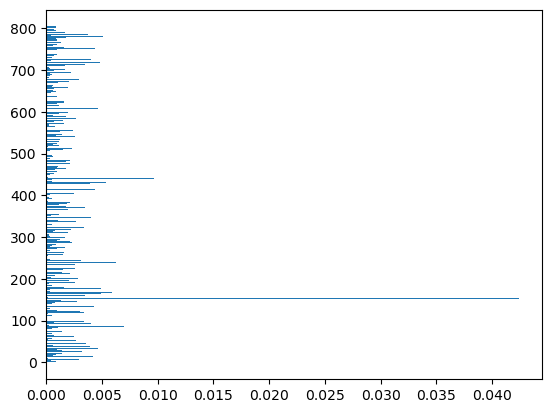

In [19]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
f_i = list(zip(np.arange(805),rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [41]:
X_train.shape

(2560, 805)

In [47]:
mask = rf.feature_importances_ > 0.0001

In [48]:
mask.shape

(805,)

In [50]:
X_el = X_train.iloc[:, mask]
X_el.shape

(2560, 564)

In [51]:
rf.fit(X_el, y_train)
y_pred = rf.predict(X_test.iloc[:, mask])
f1_score(y_test, y_pred)

0.3722084367245657

In [13]:
from sklearn.ensemble import AdaBoostClassifier

random_grid = { 
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
}


svc = AdaBoostClassifier(n_estimators=100)
clf = GridSearchCV(svc, random_grid,scoring='roc_auc')
clf.fit(X_train, y_train)
clf.best_score_

0.8140934079113362

In [14]:
clf.best_params_

{'learning_rate': 0.1}

In [15]:
y_pred = clf.predict(X_test)
roc_auc_score(y_test, y_pred)

/Users/mariamitrankova/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


0.6301865775549986

In [17]:
import catboost as cb

In [18]:
model = cb.CatBoostClassifier(loss_function='Logloss',  
        iterations=1000,
        auto_class_weights='Balanced'
                              
    )
random_grid = { 
    'learning_rate': [0.01, 0.05, 0.1],
    'depth':[4,6,8],
    'min_data_in_leaf':[1, 3]
}
clf = GridSearchCV(model, random_grid,scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)
clf.best_score_


0:	learn: 0.6917373	total: 96.5ms	remaining: 1m 36s
1:	learn: 0.6898472	total: 115ms	remaining: 57.6s
2:	learn: 0.6874389	total: 135ms	remaining: 44.8s
3:	learn: 0.6853118	total: 153ms	remaining: 38s
4:	learn: 0.6837976	total: 173ms	remaining: 34.4s
5:	learn: 0.6824067	total: 193ms	remaining: 31.9s
6:	learn: 0.6805784	total: 211ms	remaining: 30s
7:	learn: 0.6792518	total: 230ms	remaining: 28.5s
8:	learn: 0.6780803	total: 248ms	remaining: 27.3s
9:	learn: 0.6768002	total: 268ms	remaining: 26.6s
10:	learn: 0.6748702	total: 288ms	remaining: 25.9s
11:	learn: 0.6736235	total: 309ms	remaining: 25.4s
12:	learn: 0.6722008	total: 332ms	remaining: 25.2s
13:	learn: 0.6705878	total: 355ms	remaining: 25s
14:	learn: 0.6698498	total: 378ms	remaining: 24.8s
15:	learn: 0.6688784	total: 398ms	remaining: 24.5s
16:	learn: 0.6682862	total: 419ms	remaining: 24.2s
17:	learn: 0.6669968	total: 437ms	remaining: 23.8s
18:	learn: 0.6652606	total: 458ms	remaining: 23.6s
19:	learn: 0.6636026	total: 476ms	remaining: 

161:	learn: 0.5797510	total: 3.23s	remaining: 16.7s
162:	learn: 0.5792276	total: 3.25s	remaining: 16.7s
163:	learn: 0.5789416	total: 3.27s	remaining: 16.7s
164:	learn: 0.5785422	total: 3.29s	remaining: 16.7s
165:	learn: 0.5781033	total: 3.31s	remaining: 16.6s
166:	learn: 0.5775799	total: 3.33s	remaining: 16.6s
167:	learn: 0.5770924	total: 3.35s	remaining: 16.6s
168:	learn: 0.5766594	total: 3.37s	remaining: 16.6s
169:	learn: 0.5762052	total: 3.39s	remaining: 16.5s
170:	learn: 0.5758269	total: 3.41s	remaining: 16.5s
171:	learn: 0.5754279	total: 3.43s	remaining: 16.5s
172:	learn: 0.5750229	total: 3.45s	remaining: 16.5s
173:	learn: 0.5747074	total: 3.47s	remaining: 16.5s
174:	learn: 0.5742335	total: 3.49s	remaining: 16.5s
175:	learn: 0.5739132	total: 3.51s	remaining: 16.4s
176:	learn: 0.5735707	total: 3.53s	remaining: 16.4s
177:	learn: 0.5732115	total: 3.55s	remaining: 16.4s
178:	learn: 0.5727885	total: 3.56s	remaining: 16.3s
179:	learn: 0.5723347	total: 3.58s	remaining: 16.3s
180:	learn: 

323:	learn: 0.5190531	total: 6.62s	remaining: 13.8s
324:	learn: 0.5187164	total: 6.64s	remaining: 13.8s
325:	learn: 0.5184063	total: 6.66s	remaining: 13.8s
326:	learn: 0.5180813	total: 6.68s	remaining: 13.8s
327:	learn: 0.5176449	total: 6.7s	remaining: 13.7s
328:	learn: 0.5173322	total: 6.72s	remaining: 13.7s
329:	learn: 0.5169200	total: 6.75s	remaining: 13.7s
330:	learn: 0.5166492	total: 6.76s	remaining: 13.7s
331:	learn: 0.5163829	total: 6.79s	remaining: 13.7s
332:	learn: 0.5160939	total: 6.81s	remaining: 13.6s
333:	learn: 0.5158485	total: 6.83s	remaining: 13.6s
334:	learn: 0.5155353	total: 6.85s	remaining: 13.6s
335:	learn: 0.5152189	total: 6.87s	remaining: 13.6s
336:	learn: 0.5146833	total: 6.89s	remaining: 13.6s
337:	learn: 0.5143478	total: 6.92s	remaining: 13.5s
338:	learn: 0.5139523	total: 6.94s	remaining: 13.5s
339:	learn: 0.5135204	total: 6.96s	remaining: 13.5s
340:	learn: 0.5131290	total: 6.98s	remaining: 13.5s
341:	learn: 0.5127824	total: 7s	remaining: 13.5s
342:	learn: 0.51

483:	learn: 0.4699065	total: 9.79s	remaining: 10.4s
484:	learn: 0.4695319	total: 9.81s	remaining: 10.4s
485:	learn: 0.4693028	total: 9.84s	remaining: 10.4s
486:	learn: 0.4690337	total: 9.86s	remaining: 10.4s
487:	learn: 0.4687575	total: 9.87s	remaining: 10.4s
488:	learn: 0.4684131	total: 9.89s	remaining: 10.3s
489:	learn: 0.4680575	total: 9.91s	remaining: 10.3s
490:	learn: 0.4677205	total: 9.93s	remaining: 10.3s
491:	learn: 0.4675051	total: 9.95s	remaining: 10.3s
492:	learn: 0.4672994	total: 9.97s	remaining: 10.3s
493:	learn: 0.4670007	total: 9.99s	remaining: 10.2s
494:	learn: 0.4666613	total: 10s	remaining: 10.2s
495:	learn: 0.4663487	total: 10s	remaining: 10.2s
496:	learn: 0.4660465	total: 10.1s	remaining: 10.2s
497:	learn: 0.4658150	total: 10.1s	remaining: 10.2s
498:	learn: 0.4655036	total: 10.1s	remaining: 10.1s
499:	learn: 0.4652972	total: 10.1s	remaining: 10.1s
500:	learn: 0.4650009	total: 10.1s	remaining: 10.1s
501:	learn: 0.4647079	total: 10.1s	remaining: 10.1s
502:	learn: 0.46

644:	learn: 0.4255826	total: 13s	remaining: 7.13s
645:	learn: 0.4252606	total: 13s	remaining: 7.11s
646:	learn: 0.4250278	total: 13s	remaining: 7.09s
647:	learn: 0.4247989	total: 13s	remaining: 7.07s
648:	learn: 0.4245677	total: 13s	remaining: 7.05s
649:	learn: 0.4242686	total: 13.1s	remaining: 7.03s
650:	learn: 0.4239246	total: 13.1s	remaining: 7.01s
651:	learn: 0.4236341	total: 13.1s	remaining: 6.99s
652:	learn: 0.4234174	total: 13.1s	remaining: 6.97s
653:	learn: 0.4230827	total: 13.1s	remaining: 6.95s
654:	learn: 0.4228784	total: 13.2s	remaining: 6.93s
655:	learn: 0.4226429	total: 13.2s	remaining: 6.91s
656:	learn: 0.4224087	total: 13.2s	remaining: 6.89s
657:	learn: 0.4221267	total: 13.2s	remaining: 6.87s
658:	learn: 0.4217754	total: 13.2s	remaining: 6.85s
659:	learn: 0.4215081	total: 13.3s	remaining: 6.83s
660:	learn: 0.4212083	total: 13.3s	remaining: 6.81s
661:	learn: 0.4209732	total: 13.3s	remaining: 6.79s
662:	learn: 0.4207724	total: 13.3s	remaining: 6.77s
663:	learn: 0.4205022	

807:	learn: 0.3811275	total: 16.4s	remaining: 3.89s
808:	learn: 0.3808412	total: 16.4s	remaining: 3.87s
809:	learn: 0.3805723	total: 16.4s	remaining: 3.85s
810:	learn: 0.3802501	total: 16.4s	remaining: 3.83s
811:	learn: 0.3800544	total: 16.5s	remaining: 3.81s
812:	learn: 0.3796988	total: 16.5s	remaining: 3.79s
813:	learn: 0.3793753	total: 16.5s	remaining: 3.77s
814:	learn: 0.3790055	total: 16.5s	remaining: 3.75s
815:	learn: 0.3788194	total: 16.5s	remaining: 3.73s
816:	learn: 0.3785576	total: 16.5s	remaining: 3.71s
817:	learn: 0.3782307	total: 16.6s	remaining: 3.69s
818:	learn: 0.3780095	total: 16.6s	remaining: 3.67s
819:	learn: 0.3777537	total: 16.6s	remaining: 3.65s
820:	learn: 0.3774754	total: 16.6s	remaining: 3.62s
821:	learn: 0.3772152	total: 16.6s	remaining: 3.6s
822:	learn: 0.3768263	total: 16.7s	remaining: 3.58s
823:	learn: 0.3765089	total: 16.7s	remaining: 3.56s
824:	learn: 0.3762026	total: 16.7s	remaining: 3.54s
825:	learn: 0.3759022	total: 16.7s	remaining: 3.52s
826:	learn: 0

972:	learn: 0.3333907	total: 19.8s	remaining: 549ms
973:	learn: 0.3330532	total: 19.8s	remaining: 528ms
974:	learn: 0.3327675	total: 19.8s	remaining: 508ms
975:	learn: 0.3324760	total: 19.8s	remaining: 488ms
976:	learn: 0.3322080	total: 19.9s	remaining: 467ms
977:	learn: 0.3319118	total: 19.9s	remaining: 447ms
978:	learn: 0.3316637	total: 19.9s	remaining: 427ms
979:	learn: 0.3313421	total: 19.9s	remaining: 406ms
980:	learn: 0.3310367	total: 19.9s	remaining: 386ms
981:	learn: 0.3307541	total: 20s	remaining: 366ms
982:	learn: 0.3305072	total: 20s	remaining: 346ms
983:	learn: 0.3302448	total: 20s	remaining: 325ms
984:	learn: 0.3299019	total: 20s	remaining: 305ms
985:	learn: 0.3296449	total: 20s	remaining: 285ms
986:	learn: 0.3293889	total: 20.1s	remaining: 264ms
987:	learn: 0.3290479	total: 20.1s	remaining: 244ms
988:	learn: 0.3288118	total: 20.1s	remaining: 224ms
989:	learn: 0.3284924	total: 20.1s	remaining: 203ms
990:	learn: 0.3281827	total: 20.1s	remaining: 183ms
991:	learn: 0.3279785	

133:	learn: 0.5882580	total: 2.72s	remaining: 17.6s
134:	learn: 0.5877380	total: 2.75s	remaining: 17.6s
135:	learn: 0.5873812	total: 2.77s	remaining: 17.6s
136:	learn: 0.5868207	total: 2.79s	remaining: 17.6s
137:	learn: 0.5864803	total: 2.81s	remaining: 17.6s
138:	learn: 0.5859348	total: 2.83s	remaining: 17.6s
139:	learn: 0.5854769	total: 2.85s	remaining: 17.5s
140:	learn: 0.5847572	total: 2.88s	remaining: 17.5s
141:	learn: 0.5842473	total: 2.9s	remaining: 17.5s
142:	learn: 0.5838739	total: 2.92s	remaining: 17.5s
143:	learn: 0.5833171	total: 2.94s	remaining: 17.5s
144:	learn: 0.5828582	total: 2.96s	remaining: 17.4s
145:	learn: 0.5822986	total: 2.98s	remaining: 17.4s
146:	learn: 0.5818445	total: 3s	remaining: 17.4s
147:	learn: 0.5814755	total: 3.02s	remaining: 17.4s
148:	learn: 0.5810597	total: 3.04s	remaining: 17.3s
149:	learn: 0.5807638	total: 3.05s	remaining: 17.3s
150:	learn: 0.5803573	total: 3.08s	remaining: 17.3s
151:	learn: 0.5800157	total: 3.1s	remaining: 17.3s
152:	learn: 0.579

300:	learn: 0.5226930	total: 6.1s	remaining: 14.2s
301:	learn: 0.5224353	total: 6.12s	remaining: 14.1s
302:	learn: 0.5220690	total: 6.14s	remaining: 14.1s
303:	learn: 0.5218194	total: 6.16s	remaining: 14.1s
304:	learn: 0.5213922	total: 6.18s	remaining: 14.1s
305:	learn: 0.5209544	total: 6.2s	remaining: 14.1s
306:	learn: 0.5206669	total: 6.22s	remaining: 14s
307:	learn: 0.5203187	total: 6.24s	remaining: 14s
308:	learn: 0.5201446	total: 6.26s	remaining: 14s
309:	learn: 0.5196265	total: 6.28s	remaining: 14s
310:	learn: 0.5191572	total: 6.29s	remaining: 13.9s
311:	learn: 0.5188200	total: 6.32s	remaining: 13.9s
312:	learn: 0.5184872	total: 6.34s	remaining: 13.9s
313:	learn: 0.5180868	total: 6.36s	remaining: 13.9s
314:	learn: 0.5177630	total: 6.38s	remaining: 13.9s
315:	learn: 0.5174648	total: 6.4s	remaining: 13.9s
316:	learn: 0.5171925	total: 6.42s	remaining: 13.8s
317:	learn: 0.5168665	total: 6.44s	remaining: 13.8s
318:	learn: 0.5163209	total: 6.46s	remaining: 13.8s
319:	learn: 0.5159531	t

463:	learn: 0.4684965	total: 9.46s	remaining: 10.9s
464:	learn: 0.4681925	total: 9.49s	remaining: 10.9s
465:	learn: 0.4678937	total: 9.51s	remaining: 10.9s
466:	learn: 0.4676221	total: 9.53s	remaining: 10.9s
467:	learn: 0.4673005	total: 9.55s	remaining: 10.9s
468:	learn: 0.4670005	total: 9.57s	remaining: 10.8s
469:	learn: 0.4667340	total: 9.59s	remaining: 10.8s
470:	learn: 0.4664328	total: 9.61s	remaining: 10.8s
471:	learn: 0.4661378	total: 9.63s	remaining: 10.8s
472:	learn: 0.4658216	total: 9.65s	remaining: 10.8s
473:	learn: 0.4655700	total: 9.68s	remaining: 10.7s
474:	learn: 0.4653409	total: 9.7s	remaining: 10.7s
475:	learn: 0.4650166	total: 9.71s	remaining: 10.7s
476:	learn: 0.4646284	total: 9.74s	remaining: 10.7s
477:	learn: 0.4644602	total: 9.76s	remaining: 10.7s
478:	learn: 0.4643217	total: 9.78s	remaining: 10.6s
479:	learn: 0.4640015	total: 9.8s	remaining: 10.6s
480:	learn: 0.4637620	total: 9.82s	remaining: 10.6s
481:	learn: 0.4634277	total: 9.84s	remaining: 10.6s
482:	learn: 0.

623:	learn: 0.4241623	total: 12.8s	remaining: 7.68s
624:	learn: 0.4238993	total: 12.8s	remaining: 7.66s
625:	learn: 0.4236658	total: 12.8s	remaining: 7.64s
626:	learn: 0.4234058	total: 12.8s	remaining: 7.62s
627:	learn: 0.4231160	total: 12.8s	remaining: 7.6s
628:	learn: 0.4228336	total: 12.9s	remaining: 7.58s
629:	learn: 0.4224556	total: 12.9s	remaining: 7.56s
630:	learn: 0.4222508	total: 12.9s	remaining: 7.54s
631:	learn: 0.4219151	total: 12.9s	remaining: 7.52s
632:	learn: 0.4215733	total: 12.9s	remaining: 7.5s
633:	learn: 0.4213522	total: 12.9s	remaining: 7.47s
634:	learn: 0.4211173	total: 13s	remaining: 7.46s
635:	learn: 0.4208100	total: 13s	remaining: 7.44s
636:	learn: 0.4206384	total: 13s	remaining: 7.42s
637:	learn: 0.4203505	total: 13s	remaining: 7.39s
638:	learn: 0.4201023	total: 13.1s	remaining: 7.37s
639:	learn: 0.4197816	total: 13.1s	remaining: 7.35s
640:	learn: 0.4195711	total: 13.1s	remaining: 7.33s
641:	learn: 0.4193948	total: 13.1s	remaining: 7.31s
642:	learn: 0.4190961	

782:	learn: 0.3823780	total: 16.1s	remaining: 4.47s
783:	learn: 0.3821059	total: 16.1s	remaining: 4.45s
784:	learn: 0.3818035	total: 16.2s	remaining: 4.43s
785:	learn: 0.3815394	total: 16.2s	remaining: 4.41s
786:	learn: 0.3812994	total: 16.2s	remaining: 4.39s
787:	learn: 0.3809559	total: 16.2s	remaining: 4.37s
788:	learn: 0.3807539	total: 16.2s	remaining: 4.34s
789:	learn: 0.3803361	total: 16.3s	remaining: 4.32s
790:	learn: 0.3800072	total: 16.3s	remaining: 4.3s
791:	learn: 0.3798141	total: 16.3s	remaining: 4.28s
792:	learn: 0.3795613	total: 16.3s	remaining: 4.26s
793:	learn: 0.3792087	total: 16.3s	remaining: 4.24s
794:	learn: 0.3789737	total: 16.4s	remaining: 4.22s
795:	learn: 0.3787502	total: 16.4s	remaining: 4.2s
796:	learn: 0.3784039	total: 16.4s	remaining: 4.18s
797:	learn: 0.3781777	total: 16.4s	remaining: 4.16s
798:	learn: 0.3779293	total: 16.4s	remaining: 4.14s
799:	learn: 0.3776184	total: 16.5s	remaining: 4.12s
800:	learn: 0.3773873	total: 16.5s	remaining: 4.1s
801:	learn: 0.3

942:	learn: 0.3365968	total: 19.5s	remaining: 1.18s
943:	learn: 0.3363394	total: 19.5s	remaining: 1.16s
944:	learn: 0.3360449	total: 19.5s	remaining: 1.14s
945:	learn: 0.3356352	total: 19.6s	remaining: 1.12s
946:	learn: 0.3353389	total: 19.6s	remaining: 1.09s
947:	learn: 0.3350381	total: 19.6s	remaining: 1.07s
948:	learn: 0.3346908	total: 19.6s	remaining: 1.05s
949:	learn: 0.3343531	total: 19.6s	remaining: 1.03s
950:	learn: 0.3341024	total: 19.7s	remaining: 1.01s
951:	learn: 0.3337927	total: 19.7s	remaining: 993ms
952:	learn: 0.3335641	total: 19.7s	remaining: 972ms
953:	learn: 0.3332542	total: 19.7s	remaining: 951ms
954:	learn: 0.3329649	total: 19.7s	remaining: 931ms
955:	learn: 0.3327506	total: 19.8s	remaining: 910ms
956:	learn: 0.3325075	total: 19.8s	remaining: 889ms
957:	learn: 0.3321978	total: 19.8s	remaining: 869ms
958:	learn: 0.3319659	total: 19.8s	remaining: 848ms
959:	learn: 0.3316566	total: 19.9s	remaining: 828ms
960:	learn: 0.3313984	total: 19.9s	remaining: 807ms
961:	learn: 

104:	learn: 0.6063838	total: 2.13s	remaining: 18.1s
105:	learn: 0.6059135	total: 2.15s	remaining: 18.1s
106:	learn: 0.6054616	total: 2.17s	remaining: 18.1s
107:	learn: 0.6049393	total: 2.19s	remaining: 18.1s
108:	learn: 0.6045447	total: 2.21s	remaining: 18.1s
109:	learn: 0.6041861	total: 2.23s	remaining: 18s
110:	learn: 0.6037460	total: 2.25s	remaining: 18s
111:	learn: 0.6033947	total: 2.27s	remaining: 18s
112:	learn: 0.6027808	total: 2.29s	remaining: 18s
113:	learn: 0.6023331	total: 2.31s	remaining: 18s
114:	learn: 0.6020063	total: 2.33s	remaining: 18s
115:	learn: 0.6016932	total: 2.35s	remaining: 17.9s
116:	learn: 0.6011811	total: 2.38s	remaining: 17.9s
117:	learn: 0.6007951	total: 2.4s	remaining: 17.9s
118:	learn: 0.6003924	total: 2.42s	remaining: 17.9s
119:	learn: 0.5998981	total: 2.44s	remaining: 17.9s
120:	learn: 0.5996596	total: 2.46s	remaining: 17.9s
121:	learn: 0.5991396	total: 2.48s	remaining: 17.9s
122:	learn: 0.5987945	total: 2.5s	remaining: 17.9s
123:	learn: 0.5983837	tota

265:	learn: 0.5401355	total: 5.47s	remaining: 15.1s
266:	learn: 0.5396979	total: 5.49s	remaining: 15.1s
267:	learn: 0.5392862	total: 5.51s	remaining: 15.1s
268:	learn: 0.5389302	total: 5.54s	remaining: 15s
269:	learn: 0.5386220	total: 5.56s	remaining: 15s
270:	learn: 0.5382605	total: 5.58s	remaining: 15s
271:	learn: 0.5378417	total: 5.6s	remaining: 15s
272:	learn: 0.5375575	total: 5.62s	remaining: 15s
273:	learn: 0.5373360	total: 5.64s	remaining: 14.9s
274:	learn: 0.5371087	total: 5.66s	remaining: 14.9s
275:	learn: 0.5367549	total: 5.68s	remaining: 14.9s
276:	learn: 0.5364534	total: 5.71s	remaining: 14.9s
277:	learn: 0.5360082	total: 5.72s	remaining: 14.9s
278:	learn: 0.5356292	total: 5.74s	remaining: 14.8s
279:	learn: 0.5352497	total: 5.76s	remaining: 14.8s
280:	learn: 0.5350105	total: 5.78s	remaining: 14.8s
281:	learn: 0.5346776	total: 5.8s	remaining: 14.8s
282:	learn: 0.5342262	total: 5.82s	remaining: 14.8s
283:	learn: 0.5338259	total: 5.84s	remaining: 14.7s
284:	learn: 0.5334197	to

425:	learn: 0.4872104	total: 8.79s	remaining: 11.8s
426:	learn: 0.4870369	total: 8.81s	remaining: 11.8s
427:	learn: 0.4867626	total: 8.83s	remaining: 11.8s
428:	learn: 0.4863645	total: 8.86s	remaining: 11.8s
429:	learn: 0.4859779	total: 8.88s	remaining: 11.8s
430:	learn: 0.4855681	total: 8.9s	remaining: 11.7s
431:	learn: 0.4851365	total: 8.92s	remaining: 11.7s
432:	learn: 0.4849204	total: 8.94s	remaining: 11.7s
433:	learn: 0.4846103	total: 8.96s	remaining: 11.7s
434:	learn: 0.4842514	total: 8.98s	remaining: 11.7s
435:	learn: 0.4840901	total: 9s	remaining: 11.6s
436:	learn: 0.4838657	total: 9.03s	remaining: 11.6s
437:	learn: 0.4835890	total: 9.05s	remaining: 11.6s
438:	learn: 0.4832949	total: 9.07s	remaining: 11.6s
439:	learn: 0.4829913	total: 9.1s	remaining: 11.6s
440:	learn: 0.4826952	total: 9.12s	remaining: 11.6s
441:	learn: 0.4823746	total: 9.14s	remaining: 11.5s
442:	learn: 0.4820969	total: 9.16s	remaining: 11.5s
443:	learn: 0.4818062	total: 9.18s	remaining: 11.5s
444:	learn: 0.481

587:	learn: 0.4412786	total: 12.4s	remaining: 8.69s
588:	learn: 0.4410987	total: 12.4s	remaining: 8.67s
589:	learn: 0.4406019	total: 12.4s	remaining: 8.65s
590:	learn: 0.4403149	total: 12.5s	remaining: 8.63s
591:	learn: 0.4400440	total: 12.5s	remaining: 8.61s
592:	learn: 0.4398527	total: 12.5s	remaining: 8.59s
593:	learn: 0.4396240	total: 12.5s	remaining: 8.57s
594:	learn: 0.4394117	total: 12.6s	remaining: 8.55s
595:	learn: 0.4391824	total: 12.6s	remaining: 8.54s
596:	learn: 0.4388688	total: 12.6s	remaining: 8.52s
597:	learn: 0.4386415	total: 12.6s	remaining: 8.5s
598:	learn: 0.4384263	total: 12.7s	remaining: 8.48s
599:	learn: 0.4382363	total: 12.7s	remaining: 8.46s
600:	learn: 0.4379847	total: 12.7s	remaining: 8.45s
601:	learn: 0.4377679	total: 12.7s	remaining: 8.43s
602:	learn: 0.4374132	total: 12.8s	remaining: 8.4s
603:	learn: 0.4371757	total: 12.8s	remaining: 8.39s
604:	learn: 0.4367586	total: 12.8s	remaining: 8.37s
605:	learn: 0.4365024	total: 12.8s	remaining: 8.35s
606:	learn: 0.

752:	learn: 0.3972919	total: 16s	remaining: 5.25s
753:	learn: 0.3970250	total: 16s	remaining: 5.22s
754:	learn: 0.3967546	total: 16s	remaining: 5.2s
755:	learn: 0.3964449	total: 16.1s	remaining: 5.18s
756:	learn: 0.3961647	total: 16.1s	remaining: 5.16s
757:	learn: 0.3959669	total: 16.1s	remaining: 5.14s
758:	learn: 0.3956426	total: 16.1s	remaining: 5.12s
759:	learn: 0.3953447	total: 16.1s	remaining: 5.09s
760:	learn: 0.3950159	total: 16.2s	remaining: 5.07s
761:	learn: 0.3945513	total: 16.2s	remaining: 5.05s
762:	learn: 0.3942160	total: 16.2s	remaining: 5.03s
763:	learn: 0.3938795	total: 16.2s	remaining: 5.01s
764:	learn: 0.3935856	total: 16.2s	remaining: 4.99s
765:	learn: 0.3932326	total: 16.3s	remaining: 4.97s
766:	learn: 0.3929021	total: 16.3s	remaining: 4.95s
767:	learn: 0.3926164	total: 16.3s	remaining: 4.92s
768:	learn: 0.3923430	total: 16.3s	remaining: 4.9s
769:	learn: 0.3920912	total: 16.3s	remaining: 4.88s
770:	learn: 0.3918648	total: 16.4s	remaining: 4.86s
771:	learn: 0.391652

915:	learn: 0.3510204	total: 19.4s	remaining: 1.77s
916:	learn: 0.3507595	total: 19.4s	remaining: 1.75s
917:	learn: 0.3504108	total: 19.4s	remaining: 1.73s
918:	learn: 0.3499798	total: 19.4s	remaining: 1.71s
919:	learn: 0.3496900	total: 19.4s	remaining: 1.69s
920:	learn: 0.3493922	total: 19.5s	remaining: 1.67s
921:	learn: 0.3490615	total: 19.5s	remaining: 1.65s
922:	learn: 0.3488126	total: 19.5s	remaining: 1.63s
923:	learn: 0.3485865	total: 19.5s	remaining: 1.61s
924:	learn: 0.3483752	total: 19.5s	remaining: 1.58s
925:	learn: 0.3480676	total: 19.6s	remaining: 1.56s
926:	learn: 0.3477351	total: 19.6s	remaining: 1.54s
927:	learn: 0.3475239	total: 19.6s	remaining: 1.52s
928:	learn: 0.3471656	total: 19.6s	remaining: 1.5s
929:	learn: 0.3469018	total: 19.7s	remaining: 1.48s
930:	learn: 0.3466161	total: 19.7s	remaining: 1.46s
931:	learn: 0.3463330	total: 19.7s	remaining: 1.44s
932:	learn: 0.3460162	total: 19.7s	remaining: 1.42s
933:	learn: 0.3457654	total: 19.7s	remaining: 1.39s
934:	learn: 0

76:	learn: 0.6207703	total: 1.7s	remaining: 20.4s
77:	learn: 0.6200856	total: 1.72s	remaining: 20.3s
78:	learn: 0.6196342	total: 1.74s	remaining: 20.3s
79:	learn: 0.6187532	total: 1.76s	remaining: 20.3s
80:	learn: 0.6180673	total: 1.78s	remaining: 20.2s
81:	learn: 0.6173490	total: 1.8s	remaining: 20.2s
82:	learn: 0.6169279	total: 1.82s	remaining: 20.1s
83:	learn: 0.6163583	total: 1.84s	remaining: 20.1s
84:	learn: 0.6155861	total: 1.86s	remaining: 20.1s
85:	learn: 0.6151067	total: 1.88s	remaining: 20s
86:	learn: 0.6144601	total: 1.9s	remaining: 20s
87:	learn: 0.6133876	total: 1.93s	remaining: 20s
88:	learn: 0.6129728	total: 1.95s	remaining: 19.9s
89:	learn: 0.6119041	total: 1.97s	remaining: 19.9s
90:	learn: 0.6114619	total: 1.99s	remaining: 19.9s
91:	learn: 0.6110178	total: 2.01s	remaining: 19.9s
92:	learn: 0.6105256	total: 2.03s	remaining: 19.8s
93:	learn: 0.6100212	total: 2.06s	remaining: 19.8s
94:	learn: 0.6094107	total: 2.08s	remaining: 19.8s
95:	learn: 0.6088321	total: 2.1s	remaini

238:	learn: 0.5492675	total: 5.05s	remaining: 16.1s
239:	learn: 0.5488910	total: 5.07s	remaining: 16.1s
240:	learn: 0.5484492	total: 5.09s	remaining: 16s
241:	learn: 0.5480069	total: 5.11s	remaining: 16s
242:	learn: 0.5475658	total: 5.13s	remaining: 16s
243:	learn: 0.5471722	total: 5.15s	remaining: 16s
244:	learn: 0.5467639	total: 5.17s	remaining: 15.9s
245:	learn: 0.5463162	total: 5.19s	remaining: 15.9s
246:	learn: 0.5460324	total: 5.21s	remaining: 15.9s
247:	learn: 0.5455836	total: 5.23s	remaining: 15.9s
248:	learn: 0.5452628	total: 5.25s	remaining: 15.8s
249:	learn: 0.5446957	total: 5.27s	remaining: 15.8s
250:	learn: 0.5444574	total: 5.29s	remaining: 15.8s
251:	learn: 0.5440635	total: 5.32s	remaining: 15.8s
252:	learn: 0.5437175	total: 5.34s	remaining: 15.8s
253:	learn: 0.5434072	total: 5.36s	remaining: 15.7s
254:	learn: 0.5431248	total: 5.38s	remaining: 15.7s
255:	learn: 0.5427991	total: 5.4s	remaining: 15.7s
256:	learn: 0.5424351	total: 5.42s	remaining: 15.7s
257:	learn: 0.5420159

398:	learn: 0.4944372	total: 8.39s	remaining: 12.6s
399:	learn: 0.4941762	total: 8.41s	remaining: 12.6s
400:	learn: 0.4938578	total: 8.43s	remaining: 12.6s
401:	learn: 0.4936098	total: 8.45s	remaining: 12.6s
402:	learn: 0.4933060	total: 8.47s	remaining: 12.5s
403:	learn: 0.4929645	total: 8.49s	remaining: 12.5s
404:	learn: 0.4927097	total: 8.51s	remaining: 12.5s
405:	learn: 0.4925271	total: 8.53s	remaining: 12.5s
406:	learn: 0.4922356	total: 8.55s	remaining: 12.5s
407:	learn: 0.4919828	total: 8.57s	remaining: 12.4s
408:	learn: 0.4917682	total: 8.6s	remaining: 12.4s
409:	learn: 0.4914833	total: 8.62s	remaining: 12.4s
410:	learn: 0.4912316	total: 8.64s	remaining: 12.4s
411:	learn: 0.4909566	total: 8.66s	remaining: 12.4s
412:	learn: 0.4906373	total: 8.68s	remaining: 12.3s
413:	learn: 0.4904148	total: 8.71s	remaining: 12.3s
414:	learn: 0.4901070	total: 8.73s	remaining: 12.3s
415:	learn: 0.4897975	total: 8.75s	remaining: 12.3s
416:	learn: 0.4895215	total: 8.77s	remaining: 12.3s
417:	learn: 0

565:	learn: 0.4467513	total: 11.9s	remaining: 9.15s
566:	learn: 0.4464879	total: 12s	remaining: 9.13s
567:	learn: 0.4462067	total: 12s	remaining: 9.11s
568:	learn: 0.4460199	total: 12s	remaining: 9.09s
569:	learn: 0.4457615	total: 12s	remaining: 9.07s
570:	learn: 0.4455752	total: 12s	remaining: 9.05s
571:	learn: 0.4452474	total: 12.1s	remaining: 9.03s
572:	learn: 0.4448575	total: 12.1s	remaining: 9s
573:	learn: 0.4445984	total: 12.1s	remaining: 8.98s
574:	learn: 0.4444300	total: 12.1s	remaining: 8.96s
575:	learn: 0.4440307	total: 12.1s	remaining: 8.94s
576:	learn: 0.4438006	total: 12.2s	remaining: 8.92s
577:	learn: 0.4434129	total: 12.2s	remaining: 8.9s
578:	learn: 0.4431633	total: 12.2s	remaining: 8.88s
579:	learn: 0.4429130	total: 12.2s	remaining: 8.86s
580:	learn: 0.4425280	total: 12.3s	remaining: 8.84s
581:	learn: 0.4422745	total: 12.3s	remaining: 8.82s
582:	learn: 0.4419696	total: 12.3s	remaining: 8.79s
583:	learn: 0.4417174	total: 12.3s	remaining: 8.77s
584:	learn: 0.4415715	tota

724:	learn: 0.4040410	total: 15.3s	remaining: 5.79s
725:	learn: 0.4038111	total: 15.3s	remaining: 5.77s
726:	learn: 0.4034971	total: 15.3s	remaining: 5.75s
727:	learn: 0.4031806	total: 15.3s	remaining: 5.73s
728:	learn: 0.4029350	total: 15.4s	remaining: 5.71s
729:	learn: 0.4025835	total: 15.4s	remaining: 5.69s
730:	learn: 0.4023085	total: 15.4s	remaining: 5.67s
731:	learn: 0.4019499	total: 15.4s	remaining: 5.64s
732:	learn: 0.4016157	total: 15.4s	remaining: 5.62s
733:	learn: 0.4013898	total: 15.5s	remaining: 5.6s
734:	learn: 0.4011055	total: 15.5s	remaining: 5.58s
735:	learn: 0.4008745	total: 15.5s	remaining: 5.56s
736:	learn: 0.4006602	total: 15.5s	remaining: 5.54s
737:	learn: 0.4003534	total: 15.5s	remaining: 5.52s
738:	learn: 0.4000063	total: 15.6s	remaining: 5.5s
739:	learn: 0.3997436	total: 15.6s	remaining: 5.47s
740:	learn: 0.3994274	total: 15.6s	remaining: 5.45s
741:	learn: 0.3991057	total: 15.6s	remaining: 5.43s
742:	learn: 0.3988399	total: 15.6s	remaining: 5.41s
743:	learn: 0.

884:	learn: 0.3594026	total: 18.6s	remaining: 2.42s
885:	learn: 0.3591102	total: 18.7s	remaining: 2.4s
886:	learn: 0.3588940	total: 18.7s	remaining: 2.38s
887:	learn: 0.3586591	total: 18.7s	remaining: 2.36s
888:	learn: 0.3583549	total: 18.7s	remaining: 2.34s
889:	learn: 0.3581066	total: 18.7s	remaining: 2.31s
890:	learn: 0.3577719	total: 18.8s	remaining: 2.29s
891:	learn: 0.3574845	total: 18.8s	remaining: 2.27s
892:	learn: 0.3571677	total: 18.8s	remaining: 2.25s
893:	learn: 0.3568490	total: 18.8s	remaining: 2.23s
894:	learn: 0.3564397	total: 18.8s	remaining: 2.21s
895:	learn: 0.3561874	total: 18.9s	remaining: 2.19s
896:	learn: 0.3559645	total: 18.9s	remaining: 2.17s
897:	learn: 0.3556522	total: 18.9s	remaining: 2.15s
898:	learn: 0.3553391	total: 18.9s	remaining: 2.13s
899:	learn: 0.3550617	total: 18.9s	remaining: 2.1s
900:	learn: 0.3548014	total: 19s	remaining: 2.08s
901:	learn: 0.3545367	total: 19s	remaining: 2.06s
902:	learn: 0.3542341	total: 19s	remaining: 2.04s
903:	learn: 0.353963

51:	learn: 0.6331569	total: 1.06s	remaining: 19.3s
52:	learn: 0.6325793	total: 1.08s	remaining: 19.4s
53:	learn: 0.6317995	total: 1.1s	remaining: 19.4s
54:	learn: 0.6312112	total: 1.13s	remaining: 19.3s
55:	learn: 0.6306118	total: 1.15s	remaining: 19.3s
56:	learn: 0.6299096	total: 1.17s	remaining: 19.4s
57:	learn: 0.6295081	total: 1.19s	remaining: 19.4s
58:	learn: 0.6290177	total: 1.22s	remaining: 19.5s
59:	learn: 0.6285067	total: 1.24s	remaining: 19.5s
60:	learn: 0.6280626	total: 1.26s	remaining: 19.4s
61:	learn: 0.6270247	total: 1.28s	remaining: 19.5s
62:	learn: 0.6264118	total: 1.3s	remaining: 19.4s
63:	learn: 0.6257117	total: 1.33s	remaining: 19.4s
64:	learn: 0.6249670	total: 1.35s	remaining: 19.4s
65:	learn: 0.6243648	total: 1.37s	remaining: 19.4s
66:	learn: 0.6237193	total: 1.39s	remaining: 19.3s
67:	learn: 0.6231074	total: 1.41s	remaining: 19.3s
68:	learn: 0.6222438	total: 1.43s	remaining: 19.3s
69:	learn: 0.6215644	total: 1.45s	remaining: 19.2s
70:	learn: 0.6211009	total: 1.47s

214:	learn: 0.5532387	total: 4.63s	remaining: 16.9s
215:	learn: 0.5528977	total: 4.66s	remaining: 16.9s
216:	learn: 0.5524039	total: 4.68s	remaining: 16.9s
217:	learn: 0.5520207	total: 4.7s	remaining: 16.9s
218:	learn: 0.5515464	total: 4.72s	remaining: 16.9s
219:	learn: 0.5511529	total: 4.75s	remaining: 16.8s
220:	learn: 0.5508238	total: 4.77s	remaining: 16.8s
221:	learn: 0.5504648	total: 4.81s	remaining: 16.8s
222:	learn: 0.5501321	total: 4.83s	remaining: 16.8s
223:	learn: 0.5497655	total: 4.86s	remaining: 16.8s
224:	learn: 0.5491669	total: 4.87s	remaining: 16.8s
225:	learn: 0.5488665	total: 4.9s	remaining: 16.8s
226:	learn: 0.5485316	total: 4.92s	remaining: 16.7s
227:	learn: 0.5481467	total: 4.94s	remaining: 16.7s
228:	learn: 0.5478637	total: 4.96s	remaining: 16.7s
229:	learn: 0.5475345	total: 4.99s	remaining: 16.7s
230:	learn: 0.5472108	total: 5.01s	remaining: 16.7s
231:	learn: 0.5469579	total: 5.03s	remaining: 16.7s
232:	learn: 0.5466278	total: 5.05s	remaining: 16.6s
233:	learn: 0.

380:	learn: 0.4945230	total: 8.48s	remaining: 13.8s
381:	learn: 0.4942215	total: 8.5s	remaining: 13.8s
382:	learn: 0.4938240	total: 8.53s	remaining: 13.7s
383:	learn: 0.4933852	total: 8.56s	remaining: 13.7s
384:	learn: 0.4930914	total: 8.59s	remaining: 13.7s
385:	learn: 0.4928534	total: 8.61s	remaining: 13.7s
386:	learn: 0.4926536	total: 8.63s	remaining: 13.7s
387:	learn: 0.4923847	total: 8.65s	remaining: 13.7s
388:	learn: 0.4919285	total: 8.68s	remaining: 13.6s
389:	learn: 0.4916160	total: 8.7s	remaining: 13.6s
390:	learn: 0.4912376	total: 8.72s	remaining: 13.6s
391:	learn: 0.4908737	total: 8.74s	remaining: 13.6s
392:	learn: 0.4905599	total: 8.76s	remaining: 13.5s
393:	learn: 0.4901739	total: 8.78s	remaining: 13.5s
394:	learn: 0.4897874	total: 8.8s	remaining: 13.5s
395:	learn: 0.4894755	total: 8.82s	remaining: 13.5s
396:	learn: 0.4890226	total: 8.84s	remaining: 13.4s
397:	learn: 0.4886764	total: 8.86s	remaining: 13.4s
398:	learn: 0.4884018	total: 8.89s	remaining: 13.4s
399:	learn: 0.4

545:	learn: 0.4449756	total: 12.1s	remaining: 10s
546:	learn: 0.4447816	total: 12.1s	remaining: 10.1s
547:	learn: 0.4444334	total: 12.2s	remaining: 10s
548:	learn: 0.4441796	total: 12.2s	remaining: 10s
549:	learn: 0.4439112	total: 12.2s	remaining: 9.99s
550:	learn: 0.4436939	total: 12.2s	remaining: 9.96s
551:	learn: 0.4434673	total: 12.3s	remaining: 9.94s
552:	learn: 0.4432126	total: 12.3s	remaining: 9.92s
553:	learn: 0.4430486	total: 12.3s	remaining: 9.9s
554:	learn: 0.4428409	total: 12.3s	remaining: 9.88s
555:	learn: 0.4424928	total: 12.3s	remaining: 9.86s
556:	learn: 0.4421854	total: 12.4s	remaining: 9.84s
557:	learn: 0.4419743	total: 12.4s	remaining: 9.81s
558:	learn: 0.4417404	total: 12.4s	remaining: 9.79s
559:	learn: 0.4413937	total: 12.4s	remaining: 9.77s
560:	learn: 0.4412036	total: 12.5s	remaining: 9.75s
561:	learn: 0.4410341	total: 12.5s	remaining: 9.72s
562:	learn: 0.4407406	total: 12.5s	remaining: 9.7s
563:	learn: 0.4404201	total: 12.5s	remaining: 9.68s
564:	learn: 0.440129

709:	learn: 0.4020842	total: 15.7s	remaining: 6.42s
710:	learn: 0.4018757	total: 15.7s	remaining: 6.4s
711:	learn: 0.4016570	total: 15.8s	remaining: 6.37s
712:	learn: 0.4014498	total: 15.8s	remaining: 6.35s
713:	learn: 0.4012366	total: 15.8s	remaining: 6.33s
714:	learn: 0.4009977	total: 15.8s	remaining: 6.3s
715:	learn: 0.4007652	total: 15.8s	remaining: 6.28s
716:	learn: 0.4004637	total: 15.9s	remaining: 6.26s
717:	learn: 0.4002181	total: 15.9s	remaining: 6.24s
718:	learn: 0.3999484	total: 15.9s	remaining: 6.21s
719:	learn: 0.3996801	total: 15.9s	remaining: 6.19s
720:	learn: 0.3993978	total: 15.9s	remaining: 6.17s
721:	learn: 0.3991447	total: 16s	remaining: 6.15s
722:	learn: 0.3989218	total: 16s	remaining: 6.12s
723:	learn: 0.3986689	total: 16s	remaining: 6.1s
724:	learn: 0.3983403	total: 16s	remaining: 6.08s
725:	learn: 0.3980699	total: 16s	remaining: 6.06s
726:	learn: 0.3977558	total: 16.1s	remaining: 6.03s
727:	learn: 0.3974109	total: 16.1s	remaining: 6.01s
728:	learn: 0.3971107	tot

874:	learn: 0.3565838	total: 19.3s	remaining: 2.76s
875:	learn: 0.3562295	total: 19.3s	remaining: 2.74s
876:	learn: 0.3559373	total: 19.4s	remaining: 2.71s
877:	learn: 0.3555607	total: 19.4s	remaining: 2.69s
878:	learn: 0.3553342	total: 19.4s	remaining: 2.67s
879:	learn: 0.3550630	total: 19.4s	remaining: 2.65s
880:	learn: 0.3547570	total: 19.4s	remaining: 2.63s
881:	learn: 0.3544665	total: 19.5s	remaining: 2.6s
882:	learn: 0.3541593	total: 19.5s	remaining: 2.58s
883:	learn: 0.3537196	total: 19.5s	remaining: 2.56s
884:	learn: 0.3534977	total: 19.5s	remaining: 2.54s
885:	learn: 0.3532096	total: 19.6s	remaining: 2.52s
886:	learn: 0.3528605	total: 19.6s	remaining: 2.49s
887:	learn: 0.3525143	total: 19.6s	remaining: 2.47s
888:	learn: 0.3522192	total: 19.6s	remaining: 2.45s
889:	learn: 0.3519560	total: 19.6s	remaining: 2.43s
890:	learn: 0.3515787	total: 19.7s	remaining: 2.4s
891:	learn: 0.3513125	total: 19.7s	remaining: 2.38s
892:	learn: 0.3509957	total: 19.7s	remaining: 2.36s
893:	learn: 0.

40:	learn: 0.6450576	total: 870ms	remaining: 20.4s
41:	learn: 0.6442965	total: 892ms	remaining: 20.3s
42:	learn: 0.6438314	total: 912ms	remaining: 20.3s
43:	learn: 0.6427912	total: 935ms	remaining: 20.3s
44:	learn: 0.6418934	total: 958ms	remaining: 20.3s
45:	learn: 0.6413362	total: 979ms	remaining: 20.3s
46:	learn: 0.6405820	total: 1s	remaining: 20.3s
47:	learn: 0.6399270	total: 1.02s	remaining: 20.3s
48:	learn: 0.6391166	total: 1.05s	remaining: 20.3s
49:	learn: 0.6384980	total: 1.07s	remaining: 20.3s
50:	learn: 0.6379187	total: 1.09s	remaining: 20.3s
51:	learn: 0.6371968	total: 1.11s	remaining: 20.3s
52:	learn: 0.6365859	total: 1.13s	remaining: 20.2s
53:	learn: 0.6359073	total: 1.15s	remaining: 20.2s
54:	learn: 0.6350774	total: 1.18s	remaining: 20.2s
55:	learn: 0.6343939	total: 1.2s	remaining: 20.2s
56:	learn: 0.6335710	total: 1.23s	remaining: 20.3s
57:	learn: 0.6331642	total: 1.25s	remaining: 20.3s
58:	learn: 0.6325542	total: 1.27s	remaining: 20.3s
59:	learn: 0.6319143	total: 1.3s	re

204:	learn: 0.5623091	total: 4.78s	remaining: 18.5s
205:	learn: 0.5619175	total: 4.8s	remaining: 18.5s
206:	learn: 0.5615762	total: 4.83s	remaining: 18.5s
207:	learn: 0.5611848	total: 4.85s	remaining: 18.5s
208:	learn: 0.5608534	total: 4.87s	remaining: 18.4s
209:	learn: 0.5604997	total: 4.9s	remaining: 18.4s
210:	learn: 0.5601206	total: 4.92s	remaining: 18.4s
211:	learn: 0.5595764	total: 4.95s	remaining: 18.4s
212:	learn: 0.5591413	total: 4.97s	remaining: 18.4s
213:	learn: 0.5586571	total: 5s	remaining: 18.4s
214:	learn: 0.5581944	total: 5.03s	remaining: 18.4s
215:	learn: 0.5576978	total: 5.05s	remaining: 18.3s
216:	learn: 0.5572897	total: 5.09s	remaining: 18.4s
217:	learn: 0.5569295	total: 5.11s	remaining: 18.3s
218:	learn: 0.5564769	total: 5.14s	remaining: 18.3s
219:	learn: 0.5560260	total: 5.16s	remaining: 18.3s
220:	learn: 0.5555634	total: 5.18s	remaining: 18.3s
221:	learn: 0.5552840	total: 5.2s	remaining: 18.2s
222:	learn: 0.5549885	total: 5.23s	remaining: 18.2s
223:	learn: 0.5545

365:	learn: 0.5063028	total: 8.38s	remaining: 14.5s
366:	learn: 0.5060132	total: 8.4s	remaining: 14.5s
367:	learn: 0.5057666	total: 8.42s	remaining: 14.5s
368:	learn: 0.5054703	total: 8.44s	remaining: 14.4s
369:	learn: 0.5049515	total: 8.46s	remaining: 14.4s
370:	learn: 0.5045891	total: 8.48s	remaining: 14.4s
371:	learn: 0.5043345	total: 8.5s	remaining: 14.4s
372:	learn: 0.5041147	total: 8.52s	remaining: 14.3s
373:	learn: 0.5037832	total: 8.55s	remaining: 14.3s
374:	learn: 0.5034117	total: 8.57s	remaining: 14.3s
375:	learn: 0.5031361	total: 8.6s	remaining: 14.3s
376:	learn: 0.5027946	total: 8.62s	remaining: 14.2s
377:	learn: 0.5025200	total: 8.64s	remaining: 14.2s
378:	learn: 0.5021102	total: 8.66s	remaining: 14.2s
379:	learn: 0.5017909	total: 8.68s	remaining: 14.2s
380:	learn: 0.5012611	total: 8.7s	remaining: 14.1s
381:	learn: 0.5008814	total: 8.73s	remaining: 14.1s
382:	learn: 0.5005234	total: 8.75s	remaining: 14.1s
383:	learn: 0.4999986	total: 8.77s	remaining: 14.1s
384:	learn: 0.49

531:	learn: 0.4569158	total: 12s	remaining: 10.6s
532:	learn: 0.4566037	total: 12s	remaining: 10.5s
533:	learn: 0.4564267	total: 12.1s	remaining: 10.5s
534:	learn: 0.4561497	total: 12.1s	remaining: 10.5s
535:	learn: 0.4557453	total: 12.1s	remaining: 10.5s
536:	learn: 0.4555727	total: 12.1s	remaining: 10.5s
537:	learn: 0.4553355	total: 12.1s	remaining: 10.4s
538:	learn: 0.4551001	total: 12.2s	remaining: 10.4s
539:	learn: 0.4548192	total: 12.2s	remaining: 10.4s
540:	learn: 0.4545331	total: 12.2s	remaining: 10.4s
541:	learn: 0.4542740	total: 12.2s	remaining: 10.3s
542:	learn: 0.4538171	total: 12.3s	remaining: 10.3s
543:	learn: 0.4534573	total: 12.3s	remaining: 10.3s
544:	learn: 0.4531203	total: 12.3s	remaining: 10.3s
545:	learn: 0.4527261	total: 12.3s	remaining: 10.3s
546:	learn: 0.4525421	total: 12.4s	remaining: 10.2s
547:	learn: 0.4522046	total: 12.4s	remaining: 10.2s
548:	learn: 0.4519244	total: 12.4s	remaining: 10.2s
549:	learn: 0.4516552	total: 12.4s	remaining: 10.2s
550:	learn: 0.45

692:	learn: 0.4133167	total: 15.8s	remaining: 7.01s
693:	learn: 0.4130563	total: 15.9s	remaining: 6.99s
694:	learn: 0.4127747	total: 15.9s	remaining: 6.97s
695:	learn: 0.4124637	total: 15.9s	remaining: 6.95s
696:	learn: 0.4122461	total: 15.9s	remaining: 6.93s
697:	learn: 0.4119697	total: 16s	remaining: 6.9s
698:	learn: 0.4116920	total: 16s	remaining: 6.88s
699:	learn: 0.4114984	total: 16s	remaining: 6.85s
700:	learn: 0.4111915	total: 16s	remaining: 6.83s
701:	learn: 0.4109440	total: 16s	remaining: 6.81s
702:	learn: 0.4107308	total: 16.1s	remaining: 6.78s
703:	learn: 0.4103955	total: 16.1s	remaining: 6.76s
704:	learn: 0.4101940	total: 16.1s	remaining: 6.74s
705:	learn: 0.4098844	total: 16.1s	remaining: 6.71s
706:	learn: 0.4095312	total: 16.1s	remaining: 6.69s
707:	learn: 0.4092027	total: 16.2s	remaining: 6.67s
708:	learn: 0.4089588	total: 16.2s	remaining: 6.64s
709:	learn: 0.4086694	total: 16.2s	remaining: 6.62s
710:	learn: 0.4084607	total: 16.2s	remaining: 6.59s
711:	learn: 0.4082128	t

858:	learn: 0.3676715	total: 19.4s	remaining: 3.19s
859:	learn: 0.3673962	total: 19.5s	remaining: 3.17s
860:	learn: 0.3671252	total: 19.5s	remaining: 3.14s
861:	learn: 0.3668004	total: 19.5s	remaining: 3.12s
862:	learn: 0.3664869	total: 19.5s	remaining: 3.1s
863:	learn: 0.3663005	total: 19.5s	remaining: 3.08s
864:	learn: 0.3660224	total: 19.6s	remaining: 3.05s
865:	learn: 0.3657417	total: 19.6s	remaining: 3.03s
866:	learn: 0.3655313	total: 19.6s	remaining: 3.01s
867:	learn: 0.3652662	total: 19.6s	remaining: 2.98s
868:	learn: 0.3649568	total: 19.6s	remaining: 2.96s
869:	learn: 0.3646667	total: 19.7s	remaining: 2.94s
870:	learn: 0.3644250	total: 19.7s	remaining: 2.92s
871:	learn: 0.3641693	total: 19.7s	remaining: 2.89s
872:	learn: 0.3638769	total: 19.7s	remaining: 2.87s
873:	learn: 0.3636182	total: 19.8s	remaining: 2.85s
874:	learn: 0.3633550	total: 19.8s	remaining: 2.82s
875:	learn: 0.3631614	total: 19.8s	remaining: 2.8s
876:	learn: 0.3629215	total: 19.8s	remaining: 2.78s
877:	learn: 0.

20:	learn: 0.6068086	total: 446ms	remaining: 20.8s
21:	learn: 0.6042443	total: 468ms	remaining: 20.8s
22:	learn: 0.6015312	total: 490ms	remaining: 20.8s
23:	learn: 0.5994565	total: 512ms	remaining: 20.8s
24:	learn: 0.5972971	total: 531ms	remaining: 20.7s
25:	learn: 0.5955679	total: 554ms	remaining: 20.8s
26:	learn: 0.5934739	total: 575ms	remaining: 20.7s
27:	learn: 0.5908373	total: 596ms	remaining: 20.7s
28:	learn: 0.5890153	total: 615ms	remaining: 20.6s
29:	learn: 0.5871107	total: 636ms	remaining: 20.6s
30:	learn: 0.5848249	total: 658ms	remaining: 20.6s
31:	learn: 0.5826353	total: 680ms	remaining: 20.6s
32:	learn: 0.5796701	total: 703ms	remaining: 20.6s
33:	learn: 0.5766931	total: 722ms	remaining: 20.5s
34:	learn: 0.5745199	total: 742ms	remaining: 20.5s
35:	learn: 0.5728873	total: 763ms	remaining: 20.4s
36:	learn: 0.5702524	total: 784ms	remaining: 20.4s
37:	learn: 0.5682221	total: 804ms	remaining: 20.4s
38:	learn: 0.5666609	total: 826ms	remaining: 20.4s
39:	learn: 0.5651280	total: 846

188:	learn: 0.3443274	total: 4s	remaining: 17.2s
189:	learn: 0.3428325	total: 4.02s	remaining: 17.1s
190:	learn: 0.3415079	total: 4.04s	remaining: 17.1s
191:	learn: 0.3398476	total: 4.06s	remaining: 17.1s
192:	learn: 0.3388372	total: 4.08s	remaining: 17.1s
193:	learn: 0.3372732	total: 4.1s	remaining: 17s
194:	learn: 0.3359645	total: 4.13s	remaining: 17s
195:	learn: 0.3346360	total: 4.16s	remaining: 17.1s
196:	learn: 0.3330313	total: 4.19s	remaining: 17.1s
197:	learn: 0.3320052	total: 4.21s	remaining: 17s
198:	learn: 0.3305453	total: 4.23s	remaining: 17s
199:	learn: 0.3295387	total: 4.25s	remaining: 17s
200:	learn: 0.3282234	total: 4.28s	remaining: 17s
201:	learn: 0.3266790	total: 4.3s	remaining: 17s
202:	learn: 0.3255248	total: 4.32s	remaining: 17s
203:	learn: 0.3240156	total: 4.34s	remaining: 16.9s
204:	learn: 0.3228079	total: 4.36s	remaining: 16.9s
205:	learn: 0.3214115	total: 4.38s	remaining: 16.9s
206:	learn: 0.3201580	total: 4.4s	remaining: 16.9s
207:	learn: 0.3187850	total: 4.43s

347:	learn: 0.1802284	total: 7.38s	remaining: 13.8s
348:	learn: 0.1796153	total: 7.41s	remaining: 13.8s
349:	learn: 0.1789332	total: 7.42s	remaining: 13.8s
350:	learn: 0.1782977	total: 7.45s	remaining: 13.8s
351:	learn: 0.1775890	total: 7.47s	remaining: 13.8s
352:	learn: 0.1766589	total: 7.49s	remaining: 13.7s
353:	learn: 0.1758596	total: 7.51s	remaining: 13.7s
354:	learn: 0.1751303	total: 7.53s	remaining: 13.7s
355:	learn: 0.1744445	total: 7.55s	remaining: 13.7s
356:	learn: 0.1737046	total: 7.58s	remaining: 13.6s
357:	learn: 0.1730078	total: 7.6s	remaining: 13.6s
358:	learn: 0.1723633	total: 7.62s	remaining: 13.6s
359:	learn: 0.1718474	total: 7.64s	remaining: 13.6s
360:	learn: 0.1711278	total: 7.66s	remaining: 13.6s
361:	learn: 0.1705351	total: 7.68s	remaining: 13.5s
362:	learn: 0.1698550	total: 7.71s	remaining: 13.5s
363:	learn: 0.1693182	total: 7.73s	remaining: 13.5s
364:	learn: 0.1686573	total: 7.75s	remaining: 13.5s
365:	learn: 0.1680551	total: 7.77s	remaining: 13.5s
366:	learn: 0

507:	learn: 0.1007202	total: 10.8s	remaining: 10.4s
508:	learn: 0.1003953	total: 10.8s	remaining: 10.4s
509:	learn: 0.0999254	total: 10.8s	remaining: 10.4s
510:	learn: 0.0995878	total: 10.9s	remaining: 10.4s
511:	learn: 0.0992405	total: 10.9s	remaining: 10.4s
512:	learn: 0.0989310	total: 10.9s	remaining: 10.3s
513:	learn: 0.0985546	total: 10.9s	remaining: 10.3s
514:	learn: 0.0981044	total: 10.9s	remaining: 10.3s
515:	learn: 0.0974650	total: 11s	remaining: 10.3s
516:	learn: 0.0970969	total: 11s	remaining: 10.3s
517:	learn: 0.0967462	total: 11s	remaining: 10.2s
518:	learn: 0.0964028	total: 11s	remaining: 10.2s
519:	learn: 0.0961543	total: 11.1s	remaining: 10.2s
520:	learn: 0.0958661	total: 11.1s	remaining: 10.2s
521:	learn: 0.0954902	total: 11.1s	remaining: 10.2s
522:	learn: 0.0951706	total: 11.1s	remaining: 10.1s
523:	learn: 0.0947401	total: 11.1s	remaining: 10.1s
524:	learn: 0.0944780	total: 11.2s	remaining: 10.1s
525:	learn: 0.0940773	total: 11.2s	remaining: 10.1s
526:	learn: 0.093785

666:	learn: 0.0596489	total: 14.2s	remaining: 7.08s
667:	learn: 0.0595264	total: 14.2s	remaining: 7.07s
668:	learn: 0.0594019	total: 14.2s	remaining: 7.04s
669:	learn: 0.0592888	total: 14.3s	remaining: 7.02s
670:	learn: 0.0591202	total: 14.3s	remaining: 7s
671:	learn: 0.0590290	total: 14.3s	remaining: 6.98s
672:	learn: 0.0588240	total: 14.3s	remaining: 6.96s
673:	learn: 0.0585770	total: 14.3s	remaining: 6.94s
674:	learn: 0.0583746	total: 14.4s	remaining: 6.92s
675:	learn: 0.0581979	total: 14.4s	remaining: 6.89s
676:	learn: 0.0579383	total: 14.4s	remaining: 6.87s
677:	learn: 0.0577442	total: 14.4s	remaining: 6.85s
678:	learn: 0.0575754	total: 14.4s	remaining: 6.83s
679:	learn: 0.0574567	total: 14.5s	remaining: 6.81s
680:	learn: 0.0572710	total: 14.5s	remaining: 6.79s
681:	learn: 0.0570523	total: 14.5s	remaining: 6.77s
682:	learn: 0.0568717	total: 14.5s	remaining: 6.74s
683:	learn: 0.0566921	total: 14.6s	remaining: 6.72s
684:	learn: 0.0564803	total: 14.6s	remaining: 6.7s
685:	learn: 0.05

834:	learn: 0.0360634	total: 17.8s	remaining: 3.51s
835:	learn: 0.0359883	total: 17.8s	remaining: 3.49s
836:	learn: 0.0358765	total: 17.8s	remaining: 3.47s
837:	learn: 0.0357202	total: 17.9s	remaining: 3.45s
838:	learn: 0.0356109	total: 17.9s	remaining: 3.43s
839:	learn: 0.0355040	total: 17.9s	remaining: 3.41s
840:	learn: 0.0354158	total: 17.9s	remaining: 3.38s
841:	learn: 0.0353106	total: 17.9s	remaining: 3.36s
842:	learn: 0.0352166	total: 17.9s	remaining: 3.34s
843:	learn: 0.0351119	total: 18s	remaining: 3.32s
844:	learn: 0.0350223	total: 18s	remaining: 3.3s
845:	learn: 0.0349426	total: 18s	remaining: 3.28s
846:	learn: 0.0347946	total: 18s	remaining: 3.26s
847:	learn: 0.0346721	total: 18s	remaining: 3.23s
848:	learn: 0.0345685	total: 18.1s	remaining: 3.21s
849:	learn: 0.0344659	total: 18.1s	remaining: 3.19s
850:	learn: 0.0343547	total: 18.1s	remaining: 3.17s
851:	learn: 0.0342774	total: 18.1s	remaining: 3.15s
852:	learn: 0.0341896	total: 18.1s	remaining: 3.13s
853:	learn: 0.0341020	t

996:	learn: 0.0232854	total: 21.2s	remaining: 63.9ms
997:	learn: 0.0232168	total: 21.2s	remaining: 42.6ms
998:	learn: 0.0231632	total: 21.3s	remaining: 21.3ms
999:	learn: 0.0230793	total: 21.3s	remaining: 0us
0:	learn: 0.6863386	total: 26.4ms	remaining: 26.4s
1:	learn: 0.6771815	total: 46.8ms	remaining: 23.3s
2:	learn: 0.6706734	total: 66.3ms	remaining: 22s
3:	learn: 0.6627781	total: 86.2ms	remaining: 21.5s
4:	learn: 0.6586372	total: 106ms	remaining: 21s
5:	learn: 0.6497347	total: 125ms	remaining: 20.8s
6:	learn: 0.6461656	total: 145ms	remaining: 20.5s
7:	learn: 0.6409600	total: 164ms	remaining: 20.4s
8:	learn: 0.6376691	total: 183ms	remaining: 20.1s
9:	learn: 0.6310982	total: 201ms	remaining: 19.9s
10:	learn: 0.6278281	total: 221ms	remaining: 19.9s
11:	learn: 0.6247786	total: 245ms	remaining: 20.2s
12:	learn: 0.6222699	total: 266ms	remaining: 20.2s
13:	learn: 0.6180700	total: 288ms	remaining: 20.3s
14:	learn: 0.6159861	total: 308ms	remaining: 20.2s
15:	learn: 0.6133959	total: 330ms	re

159:	learn: 0.3779303	total: 3.4s	remaining: 17.8s
160:	learn: 0.3768663	total: 3.42s	remaining: 17.9s
161:	learn: 0.3757842	total: 3.45s	remaining: 17.8s
162:	learn: 0.3746930	total: 3.47s	remaining: 17.8s
163:	learn: 0.3737426	total: 3.49s	remaining: 17.8s
164:	learn: 0.3722935	total: 3.51s	remaining: 17.8s
165:	learn: 0.3706307	total: 3.53s	remaining: 17.7s
166:	learn: 0.3690638	total: 3.55s	remaining: 17.7s
167:	learn: 0.3677241	total: 3.57s	remaining: 17.7s
168:	learn: 0.3666517	total: 3.6s	remaining: 17.7s
169:	learn: 0.3651983	total: 3.62s	remaining: 17.7s
170:	learn: 0.3639408	total: 3.64s	remaining: 17.6s
171:	learn: 0.3625893	total: 3.66s	remaining: 17.6s
172:	learn: 0.3610947	total: 3.68s	remaining: 17.6s
173:	learn: 0.3599031	total: 3.7s	remaining: 17.6s
174:	learn: 0.3585036	total: 3.72s	remaining: 17.5s
175:	learn: 0.3568983	total: 3.74s	remaining: 17.5s
176:	learn: 0.3553418	total: 3.76s	remaining: 17.5s
177:	learn: 0.3529233	total: 3.79s	remaining: 17.5s
178:	learn: 0.3

318:	learn: 0.1952075	total: 6.85s	remaining: 14.6s
319:	learn: 0.1942658	total: 6.88s	remaining: 14.6s
320:	learn: 0.1934175	total: 6.9s	remaining: 14.6s
321:	learn: 0.1927304	total: 6.92s	remaining: 14.6s
322:	learn: 0.1919922	total: 6.94s	remaining: 14.5s
323:	learn: 0.1910574	total: 6.96s	remaining: 14.5s
324:	learn: 0.1903657	total: 6.98s	remaining: 14.5s
325:	learn: 0.1895831	total: 7s	remaining: 14.5s
326:	learn: 0.1885470	total: 7.02s	remaining: 14.4s
327:	learn: 0.1879805	total: 7.04s	remaining: 14.4s
328:	learn: 0.1871410	total: 7.06s	remaining: 14.4s
329:	learn: 0.1863965	total: 7.08s	remaining: 14.4s
330:	learn: 0.1856651	total: 7.11s	remaining: 14.4s
331:	learn: 0.1850759	total: 7.13s	remaining: 14.3s
332:	learn: 0.1844578	total: 7.14s	remaining: 14.3s
333:	learn: 0.1836657	total: 7.16s	remaining: 14.3s
334:	learn: 0.1829396	total: 7.18s	remaining: 14.3s
335:	learn: 0.1821709	total: 7.2s	remaining: 14.2s
336:	learn: 0.1815557	total: 7.22s	remaining: 14.2s
337:	learn: 0.180

477:	learn: 0.1085002	total: 10.2s	remaining: 11.2s
478:	learn: 0.1080274	total: 10.2s	remaining: 11.1s
479:	learn: 0.1076434	total: 10.3s	remaining: 11.1s
480:	learn: 0.1073174	total: 10.3s	remaining: 11.1s
481:	learn: 0.1069720	total: 10.3s	remaining: 11.1s
482:	learn: 0.1065297	total: 10.3s	remaining: 11s
483:	learn: 0.1061241	total: 10.3s	remaining: 11s
484:	learn: 0.1058416	total: 10.4s	remaining: 11s
485:	learn: 0.1054862	total: 10.4s	remaining: 11s
486:	learn: 0.1050313	total: 10.4s	remaining: 11s
487:	learn: 0.1046681	total: 10.4s	remaining: 10.9s
488:	learn: 0.1042600	total: 10.4s	remaining: 10.9s
489:	learn: 0.1037255	total: 10.5s	remaining: 10.9s
490:	learn: 0.1033709	total: 10.5s	remaining: 10.9s
491:	learn: 0.1030849	total: 10.5s	remaining: 10.8s
492:	learn: 0.1027647	total: 10.5s	remaining: 10.8s
493:	learn: 0.1023965	total: 10.6s	remaining: 10.8s
494:	learn: 0.1020697	total: 10.6s	remaining: 10.8s
495:	learn: 0.1016871	total: 10.6s	remaining: 10.8s
496:	learn: 0.1013444	

636:	learn: 0.0636600	total: 13.6s	remaining: 7.75s
637:	learn: 0.0634141	total: 13.6s	remaining: 7.73s
638:	learn: 0.0632063	total: 13.7s	remaining: 7.71s
639:	learn: 0.0630459	total: 13.7s	remaining: 7.69s
640:	learn: 0.0628256	total: 13.7s	remaining: 7.67s
641:	learn: 0.0626407	total: 13.7s	remaining: 7.65s
642:	learn: 0.0624704	total: 13.7s	remaining: 7.63s
643:	learn: 0.0623172	total: 13.8s	remaining: 7.61s
644:	learn: 0.0621083	total: 13.8s	remaining: 7.59s
645:	learn: 0.0618783	total: 13.8s	remaining: 7.56s
646:	learn: 0.0616726	total: 13.8s	remaining: 7.54s
647:	learn: 0.0614978	total: 13.8s	remaining: 7.52s
648:	learn: 0.0613404	total: 13.9s	remaining: 7.5s
649:	learn: 0.0611402	total: 13.9s	remaining: 7.48s
650:	learn: 0.0609072	total: 13.9s	remaining: 7.46s
651:	learn: 0.0607271	total: 13.9s	remaining: 7.43s
652:	learn: 0.0605203	total: 14s	remaining: 7.41s
653:	learn: 0.0603698	total: 14s	remaining: 7.39s
654:	learn: 0.0601908	total: 14s	remaining: 7.37s
655:	learn: 0.05998

800:	learn: 0.0393212	total: 17.4s	remaining: 4.33s
801:	learn: 0.0392284	total: 17.4s	remaining: 4.3s
802:	learn: 0.0391105	total: 17.5s	remaining: 4.28s
803:	learn: 0.0389790	total: 17.5s	remaining: 4.26s
804:	learn: 0.0389037	total: 17.5s	remaining: 4.24s
805:	learn: 0.0388289	total: 17.5s	remaining: 4.22s
806:	learn: 0.0387194	total: 17.5s	remaining: 4.2s
807:	learn: 0.0386132	total: 17.6s	remaining: 4.17s
808:	learn: 0.0385087	total: 17.6s	remaining: 4.15s
809:	learn: 0.0384247	total: 17.6s	remaining: 4.13s
810:	learn: 0.0383246	total: 17.6s	remaining: 4.11s
811:	learn: 0.0382312	total: 17.7s	remaining: 4.09s
812:	learn: 0.0381357	total: 17.7s	remaining: 4.07s
813:	learn: 0.0380555	total: 17.7s	remaining: 4.05s
814:	learn: 0.0379463	total: 17.7s	remaining: 4.03s
815:	learn: 0.0378157	total: 17.8s	remaining: 4s
816:	learn: 0.0377361	total: 17.8s	remaining: 3.98s
817:	learn: 0.0376508	total: 17.8s	remaining: 3.96s
818:	learn: 0.0375647	total: 17.8s	remaining: 3.94s
819:	learn: 0.037

960:	learn: 0.0254385	total: 21.1s	remaining: 855ms
961:	learn: 0.0253838	total: 21.1s	remaining: 833ms
962:	learn: 0.0253031	total: 21.1s	remaining: 811ms
963:	learn: 0.0252568	total: 21.1s	remaining: 789ms
964:	learn: 0.0251716	total: 21.2s	remaining: 767ms
965:	learn: 0.0250934	total: 21.2s	remaining: 745ms
966:	learn: 0.0250215	total: 21.2s	remaining: 723ms
967:	learn: 0.0249534	total: 21.2s	remaining: 701ms
968:	learn: 0.0248856	total: 21.2s	remaining: 679ms
969:	learn: 0.0248217	total: 21.3s	remaining: 658ms
970:	learn: 0.0247495	total: 21.3s	remaining: 636ms
971:	learn: 0.0246783	total: 21.3s	remaining: 614ms
972:	learn: 0.0245831	total: 21.3s	remaining: 592ms
973:	learn: 0.0245031	total: 21.4s	remaining: 570ms
974:	learn: 0.0244374	total: 21.4s	remaining: 548ms
975:	learn: 0.0243807	total: 21.4s	remaining: 526ms
976:	learn: 0.0243264	total: 21.4s	remaining: 504ms
977:	learn: 0.0242598	total: 21.4s	remaining: 482ms
978:	learn: 0.0242064	total: 21.5s	remaining: 460ms
979:	learn: 

126:	learn: 0.4346483	total: 2.76s	remaining: 19s
127:	learn: 0.4333405	total: 2.79s	remaining: 19s
128:	learn: 0.4317843	total: 2.82s	remaining: 19s
129:	learn: 0.4305216	total: 2.84s	remaining: 19s
130:	learn: 0.4293970	total: 2.86s	remaining: 19s
131:	learn: 0.4280873	total: 2.88s	remaining: 19s
132:	learn: 0.4266721	total: 2.9s	remaining: 18.9s
133:	learn: 0.4257228	total: 2.93s	remaining: 18.9s
134:	learn: 0.4242648	total: 2.95s	remaining: 18.9s
135:	learn: 0.4233766	total: 2.98s	remaining: 18.9s
136:	learn: 0.4218164	total: 3s	remaining: 18.9s
137:	learn: 0.4205679	total: 3.02s	remaining: 18.9s
138:	learn: 0.4188229	total: 3.05s	remaining: 18.9s
139:	learn: 0.4175393	total: 3.07s	remaining: 18.8s
140:	learn: 0.4165582	total: 3.09s	remaining: 18.8s
141:	learn: 0.4155490	total: 3.11s	remaining: 18.8s
142:	learn: 0.4143129	total: 3.14s	remaining: 18.8s
143:	learn: 0.4123702	total: 3.16s	remaining: 18.8s
144:	learn: 0.4113220	total: 3.18s	remaining: 18.8s
145:	learn: 0.4095253	total:

288:	learn: 0.2298080	total: 6.59s	remaining: 16.2s
289:	learn: 0.2287984	total: 6.62s	remaining: 16.2s
290:	learn: 0.2279383	total: 6.64s	remaining: 16.2s
291:	learn: 0.2270736	total: 6.66s	remaining: 16.2s
292:	learn: 0.2260389	total: 6.68s	remaining: 16.1s
293:	learn: 0.2251352	total: 6.7s	remaining: 16.1s
294:	learn: 0.2242317	total: 6.72s	remaining: 16.1s
295:	learn: 0.2228938	total: 6.74s	remaining: 16s
296:	learn: 0.2220613	total: 6.76s	remaining: 16s
297:	learn: 0.2211979	total: 6.78s	remaining: 16s
298:	learn: 0.2202690	total: 6.81s	remaining: 16s
299:	learn: 0.2195690	total: 6.83s	remaining: 15.9s
300:	learn: 0.2186577	total: 6.85s	remaining: 15.9s
301:	learn: 0.2180347	total: 6.87s	remaining: 15.9s
302:	learn: 0.2167906	total: 6.89s	remaining: 15.8s
303:	learn: 0.2159905	total: 6.91s	remaining: 15.8s
304:	learn: 0.2152834	total: 6.93s	remaining: 15.8s
305:	learn: 0.2144242	total: 6.95s	remaining: 15.8s
306:	learn: 0.2135355	total: 6.97s	remaining: 15.7s
307:	learn: 0.2127595

455:	learn: 0.1224564	total: 10.2s	remaining: 12.1s
456:	learn: 0.1219138	total: 10.2s	remaining: 12.1s
457:	learn: 0.1215743	total: 10.2s	remaining: 12.1s
458:	learn: 0.1211075	total: 10.2s	remaining: 12.1s
459:	learn: 0.1206041	total: 10.3s	remaining: 12s
460:	learn: 0.1200439	total: 10.3s	remaining: 12s
461:	learn: 0.1197051	total: 10.3s	remaining: 12s
462:	learn: 0.1193701	total: 10.3s	remaining: 12s
463:	learn: 0.1190767	total: 10.3s	remaining: 11.9s
464:	learn: 0.1186725	total: 10.4s	remaining: 11.9s
465:	learn: 0.1181932	total: 10.4s	remaining: 11.9s
466:	learn: 0.1176978	total: 10.4s	remaining: 11.9s
467:	learn: 0.1171552	total: 10.4s	remaining: 11.9s
468:	learn: 0.1167302	total: 10.4s	remaining: 11.8s
469:	learn: 0.1163397	total: 10.5s	remaining: 11.8s
470:	learn: 0.1158880	total: 10.5s	remaining: 11.8s
471:	learn: 0.1155374	total: 10.5s	remaining: 11.8s
472:	learn: 0.1152359	total: 10.5s	remaining: 11.7s
473:	learn: 0.1148234	total: 10.5s	remaining: 11.7s
474:	learn: 0.114391

615:	learn: 0.0709782	total: 13.6s	remaining: 8.46s
616:	learn: 0.0707485	total: 13.6s	remaining: 8.44s
617:	learn: 0.0705083	total: 13.6s	remaining: 8.41s
618:	learn: 0.0703683	total: 13.6s	remaining: 8.39s
619:	learn: 0.0701544	total: 13.7s	remaining: 8.37s
620:	learn: 0.0699352	total: 13.7s	remaining: 8.35s
621:	learn: 0.0697463	total: 13.7s	remaining: 8.32s
622:	learn: 0.0695599	total: 13.7s	remaining: 8.3s
623:	learn: 0.0693368	total: 13.7s	remaining: 8.28s
624:	learn: 0.0691260	total: 13.8s	remaining: 8.26s
625:	learn: 0.0688763	total: 13.8s	remaining: 8.23s
626:	learn: 0.0685849	total: 13.8s	remaining: 8.21s
627:	learn: 0.0683705	total: 13.8s	remaining: 8.19s
628:	learn: 0.0682269	total: 13.8s	remaining: 8.17s
629:	learn: 0.0680192	total: 13.9s	remaining: 8.15s
630:	learn: 0.0677120	total: 13.9s	remaining: 8.12s
631:	learn: 0.0675194	total: 13.9s	remaining: 8.1s
632:	learn: 0.0673534	total: 13.9s	remaining: 8.08s
633:	learn: 0.0670804	total: 13.9s	remaining: 8.05s
634:	learn: 0.

782:	learn: 0.0427803	total: 17.1s	remaining: 4.75s
783:	learn: 0.0426397	total: 17.2s	remaining: 4.73s
784:	learn: 0.0424875	total: 17.2s	remaining: 4.71s
785:	learn: 0.0423436	total: 17.2s	remaining: 4.69s
786:	learn: 0.0422271	total: 17.2s	remaining: 4.66s
787:	learn: 0.0421192	total: 17.3s	remaining: 4.64s
788:	learn: 0.0420020	total: 17.3s	remaining: 4.62s
789:	learn: 0.0418317	total: 17.3s	remaining: 4.6s
790:	learn: 0.0417012	total: 17.3s	remaining: 4.58s
791:	learn: 0.0415659	total: 17.3s	remaining: 4.55s
792:	learn: 0.0414491	total: 17.4s	remaining: 4.53s
793:	learn: 0.0413687	total: 17.4s	remaining: 4.51s
794:	learn: 0.0412428	total: 17.4s	remaining: 4.49s
795:	learn: 0.0411005	total: 17.4s	remaining: 4.46s
796:	learn: 0.0409894	total: 17.4s	remaining: 4.44s
797:	learn: 0.0408728	total: 17.5s	remaining: 4.42s
798:	learn: 0.0407069	total: 17.5s	remaining: 4.4s
799:	learn: 0.0406702	total: 17.5s	remaining: 4.38s
800:	learn: 0.0405261	total: 17.5s	remaining: 4.35s
801:	learn: 0.

948:	learn: 0.0270016	total: 20.7s	remaining: 1.11s
949:	learn: 0.0269304	total: 20.7s	remaining: 1.09s
950:	learn: 0.0268875	total: 20.8s	remaining: 1.07s
951:	learn: 0.0268321	total: 20.8s	remaining: 1.05s
952:	learn: 0.0267650	total: 20.8s	remaining: 1.03s
953:	learn: 0.0267111	total: 20.8s	remaining: 1s
954:	learn: 0.0266196	total: 20.9s	remaining: 983ms
955:	learn: 0.0265706	total: 20.9s	remaining: 961ms
956:	learn: 0.0265200	total: 20.9s	remaining: 939ms
957:	learn: 0.0264870	total: 20.9s	remaining: 917ms
958:	learn: 0.0264035	total: 20.9s	remaining: 896ms
959:	learn: 0.0263358	total: 21s	remaining: 874ms
960:	learn: 0.0262633	total: 21s	remaining: 852ms
961:	learn: 0.0261838	total: 21s	remaining: 830ms
962:	learn: 0.0261227	total: 21s	remaining: 808ms
963:	learn: 0.0260483	total: 21.1s	remaining: 786ms
964:	learn: 0.0259546	total: 21.1s	remaining: 764ms
965:	learn: 0.0258713	total: 21.1s	remaining: 742ms
966:	learn: 0.0258348	total: 21.1s	remaining: 721ms
967:	learn: 0.0257816	t

109:	learn: 0.4548154	total: 2.33s	remaining: 18.8s
110:	learn: 0.4531331	total: 2.35s	remaining: 18.9s
111:	learn: 0.4517507	total: 2.38s	remaining: 18.8s
112:	learn: 0.4505438	total: 2.4s	remaining: 18.8s
113:	learn: 0.4488990	total: 2.42s	remaining: 18.8s
114:	learn: 0.4470712	total: 2.44s	remaining: 18.8s
115:	learn: 0.4452579	total: 2.47s	remaining: 18.8s
116:	learn: 0.4435048	total: 2.49s	remaining: 18.8s
117:	learn: 0.4421627	total: 2.51s	remaining: 18.7s
118:	learn: 0.4411552	total: 2.53s	remaining: 18.7s
119:	learn: 0.4397763	total: 2.55s	remaining: 18.7s
120:	learn: 0.4388698	total: 2.57s	remaining: 18.7s
121:	learn: 0.4378597	total: 2.59s	remaining: 18.7s
122:	learn: 0.4364983	total: 2.61s	remaining: 18.6s
123:	learn: 0.4350735	total: 2.64s	remaining: 18.6s
124:	learn: 0.4333803	total: 2.66s	remaining: 18.6s
125:	learn: 0.4318858	total: 2.68s	remaining: 18.6s
126:	learn: 0.4298768	total: 2.7s	remaining: 18.6s
127:	learn: 0.4287149	total: 2.72s	remaining: 18.5s
128:	learn: 0.

269:	learn: 0.2447550	total: 5.71s	remaining: 15.4s
270:	learn: 0.2437864	total: 5.74s	remaining: 15.4s
271:	learn: 0.2428125	total: 5.76s	remaining: 15.4s
272:	learn: 0.2420600	total: 5.78s	remaining: 15.4s
273:	learn: 0.2412638	total: 5.8s	remaining: 15.4s
274:	learn: 0.2404187	total: 5.82s	remaining: 15.3s
275:	learn: 0.2394145	total: 5.84s	remaining: 15.3s
276:	learn: 0.2382266	total: 5.86s	remaining: 15.3s
277:	learn: 0.2373188	total: 5.88s	remaining: 15.3s
278:	learn: 0.2365055	total: 5.9s	remaining: 15.3s
279:	learn: 0.2356306	total: 5.93s	remaining: 15.2s
280:	learn: 0.2345848	total: 5.95s	remaining: 15.2s
281:	learn: 0.2336124	total: 5.97s	remaining: 15.2s
282:	learn: 0.2327725	total: 5.99s	remaining: 15.2s
283:	learn: 0.2318720	total: 6.01s	remaining: 15.2s
284:	learn: 0.2309242	total: 6.04s	remaining: 15.1s
285:	learn: 0.2301958	total: 6.06s	remaining: 15.1s
286:	learn: 0.2292929	total: 6.08s	remaining: 15.1s
287:	learn: 0.2285118	total: 6.1s	remaining: 15.1s
288:	learn: 0.2

435:	learn: 0.1305412	total: 9.33s	remaining: 12.1s
436:	learn: 0.1299769	total: 9.35s	remaining: 12s
437:	learn: 0.1295232	total: 9.37s	remaining: 12s
438:	learn: 0.1291821	total: 9.39s	remaining: 12s
439:	learn: 0.1287987	total: 9.41s	remaining: 12s
440:	learn: 0.1283419	total: 9.43s	remaining: 12s
441:	learn: 0.1278150	total: 9.45s	remaining: 11.9s
442:	learn: 0.1273338	total: 9.47s	remaining: 11.9s
443:	learn: 0.1268024	total: 9.5s	remaining: 11.9s
444:	learn: 0.1263409	total: 9.51s	remaining: 11.9s
445:	learn: 0.1259076	total: 9.54s	remaining: 11.8s
446:	learn: 0.1254943	total: 9.56s	remaining: 11.8s
447:	learn: 0.1249273	total: 9.58s	remaining: 11.8s
448:	learn: 0.1243926	total: 9.6s	remaining: 11.8s
449:	learn: 0.1239659	total: 9.63s	remaining: 11.8s
450:	learn: 0.1233734	total: 9.65s	remaining: 11.8s
451:	learn: 0.1229927	total: 9.67s	remaining: 11.7s
452:	learn: 0.1225230	total: 9.69s	remaining: 11.7s
453:	learn: 0.1222092	total: 9.71s	remaining: 11.7s
454:	learn: 0.1217351	to

603:	learn: 0.0732364	total: 13s	remaining: 8.54s
604:	learn: 0.0730297	total: 13s	remaining: 8.51s
605:	learn: 0.0728666	total: 13.1s	remaining: 8.49s
606:	learn: 0.0727439	total: 13.1s	remaining: 8.47s
607:	learn: 0.0725401	total: 13.1s	remaining: 8.45s
608:	learn: 0.0722634	total: 13.1s	remaining: 8.43s
609:	learn: 0.0720104	total: 13.1s	remaining: 8.4s
610:	learn: 0.0718336	total: 13.2s	remaining: 8.38s
611:	learn: 0.0715964	total: 13.2s	remaining: 8.36s
612:	learn: 0.0714300	total: 13.2s	remaining: 8.34s
613:	learn: 0.0712343	total: 13.2s	remaining: 8.32s
614:	learn: 0.0709818	total: 13.3s	remaining: 8.3s
615:	learn: 0.0707254	total: 13.3s	remaining: 8.28s
616:	learn: 0.0705497	total: 13.3s	remaining: 8.26s
617:	learn: 0.0702824	total: 13.3s	remaining: 8.23s
618:	learn: 0.0700895	total: 13.3s	remaining: 8.21s
619:	learn: 0.0697847	total: 13.4s	remaining: 8.19s
620:	learn: 0.0695650	total: 13.4s	remaining: 8.17s
621:	learn: 0.0693713	total: 13.4s	remaining: 8.14s
622:	learn: 0.0690

762:	learn: 0.0445360	total: 16.4s	remaining: 5.09s
763:	learn: 0.0443732	total: 16.4s	remaining: 5.07s
764:	learn: 0.0442759	total: 16.4s	remaining: 5.05s
765:	learn: 0.0441937	total: 16.5s	remaining: 5.03s
766:	learn: 0.0440570	total: 16.5s	remaining: 5.01s
767:	learn: 0.0439093	total: 16.5s	remaining: 4.99s
768:	learn: 0.0437878	total: 16.5s	remaining: 4.96s
769:	learn: 0.0436770	total: 16.5s	remaining: 4.94s
770:	learn: 0.0435126	total: 16.6s	remaining: 4.92s
771:	learn: 0.0433203	total: 16.6s	remaining: 4.9s
772:	learn: 0.0431969	total: 16.6s	remaining: 4.88s
773:	learn: 0.0430709	total: 16.6s	remaining: 4.86s
774:	learn: 0.0429559	total: 16.7s	remaining: 4.83s
775:	learn: 0.0427781	total: 16.7s	remaining: 4.81s
776:	learn: 0.0426903	total: 16.7s	remaining: 4.79s
777:	learn: 0.0425777	total: 16.7s	remaining: 4.77s
778:	learn: 0.0424874	total: 16.7s	remaining: 4.75s
779:	learn: 0.0423491	total: 16.8s	remaining: 4.73s
780:	learn: 0.0421826	total: 16.8s	remaining: 4.71s
781:	learn: 0

930:	learn: 0.0277725	total: 20.1s	remaining: 1.49s
931:	learn: 0.0277032	total: 20.1s	remaining: 1.46s
932:	learn: 0.0276212	total: 20.1s	remaining: 1.44s
933:	learn: 0.0275459	total: 20.1s	remaining: 1.42s
934:	learn: 0.0274972	total: 20.1s	remaining: 1.4s
935:	learn: 0.0274174	total: 20.2s	remaining: 1.38s
936:	learn: 0.0273553	total: 20.2s	remaining: 1.36s
937:	learn: 0.0272635	total: 20.2s	remaining: 1.33s
938:	learn: 0.0271954	total: 20.2s	remaining: 1.31s
939:	learn: 0.0271224	total: 20.2s	remaining: 1.29s
940:	learn: 0.0270203	total: 20.3s	remaining: 1.27s
941:	learn: 0.0269468	total: 20.3s	remaining: 1.25s
942:	learn: 0.0268759	total: 20.3s	remaining: 1.23s
943:	learn: 0.0268151	total: 20.3s	remaining: 1.21s
944:	learn: 0.0267511	total: 20.3s	remaining: 1.18s
945:	learn: 0.0266626	total: 20.4s	remaining: 1.16s
946:	learn: 0.0266032	total: 20.4s	remaining: 1.14s
947:	learn: 0.0265282	total: 20.4s	remaining: 1.12s
948:	learn: 0.0264617	total: 20.4s	remaining: 1.1s
949:	learn: 0.

91:	learn: 0.4693669	total: 1.95s	remaining: 19.2s
92:	learn: 0.4679881	total: 1.97s	remaining: 19.2s
93:	learn: 0.4658698	total: 1.99s	remaining: 19.2s
94:	learn: 0.4645493	total: 2.01s	remaining: 19.2s
95:	learn: 0.4625727	total: 2.04s	remaining: 19.2s
96:	learn: 0.4610840	total: 2.06s	remaining: 19.1s
97:	learn: 0.4593735	total: 2.08s	remaining: 19.1s
98:	learn: 0.4581528	total: 2.1s	remaining: 19.1s
99:	learn: 0.4572230	total: 2.12s	remaining: 19.1s
100:	learn: 0.4559402	total: 2.14s	remaining: 19s
101:	learn: 0.4548643	total: 2.16s	remaining: 19s
102:	learn: 0.4537836	total: 2.18s	remaining: 19s
103:	learn: 0.4522255	total: 2.2s	remaining: 19s
104:	learn: 0.4510056	total: 2.22s	remaining: 19s
105:	learn: 0.4493551	total: 2.24s	remaining: 18.9s
106:	learn: 0.4480144	total: 2.27s	remaining: 18.9s
107:	learn: 0.4462874	total: 2.29s	remaining: 18.9s
108:	learn: 0.4453508	total: 2.31s	remaining: 18.9s
109:	learn: 0.4440631	total: 2.33s	remaining: 18.8s
110:	learn: 0.4431042	total: 2.35

258:	learn: 0.2494766	total: 5.52s	remaining: 15.8s
259:	learn: 0.2484583	total: 5.54s	remaining: 15.8s
260:	learn: 0.2474757	total: 5.56s	remaining: 15.8s
261:	learn: 0.2465797	total: 5.59s	remaining: 15.7s
262:	learn: 0.2452988	total: 5.61s	remaining: 15.7s
263:	learn: 0.2442177	total: 5.63s	remaining: 15.7s
264:	learn: 0.2433078	total: 5.64s	remaining: 15.7s
265:	learn: 0.2425873	total: 5.67s	remaining: 15.6s
266:	learn: 0.2417339	total: 5.69s	remaining: 15.6s
267:	learn: 0.2407755	total: 5.71s	remaining: 15.6s
268:	learn: 0.2396786	total: 5.74s	remaining: 15.6s
269:	learn: 0.2388788	total: 5.76s	remaining: 15.6s
270:	learn: 0.2381648	total: 5.79s	remaining: 15.6s
271:	learn: 0.2373887	total: 5.81s	remaining: 15.5s
272:	learn: 0.2365132	total: 5.83s	remaining: 15.5s
273:	learn: 0.2355725	total: 5.86s	remaining: 15.5s
274:	learn: 0.2348481	total: 5.88s	remaining: 15.5s
275:	learn: 0.2338837	total: 5.9s	remaining: 15.5s
276:	learn: 0.2330316	total: 5.92s	remaining: 15.5s
277:	learn: 0

423:	learn: 0.1308365	total: 9.37s	remaining: 12.7s
424:	learn: 0.1301888	total: 9.39s	remaining: 12.7s
425:	learn: 0.1296889	total: 9.42s	remaining: 12.7s
426:	learn: 0.1293107	total: 9.44s	remaining: 12.7s
427:	learn: 0.1287464	total: 9.46s	remaining: 12.6s
428:	learn: 0.1282017	total: 9.48s	remaining: 12.6s
429:	learn: 0.1276726	total: 9.51s	remaining: 12.6s
430:	learn: 0.1272791	total: 9.53s	remaining: 12.6s
431:	learn: 0.1268724	total: 9.55s	remaining: 12.6s
432:	learn: 0.1262488	total: 9.57s	remaining: 12.5s
433:	learn: 0.1258267	total: 9.6s	remaining: 12.5s
434:	learn: 0.1254128	total: 9.62s	remaining: 12.5s
435:	learn: 0.1251398	total: 9.65s	remaining: 12.5s
436:	learn: 0.1248482	total: 9.67s	remaining: 12.5s
437:	learn: 0.1243666	total: 9.69s	remaining: 12.4s
438:	learn: 0.1239605	total: 9.71s	remaining: 12.4s
439:	learn: 0.1234557	total: 9.74s	remaining: 12.4s
440:	learn: 0.1230916	total: 9.76s	remaining: 12.4s
441:	learn: 0.1227714	total: 9.78s	remaining: 12.3s
442:	learn: 0

582:	learn: 0.0759958	total: 13s	remaining: 9.27s
583:	learn: 0.0756892	total: 13s	remaining: 9.25s
584:	learn: 0.0754801	total: 13s	remaining: 9.23s
585:	learn: 0.0752504	total: 13s	remaining: 9.21s
586:	learn: 0.0749958	total: 13.1s	remaining: 9.18s
587:	learn: 0.0747818	total: 13.1s	remaining: 9.16s
588:	learn: 0.0745811	total: 13.1s	remaining: 9.14s
589:	learn: 0.0743304	total: 13.1s	remaining: 9.11s
590:	learn: 0.0741305	total: 13.1s	remaining: 9.09s
591:	learn: 0.0739567	total: 13.2s	remaining: 9.07s
592:	learn: 0.0736916	total: 13.2s	remaining: 9.04s
593:	learn: 0.0734019	total: 13.2s	remaining: 9.02s
594:	learn: 0.0731105	total: 13.2s	remaining: 9s
595:	learn: 0.0728635	total: 13.2s	remaining: 8.97s
596:	learn: 0.0726145	total: 13.3s	remaining: 8.95s
597:	learn: 0.0723355	total: 13.3s	remaining: 8.93s
598:	learn: 0.0720876	total: 13.3s	remaining: 8.9s
599:	learn: 0.0717578	total: 13.3s	remaining: 8.88s
600:	learn: 0.0714460	total: 13.4s	remaining: 8.86s
601:	learn: 0.0712046	to

742:	learn: 0.0463469	total: 16.4s	remaining: 5.66s
743:	learn: 0.0462094	total: 16.4s	remaining: 5.64s
744:	learn: 0.0461332	total: 16.4s	remaining: 5.62s
745:	learn: 0.0460051	total: 16.4s	remaining: 5.6s
746:	learn: 0.0459592	total: 16.5s	remaining: 5.58s
747:	learn: 0.0458325	total: 16.5s	remaining: 5.55s
748:	learn: 0.0457123	total: 16.5s	remaining: 5.53s
749:	learn: 0.0455569	total: 16.5s	remaining: 5.51s
750:	learn: 0.0454278	total: 16.6s	remaining: 5.49s
751:	learn: 0.0452836	total: 16.6s	remaining: 5.47s
752:	learn: 0.0451359	total: 16.6s	remaining: 5.45s
753:	learn: 0.0450006	total: 16.6s	remaining: 5.43s
754:	learn: 0.0448808	total: 16.7s	remaining: 5.4s
755:	learn: 0.0447095	total: 16.7s	remaining: 5.38s
756:	learn: 0.0446450	total: 16.7s	remaining: 5.36s
757:	learn: 0.0444758	total: 16.7s	remaining: 5.34s
758:	learn: 0.0443643	total: 16.7s	remaining: 5.32s
759:	learn: 0.0442224	total: 16.8s	remaining: 5.29s
760:	learn: 0.0440583	total: 16.8s	remaining: 5.28s
761:	learn: 0.

904:	learn: 0.0294939	total: 20.2s	remaining: 2.12s
905:	learn: 0.0293923	total: 20.2s	remaining: 2.1s
906:	learn: 0.0293095	total: 20.3s	remaining: 2.08s
907:	learn: 0.0292367	total: 20.3s	remaining: 2.06s
908:	learn: 0.0291260	total: 20.3s	remaining: 2.04s
909:	learn: 0.0290449	total: 20.4s	remaining: 2.01s
910:	learn: 0.0289625	total: 20.4s	remaining: 1.99s
911:	learn: 0.0288871	total: 20.4s	remaining: 1.97s
912:	learn: 0.0288206	total: 20.4s	remaining: 1.95s
913:	learn: 0.0287421	total: 20.5s	remaining: 1.93s
914:	learn: 0.0286918	total: 20.5s	remaining: 1.9s
915:	learn: 0.0285868	total: 20.5s	remaining: 1.88s
916:	learn: 0.0285265	total: 20.5s	remaining: 1.86s
917:	learn: 0.0284874	total: 20.6s	remaining: 1.83s
918:	learn: 0.0284073	total: 20.6s	remaining: 1.81s
919:	learn: 0.0283208	total: 20.6s	remaining: 1.79s
920:	learn: 0.0282596	total: 20.6s	remaining: 1.77s
921:	learn: 0.0281984	total: 20.6s	remaining: 1.75s
922:	learn: 0.0281340	total: 20.7s	remaining: 1.72s
923:	learn: 0.

69:	learn: 0.5132235	total: 1.5s	remaining: 20s
70:	learn: 0.5116911	total: 1.52s	remaining: 20s
71:	learn: 0.5102220	total: 1.55s	remaining: 19.9s
72:	learn: 0.5084899	total: 1.57s	remaining: 19.9s
73:	learn: 0.5069068	total: 1.59s	remaining: 19.9s
74:	learn: 0.5053692	total: 1.61s	remaining: 19.9s
75:	learn: 0.5040734	total: 1.63s	remaining: 19.8s
76:	learn: 0.5025670	total: 1.65s	remaining: 19.8s
77:	learn: 0.5014130	total: 1.67s	remaining: 19.7s
78:	learn: 0.4994513	total: 1.69s	remaining: 19.6s
79:	learn: 0.4979918	total: 1.7s	remaining: 19.6s
80:	learn: 0.4964772	total: 1.73s	remaining: 19.6s
81:	learn: 0.4948255	total: 1.75s	remaining: 19.6s
82:	learn: 0.4931656	total: 1.77s	remaining: 19.5s
83:	learn: 0.4915721	total: 1.79s	remaining: 19.5s
84:	learn: 0.4901328	total: 1.81s	remaining: 19.5s
85:	learn: 0.4887786	total: 1.83s	remaining: 19.5s
86:	learn: 0.4871914	total: 1.85s	remaining: 19.4s
87:	learn: 0.4854991	total: 1.88s	remaining: 19.4s
88:	learn: 0.4844226	total: 1.9s	rema

230:	learn: 0.2906526	total: 4.9s	remaining: 16.3s
231:	learn: 0.2893151	total: 4.92s	remaining: 16.3s
232:	learn: 0.2883480	total: 4.94s	remaining: 16.3s
233:	learn: 0.2870603	total: 4.96s	remaining: 16.3s
234:	learn: 0.2864570	total: 4.98s	remaining: 16.2s
235:	learn: 0.2853308	total: 5s	remaining: 16.2s
236:	learn: 0.2840144	total: 5.04s	remaining: 16.2s
237:	learn: 0.2827874	total: 5.05s	remaining: 16.2s
238:	learn: 0.2812553	total: 5.07s	remaining: 16.2s
239:	learn: 0.2798991	total: 5.1s	remaining: 16.1s
240:	learn: 0.2785852	total: 5.12s	remaining: 16.1s
241:	learn: 0.2774213	total: 5.14s	remaining: 16.1s
242:	learn: 0.2762366	total: 5.16s	remaining: 16.1s
243:	learn: 0.2749973	total: 5.18s	remaining: 16.1s
244:	learn: 0.2736910	total: 5.2s	remaining: 16s
245:	learn: 0.2723905	total: 5.22s	remaining: 16s
246:	learn: 0.2712401	total: 5.25s	remaining: 16s
247:	learn: 0.2701808	total: 5.27s	remaining: 16s
248:	learn: 0.2689986	total: 5.29s	remaining: 15.9s
249:	learn: 0.2679072	tota

396:	learn: 0.1507007	total: 8.73s	remaining: 13.3s
397:	learn: 0.1501708	total: 8.76s	remaining: 13.2s
398:	learn: 0.1496189	total: 8.78s	remaining: 13.2s
399:	learn: 0.1490502	total: 8.8s	remaining: 13.2s
400:	learn: 0.1480886	total: 8.82s	remaining: 13.2s
401:	learn: 0.1475688	total: 8.84s	remaining: 13.2s
402:	learn: 0.1471344	total: 8.87s	remaining: 13.1s
403:	learn: 0.1466274	total: 8.89s	remaining: 13.1s
404:	learn: 0.1463726	total: 8.91s	remaining: 13.1s
405:	learn: 0.1458826	total: 8.93s	remaining: 13.1s
406:	learn: 0.1454431	total: 8.96s	remaining: 13s
407:	learn: 0.1449248	total: 8.98s	remaining: 13s
408:	learn: 0.1443852	total: 9s	remaining: 13s
409:	learn: 0.1438739	total: 9.02s	remaining: 13s
410:	learn: 0.1433382	total: 9.04s	remaining: 13s
411:	learn: 0.1429306	total: 9.06s	remaining: 12.9s
412:	learn: 0.1424624	total: 9.09s	remaining: 12.9s
413:	learn: 0.1420575	total: 9.11s	remaining: 12.9s
414:	learn: 0.1414956	total: 9.13s	remaining: 12.9s
415:	learn: 0.1408288	tota

560:	learn: 0.0850167	total: 12.4s	remaining: 9.67s
561:	learn: 0.0847405	total: 12.4s	remaining: 9.65s
562:	learn: 0.0844186	total: 12.4s	remaining: 9.64s
563:	learn: 0.0841240	total: 12.4s	remaining: 9.62s
564:	learn: 0.0839101	total: 12.5s	remaining: 9.61s
565:	learn: 0.0836945	total: 12.5s	remaining: 9.59s
566:	learn: 0.0834079	total: 12.5s	remaining: 9.57s
567:	learn: 0.0831554	total: 12.6s	remaining: 9.55s
568:	learn: 0.0828681	total: 12.6s	remaining: 9.54s
569:	learn: 0.0825247	total: 12.6s	remaining: 9.52s
570:	learn: 0.0822058	total: 12.6s	remaining: 9.5s
571:	learn: 0.0819084	total: 12.7s	remaining: 9.48s
572:	learn: 0.0815967	total: 12.7s	remaining: 9.47s
573:	learn: 0.0814731	total: 12.7s	remaining: 9.45s
574:	learn: 0.0812189	total: 12.8s	remaining: 9.43s
575:	learn: 0.0809851	total: 12.8s	remaining: 9.41s
576:	learn: 0.0806889	total: 12.8s	remaining: 9.38s
577:	learn: 0.0803931	total: 12.8s	remaining: 9.36s
578:	learn: 0.0801733	total: 12.8s	remaining: 9.34s
579:	learn: 0

720:	learn: 0.0512377	total: 16s	remaining: 6.18s
721:	learn: 0.0510717	total: 16s	remaining: 6.16s
722:	learn: 0.0509148	total: 16s	remaining: 6.14s
723:	learn: 0.0507332	total: 16.1s	remaining: 6.12s
724:	learn: 0.0505552	total: 16.1s	remaining: 6.1s
725:	learn: 0.0503862	total: 16.1s	remaining: 6.07s
726:	learn: 0.0502129	total: 16.1s	remaining: 6.05s
727:	learn: 0.0500291	total: 16.1s	remaining: 6.03s
728:	learn: 0.0498942	total: 16.2s	remaining: 6.01s
729:	learn: 0.0497244	total: 16.2s	remaining: 5.98s
730:	learn: 0.0496130	total: 16.2s	remaining: 5.96s
731:	learn: 0.0494667	total: 16.2s	remaining: 5.94s
732:	learn: 0.0493161	total: 16.2s	remaining: 5.92s
733:	learn: 0.0491086	total: 16.3s	remaining: 5.89s
734:	learn: 0.0489604	total: 16.3s	remaining: 5.87s
735:	learn: 0.0487518	total: 16.3s	remaining: 5.85s
736:	learn: 0.0486140	total: 16.3s	remaining: 5.83s
737:	learn: 0.0484896	total: 16.4s	remaining: 5.81s
738:	learn: 0.0483560	total: 16.4s	remaining: 5.78s
739:	learn: 0.04819

884:	learn: 0.0321412	total: 19.6s	remaining: 2.55s
885:	learn: 0.0320660	total: 19.6s	remaining: 2.53s
886:	learn: 0.0319814	total: 19.7s	remaining: 2.5s
887:	learn: 0.0318713	total: 19.7s	remaining: 2.48s
888:	learn: 0.0317854	total: 19.7s	remaining: 2.46s
889:	learn: 0.0317034	total: 19.7s	remaining: 2.44s
890:	learn: 0.0316160	total: 19.7s	remaining: 2.42s
891:	learn: 0.0315355	total: 19.8s	remaining: 2.39s
892:	learn: 0.0314470	total: 19.8s	remaining: 2.37s
893:	learn: 0.0313722	total: 19.8s	remaining: 2.35s
894:	learn: 0.0312869	total: 19.8s	remaining: 2.33s
895:	learn: 0.0312160	total: 19.9s	remaining: 2.31s
896:	learn: 0.0311306	total: 19.9s	remaining: 2.28s
897:	learn: 0.0310570	total: 19.9s	remaining: 2.26s
898:	learn: 0.0309925	total: 19.9s	remaining: 2.24s
899:	learn: 0.0309172	total: 19.9s	remaining: 2.22s
900:	learn: 0.0308151	total: 20s	remaining: 2.19s
901:	learn: 0.0307194	total: 20s	remaining: 2.17s
902:	learn: 0.0306467	total: 20s	remaining: 2.15s
903:	learn: 0.03055

50:	learn: 0.4668789	total: 1.07s	remaining: 19.9s
51:	learn: 0.4655786	total: 1.09s	remaining: 20s
52:	learn: 0.4636200	total: 1.12s	remaining: 20s
53:	learn: 0.4612071	total: 1.14s	remaining: 19.9s
54:	learn: 0.4583696	total: 1.16s	remaining: 19.9s
55:	learn: 0.4555710	total: 1.18s	remaining: 19.8s
56:	learn: 0.4534533	total: 1.2s	remaining: 19.8s
57:	learn: 0.4503644	total: 1.22s	remaining: 19.8s
58:	learn: 0.4469894	total: 1.25s	remaining: 19.9s
59:	learn: 0.4439334	total: 1.27s	remaining: 19.9s
60:	learn: 0.4403022	total: 1.29s	remaining: 19.9s
61:	learn: 0.4376257	total: 1.31s	remaining: 19.9s
62:	learn: 0.4343389	total: 1.33s	remaining: 19.8s
63:	learn: 0.4307229	total: 1.35s	remaining: 19.8s
64:	learn: 0.4283235	total: 1.37s	remaining: 19.8s
65:	learn: 0.4258750	total: 1.4s	remaining: 19.7s
66:	learn: 0.4234389	total: 1.42s	remaining: 19.7s
67:	learn: 0.4208161	total: 1.44s	remaining: 19.7s
68:	learn: 0.4184145	total: 1.46s	remaining: 19.7s
69:	learn: 0.4156609	total: 1.48s	rem

216:	learn: 0.1313576	total: 4.9s	remaining: 17.7s
217:	learn: 0.1304036	total: 4.92s	remaining: 17.6s
218:	learn: 0.1296389	total: 4.94s	remaining: 17.6s
219:	learn: 0.1286679	total: 4.96s	remaining: 17.6s
220:	learn: 0.1275768	total: 4.98s	remaining: 17.6s
221:	learn: 0.1267695	total: 5s	remaining: 17.5s
222:	learn: 0.1257528	total: 5.03s	remaining: 17.5s
223:	learn: 0.1248399	total: 5.05s	remaining: 17.5s
224:	learn: 0.1240238	total: 5.07s	remaining: 17.5s
225:	learn: 0.1229989	total: 5.09s	remaining: 17.4s
226:	learn: 0.1221123	total: 5.11s	remaining: 17.4s
227:	learn: 0.1212691	total: 5.14s	remaining: 17.4s
228:	learn: 0.1205777	total: 5.16s	remaining: 17.4s
229:	learn: 0.1194018	total: 5.18s	remaining: 17.3s
230:	learn: 0.1186874	total: 5.2s	remaining: 17.3s
231:	learn: 0.1180630	total: 5.23s	remaining: 17.3s
232:	learn: 0.1171798	total: 5.25s	remaining: 17.3s
233:	learn: 0.1160632	total: 5.27s	remaining: 17.2s
234:	learn: 0.1154043	total: 5.29s	remaining: 17.2s
235:	learn: 0.114

377:	learn: 0.0444211	total: 8.81s	remaining: 14.5s
378:	learn: 0.0442039	total: 8.83s	remaining: 14.5s
379:	learn: 0.0440016	total: 8.86s	remaining: 14.5s
380:	learn: 0.0436752	total: 8.88s	remaining: 14.4s
381:	learn: 0.0433446	total: 8.9s	remaining: 14.4s
382:	learn: 0.0431253	total: 8.93s	remaining: 14.4s
383:	learn: 0.0429228	total: 8.96s	remaining: 14.4s
384:	learn: 0.0427076	total: 8.98s	remaining: 14.4s
385:	learn: 0.0424528	total: 9.01s	remaining: 14.3s
386:	learn: 0.0422397	total: 9.04s	remaining: 14.3s
387:	learn: 0.0420064	total: 9.07s	remaining: 14.3s
388:	learn: 0.0418578	total: 9.1s	remaining: 14.3s
389:	learn: 0.0415657	total: 9.13s	remaining: 14.3s
390:	learn: 0.0413074	total: 9.16s	remaining: 14.3s
391:	learn: 0.0411085	total: 9.19s	remaining: 14.3s
392:	learn: 0.0409333	total: 9.22s	remaining: 14.2s
393:	learn: 0.0406488	total: 9.26s	remaining: 14.2s
394:	learn: 0.0404457	total: 9.31s	remaining: 14.3s
395:	learn: 0.0403235	total: 9.36s	remaining: 14.3s
396:	learn: 0.

539:	learn: 0.0192022	total: 12.9s	remaining: 10.9s
540:	learn: 0.0191245	total: 12.9s	remaining: 10.9s
541:	learn: 0.0190287	total: 12.9s	remaining: 10.9s
542:	learn: 0.0189248	total: 12.9s	remaining: 10.9s
543:	learn: 0.0188090	total: 13s	remaining: 10.9s
544:	learn: 0.0187055	total: 13s	remaining: 10.8s
545:	learn: 0.0185651	total: 13s	remaining: 10.8s
546:	learn: 0.0184552	total: 13s	remaining: 10.8s
547:	learn: 0.0183986	total: 13s	remaining: 10.8s
548:	learn: 0.0182749	total: 13.1s	remaining: 10.7s
549:	learn: 0.0181739	total: 13.1s	remaining: 10.7s
550:	learn: 0.0180867	total: 13.1s	remaining: 10.7s
551:	learn: 0.0179993	total: 13.1s	remaining: 10.7s
552:	learn: 0.0179249	total: 13.2s	remaining: 10.6s
553:	learn: 0.0178333	total: 13.2s	remaining: 10.6s
554:	learn: 0.0177744	total: 13.2s	remaining: 10.6s
555:	learn: 0.0176796	total: 13.2s	remaining: 10.6s
556:	learn: 0.0175780	total: 13.3s	remaining: 10.5s
557:	learn: 0.0174683	total: 13.3s	remaining: 10.5s
558:	learn: 0.0173746	

702:	learn: 0.0092373	total: 16.5s	remaining: 6.95s
703:	learn: 0.0092121	total: 16.5s	remaining: 6.93s
704:	learn: 0.0091838	total: 16.5s	remaining: 6.9s
705:	learn: 0.0091566	total: 16.5s	remaining: 6.88s
706:	learn: 0.0091137	total: 16.5s	remaining: 6.85s
707:	learn: 0.0090672	total: 16.6s	remaining: 6.83s
708:	learn: 0.0090260	total: 16.6s	remaining: 6.8s
709:	learn: 0.0089973	total: 16.6s	remaining: 6.78s
710:	learn: 0.0089651	total: 16.6s	remaining: 6.75s
711:	learn: 0.0089400	total: 16.6s	remaining: 6.73s
712:	learn: 0.0089121	total: 16.7s	remaining: 6.71s
713:	learn: 0.0088993	total: 16.7s	remaining: 6.68s
714:	learn: 0.0088689	total: 16.7s	remaining: 6.66s
715:	learn: 0.0088213	total: 16.7s	remaining: 6.63s
716:	learn: 0.0088002	total: 16.8s	remaining: 6.61s
717:	learn: 0.0087704	total: 16.8s	remaining: 6.59s
718:	learn: 0.0087428	total: 16.8s	remaining: 6.56s
719:	learn: 0.0087293	total: 16.8s	remaining: 6.54s
720:	learn: 0.0086859	total: 16.8s	remaining: 6.51s
721:	learn: 0.

866:	learn: 0.0053694	total: 20.1s	remaining: 3.08s
867:	learn: 0.0053428	total: 20.1s	remaining: 3.06s
868:	learn: 0.0053428	total: 20.1s	remaining: 3.04s
869:	learn: 0.0053427	total: 20.2s	remaining: 3.01s
870:	learn: 0.0053281	total: 20.2s	remaining: 2.99s
871:	learn: 0.0053019	total: 20.2s	remaining: 2.96s
872:	learn: 0.0052770	total: 20.2s	remaining: 2.94s
873:	learn: 0.0052572	total: 20.2s	remaining: 2.92s
874:	learn: 0.0052411	total: 20.3s	remaining: 2.9s
875:	learn: 0.0052222	total: 20.3s	remaining: 2.87s
876:	learn: 0.0052047	total: 20.3s	remaining: 2.85s
877:	learn: 0.0051901	total: 20.3s	remaining: 2.83s
878:	learn: 0.0051900	total: 20.4s	remaining: 2.8s
879:	learn: 0.0051751	total: 20.4s	remaining: 2.78s
880:	learn: 0.0051617	total: 20.4s	remaining: 2.76s
881:	learn: 0.0051511	total: 20.4s	remaining: 2.73s
882:	learn: 0.0051366	total: 20.5s	remaining: 2.71s
883:	learn: 0.0051195	total: 20.5s	remaining: 2.69s
884:	learn: 0.0051171	total: 20.5s	remaining: 2.66s
885:	learn: 0.

30:	learn: 0.5202294	total: 666ms	remaining: 20.8s
31:	learn: 0.5174520	total: 688ms	remaining: 20.8s
32:	learn: 0.5143338	total: 709ms	remaining: 20.8s
33:	learn: 0.5104843	total: 730ms	remaining: 20.7s
34:	learn: 0.5065081	total: 751ms	remaining: 20.7s
35:	learn: 0.5035777	total: 773ms	remaining: 20.7s
36:	learn: 0.4995093	total: 792ms	remaining: 20.6s
37:	learn: 0.4958983	total: 819ms	remaining: 20.7s
38:	learn: 0.4941648	total: 841ms	remaining: 20.7s
39:	learn: 0.4911101	total: 862ms	remaining: 20.7s
40:	learn: 0.4878357	total: 884ms	remaining: 20.7s
41:	learn: 0.4831281	total: 906ms	remaining: 20.7s
42:	learn: 0.4810127	total: 925ms	remaining: 20.6s
43:	learn: 0.4790930	total: 945ms	remaining: 20.5s
44:	learn: 0.4751205	total: 967ms	remaining: 20.5s
45:	learn: 0.4726014	total: 990ms	remaining: 20.5s
46:	learn: 0.4702100	total: 1.01s	remaining: 20.5s
47:	learn: 0.4680334	total: 1.03s	remaining: 20.4s
48:	learn: 0.4660326	total: 1.05s	remaining: 20.4s
49:	learn: 0.4618342	total: 1.0

194:	learn: 0.1468397	total: 4.28s	remaining: 17.7s
195:	learn: 0.1457658	total: 4.3s	remaining: 17.6s
196:	learn: 0.1448326	total: 4.32s	remaining: 17.6s
197:	learn: 0.1436799	total: 4.35s	remaining: 17.6s
198:	learn: 0.1431292	total: 4.37s	remaining: 17.6s
199:	learn: 0.1423387	total: 4.39s	remaining: 17.5s
200:	learn: 0.1411990	total: 4.41s	remaining: 17.5s
201:	learn: 0.1401305	total: 4.43s	remaining: 17.5s
202:	learn: 0.1392954	total: 4.45s	remaining: 17.5s
203:	learn: 0.1385884	total: 4.47s	remaining: 17.4s
204:	learn: 0.1374208	total: 4.5s	remaining: 17.4s
205:	learn: 0.1365468	total: 4.52s	remaining: 17.4s
206:	learn: 0.1354722	total: 4.54s	remaining: 17.4s
207:	learn: 0.1347719	total: 4.56s	remaining: 17.4s
208:	learn: 0.1339944	total: 4.58s	remaining: 17.3s
209:	learn: 0.1328999	total: 4.6s	remaining: 17.3s
210:	learn: 0.1321001	total: 4.62s	remaining: 17.3s
211:	learn: 0.1314918	total: 4.65s	remaining: 17.3s
212:	learn: 0.1303744	total: 4.67s	remaining: 17.2s
213:	learn: 0.1

358:	learn: 0.0504012	total: 8.14s	remaining: 14.5s
359:	learn: 0.0501764	total: 8.17s	remaining: 14.5s
360:	learn: 0.0497725	total: 8.2s	remaining: 14.5s
361:	learn: 0.0494761	total: 8.22s	remaining: 14.5s
362:	learn: 0.0492398	total: 8.24s	remaining: 14.5s
363:	learn: 0.0490089	total: 8.27s	remaining: 14.4s
364:	learn: 0.0488257	total: 8.29s	remaining: 14.4s
365:	learn: 0.0485238	total: 8.31s	remaining: 14.4s
366:	learn: 0.0482309	total: 8.34s	remaining: 14.4s
367:	learn: 0.0478276	total: 8.37s	remaining: 14.4s
368:	learn: 0.0476256	total: 8.39s	remaining: 14.3s
369:	learn: 0.0473169	total: 8.41s	remaining: 14.3s
370:	learn: 0.0469863	total: 8.43s	remaining: 14.3s
371:	learn: 0.0466310	total: 8.46s	remaining: 14.3s
372:	learn: 0.0463280	total: 8.48s	remaining: 14.3s
373:	learn: 0.0460691	total: 8.5s	remaining: 14.2s
374:	learn: 0.0457461	total: 8.53s	remaining: 14.2s
375:	learn: 0.0454981	total: 8.55s	remaining: 14.2s
376:	learn: 0.0452036	total: 8.57s	remaining: 14.2s
377:	learn: 0.

518:	learn: 0.0203748	total: 11.8s	remaining: 10.9s
519:	learn: 0.0203025	total: 11.8s	remaining: 10.9s
520:	learn: 0.0201788	total: 11.9s	remaining: 10.9s
521:	learn: 0.0200710	total: 11.9s	remaining: 10.9s
522:	learn: 0.0200074	total: 11.9s	remaining: 10.8s
523:	learn: 0.0199225	total: 11.9s	remaining: 10.8s
524:	learn: 0.0198253	total: 11.9s	remaining: 10.8s
525:	learn: 0.0196741	total: 12s	remaining: 10.8s
526:	learn: 0.0196100	total: 12s	remaining: 10.8s
527:	learn: 0.0195332	total: 12s	remaining: 10.7s
528:	learn: 0.0194541	total: 12s	remaining: 10.7s
529:	learn: 0.0193407	total: 12s	remaining: 10.7s
530:	learn: 0.0192511	total: 12.1s	remaining: 10.7s
531:	learn: 0.0191931	total: 12.1s	remaining: 10.6s
532:	learn: 0.0190817	total: 12.1s	remaining: 10.6s
533:	learn: 0.0189556	total: 12.1s	remaining: 10.6s
534:	learn: 0.0188527	total: 12.2s	remaining: 10.6s
535:	learn: 0.0187839	total: 12.2s	remaining: 10.5s
536:	learn: 0.0186804	total: 12.2s	remaining: 10.5s
537:	learn: 0.0185753	

677:	learn: 0.0100489	total: 15.2s	remaining: 7.24s
678:	learn: 0.0100108	total: 15.3s	remaining: 7.22s
679:	learn: 0.0099579	total: 15.3s	remaining: 7.2s
680:	learn: 0.0099118	total: 15.3s	remaining: 7.17s
681:	learn: 0.0098757	total: 15.3s	remaining: 7.15s
682:	learn: 0.0098290	total: 15.4s	remaining: 7.13s
683:	learn: 0.0097957	total: 15.4s	remaining: 7.1s
684:	learn: 0.0097396	total: 15.4s	remaining: 7.08s
685:	learn: 0.0096931	total: 15.4s	remaining: 7.06s
686:	learn: 0.0096648	total: 15.4s	remaining: 7.03s
687:	learn: 0.0096329	total: 15.5s	remaining: 7.01s
688:	learn: 0.0096042	total: 15.5s	remaining: 6.99s
689:	learn: 0.0095614	total: 15.5s	remaining: 6.96s
690:	learn: 0.0095187	total: 15.5s	remaining: 6.94s
691:	learn: 0.0094588	total: 15.5s	remaining: 6.92s
692:	learn: 0.0094186	total: 15.6s	remaining: 6.9s
693:	learn: 0.0093814	total: 15.6s	remaining: 6.87s
694:	learn: 0.0093329	total: 15.6s	remaining: 6.85s
695:	learn: 0.0093152	total: 15.6s	remaining: 6.83s
696:	learn: 0.0

845:	learn: 0.0055314	total: 18.9s	remaining: 3.44s
846:	learn: 0.0055114	total: 18.9s	remaining: 3.42s
847:	learn: 0.0054802	total: 18.9s	remaining: 3.39s
848:	learn: 0.0054636	total: 19s	remaining: 3.37s
849:	learn: 0.0054419	total: 19s	remaining: 3.35s
850:	learn: 0.0054328	total: 19s	remaining: 3.33s
851:	learn: 0.0054328	total: 19s	remaining: 3.3s
852:	learn: 0.0054328	total: 19s	remaining: 3.28s
853:	learn: 0.0054127	total: 19.1s	remaining: 3.26s
854:	learn: 0.0053993	total: 19.1s	remaining: 3.24s
855:	learn: 0.0053765	total: 19.1s	remaining: 3.21s
856:	learn: 0.0053554	total: 19.1s	remaining: 3.19s
857:	learn: 0.0053321	total: 19.2s	remaining: 3.17s
858:	learn: 0.0053091	total: 19.2s	remaining: 3.15s
859:	learn: 0.0052907	total: 19.2s	remaining: 3.13s
860:	learn: 0.0052716	total: 19.2s	remaining: 3.1s
861:	learn: 0.0052489	total: 19.2s	remaining: 3.08s
862:	learn: 0.0052489	total: 19.3s	remaining: 3.06s
863:	learn: 0.0052487	total: 19.3s	remaining: 3.04s
864:	learn: 0.0052371	to

10:	learn: 0.5986315	total: 231ms	remaining: 20.8s
11:	learn: 0.5946576	total: 255ms	remaining: 21s
12:	learn: 0.5892995	total: 275ms	remaining: 20.9s
13:	learn: 0.5858880	total: 296ms	remaining: 20.9s
14:	learn: 0.5830165	total: 319ms	remaining: 20.9s
15:	learn: 0.5783462	total: 340ms	remaining: 20.9s
16:	learn: 0.5735000	total: 361ms	remaining: 20.8s
17:	learn: 0.5697313	total: 382ms	remaining: 20.8s
18:	learn: 0.5656629	total: 404ms	remaining: 20.9s
19:	learn: 0.5631759	total: 424ms	remaining: 20.8s
20:	learn: 0.5591867	total: 449ms	remaining: 20.9s
21:	learn: 0.5551877	total: 470ms	remaining: 20.9s
22:	learn: 0.5510296	total: 490ms	remaining: 20.8s
23:	learn: 0.5474823	total: 510ms	remaining: 20.7s
24:	learn: 0.5447148	total: 528ms	remaining: 20.6s
25:	learn: 0.5399732	total: 547ms	remaining: 20.5s
26:	learn: 0.5369446	total: 567ms	remaining: 20.4s
27:	learn: 0.5316261	total: 585ms	remaining: 20.3s
28:	learn: 0.5278133	total: 607ms	remaining: 20.3s
29:	learn: 0.5235192	total: 628ms

179:	learn: 0.1768403	total: 3.85s	remaining: 17.6s
180:	learn: 0.1754992	total: 3.88s	remaining: 17.5s
181:	learn: 0.1740397	total: 3.9s	remaining: 17.5s
182:	learn: 0.1725329	total: 3.92s	remaining: 17.5s
183:	learn: 0.1712578	total: 3.94s	remaining: 17.5s
184:	learn: 0.1698040	total: 3.96s	remaining: 17.5s
185:	learn: 0.1685076	total: 3.98s	remaining: 17.4s
186:	learn: 0.1671840	total: 4s	remaining: 17.4s
187:	learn: 0.1658531	total: 4.03s	remaining: 17.4s
188:	learn: 0.1644310	total: 4.05s	remaining: 17.4s
189:	learn: 0.1633255	total: 4.08s	remaining: 17.4s
190:	learn: 0.1620034	total: 4.1s	remaining: 17.4s
191:	learn: 0.1611267	total: 4.12s	remaining: 17.3s
192:	learn: 0.1607156	total: 4.14s	remaining: 17.3s
193:	learn: 0.1598589	total: 4.16s	remaining: 17.3s
194:	learn: 0.1586707	total: 4.18s	remaining: 17.3s
195:	learn: 0.1577831	total: 4.2s	remaining: 17.2s
196:	learn: 0.1564889	total: 4.22s	remaining: 17.2s
197:	learn: 0.1555300	total: 4.24s	remaining: 17.2s
198:	learn: 0.1543

338:	learn: 0.0609503	total: 7.33s	remaining: 14.3s
339:	learn: 0.0605789	total: 7.35s	remaining: 14.3s
340:	learn: 0.0602391	total: 7.37s	remaining: 14.2s
341:	learn: 0.0599209	total: 7.39s	remaining: 14.2s
342:	learn: 0.0596866	total: 7.41s	remaining: 14.2s
343:	learn: 0.0593137	total: 7.43s	remaining: 14.2s
344:	learn: 0.0590884	total: 7.46s	remaining: 14.2s
345:	learn: 0.0587215	total: 7.48s	remaining: 14.1s
346:	learn: 0.0582904	total: 7.5s	remaining: 14.1s
347:	learn: 0.0579858	total: 7.52s	remaining: 14.1s
348:	learn: 0.0577684	total: 7.54s	remaining: 14.1s
349:	learn: 0.0573909	total: 7.56s	remaining: 14s
350:	learn: 0.0571135	total: 7.58s	remaining: 14s
351:	learn: 0.0569292	total: 7.61s	remaining: 14s
352:	learn: 0.0566264	total: 7.63s	remaining: 14s
353:	learn: 0.0563256	total: 7.65s	remaining: 14s
354:	learn: 0.0559484	total: 7.67s	remaining: 13.9s
355:	learn: 0.0556649	total: 7.7s	remaining: 13.9s
356:	learn: 0.0553568	total: 7.72s	remaining: 13.9s
357:	learn: 0.0550450	to

506:	learn: 0.0240248	total: 11s	remaining: 10.7s
507:	learn: 0.0239466	total: 11s	remaining: 10.7s
508:	learn: 0.0238778	total: 11.1s	remaining: 10.7s
509:	learn: 0.0237347	total: 11.1s	remaining: 10.7s
510:	learn: 0.0236047	total: 11.1s	remaining: 10.6s
511:	learn: 0.0234895	total: 11.1s	remaining: 10.6s
512:	learn: 0.0233346	total: 11.2s	remaining: 10.6s
513:	learn: 0.0232347	total: 11.2s	remaining: 10.6s
514:	learn: 0.0231435	total: 11.2s	remaining: 10.5s
515:	learn: 0.0229865	total: 11.2s	remaining: 10.5s
516:	learn: 0.0228762	total: 11.2s	remaining: 10.5s
517:	learn: 0.0227763	total: 11.3s	remaining: 10.5s
518:	learn: 0.0226631	total: 11.3s	remaining: 10.5s
519:	learn: 0.0225184	total: 11.3s	remaining: 10.4s
520:	learn: 0.0223568	total: 11.3s	remaining: 10.4s
521:	learn: 0.0222256	total: 11.4s	remaining: 10.4s
522:	learn: 0.0220915	total: 11.4s	remaining: 10.4s
523:	learn: 0.0219833	total: 11.4s	remaining: 10.3s
524:	learn: 0.0218882	total: 11.4s	remaining: 10.3s
525:	learn: 0.02

668:	learn: 0.0113449	total: 14.6s	remaining: 7.23s
669:	learn: 0.0113005	total: 14.6s	remaining: 7.2s
670:	learn: 0.0112434	total: 14.6s	remaining: 7.18s
671:	learn: 0.0112072	total: 14.7s	remaining: 7.16s
672:	learn: 0.0111557	total: 14.7s	remaining: 7.14s
673:	learn: 0.0111039	total: 14.7s	remaining: 7.11s
674:	learn: 0.0110333	total: 14.7s	remaining: 7.09s
675:	learn: 0.0109842	total: 14.8s	remaining: 7.07s
676:	learn: 0.0109660	total: 14.8s	remaining: 7.05s
677:	learn: 0.0109477	total: 14.8s	remaining: 7.03s
678:	learn: 0.0108832	total: 14.8s	remaining: 7s
679:	learn: 0.0108638	total: 14.8s	remaining: 6.98s
680:	learn: 0.0108338	total: 14.9s	remaining: 6.96s
681:	learn: 0.0107686	total: 14.9s	remaining: 6.94s
682:	learn: 0.0107295	total: 14.9s	remaining: 6.92s
683:	learn: 0.0106642	total: 14.9s	remaining: 6.89s
684:	learn: 0.0106217	total: 14.9s	remaining: 6.87s
685:	learn: 0.0105816	total: 15s	remaining: 6.85s
686:	learn: 0.0105196	total: 15s	remaining: 6.83s
687:	learn: 0.010478

829:	learn: 0.0062065	total: 18.2s	remaining: 3.72s
830:	learn: 0.0061856	total: 18.2s	remaining: 3.7s
831:	learn: 0.0061708	total: 18.2s	remaining: 3.67s
832:	learn: 0.0061589	total: 18.2s	remaining: 3.65s
833:	learn: 0.0061421	total: 18.2s	remaining: 3.63s
834:	learn: 0.0061421	total: 18.3s	remaining: 3.61s
835:	learn: 0.0061420	total: 18.3s	remaining: 3.59s
836:	learn: 0.0061297	total: 18.3s	remaining: 3.56s
837:	learn: 0.0061216	total: 18.3s	remaining: 3.54s
838:	learn: 0.0061017	total: 18.3s	remaining: 3.52s
839:	learn: 0.0060784	total: 18.4s	remaining: 3.5s
840:	learn: 0.0060556	total: 18.4s	remaining: 3.48s
841:	learn: 0.0060328	total: 18.4s	remaining: 3.46s
842:	learn: 0.0060124	total: 18.4s	remaining: 3.43s
843:	learn: 0.0059972	total: 18.5s	remaining: 3.41s
844:	learn: 0.0059703	total: 18.5s	remaining: 3.39s
845:	learn: 0.0059548	total: 18.5s	remaining: 3.37s
846:	learn: 0.0059548	total: 18.5s	remaining: 3.35s
847:	learn: 0.0059411	total: 18.6s	remaining: 3.33s
848:	learn: 0.

991:	learn: 0.0042873	total: 21.8s	remaining: 176ms
992:	learn: 0.0042873	total: 21.8s	remaining: 154ms
993:	learn: 0.0042872	total: 21.8s	remaining: 132ms
994:	learn: 0.0042872	total: 21.8s	remaining: 110ms
995:	learn: 0.0042872	total: 21.9s	remaining: 87.8ms
996:	learn: 0.0042872	total: 21.9s	remaining: 65.9ms
997:	learn: 0.0042872	total: 21.9s	remaining: 43.9ms
998:	learn: 0.0042872	total: 21.9s	remaining: 22ms
999:	learn: 0.0042872	total: 22s	remaining: 0us
0:	learn: 0.6802604	total: 26.8ms	remaining: 26.8s
1:	learn: 0.6579709	total: 51ms	remaining: 25.4s
2:	learn: 0.6485220	total: 76.9ms	remaining: 25.6s
3:	learn: 0.6406329	total: 97.2ms	remaining: 24.2s
4:	learn: 0.6355190	total: 118ms	remaining: 23.4s
5:	learn: 0.6308231	total: 137ms	remaining: 22.7s
6:	learn: 0.6254592	total: 157ms	remaining: 22.3s
7:	learn: 0.6153985	total: 178ms	remaining: 22.1s
8:	learn: 0.6116164	total: 201ms	remaining: 22.1s
9:	learn: 0.6065579	total: 223ms	remaining: 22.1s
10:	learn: 0.6016141	total: 248m

153:	learn: 0.2099002	total: 3.41s	remaining: 18.7s
154:	learn: 0.2081921	total: 3.43s	remaining: 18.7s
155:	learn: 0.2067889	total: 3.46s	remaining: 18.7s
156:	learn: 0.2050013	total: 3.48s	remaining: 18.7s
157:	learn: 0.2037972	total: 3.5s	remaining: 18.6s
158:	learn: 0.2017648	total: 3.52s	remaining: 18.6s
159:	learn: 0.2003441	total: 3.54s	remaining: 18.6s
160:	learn: 0.1983969	total: 3.56s	remaining: 18.6s
161:	learn: 0.1966010	total: 3.58s	remaining: 18.5s
162:	learn: 0.1948869	total: 3.6s	remaining: 18.5s
163:	learn: 0.1930733	total: 3.62s	remaining: 18.5s
164:	learn: 0.1912782	total: 3.65s	remaining: 18.4s
165:	learn: 0.1895528	total: 3.67s	remaining: 18.4s
166:	learn: 0.1886351	total: 3.69s	remaining: 18.4s
167:	learn: 0.1869860	total: 3.71s	remaining: 18.4s
168:	learn: 0.1854861	total: 3.73s	remaining: 18.3s
169:	learn: 0.1839280	total: 3.75s	remaining: 18.3s
170:	learn: 0.1828212	total: 3.77s	remaining: 18.3s
171:	learn: 0.1812908	total: 3.79s	remaining: 18.3s
172:	learn: 0.

321:	learn: 0.0634869	total: 7.05s	remaining: 14.8s
322:	learn: 0.0629635	total: 7.07s	remaining: 14.8s
323:	learn: 0.0627000	total: 7.1s	remaining: 14.8s
324:	learn: 0.0621691	total: 7.13s	remaining: 14.8s
325:	learn: 0.0618606	total: 7.15s	remaining: 14.8s
326:	learn: 0.0614647	total: 7.17s	remaining: 14.8s
327:	learn: 0.0610637	total: 7.19s	remaining: 14.7s
328:	learn: 0.0607525	total: 7.22s	remaining: 14.7s
329:	learn: 0.0604178	total: 7.24s	remaining: 14.7s
330:	learn: 0.0601507	total: 7.26s	remaining: 14.7s
331:	learn: 0.0594873	total: 7.28s	remaining: 14.7s
332:	learn: 0.0590335	total: 7.31s	remaining: 14.6s
333:	learn: 0.0586898	total: 7.33s	remaining: 14.6s
334:	learn: 0.0583299	total: 7.35s	remaining: 14.6s
335:	learn: 0.0580142	total: 7.37s	remaining: 14.6s
336:	learn: 0.0575641	total: 7.39s	remaining: 14.5s
337:	learn: 0.0572428	total: 7.42s	remaining: 14.5s
338:	learn: 0.0569403	total: 7.44s	remaining: 14.5s
339:	learn: 0.0566117	total: 7.46s	remaining: 14.5s
340:	learn: 0

480:	learn: 0.0256576	total: 10.8s	remaining: 11.7s
481:	learn: 0.0254842	total: 10.9s	remaining: 11.7s
482:	learn: 0.0253620	total: 10.9s	remaining: 11.7s
483:	learn: 0.0252433	total: 10.9s	remaining: 11.6s
484:	learn: 0.0251007	total: 10.9s	remaining: 11.6s
485:	learn: 0.0249183	total: 11s	remaining: 11.6s
486:	learn: 0.0248045	total: 11s	remaining: 11.6s
487:	learn: 0.0246226	total: 11s	remaining: 11.6s
488:	learn: 0.0245026	total: 11s	remaining: 11.5s
489:	learn: 0.0243791	total: 11.1s	remaining: 11.5s
490:	learn: 0.0242649	total: 11.1s	remaining: 11.5s
491:	learn: 0.0241508	total: 11.1s	remaining: 11.5s
492:	learn: 0.0240178	total: 11.1s	remaining: 11.5s
493:	learn: 0.0239400	total: 11.2s	remaining: 11.4s
494:	learn: 0.0238762	total: 11.2s	remaining: 11.4s
495:	learn: 0.0237708	total: 11.2s	remaining: 11.4s
496:	learn: 0.0237072	total: 11.2s	remaining: 11.4s
497:	learn: 0.0235984	total: 11.3s	remaining: 11.4s
498:	learn: 0.0234694	total: 11.3s	remaining: 11.3s
499:	learn: 0.023326

641:	learn: 0.0118525	total: 14.5s	remaining: 8.07s
642:	learn: 0.0118126	total: 14.5s	remaining: 8.04s
643:	learn: 0.0117718	total: 14.5s	remaining: 8.02s
644:	learn: 0.0117296	total: 14.5s	remaining: 8s
645:	learn: 0.0116723	total: 14.6s	remaining: 7.97s
646:	learn: 0.0116415	total: 14.6s	remaining: 7.95s
647:	learn: 0.0115998	total: 14.6s	remaining: 7.93s
648:	learn: 0.0115307	total: 14.6s	remaining: 7.9s
649:	learn: 0.0115069	total: 14.6s	remaining: 7.88s
650:	learn: 0.0114548	total: 14.7s	remaining: 7.86s
651:	learn: 0.0114066	total: 14.7s	remaining: 7.83s
652:	learn: 0.0113447	total: 14.7s	remaining: 7.81s
653:	learn: 0.0112733	total: 14.7s	remaining: 7.79s
654:	learn: 0.0112368	total: 14.7s	remaining: 7.76s
655:	learn: 0.0112021	total: 14.8s	remaining: 7.74s
656:	learn: 0.0111674	total: 14.8s	remaining: 7.72s
657:	learn: 0.0111036	total: 14.8s	remaining: 7.7s
658:	learn: 0.0110428	total: 14.8s	remaining: 7.67s
659:	learn: 0.0110013	total: 14.8s	remaining: 7.65s
660:	learn: 0.010

801:	learn: 0.0064719	total: 17.9s	remaining: 4.41s
802:	learn: 0.0064409	total: 17.9s	remaining: 4.39s
803:	learn: 0.0064121	total: 17.9s	remaining: 4.37s
804:	learn: 0.0063888	total: 17.9s	remaining: 4.34s
805:	learn: 0.0063528	total: 18s	remaining: 4.32s
806:	learn: 0.0063213	total: 18s	remaining: 4.3s
807:	learn: 0.0063027	total: 18s	remaining: 4.28s
808:	learn: 0.0062840	total: 18s	remaining: 4.25s
809:	learn: 0.0062574	total: 18s	remaining: 4.23s
810:	learn: 0.0062337	total: 18.1s	remaining: 4.21s
811:	learn: 0.0061997	total: 18.1s	remaining: 4.19s
812:	learn: 0.0061670	total: 18.1s	remaining: 4.16s
813:	learn: 0.0061451	total: 18.1s	remaining: 4.14s
814:	learn: 0.0061189	total: 18.1s	remaining: 4.12s
815:	learn: 0.0061075	total: 18.2s	remaining: 4.09s
816:	learn: 0.0060758	total: 18.2s	remaining: 4.07s
817:	learn: 0.0060429	total: 18.2s	remaining: 4.05s
818:	learn: 0.0060213	total: 18.2s	remaining: 4.03s
819:	learn: 0.0060065	total: 18.2s	remaining: 4s
820:	learn: 0.0059781	tota

966:	learn: 0.0045884	total: 21.7s	remaining: 740ms
967:	learn: 0.0045643	total: 21.7s	remaining: 718ms
968:	learn: 0.0045643	total: 21.8s	remaining: 696ms
969:	learn: 0.0045614	total: 21.8s	remaining: 674ms
970:	learn: 0.0045487	total: 21.8s	remaining: 651ms
971:	learn: 0.0045347	total: 21.8s	remaining: 629ms
972:	learn: 0.0045347	total: 21.8s	remaining: 606ms
973:	learn: 0.0045347	total: 21.9s	remaining: 584ms
974:	learn: 0.0045347	total: 21.9s	remaining: 561ms
975:	learn: 0.0045346	total: 21.9s	remaining: 539ms
976:	learn: 0.0045346	total: 21.9s	remaining: 517ms
977:	learn: 0.0045346	total: 22s	remaining: 495ms
978:	learn: 0.0045346	total: 22s	remaining: 473ms
979:	learn: 0.0045345	total: 22.1s	remaining: 450ms
980:	learn: 0.0045345	total: 22.1s	remaining: 428ms
981:	learn: 0.0045345	total: 22.1s	remaining: 405ms
982:	learn: 0.0045345	total: 22.1s	remaining: 383ms
983:	learn: 0.0045344	total: 22.2s	remaining: 360ms
984:	learn: 0.0045344	total: 22.2s	remaining: 338ms
985:	learn: 0.00

134:	learn: 0.2357409	total: 2.98s	remaining: 19.1s
135:	learn: 0.2341656	total: 3s	remaining: 19.1s
136:	learn: 0.2324368	total: 3.02s	remaining: 19s
137:	learn: 0.2301540	total: 3.04s	remaining: 19s
138:	learn: 0.2282773	total: 3.06s	remaining: 19s
139:	learn: 0.2264862	total: 3.08s	remaining: 18.9s
140:	learn: 0.2242085	total: 3.1s	remaining: 18.9s
141:	learn: 0.2219221	total: 3.13s	remaining: 18.9s
142:	learn: 0.2199230	total: 3.15s	remaining: 18.9s
143:	learn: 0.2179724	total: 3.17s	remaining: 18.8s
144:	learn: 0.2158328	total: 3.19s	remaining: 18.8s
145:	learn: 0.2141773	total: 3.22s	remaining: 18.8s
146:	learn: 0.2125648	total: 3.24s	remaining: 18.8s
147:	learn: 0.2106671	total: 3.26s	remaining: 18.8s
148:	learn: 0.2091637	total: 3.28s	remaining: 18.7s
149:	learn: 0.2075596	total: 3.3s	remaining: 18.7s
150:	learn: 0.2060255	total: 3.32s	remaining: 18.7s
151:	learn: 0.2046231	total: 3.34s	remaining: 18.7s
152:	learn: 0.2030158	total: 3.37s	remaining: 18.6s
153:	learn: 0.2016696	t

299:	learn: 0.0719132	total: 6.71s	remaining: 15.7s
300:	learn: 0.0715244	total: 6.73s	remaining: 15.6s
301:	learn: 0.0711488	total: 6.75s	remaining: 15.6s
302:	learn: 0.0707769	total: 6.78s	remaining: 15.6s
303:	learn: 0.0702668	total: 6.8s	remaining: 15.6s
304:	learn: 0.0698150	total: 6.82s	remaining: 15.6s
305:	learn: 0.0694636	total: 6.85s	remaining: 15.5s
306:	learn: 0.0689744	total: 6.87s	remaining: 15.5s
307:	learn: 0.0685490	total: 6.9s	remaining: 15.5s
308:	learn: 0.0680702	total: 6.92s	remaining: 15.5s
309:	learn: 0.0676007	total: 6.95s	remaining: 15.5s
310:	learn: 0.0670124	total: 6.97s	remaining: 15.4s
311:	learn: 0.0665484	total: 6.99s	remaining: 15.4s
312:	learn: 0.0660806	total: 7.02s	remaining: 15.4s
313:	learn: 0.0657616	total: 7.04s	remaining: 15.4s
314:	learn: 0.0651872	total: 7.06s	remaining: 15.4s
315:	learn: 0.0648617	total: 7.08s	remaining: 15.3s
316:	learn: 0.0644738	total: 7.1s	remaining: 15.3s
317:	learn: 0.0640755	total: 7.13s	remaining: 15.3s
318:	learn: 0.0

465:	learn: 0.0270052	total: 11s	remaining: 12.6s
466:	learn: 0.0268377	total: 11s	remaining: 12.6s
467:	learn: 0.0266680	total: 11s	remaining: 12.5s
468:	learn: 0.0265253	total: 11s	remaining: 12.5s
469:	learn: 0.0263585	total: 11.1s	remaining: 12.5s
470:	learn: 0.0262220	total: 11.1s	remaining: 12.5s
471:	learn: 0.0261155	total: 11.1s	remaining: 12.4s
472:	learn: 0.0259405	total: 11.1s	remaining: 12.4s
473:	learn: 0.0257723	total: 11.2s	remaining: 12.4s
474:	learn: 0.0256863	total: 11.2s	remaining: 12.4s
475:	learn: 0.0255674	total: 11.2s	remaining: 12.3s
476:	learn: 0.0254139	total: 11.2s	remaining: 12.3s
477:	learn: 0.0253069	total: 11.2s	remaining: 12.3s
478:	learn: 0.0252138	total: 11.3s	remaining: 12.3s
479:	learn: 0.0250731	total: 11.3s	remaining: 12.2s
480:	learn: 0.0249437	total: 11.3s	remaining: 12.2s
481:	learn: 0.0247521	total: 11.3s	remaining: 12.2s
482:	learn: 0.0246379	total: 11.4s	remaining: 12.2s
483:	learn: 0.0245015	total: 11.4s	remaining: 12.1s
484:	learn: 0.024335

628:	learn: 0.0123351	total: 14.8s	remaining: 8.74s
629:	learn: 0.0122959	total: 14.8s	remaining: 8.72s
630:	learn: 0.0122373	total: 14.9s	remaining: 8.7s
631:	learn: 0.0121811	total: 14.9s	remaining: 8.68s
632:	learn: 0.0121366	total: 14.9s	remaining: 8.65s
633:	learn: 0.0120732	total: 14.9s	remaining: 8.63s
634:	learn: 0.0120208	total: 15s	remaining: 8.6s
635:	learn: 0.0119853	total: 15s	remaining: 8.58s
636:	learn: 0.0119304	total: 15s	remaining: 8.56s
637:	learn: 0.0118870	total: 15s	remaining: 8.53s
638:	learn: 0.0118192	total: 15.1s	remaining: 8.51s
639:	learn: 0.0117627	total: 15.1s	remaining: 8.48s
640:	learn: 0.0117273	total: 15.1s	remaining: 8.46s
641:	learn: 0.0116767	total: 15.1s	remaining: 8.44s
642:	learn: 0.0116167	total: 15.2s	remaining: 8.41s
643:	learn: 0.0115626	total: 15.2s	remaining: 8.39s
644:	learn: 0.0115054	total: 15.2s	remaining: 8.36s
645:	learn: 0.0114566	total: 15.2s	remaining: 8.34s
646:	learn: 0.0114033	total: 15.2s	remaining: 8.31s
647:	learn: 0.0113698	

795:	learn: 0.0065271	total: 18.6s	remaining: 4.76s
796:	learn: 0.0065083	total: 18.6s	remaining: 4.74s
797:	learn: 0.0064755	total: 18.6s	remaining: 4.72s
798:	learn: 0.0064571	total: 18.7s	remaining: 4.69s
799:	learn: 0.0064386	total: 18.7s	remaining: 4.67s
800:	learn: 0.0064161	total: 18.7s	remaining: 4.65s
801:	learn: 0.0063925	total: 18.7s	remaining: 4.62s
802:	learn: 0.0063760	total: 18.7s	remaining: 4.6s
803:	learn: 0.0063477	total: 18.8s	remaining: 4.57s
804:	learn: 0.0063317	total: 18.8s	remaining: 4.55s
805:	learn: 0.0063086	total: 18.8s	remaining: 4.53s
806:	learn: 0.0062795	total: 18.8s	remaining: 4.5s
807:	learn: 0.0062650	total: 18.9s	remaining: 4.48s
808:	learn: 0.0062513	total: 18.9s	remaining: 4.46s
809:	learn: 0.0062249	total: 18.9s	remaining: 4.43s
810:	learn: 0.0062015	total: 18.9s	remaining: 4.41s
811:	learn: 0.0061790	total: 18.9s	remaining: 4.39s
812:	learn: 0.0061641	total: 19s	remaining: 4.36s
813:	learn: 0.0061429	total: 19s	remaining: 4.34s
814:	learn: 0.0061

962:	learn: 0.0045018	total: 22.4s	remaining: 862ms
963:	learn: 0.0044875	total: 22.5s	remaining: 839ms
964:	learn: 0.0044874	total: 22.5s	remaining: 815ms
965:	learn: 0.0044874	total: 22.5s	remaining: 792ms
966:	learn: 0.0044874	total: 22.5s	remaining: 769ms
967:	learn: 0.0044757	total: 22.6s	remaining: 745ms
968:	learn: 0.0044565	total: 22.6s	remaining: 722ms
969:	learn: 0.0044565	total: 22.6s	remaining: 699ms
970:	learn: 0.0044564	total: 22.6s	remaining: 675ms
971:	learn: 0.0044564	total: 22.6s	remaining: 652ms
972:	learn: 0.0044489	total: 22.7s	remaining: 629ms
973:	learn: 0.0044489	total: 22.7s	remaining: 606ms
974:	learn: 0.0044488	total: 22.7s	remaining: 582ms
975:	learn: 0.0044311	total: 22.7s	remaining: 559ms
976:	learn: 0.0044310	total: 22.8s	remaining: 536ms
977:	learn: 0.0044240	total: 22.8s	remaining: 512ms
978:	learn: 0.0044241	total: 22.8s	remaining: 489ms
979:	learn: 0.0044239	total: 22.8s	remaining: 466ms
980:	learn: 0.0044239	total: 22.8s	remaining: 442ms
981:	learn: 

126:	learn: 0.2639865	total: 2.84s	remaining: 19.5s
127:	learn: 0.2625263	total: 2.86s	remaining: 19.5s
128:	learn: 0.2610584	total: 2.88s	remaining: 19.5s
129:	learn: 0.2590600	total: 2.9s	remaining: 19.4s
130:	learn: 0.2564634	total: 2.92s	remaining: 19.4s
131:	learn: 0.2546921	total: 2.94s	remaining: 19.4s
132:	learn: 0.2524523	total: 2.96s	remaining: 19.3s
133:	learn: 0.2503046	total: 2.99s	remaining: 19.3s
134:	learn: 0.2485444	total: 3.01s	remaining: 19.3s
135:	learn: 0.2464684	total: 3.03s	remaining: 19.2s
136:	learn: 0.2448042	total: 3.05s	remaining: 19.2s
137:	learn: 0.2428509	total: 3.07s	remaining: 19.2s
138:	learn: 0.2409718	total: 3.1s	remaining: 19.2s
139:	learn: 0.2388292	total: 3.12s	remaining: 19.2s
140:	learn: 0.2366630	total: 3.14s	remaining: 19.1s
141:	learn: 0.2352035	total: 3.16s	remaining: 19.1s
142:	learn: 0.2336959	total: 3.18s	remaining: 19.1s
143:	learn: 0.2318935	total: 3.2s	remaining: 19s
144:	learn: 0.2301789	total: 3.22s	remaining: 19s
145:	learn: 0.22852

288:	learn: 0.0841470	total: 6.45s	remaining: 15.9s
289:	learn: 0.0836798	total: 6.48s	remaining: 15.9s
290:	learn: 0.0831991	total: 6.5s	remaining: 15.8s
291:	learn: 0.0825688	total: 6.52s	remaining: 15.8s
292:	learn: 0.0821167	total: 6.54s	remaining: 15.8s
293:	learn: 0.0816540	total: 6.57s	remaining: 15.8s
294:	learn: 0.0811401	total: 6.58s	remaining: 15.7s
295:	learn: 0.0805692	total: 6.61s	remaining: 15.7s
296:	learn: 0.0800329	total: 6.63s	remaining: 15.7s
297:	learn: 0.0796508	total: 6.65s	remaining: 15.7s
298:	learn: 0.0790116	total: 6.67s	remaining: 15.6s
299:	learn: 0.0784859	total: 6.69s	remaining: 15.6s
300:	learn: 0.0779800	total: 6.72s	remaining: 15.6s
301:	learn: 0.0773462	total: 6.74s	remaining: 15.6s
302:	learn: 0.0768859	total: 6.76s	remaining: 15.6s
303:	learn: 0.0764027	total: 6.78s	remaining: 15.5s
304:	learn: 0.0758588	total: 6.8s	remaining: 15.5s
305:	learn: 0.0752652	total: 6.84s	remaining: 15.5s
306:	learn: 0.0747852	total: 6.86s	remaining: 15.5s
307:	learn: 0.

448:	learn: 0.0328079	total: 10.3s	remaining: 12.6s
449:	learn: 0.0326507	total: 10.3s	remaining: 12.6s
450:	learn: 0.0324930	total: 10.3s	remaining: 12.6s
451:	learn: 0.0322620	total: 10.4s	remaining: 12.6s
452:	learn: 0.0320998	total: 10.4s	remaining: 12.5s
453:	learn: 0.0318998	total: 10.4s	remaining: 12.5s
454:	learn: 0.0316797	total: 10.4s	remaining: 12.5s
455:	learn: 0.0315008	total: 10.5s	remaining: 12.5s
456:	learn: 0.0312931	total: 10.5s	remaining: 12.5s
457:	learn: 0.0311559	total: 10.5s	remaining: 12.4s
458:	learn: 0.0309509	total: 10.5s	remaining: 12.4s
459:	learn: 0.0307901	total: 10.6s	remaining: 12.4s
460:	learn: 0.0306165	total: 10.6s	remaining: 12.4s
461:	learn: 0.0304950	total: 10.6s	remaining: 12.3s
462:	learn: 0.0304392	total: 10.6s	remaining: 12.3s
463:	learn: 0.0303092	total: 10.7s	remaining: 12.3s
464:	learn: 0.0301847	total: 10.7s	remaining: 12.3s
465:	learn: 0.0300720	total: 10.7s	remaining: 12.3s
466:	learn: 0.0298791	total: 10.7s	remaining: 12.2s
467:	learn: 

610:	learn: 0.0144234	total: 13.9s	remaining: 8.86s
611:	learn: 0.0143762	total: 13.9s	remaining: 8.84s
612:	learn: 0.0143110	total: 14s	remaining: 8.82s
613:	learn: 0.0142497	total: 14s	remaining: 8.79s
614:	learn: 0.0141552	total: 14s	remaining: 8.77s
615:	learn: 0.0140894	total: 14s	remaining: 8.75s
616:	learn: 0.0140508	total: 14.1s	remaining: 8.72s
617:	learn: 0.0139867	total: 14.1s	remaining: 8.7s
618:	learn: 0.0138891	total: 14.1s	remaining: 8.68s
619:	learn: 0.0138290	total: 14.1s	remaining: 8.65s
620:	learn: 0.0137860	total: 14.1s	remaining: 8.63s
621:	learn: 0.0137226	total: 14.2s	remaining: 8.61s
622:	learn: 0.0136676	total: 14.2s	remaining: 8.58s
623:	learn: 0.0136122	total: 14.2s	remaining: 8.56s
624:	learn: 0.0135410	total: 14.2s	remaining: 8.54s
625:	learn: 0.0134703	total: 14.2s	remaining: 8.51s
626:	learn: 0.0134292	total: 14.3s	remaining: 8.49s
627:	learn: 0.0133526	total: 14.3s	remaining: 8.46s
628:	learn: 0.0133144	total: 14.3s	remaining: 8.44s
629:	learn: 0.0132777

776:	learn: 0.0073933	total: 17.5s	remaining: 5.03s
777:	learn: 0.0073692	total: 17.5s	remaining: 5.01s
778:	learn: 0.0073392	total: 17.6s	remaining: 4.98s
779:	learn: 0.0073106	total: 17.6s	remaining: 4.96s
780:	learn: 0.0072681	total: 17.6s	remaining: 4.94s
781:	learn: 0.0072425	total: 17.6s	remaining: 4.92s
782:	learn: 0.0072076	total: 17.7s	remaining: 4.89s
783:	learn: 0.0071801	total: 17.7s	remaining: 4.87s
784:	learn: 0.0071569	total: 17.7s	remaining: 4.85s
785:	learn: 0.0071495	total: 17.7s	remaining: 4.83s
786:	learn: 0.0071374	total: 17.8s	remaining: 4.8s
787:	learn: 0.0071132	total: 17.8s	remaining: 4.78s
788:	learn: 0.0070947	total: 17.8s	remaining: 4.76s
789:	learn: 0.0070641	total: 17.8s	remaining: 4.74s
790:	learn: 0.0070479	total: 17.8s	remaining: 4.71s
791:	learn: 0.0070264	total: 17.9s	remaining: 4.69s
792:	learn: 0.0070069	total: 17.9s	remaining: 4.67s
793:	learn: 0.0069773	total: 17.9s	remaining: 4.65s
794:	learn: 0.0069484	total: 17.9s	remaining: 4.62s
795:	learn: 0

937:	learn: 0.0047830	total: 21.2s	remaining: 1.4s
938:	learn: 0.0047705	total: 21.2s	remaining: 1.38s
939:	learn: 0.0047464	total: 21.2s	remaining: 1.35s
940:	learn: 0.0047343	total: 21.2s	remaining: 1.33s
941:	learn: 0.0047103	total: 21.3s	remaining: 1.31s
942:	learn: 0.0046942	total: 21.3s	remaining: 1.29s
943:	learn: 0.0046786	total: 21.3s	remaining: 1.26s
944:	learn: 0.0046591	total: 21.3s	remaining: 1.24s
945:	learn: 0.0046590	total: 21.3s	remaining: 1.22s
946:	learn: 0.0046590	total: 21.4s	remaining: 1.2s
947:	learn: 0.0046590	total: 21.4s	remaining: 1.17s
948:	learn: 0.0046484	total: 21.4s	remaining: 1.15s
949:	learn: 0.0046484	total: 21.4s	remaining: 1.13s
950:	learn: 0.0046277	total: 21.5s	remaining: 1.11s
951:	learn: 0.0046095	total: 21.5s	remaining: 1.08s
952:	learn: 0.0046095	total: 21.5s	remaining: 1.06s
953:	learn: 0.0046009	total: 21.5s	remaining: 1.04s
954:	learn: 0.0045871	total: 21.6s	remaining: 1.02s
955:	learn: 0.0045709	total: 21.6s	remaining: 994ms
956:	learn: 0.

101:	learn: 0.5750116	total: 5.58s	remaining: 49.2s
102:	learn: 0.5741843	total: 5.64s	remaining: 49.2s
103:	learn: 0.5732375	total: 5.7s	remaining: 49.1s
104:	learn: 0.5724433	total: 5.75s	remaining: 49s
105:	learn: 0.5715112	total: 5.8s	remaining: 49s
106:	learn: 0.5707213	total: 5.86s	remaining: 48.9s
107:	learn: 0.5700060	total: 5.91s	remaining: 48.8s
108:	learn: 0.5692526	total: 5.96s	remaining: 48.7s
109:	learn: 0.5686244	total: 6.01s	remaining: 48.7s
110:	learn: 0.5678547	total: 6.07s	remaining: 48.6s
111:	learn: 0.5672846	total: 6.12s	remaining: 48.5s
112:	learn: 0.5662727	total: 6.17s	remaining: 48.5s
113:	learn: 0.5655894	total: 6.23s	remaining: 48.4s
114:	learn: 0.5647442	total: 6.29s	remaining: 48.4s
115:	learn: 0.5636007	total: 6.34s	remaining: 48.4s
116:	learn: 0.5630566	total: 6.4s	remaining: 48.3s
117:	learn: 0.5623695	total: 6.46s	remaining: 48.3s
118:	learn: 0.5613840	total: 6.52s	remaining: 48.3s
119:	learn: 0.5607255	total: 6.59s	remaining: 48.3s
120:	learn: 0.56000

261:	learn: 0.4644419	total: 14.6s	remaining: 41s
262:	learn: 0.4637523	total: 14.6s	remaining: 40.9s
263:	learn: 0.4632055	total: 14.7s	remaining: 40.9s
264:	learn: 0.4626962	total: 14.7s	remaining: 40.8s
265:	learn: 0.4620549	total: 14.8s	remaining: 40.8s
266:	learn: 0.4615665	total: 14.8s	remaining: 40.7s
267:	learn: 0.4607733	total: 14.9s	remaining: 40.6s
268:	learn: 0.4602939	total: 14.9s	remaining: 40.6s
269:	learn: 0.4596138	total: 15s	remaining: 40.5s
270:	learn: 0.4589214	total: 15s	remaining: 40.5s
271:	learn: 0.4584710	total: 15.1s	remaining: 40.4s
272:	learn: 0.4577434	total: 15.1s	remaining: 40.3s
273:	learn: 0.4571465	total: 15.2s	remaining: 40.3s
274:	learn: 0.4567591	total: 15.2s	remaining: 40.2s
275:	learn: 0.4562411	total: 15.3s	remaining: 40.1s
276:	learn: 0.4557682	total: 15.3s	remaining: 40.1s
277:	learn: 0.4548105	total: 15.4s	remaining: 40s
278:	learn: 0.4541293	total: 15.5s	remaining: 40s
279:	learn: 0.4537551	total: 15.5s	remaining: 39.9s
280:	learn: 0.4529347	

422:	learn: 0.3809272	total: 23.2s	remaining: 31.6s
423:	learn: 0.3804077	total: 23.2s	remaining: 31.6s
424:	learn: 0.3798089	total: 23.3s	remaining: 31.5s
425:	learn: 0.3794218	total: 23.3s	remaining: 31.4s
426:	learn: 0.3790670	total: 23.4s	remaining: 31.4s
427:	learn: 0.3786182	total: 23.4s	remaining: 31.3s
428:	learn: 0.3780936	total: 23.5s	remaining: 31.3s
429:	learn: 0.3776172	total: 23.6s	remaining: 31.2s
430:	learn: 0.3771281	total: 23.6s	remaining: 31.2s
431:	learn: 0.3766307	total: 23.7s	remaining: 31.1s
432:	learn: 0.3762637	total: 23.7s	remaining: 31s
433:	learn: 0.3757003	total: 23.8s	remaining: 31s
434:	learn: 0.3751104	total: 23.8s	remaining: 30.9s
435:	learn: 0.3745467	total: 23.9s	remaining: 30.9s
436:	learn: 0.3740394	total: 23.9s	remaining: 30.8s
437:	learn: 0.3737893	total: 24s	remaining: 30.8s
438:	learn: 0.3731946	total: 24s	remaining: 30.7s
439:	learn: 0.3728782	total: 24.1s	remaining: 30.6s
440:	learn: 0.3724256	total: 24.1s	remaining: 30.6s
441:	learn: 0.371945

582:	learn: 0.3152403	total: 31.7s	remaining: 22.7s
583:	learn: 0.3149288	total: 31.8s	remaining: 22.7s
584:	learn: 0.3145994	total: 31.9s	remaining: 22.6s
585:	learn: 0.3141599	total: 31.9s	remaining: 22.5s
586:	learn: 0.3137762	total: 32s	remaining: 22.5s
587:	learn: 0.3134523	total: 32s	remaining: 22.4s
588:	learn: 0.3129776	total: 32.1s	remaining: 22.4s
589:	learn: 0.3126113	total: 32.1s	remaining: 22.3s
590:	learn: 0.3121513	total: 32.2s	remaining: 22.3s
591:	learn: 0.3119206	total: 32.2s	remaining: 22.2s
592:	learn: 0.3115417	total: 32.3s	remaining: 22.1s
593:	learn: 0.3111890	total: 32.3s	remaining: 22.1s
594:	learn: 0.3108925	total: 32.4s	remaining: 22s
595:	learn: 0.3104772	total: 32.4s	remaining: 22s
596:	learn: 0.3100621	total: 32.5s	remaining: 21.9s
597:	learn: 0.3096767	total: 32.5s	remaining: 21.9s
598:	learn: 0.3093089	total: 32.6s	remaining: 21.8s
599:	learn: 0.3089160	total: 32.7s	remaining: 21.8s
600:	learn: 0.3085646	total: 32.7s	remaining: 21.7s
601:	learn: 0.308217

741:	learn: 0.2610896	total: 40.3s	remaining: 14s
742:	learn: 0.2608575	total: 40.4s	remaining: 14s
743:	learn: 0.2605257	total: 40.4s	remaining: 13.9s
744:	learn: 0.2601050	total: 40.5s	remaining: 13.9s
745:	learn: 0.2597029	total: 40.5s	remaining: 13.8s
746:	learn: 0.2592669	total: 40.6s	remaining: 13.7s
747:	learn: 0.2590557	total: 40.6s	remaining: 13.7s
748:	learn: 0.2586297	total: 40.7s	remaining: 13.6s
749:	learn: 0.2581821	total: 40.7s	remaining: 13.6s
750:	learn: 0.2579519	total: 40.8s	remaining: 13.5s
751:	learn: 0.2576480	total: 40.8s	remaining: 13.5s
752:	learn: 0.2572251	total: 40.9s	remaining: 13.4s
753:	learn: 0.2570047	total: 40.9s	remaining: 13.4s
754:	learn: 0.2565354	total: 41s	remaining: 13.3s
755:	learn: 0.2561418	total: 41.1s	remaining: 13.3s
756:	learn: 0.2558017	total: 41.1s	remaining: 13.2s
757:	learn: 0.2554030	total: 41.2s	remaining: 13.1s
758:	learn: 0.2551838	total: 41.2s	remaining: 13.1s
759:	learn: 0.2549622	total: 41.3s	remaining: 13s
760:	learn: 0.254733

902:	learn: 0.2096534	total: 48.9s	remaining: 5.25s
903:	learn: 0.2093500	total: 48.9s	remaining: 5.2s
904:	learn: 0.2088906	total: 49s	remaining: 5.14s
905:	learn: 0.2086209	total: 49s	remaining: 5.09s
906:	learn: 0.2083896	total: 49.1s	remaining: 5.03s
907:	learn: 0.2080486	total: 49.2s	remaining: 4.98s
908:	learn: 0.2077004	total: 49.2s	remaining: 4.93s
909:	learn: 0.2074246	total: 49.3s	remaining: 4.87s
910:	learn: 0.2071532	total: 49.3s	remaining: 4.82s
911:	learn: 0.2068793	total: 49.4s	remaining: 4.76s
912:	learn: 0.2066588	total: 49.4s	remaining: 4.71s
913:	learn: 0.2064620	total: 49.5s	remaining: 4.66s
914:	learn: 0.2061295	total: 49.5s	remaining: 4.6s
915:	learn: 0.2058977	total: 49.6s	remaining: 4.55s
916:	learn: 0.2055994	total: 49.6s	remaining: 4.49s
917:	learn: 0.2053370	total: 49.7s	remaining: 4.44s
918:	learn: 0.2051490	total: 49.7s	remaining: 4.38s
919:	learn: 0.2048165	total: 49.8s	remaining: 4.33s
920:	learn: 0.2045242	total: 49.8s	remaining: 4.28s
921:	learn: 0.2042

65:	learn: 0.6056404	total: 4.49s	remaining: 1m 3s
66:	learn: 0.6045802	total: 4.55s	remaining: 1m 3s
67:	learn: 0.6034579	total: 4.61s	remaining: 1m 3s
68:	learn: 0.6025588	total: 4.66s	remaining: 1m 2s
69:	learn: 0.6018580	total: 4.73s	remaining: 1m 2s
70:	learn: 0.6006447	total: 4.79s	remaining: 1m 2s
71:	learn: 0.5997668	total: 4.84s	remaining: 1m 2s
72:	learn: 0.5990195	total: 4.9s	remaining: 1m 2s
73:	learn: 0.5980453	total: 4.97s	remaining: 1m 2s
74:	learn: 0.5970835	total: 5.03s	remaining: 1m 1s
75:	learn: 0.5960974	total: 5.08s	remaining: 1m 1s
76:	learn: 0.5952855	total: 5.15s	remaining: 1m 1s
77:	learn: 0.5943322	total: 5.21s	remaining: 1m 1s
78:	learn: 0.5935602	total: 5.27s	remaining: 1m 1s
79:	learn: 0.5928392	total: 5.33s	remaining: 1m 1s
80:	learn: 0.5921070	total: 5.4s	remaining: 1m 1s
81:	learn: 0.5911640	total: 5.46s	remaining: 1m 1s
82:	learn: 0.5900759	total: 5.52s	remaining: 1m
83:	learn: 0.5892503	total: 5.57s	remaining: 1m
84:	learn: 0.5879325	total: 5.63s	remai

225:	learn: 0.4804737	total: 13.9s	remaining: 47.6s
226:	learn: 0.4798495	total: 14s	remaining: 47.6s
227:	learn: 0.4791979	total: 14s	remaining: 47.5s
228:	learn: 0.4787202	total: 14.1s	remaining: 47.4s
229:	learn: 0.4781907	total: 14.2s	remaining: 47.4s
230:	learn: 0.4776323	total: 14.2s	remaining: 47.3s
231:	learn: 0.4771051	total: 14.3s	remaining: 47.3s
232:	learn: 0.4764078	total: 14.3s	remaining: 47.2s
233:	learn: 0.4759094	total: 14.4s	remaining: 47.3s
234:	learn: 0.4753460	total: 14.5s	remaining: 47.3s
235:	learn: 0.4745112	total: 14.6s	remaining: 47.2s
236:	learn: 0.4740387	total: 14.6s	remaining: 47.1s
237:	learn: 0.4735955	total: 14.7s	remaining: 47.1s
238:	learn: 0.4730613	total: 14.8s	remaining: 47s
239:	learn: 0.4725357	total: 14.8s	remaining: 47s
240:	learn: 0.4719781	total: 14.9s	remaining: 46.9s
241:	learn: 0.4714113	total: 15s	remaining: 46.9s
242:	learn: 0.4708825	total: 15s	remaining: 46.8s
243:	learn: 0.4701870	total: 15.1s	remaining: 46.7s
244:	learn: 0.4696188	to

384:	learn: 0.3913388	total: 23.1s	remaining: 36.9s
385:	learn: 0.3908479	total: 23.2s	remaining: 36.9s
386:	learn: 0.3903727	total: 23.2s	remaining: 36.8s
387:	learn: 0.3897341	total: 23.3s	remaining: 36.8s
388:	learn: 0.3893831	total: 23.4s	remaining: 36.7s
389:	learn: 0.3888495	total: 23.4s	remaining: 36.6s
390:	learn: 0.3883256	total: 23.5s	remaining: 36.6s
391:	learn: 0.3879507	total: 23.5s	remaining: 36.5s
392:	learn: 0.3875855	total: 23.6s	remaining: 36.4s
393:	learn: 0.3872006	total: 23.6s	remaining: 36.4s
394:	learn: 0.3867502	total: 23.7s	remaining: 36.3s
395:	learn: 0.3861523	total: 23.8s	remaining: 36.2s
396:	learn: 0.3857596	total: 23.8s	remaining: 36.2s
397:	learn: 0.3853695	total: 23.9s	remaining: 36.1s
398:	learn: 0.3849797	total: 23.9s	remaining: 36s
399:	learn: 0.3846032	total: 24s	remaining: 36s
400:	learn: 0.3842192	total: 24s	remaining: 35.9s
401:	learn: 0.3836243	total: 24.1s	remaining: 35.8s
402:	learn: 0.3831381	total: 24.1s	remaining: 35.8s
403:	learn: 0.382571

546:	learn: 0.3208346	total: 32.4s	remaining: 26.8s
547:	learn: 0.3205238	total: 32.4s	remaining: 26.7s
548:	learn: 0.3201974	total: 32.5s	remaining: 26.7s
549:	learn: 0.3197272	total: 32.5s	remaining: 26.6s
550:	learn: 0.3191677	total: 32.6s	remaining: 26.6s
551:	learn: 0.3188216	total: 32.6s	remaining: 26.5s
552:	learn: 0.3184497	total: 32.7s	remaining: 26.4s
553:	learn: 0.3179912	total: 32.8s	remaining: 26.4s
554:	learn: 0.3175566	total: 32.8s	remaining: 26.3s
555:	learn: 0.3171882	total: 32.9s	remaining: 26.2s
556:	learn: 0.3167755	total: 32.9s	remaining: 26.2s
557:	learn: 0.3164299	total: 33s	remaining: 26.1s
558:	learn: 0.3160465	total: 33s	remaining: 26.1s
559:	learn: 0.3155932	total: 33.1s	remaining: 26s
560:	learn: 0.3151612	total: 33.2s	remaining: 25.9s
561:	learn: 0.3147043	total: 33.2s	remaining: 25.9s
562:	learn: 0.3144350	total: 33.3s	remaining: 25.8s
563:	learn: 0.3140408	total: 33.3s	remaining: 25.8s
564:	learn: 0.3136763	total: 33.4s	remaining: 25.7s
565:	learn: 0.3132

705:	learn: 0.2653408	total: 41.6s	remaining: 17.3s
706:	learn: 0.2651131	total: 41.6s	remaining: 17.3s
707:	learn: 0.2646780	total: 41.7s	remaining: 17.2s
708:	learn: 0.2643520	total: 41.8s	remaining: 17.1s
709:	learn: 0.2639517	total: 41.8s	remaining: 17.1s
710:	learn: 0.2636504	total: 41.9s	remaining: 17s
711:	learn: 0.2632253	total: 41.9s	remaining: 17s
712:	learn: 0.2629805	total: 42s	remaining: 16.9s
713:	learn: 0.2627250	total: 42s	remaining: 16.8s
714:	learn: 0.2624707	total: 42.1s	remaining: 16.8s
715:	learn: 0.2620484	total: 42.2s	remaining: 16.7s
716:	learn: 0.2617453	total: 42.2s	remaining: 16.7s
717:	learn: 0.2614313	total: 42.3s	remaining: 16.6s
718:	learn: 0.2611062	total: 42.3s	remaining: 16.5s
719:	learn: 0.2608147	total: 42.4s	remaining: 16.5s
720:	learn: 0.2604791	total: 42.4s	remaining: 16.4s
721:	learn: 0.2601254	total: 42.5s	remaining: 16.4s
722:	learn: 0.2598040	total: 42.5s	remaining: 16.3s
723:	learn: 0.2595670	total: 42.6s	remaining: 16.2s
724:	learn: 0.259176

867:	learn: 0.2141305	total: 51.1s	remaining: 7.77s
868:	learn: 0.2138304	total: 51.1s	remaining: 7.71s
869:	learn: 0.2134831	total: 51.2s	remaining: 7.65s
870:	learn: 0.2131891	total: 51.3s	remaining: 7.59s
871:	learn: 0.2128355	total: 51.3s	remaining: 7.53s
872:	learn: 0.2125304	total: 51.4s	remaining: 7.47s
873:	learn: 0.2121763	total: 51.4s	remaining: 7.41s
874:	learn: 0.2118285	total: 51.5s	remaining: 7.36s
875:	learn: 0.2116414	total: 51.6s	remaining: 7.3s
876:	learn: 0.2113636	total: 51.6s	remaining: 7.24s
877:	learn: 0.2109866	total: 51.7s	remaining: 7.18s
878:	learn: 0.2107993	total: 51.7s	remaining: 7.12s
879:	learn: 0.2105047	total: 51.8s	remaining: 7.06s
880:	learn: 0.2101522	total: 51.9s	remaining: 7s
881:	learn: 0.2097660	total: 51.9s	remaining: 6.95s
882:	learn: 0.2094235	total: 52s	remaining: 6.89s
883:	learn: 0.2091632	total: 52s	remaining: 6.83s
884:	learn: 0.2089631	total: 52.1s	remaining: 6.77s
885:	learn: 0.2087803	total: 52.1s	remaining: 6.71s
886:	learn: 0.208523

26:	learn: 0.6499971	total: 1.87s	remaining: 1m 7s
27:	learn: 0.6487062	total: 1.96s	remaining: 1m 8s
28:	learn: 0.6474381	total: 2.05s	remaining: 1m 8s
29:	learn: 0.6463032	total: 2.12s	remaining: 1m 8s
30:	learn: 0.6452955	total: 2.19s	remaining: 1m 8s
31:	learn: 0.6437958	total: 2.25s	remaining: 1m 8s
32:	learn: 0.6425239	total: 2.31s	remaining: 1m 7s
33:	learn: 0.6412820	total: 2.38s	remaining: 1m 7s
34:	learn: 0.6400066	total: 2.45s	remaining: 1m 7s
35:	learn: 0.6389836	total: 2.51s	remaining: 1m 7s
36:	learn: 0.6379596	total: 2.57s	remaining: 1m 7s
37:	learn: 0.6371164	total: 2.65s	remaining: 1m 7s
38:	learn: 0.6361985	total: 2.71s	remaining: 1m 6s
39:	learn: 0.6350611	total: 2.78s	remaining: 1m 6s
40:	learn: 0.6339608	total: 2.84s	remaining: 1m 6s
41:	learn: 0.6330109	total: 2.91s	remaining: 1m 6s
42:	learn: 0.6318740	total: 2.98s	remaining: 1m 6s
43:	learn: 0.6308573	total: 3.06s	remaining: 1m 6s
44:	learn: 0.6297669	total: 3.12s	remaining: 1m 6s
45:	learn: 0.6285452	total: 3.1

188:	learn: 0.5112706	total: 12.2s	remaining: 52.2s
189:	learn: 0.5106967	total: 12.2s	remaining: 52.1s
190:	learn: 0.5100438	total: 12.3s	remaining: 52s
191:	learn: 0.5092960	total: 12.3s	remaining: 51.9s
192:	learn: 0.5086514	total: 12.4s	remaining: 51.9s
193:	learn: 0.5078911	total: 12.5s	remaining: 51.9s
194:	learn: 0.5072541	total: 12.5s	remaining: 51.8s
195:	learn: 0.5064050	total: 12.6s	remaining: 51.7s
196:	learn: 0.5056059	total: 12.7s	remaining: 51.6s
197:	learn: 0.5048408	total: 12.7s	remaining: 51.6s
198:	learn: 0.5042138	total: 12.8s	remaining: 51.5s
199:	learn: 0.5032781	total: 12.9s	remaining: 51.4s
200:	learn: 0.5025740	total: 12.9s	remaining: 51.4s
201:	learn: 0.5016201	total: 13s	remaining: 51.3s
202:	learn: 0.5007399	total: 13.1s	remaining: 51.2s
203:	learn: 0.4997860	total: 13.1s	remaining: 51.2s
204:	learn: 0.4992305	total: 13.2s	remaining: 51.1s
205:	learn: 0.4984811	total: 13.2s	remaining: 51.1s
206:	learn: 0.4978215	total: 13.3s	remaining: 51s
207:	learn: 0.4972

350:	learn: 0.4137329	total: 21.9s	remaining: 40.4s
351:	learn: 0.4133259	total: 21.9s	remaining: 40.4s
352:	learn: 0.4128161	total: 22s	remaining: 40.3s
353:	learn: 0.4122143	total: 22s	remaining: 40.2s
354:	learn: 0.4117330	total: 22.1s	remaining: 40.2s
355:	learn: 0.4114332	total: 22.2s	remaining: 40.1s
356:	learn: 0.4110601	total: 22.2s	remaining: 40s
357:	learn: 0.4106588	total: 22.3s	remaining: 40s
358:	learn: 0.4099394	total: 22.3s	remaining: 39.9s
359:	learn: 0.4094816	total: 22.4s	remaining: 39.8s
360:	learn: 0.4089424	total: 22.5s	remaining: 39.8s
361:	learn: 0.4082621	total: 22.5s	remaining: 39.7s
362:	learn: 0.4077544	total: 22.6s	remaining: 39.6s
363:	learn: 0.4072532	total: 22.6s	remaining: 39.5s
364:	learn: 0.4067888	total: 22.7s	remaining: 39.5s
365:	learn: 0.4063383	total: 22.8s	remaining: 39.4s
366:	learn: 0.4059268	total: 22.8s	remaining: 39.4s
367:	learn: 0.4054384	total: 22.9s	remaining: 39.3s
368:	learn: 0.4050679	total: 22.9s	remaining: 39.2s
369:	learn: 0.404701

509:	learn: 0.3417446	total: 31.1s	remaining: 29.8s
510:	learn: 0.3414188	total: 31.1s	remaining: 29.8s
511:	learn: 0.3410460	total: 31.2s	remaining: 29.7s
512:	learn: 0.3405925	total: 31.2s	remaining: 29.7s
513:	learn: 0.3402382	total: 31.3s	remaining: 29.6s
514:	learn: 0.3397149	total: 31.4s	remaining: 29.5s
515:	learn: 0.3392910	total: 31.4s	remaining: 29.5s
516:	learn: 0.3387900	total: 31.5s	remaining: 29.4s
517:	learn: 0.3384909	total: 31.5s	remaining: 29.3s
518:	learn: 0.3382529	total: 31.6s	remaining: 29.3s
519:	learn: 0.3376930	total: 31.6s	remaining: 29.2s
520:	learn: 0.3373793	total: 31.7s	remaining: 29.1s
521:	learn: 0.3369926	total: 31.8s	remaining: 29.1s
522:	learn: 0.3366245	total: 31.8s	remaining: 29s
523:	learn: 0.3361883	total: 31.9s	remaining: 28.9s
524:	learn: 0.3358442	total: 31.9s	remaining: 28.9s
525:	learn: 0.3353112	total: 32s	remaining: 28.8s
526:	learn: 0.3349477	total: 32.1s	remaining: 28.8s
527:	learn: 0.3343460	total: 32.1s	remaining: 28.7s
528:	learn: 0.33

668:	learn: 0.2850190	total: 39.9s	remaining: 19.7s
669:	learn: 0.2847393	total: 39.9s	remaining: 19.7s
670:	learn: 0.2845348	total: 40s	remaining: 19.6s
671:	learn: 0.2842452	total: 40.1s	remaining: 19.5s
672:	learn: 0.2839240	total: 40.1s	remaining: 19.5s
673:	learn: 0.2835954	total: 40.2s	remaining: 19.4s
674:	learn: 0.2833137	total: 40.2s	remaining: 19.4s
675:	learn: 0.2830770	total: 40.3s	remaining: 19.3s
676:	learn: 0.2827623	total: 40.3s	remaining: 19.2s
677:	learn: 0.2823319	total: 40.4s	remaining: 19.2s
678:	learn: 0.2820481	total: 40.4s	remaining: 19.1s
679:	learn: 0.2818287	total: 40.5s	remaining: 19s
680:	learn: 0.2814292	total: 40.5s	remaining: 19s
681:	learn: 0.2809118	total: 40.6s	remaining: 18.9s
682:	learn: 0.2805273	total: 40.6s	remaining: 18.9s
683:	learn: 0.2800591	total: 40.7s	remaining: 18.8s
684:	learn: 0.2797989	total: 40.8s	remaining: 18.7s
685:	learn: 0.2793705	total: 40.8s	remaining: 18.7s
686:	learn: 0.2790112	total: 40.9s	remaining: 18.6s
687:	learn: 0.2787

830:	learn: 0.2329359	total: 48.9s	remaining: 9.95s
831:	learn: 0.2324786	total: 49s	remaining: 9.89s
832:	learn: 0.2322076	total: 49s	remaining: 9.83s
833:	learn: 0.2319805	total: 49.1s	remaining: 9.77s
834:	learn: 0.2316101	total: 49.1s	remaining: 9.71s
835:	learn: 0.2313283	total: 49.2s	remaining: 9.65s
836:	learn: 0.2309898	total: 49.2s	remaining: 9.59s
837:	learn: 0.2307285	total: 49.3s	remaining: 9.53s
838:	learn: 0.2304253	total: 49.4s	remaining: 9.47s
839:	learn: 0.2302156	total: 49.4s	remaining: 9.41s
840:	learn: 0.2299404	total: 49.5s	remaining: 9.35s
841:	learn: 0.2296871	total: 49.5s	remaining: 9.29s
842:	learn: 0.2294030	total: 49.6s	remaining: 9.23s
843:	learn: 0.2291853	total: 49.6s	remaining: 9.18s
844:	learn: 0.2287151	total: 49.7s	remaining: 9.13s
845:	learn: 0.2283327	total: 49.8s	remaining: 9.07s
846:	learn: 0.2279974	total: 49.9s	remaining: 9.01s
847:	learn: 0.2276224	total: 49.9s	remaining: 8.95s
848:	learn: 0.2273701	total: 50s	remaining: 8.89s
849:	learn: 0.2269

989:	learn: 0.1843876	total: 57.6s	remaining: 582ms
990:	learn: 0.1841017	total: 57.7s	remaining: 524ms
991:	learn: 0.1837955	total: 57.7s	remaining: 466ms
992:	learn: 0.1834448	total: 57.8s	remaining: 407ms
993:	learn: 0.1831614	total: 57.8s	remaining: 349ms
994:	learn: 0.1828402	total: 57.9s	remaining: 291ms
995:	learn: 0.1825689	total: 58s	remaining: 233ms
996:	learn: 0.1822318	total: 58s	remaining: 175ms
997:	learn: 0.1820266	total: 58.1s	remaining: 116ms
998:	learn: 0.1816886	total: 58.1s	remaining: 58.2ms
999:	learn: 0.1814176	total: 58.2s	remaining: 0us
0:	learn: 0.6916933	total: 73.1ms	remaining: 1m 13s
1:	learn: 0.6891530	total: 133ms	remaining: 1m 6s
2:	learn: 0.6864912	total: 185ms	remaining: 1m 1s
3:	learn: 0.6848062	total: 238ms	remaining: 59.2s
4:	learn: 0.6826980	total: 298ms	remaining: 59.3s
5:	learn: 0.6809672	total: 352ms	remaining: 58.3s
6:	learn: 0.6792319	total: 406ms	remaining: 57.6s
7:	learn: 0.6777359	total: 456ms	remaining: 56.6s
8:	learn: 0.6749454	total: 516m

151:	learn: 0.5362588	total: 8.8s	remaining: 49.1s
152:	learn: 0.5352013	total: 8.86s	remaining: 49s
153:	learn: 0.5345998	total: 8.91s	remaining: 49s
154:	learn: 0.5336940	total: 8.97s	remaining: 48.9s
155:	learn: 0.5328711	total: 9.03s	remaining: 48.9s
156:	learn: 0.5319570	total: 9.08s	remaining: 48.8s
157:	learn: 0.5312419	total: 9.13s	remaining: 48.7s
158:	learn: 0.5307498	total: 9.19s	remaining: 48.6s
159:	learn: 0.5302205	total: 9.24s	remaining: 48.5s
160:	learn: 0.5296701	total: 9.3s	remaining: 48.5s
161:	learn: 0.5289411	total: 9.35s	remaining: 48.4s
162:	learn: 0.5281082	total: 9.41s	remaining: 48.3s
163:	learn: 0.5275667	total: 9.46s	remaining: 48.2s
164:	learn: 0.5269946	total: 9.52s	remaining: 48.2s
165:	learn: 0.5261152	total: 9.57s	remaining: 48.1s
166:	learn: 0.5256734	total: 9.62s	remaining: 48s
167:	learn: 0.5250747	total: 9.67s	remaining: 47.9s
168:	learn: 0.5244344	total: 9.73s	remaining: 47.8s
169:	learn: 0.5235032	total: 9.78s	remaining: 47.7s
170:	learn: 0.522929

313:	learn: 0.4347200	total: 18s	remaining: 39.3s
314:	learn: 0.4342627	total: 18.1s	remaining: 39.3s
315:	learn: 0.4339158	total: 18.1s	remaining: 39.2s
316:	learn: 0.4332980	total: 18.2s	remaining: 39.1s
317:	learn: 0.4329597	total: 18.2s	remaining: 39.1s
318:	learn: 0.4323357	total: 18.3s	remaining: 39s
319:	learn: 0.4318480	total: 18.3s	remaining: 38.9s
320:	learn: 0.4311067	total: 18.4s	remaining: 38.9s
321:	learn: 0.4304656	total: 18.4s	remaining: 38.8s
322:	learn: 0.4297823	total: 18.5s	remaining: 38.8s
323:	learn: 0.4291976	total: 18.5s	remaining: 38.7s
324:	learn: 0.4287550	total: 18.6s	remaining: 38.6s
325:	learn: 0.4283571	total: 18.6s	remaining: 38.5s
326:	learn: 0.4278158	total: 18.7s	remaining: 38.5s
327:	learn: 0.4273006	total: 18.8s	remaining: 38.4s
328:	learn: 0.4267582	total: 18.8s	remaining: 38.4s
329:	learn: 0.4262768	total: 18.9s	remaining: 38.3s
330:	learn: 0.4256367	total: 18.9s	remaining: 38.2s
331:	learn: 0.4250536	total: 19s	remaining: 38.2s
332:	learn: 0.4246

473:	learn: 0.3578249	total: 26.8s	remaining: 29.7s
474:	learn: 0.3574517	total: 26.9s	remaining: 29.7s
475:	learn: 0.3569852	total: 26.9s	remaining: 29.6s
476:	learn: 0.3564328	total: 27s	remaining: 29.6s
477:	learn: 0.3561060	total: 27s	remaining: 29.5s
478:	learn: 0.3557009	total: 27.1s	remaining: 29.4s
479:	learn: 0.3552739	total: 27.1s	remaining: 29.4s
480:	learn: 0.3548119	total: 27.2s	remaining: 29.3s
481:	learn: 0.3544952	total: 27.2s	remaining: 29.3s
482:	learn: 0.3540116	total: 27.3s	remaining: 29.2s
483:	learn: 0.3534473	total: 27.4s	remaining: 29.2s
484:	learn: 0.3530345	total: 27.4s	remaining: 29.1s
485:	learn: 0.3525971	total: 27.5s	remaining: 29.1s
486:	learn: 0.3521826	total: 27.5s	remaining: 29s
487:	learn: 0.3518092	total: 27.6s	remaining: 28.9s
488:	learn: 0.3513755	total: 27.6s	remaining: 28.9s
489:	learn: 0.3506839	total: 27.7s	remaining: 28.8s
490:	learn: 0.3503005	total: 27.7s	remaining: 28.8s
491:	learn: 0.3499838	total: 27.8s	remaining: 28.7s
492:	learn: 0.3496

634:	learn: 0.2961664	total: 35.4s	remaining: 20.3s
635:	learn: 0.2959563	total: 35.4s	remaining: 20.3s
636:	learn: 0.2956809	total: 35.5s	remaining: 20.2s
637:	learn: 0.2953247	total: 35.5s	remaining: 20.2s
638:	learn: 0.2949870	total: 35.6s	remaining: 20.1s
639:	learn: 0.2945877	total: 35.6s	remaining: 20.1s
640:	learn: 0.2943691	total: 35.7s	remaining: 20s
641:	learn: 0.2938702	total: 35.8s	remaining: 19.9s
642:	learn: 0.2934727	total: 35.8s	remaining: 19.9s
643:	learn: 0.2932206	total: 35.9s	remaining: 19.8s
644:	learn: 0.2930738	total: 35.9s	remaining: 19.8s
645:	learn: 0.2927850	total: 36s	remaining: 19.7s
646:	learn: 0.2925501	total: 36s	remaining: 19.7s
647:	learn: 0.2921646	total: 36.1s	remaining: 19.6s
648:	learn: 0.2918838	total: 36.1s	remaining: 19.5s
649:	learn: 0.2913972	total: 36.2s	remaining: 19.5s
650:	learn: 0.2911295	total: 36.2s	remaining: 19.4s
651:	learn: 0.2907807	total: 36.3s	remaining: 19.4s
652:	learn: 0.2903702	total: 36.3s	remaining: 19.3s
653:	learn: 0.2899

795:	learn: 0.2427697	total: 44.3s	remaining: 11.4s
796:	learn: 0.2423006	total: 44.4s	remaining: 11.3s
797:	learn: 0.2419711	total: 44.4s	remaining: 11.2s
798:	learn: 0.2417419	total: 44.5s	remaining: 11.2s
799:	learn: 0.2414895	total: 44.5s	remaining: 11.1s
800:	learn: 0.2412000	total: 44.6s	remaining: 11.1s
801:	learn: 0.2408829	total: 44.6s	remaining: 11s
802:	learn: 0.2406689	total: 44.7s	remaining: 11s
803:	learn: 0.2402479	total: 44.8s	remaining: 10.9s
804:	learn: 0.2399264	total: 44.8s	remaining: 10.9s
805:	learn: 0.2397007	total: 44.9s	remaining: 10.8s
806:	learn: 0.2393916	total: 44.9s	remaining: 10.7s
807:	learn: 0.2388958	total: 45s	remaining: 10.7s
808:	learn: 0.2385543	total: 45s	remaining: 10.6s
809:	learn: 0.2383253	total: 45.1s	remaining: 10.6s
810:	learn: 0.2380118	total: 45.1s	remaining: 10.5s
811:	learn: 0.2377335	total: 45.2s	remaining: 10.5s
812:	learn: 0.2374103	total: 45.2s	remaining: 10.4s
813:	learn: 0.2371422	total: 45.3s	remaining: 10.4s
814:	learn: 0.236815

956:	learn: 0.1937516	total: 53.2s	remaining: 2.39s
957:	learn: 0.1934506	total: 53.2s	remaining: 2.33s
958:	learn: 0.1931409	total: 53.3s	remaining: 2.28s
959:	learn: 0.1927900	total: 53.3s	remaining: 2.22s
960:	learn: 0.1925398	total: 53.4s	remaining: 2.17s
961:	learn: 0.1923580	total: 53.5s	remaining: 2.11s
962:	learn: 0.1921144	total: 53.5s	remaining: 2.06s
963:	learn: 0.1918150	total: 53.6s	remaining: 2s
964:	learn: 0.1915990	total: 53.6s	remaining: 1.94s
965:	learn: 0.1913236	total: 53.7s	remaining: 1.89s
966:	learn: 0.1910368	total: 53.7s	remaining: 1.83s
967:	learn: 0.1907309	total: 53.8s	remaining: 1.78s
968:	learn: 0.1902979	total: 53.8s	remaining: 1.72s
969:	learn: 0.1899836	total: 53.9s	remaining: 1.67s
970:	learn: 0.1897320	total: 53.9s	remaining: 1.61s
971:	learn: 0.1894584	total: 54s	remaining: 1.55s
972:	learn: 0.1892200	total: 54s	remaining: 1.5s
973:	learn: 0.1888720	total: 54.1s	remaining: 1.44s
974:	learn: 0.1886215	total: 54.1s	remaining: 1.39s
975:	learn: 0.188374

120:	learn: 0.5575723	total: 7.46s	remaining: 54.2s
121:	learn: 0.5564714	total: 7.52s	remaining: 54.1s
122:	learn: 0.5557913	total: 7.58s	remaining: 54s
123:	learn: 0.5548599	total: 7.63s	remaining: 53.9s
124:	learn: 0.5541894	total: 7.69s	remaining: 53.8s
125:	learn: 0.5532358	total: 7.75s	remaining: 53.8s
126:	learn: 0.5523848	total: 7.81s	remaining: 53.7s
127:	learn: 0.5516899	total: 7.86s	remaining: 53.6s
128:	learn: 0.5503004	total: 7.92s	remaining: 53.5s
129:	learn: 0.5498362	total: 7.99s	remaining: 53.5s
130:	learn: 0.5490271	total: 8.05s	remaining: 53.4s
131:	learn: 0.5480664	total: 8.11s	remaining: 53.3s
132:	learn: 0.5474079	total: 8.17s	remaining: 53.3s
133:	learn: 0.5466584	total: 8.23s	remaining: 53.2s
134:	learn: 0.5458530	total: 8.29s	remaining: 53.1s
135:	learn: 0.5451163	total: 8.35s	remaining: 53s
136:	learn: 0.5441634	total: 8.41s	remaining: 53s
137:	learn: 0.5432452	total: 8.47s	remaining: 52.9s
138:	learn: 0.5424907	total: 8.52s	remaining: 52.8s
139:	learn: 0.5415

279:	learn: 0.4463211	total: 16.4s	remaining: 42.1s
280:	learn: 0.4457470	total: 16.4s	remaining: 42.1s
281:	learn: 0.4452659	total: 16.5s	remaining: 42s
282:	learn: 0.4449572	total: 16.5s	remaining: 41.9s
283:	learn: 0.4443121	total: 16.6s	remaining: 41.9s
284:	learn: 0.4439272	total: 16.7s	remaining: 41.8s
285:	learn: 0.4433920	total: 16.7s	remaining: 41.7s
286:	learn: 0.4426630	total: 16.8s	remaining: 41.8s
287:	learn: 0.4421873	total: 16.9s	remaining: 41.7s
288:	learn: 0.4416597	total: 16.9s	remaining: 41.7s
289:	learn: 0.4412558	total: 17s	remaining: 41.6s
290:	learn: 0.4408249	total: 17.1s	remaining: 41.5s
291:	learn: 0.4401537	total: 17.1s	remaining: 41.5s
292:	learn: 0.4395262	total: 17.2s	remaining: 41.4s
293:	learn: 0.4388141	total: 17.2s	remaining: 41.4s
294:	learn: 0.4384354	total: 17.3s	remaining: 41.3s
295:	learn: 0.4377230	total: 17.3s	remaining: 41.3s
296:	learn: 0.4371096	total: 17.4s	remaining: 41.2s
297:	learn: 0.4365514	total: 17.5s	remaining: 41.1s
298:	learn: 0.43

439:	learn: 0.3657556	total: 25.1s	remaining: 32s
440:	learn: 0.3653788	total: 25.2s	remaining: 31.9s
441:	learn: 0.3648672	total: 25.2s	remaining: 31.9s
442:	learn: 0.3645525	total: 25.3s	remaining: 31.8s
443:	learn: 0.3640685	total: 25.4s	remaining: 31.7s
444:	learn: 0.3637764	total: 25.4s	remaining: 31.7s
445:	learn: 0.3632630	total: 25.5s	remaining: 31.6s
446:	learn: 0.3628711	total: 25.5s	remaining: 31.6s
447:	learn: 0.3623760	total: 25.6s	remaining: 31.5s
448:	learn: 0.3620178	total: 25.6s	remaining: 31.5s
449:	learn: 0.3615678	total: 25.7s	remaining: 31.4s
450:	learn: 0.3611244	total: 25.7s	remaining: 31.3s
451:	learn: 0.3606247	total: 25.8s	remaining: 31.3s
452:	learn: 0.3602167	total: 25.8s	remaining: 31.2s
453:	learn: 0.3597820	total: 25.9s	remaining: 31.1s
454:	learn: 0.3591535	total: 25.9s	remaining: 31.1s
455:	learn: 0.3588484	total: 26s	remaining: 31s
456:	learn: 0.3584696	total: 26s	remaining: 30.9s
457:	learn: 0.3579708	total: 26.1s	remaining: 30.9s
458:	learn: 0.357584

601:	learn: 0.3004903	total: 33.9s	remaining: 22.4s
602:	learn: 0.3000440	total: 33.9s	remaining: 22.3s
603:	learn: 0.2998665	total: 34s	remaining: 22.3s
604:	learn: 0.2995582	total: 34s	remaining: 22.2s
605:	learn: 0.2992803	total: 34.1s	remaining: 22.2s
606:	learn: 0.2989456	total: 34.1s	remaining: 22.1s
607:	learn: 0.2986386	total: 34.2s	remaining: 22s
608:	learn: 0.2981623	total: 34.2s	remaining: 22s
609:	learn: 0.2979063	total: 34.3s	remaining: 21.9s
610:	learn: 0.2974790	total: 34.3s	remaining: 21.9s
611:	learn: 0.2971274	total: 34.4s	remaining: 21.8s
612:	learn: 0.2968352	total: 34.4s	remaining: 21.7s
613:	learn: 0.2963451	total: 34.5s	remaining: 21.7s
614:	learn: 0.2960630	total: 34.6s	remaining: 21.6s
615:	learn: 0.2957773	total: 34.6s	remaining: 21.6s
616:	learn: 0.2954944	total: 34.7s	remaining: 21.5s
617:	learn: 0.2952290	total: 34.7s	remaining: 21.5s
618:	learn: 0.2948872	total: 34.8s	remaining: 21.4s
619:	learn: 0.2944701	total: 34.8s	remaining: 21.3s
620:	learn: 0.294195

761:	learn: 0.2471047	total: 42.6s	remaining: 13.3s
762:	learn: 0.2468343	total: 42.7s	remaining: 13.2s
763:	learn: 0.2465691	total: 42.7s	remaining: 13.2s
764:	learn: 0.2462120	total: 42.8s	remaining: 13.1s
765:	learn: 0.2457996	total: 42.8s	remaining: 13.1s
766:	learn: 0.2455196	total: 42.9s	remaining: 13s
767:	learn: 0.2453162	total: 42.9s	remaining: 13s
768:	learn: 0.2450723	total: 43s	remaining: 12.9s
769:	learn: 0.2448349	total: 43s	remaining: 12.9s
770:	learn: 0.2444862	total: 43.1s	remaining: 12.8s
771:	learn: 0.2440872	total: 43.1s	remaining: 12.7s
772:	learn: 0.2436466	total: 43.2s	remaining: 12.7s
773:	learn: 0.2432576	total: 43.2s	remaining: 12.6s
774:	learn: 0.2428988	total: 43.3s	remaining: 12.6s
775:	learn: 0.2426366	total: 43.4s	remaining: 12.5s
776:	learn: 0.2424309	total: 43.4s	remaining: 12.5s
777:	learn: 0.2422330	total: 43.5s	remaining: 12.4s
778:	learn: 0.2418127	total: 43.5s	remaining: 12.3s
779:	learn: 0.2415123	total: 43.6s	remaining: 12.3s
780:	learn: 0.241220

923:	learn: 0.1977714	total: 51.5s	remaining: 4.23s
924:	learn: 0.1974304	total: 51.5s	remaining: 4.18s
925:	learn: 0.1970933	total: 51.6s	remaining: 4.12s
926:	learn: 0.1968494	total: 51.7s	remaining: 4.07s
927:	learn: 0.1966296	total: 51.7s	remaining: 4.01s
928:	learn: 0.1963684	total: 51.8s	remaining: 3.96s
929:	learn: 0.1959930	total: 51.8s	remaining: 3.9s
930:	learn: 0.1957125	total: 51.9s	remaining: 3.84s
931:	learn: 0.1954060	total: 51.9s	remaining: 3.79s
932:	learn: 0.1951728	total: 52s	remaining: 3.73s
933:	learn: 0.1948822	total: 52s	remaining: 3.68s
934:	learn: 0.1946425	total: 52.1s	remaining: 3.62s
935:	learn: 0.1943517	total: 52.1s	remaining: 3.56s
936:	learn: 0.1939403	total: 52.2s	remaining: 3.51s
937:	learn: 0.1936872	total: 52.2s	remaining: 3.45s
938:	learn: 0.1934349	total: 52.3s	remaining: 3.4s
939:	learn: 0.1930413	total: 52.4s	remaining: 3.34s
940:	learn: 0.1927979	total: 52.4s	remaining: 3.29s
941:	learn: 0.1925548	total: 52.5s	remaining: 3.23s
942:	learn: 0.1922

85:	learn: 0.5902042	total: 4.6s	remaining: 48.9s
86:	learn: 0.5893396	total: 4.65s	remaining: 48.8s
87:	learn: 0.5886487	total: 4.71s	remaining: 48.8s
88:	learn: 0.5880261	total: 4.77s	remaining: 48.8s
89:	learn: 0.5871149	total: 4.83s	remaining: 48.8s
90:	learn: 0.5863164	total: 4.88s	remaining: 48.8s
91:	learn: 0.5853792	total: 4.93s	remaining: 48.7s
92:	learn: 0.5844352	total: 4.99s	remaining: 48.6s
93:	learn: 0.5835503	total: 5.04s	remaining: 48.6s
94:	learn: 0.5824833	total: 5.1s	remaining: 48.6s
95:	learn: 0.5814477	total: 5.15s	remaining: 48.5s
96:	learn: 0.5808458	total: 5.2s	remaining: 48.4s
97:	learn: 0.5798258	total: 5.27s	remaining: 48.5s
98:	learn: 0.5791814	total: 5.32s	remaining: 48.5s
99:	learn: 0.5785045	total: 5.37s	remaining: 48.4s
100:	learn: 0.5778959	total: 5.43s	remaining: 48.3s
101:	learn: 0.5770711	total: 5.52s	remaining: 48.6s
102:	learn: 0.5762711	total: 5.58s	remaining: 48.6s
103:	learn: 0.5755963	total: 5.63s	remaining: 48.5s
104:	learn: 0.5747414	total: 5

246:	learn: 0.4720640	total: 13.9s	remaining: 42.4s
247:	learn: 0.4715681	total: 14s	remaining: 42.4s
248:	learn: 0.4707727	total: 14s	remaining: 42.3s
249:	learn: 0.4699850	total: 14.1s	remaining: 42.2s
250:	learn: 0.4693649	total: 14.1s	remaining: 42.2s
251:	learn: 0.4688929	total: 14.2s	remaining: 42.1s
252:	learn: 0.4681942	total: 14.2s	remaining: 42.1s
253:	learn: 0.4675583	total: 14.3s	remaining: 42s
254:	learn: 0.4669626	total: 14.4s	remaining: 41.9s
255:	learn: 0.4663951	total: 14.4s	remaining: 41.8s
256:	learn: 0.4658575	total: 14.5s	remaining: 41.8s
257:	learn: 0.4652173	total: 14.5s	remaining: 41.7s
258:	learn: 0.4647208	total: 14.6s	remaining: 41.6s
259:	learn: 0.4641933	total: 14.6s	remaining: 41.6s
260:	learn: 0.4637245	total: 14.7s	remaining: 41.5s
261:	learn: 0.4628562	total: 14.7s	remaining: 41.4s
262:	learn: 0.4622030	total: 14.8s	remaining: 41.4s
263:	learn: 0.4616303	total: 14.8s	remaining: 41.3s
264:	learn: 0.4610599	total: 14.9s	remaining: 41.2s
265:	learn: 0.4604

405:	learn: 0.3878797	total: 23.6s	remaining: 34.6s
406:	learn: 0.3875161	total: 23.7s	remaining: 34.5s
407:	learn: 0.3871731	total: 23.7s	remaining: 34.5s
408:	learn: 0.3868091	total: 23.8s	remaining: 34.4s
409:	learn: 0.3864443	total: 23.9s	remaining: 34.3s
410:	learn: 0.3857708	total: 23.9s	remaining: 34.3s
411:	learn: 0.3853224	total: 24s	remaining: 34.2s
412:	learn: 0.3849027	total: 24s	remaining: 34.2s
413:	learn: 0.3844080	total: 24.1s	remaining: 34.1s
414:	learn: 0.3839839	total: 24.1s	remaining: 34s
415:	learn: 0.3833903	total: 24.2s	remaining: 34s
416:	learn: 0.3830239	total: 24.3s	remaining: 33.9s
417:	learn: 0.3826308	total: 24.3s	remaining: 33.9s
418:	learn: 0.3821984	total: 24.4s	remaining: 33.8s
419:	learn: 0.3818001	total: 24.4s	remaining: 33.7s
420:	learn: 0.3812833	total: 24.5s	remaining: 33.7s
421:	learn: 0.3808067	total: 24.6s	remaining: 33.7s
422:	learn: 0.3803402	total: 24.7s	remaining: 33.7s
423:	learn: 0.3796309	total: 24.7s	remaining: 33.6s
424:	learn: 0.379074

564:	learn: 0.3213390	total: 32.6s	remaining: 25.1s
565:	learn: 0.3209942	total: 32.6s	remaining: 25s
566:	learn: 0.3205907	total: 32.7s	remaining: 25s
567:	learn: 0.3201503	total: 32.7s	remaining: 24.9s
568:	learn: 0.3198111	total: 32.8s	remaining: 24.8s
569:	learn: 0.3194735	total: 32.8s	remaining: 24.8s
570:	learn: 0.3190866	total: 32.9s	remaining: 24.7s
571:	learn: 0.3185969	total: 32.9s	remaining: 24.6s
572:	learn: 0.3183978	total: 33s	remaining: 24.6s
573:	learn: 0.3180227	total: 33.1s	remaining: 24.5s
574:	learn: 0.3176564	total: 33.1s	remaining: 24.5s
575:	learn: 0.3171277	total: 33.2s	remaining: 24.4s
576:	learn: 0.3168457	total: 33.2s	remaining: 24.4s
577:	learn: 0.3165011	total: 33.3s	remaining: 24.3s
578:	learn: 0.3161821	total: 33.3s	remaining: 24.2s
579:	learn: 0.3155434	total: 33.4s	remaining: 24.2s
580:	learn: 0.3152135	total: 33.4s	remaining: 24.1s
581:	learn: 0.3146870	total: 33.5s	remaining: 24s
582:	learn: 0.3143708	total: 33.5s	remaining: 24s
583:	learn: 0.3139728	

724:	learn: 0.2663505	total: 41.2s	remaining: 15.6s
725:	learn: 0.2659667	total: 41.3s	remaining: 15.6s
726:	learn: 0.2655912	total: 41.4s	remaining: 15.5s
727:	learn: 0.2652499	total: 41.5s	remaining: 15.5s
728:	learn: 0.2648178	total: 41.5s	remaining: 15.4s
729:	learn: 0.2645847	total: 41.6s	remaining: 15.4s
730:	learn: 0.2642352	total: 41.6s	remaining: 15.3s
731:	learn: 0.2640380	total: 41.7s	remaining: 15.3s
732:	learn: 0.2637286	total: 41.7s	remaining: 15.2s
733:	learn: 0.2633204	total: 41.8s	remaining: 15.1s
734:	learn: 0.2630643	total: 41.9s	remaining: 15.1s
735:	learn: 0.2628202	total: 41.9s	remaining: 15s
736:	learn: 0.2624893	total: 42s	remaining: 15s
737:	learn: 0.2622516	total: 42s	remaining: 14.9s
738:	learn: 0.2619066	total: 42.1s	remaining: 14.9s
739:	learn: 0.2617294	total: 42.1s	remaining: 14.8s
740:	learn: 0.2613859	total: 42.2s	remaining: 14.7s
741:	learn: 0.2608795	total: 42.2s	remaining: 14.7s
742:	learn: 0.2604989	total: 42.3s	remaining: 14.6s
743:	learn: 0.260253

883:	learn: 0.2164036	total: 49.8s	remaining: 6.53s
884:	learn: 0.2160886	total: 49.8s	remaining: 6.48s
885:	learn: 0.2158444	total: 49.9s	remaining: 6.42s
886:	learn: 0.2155344	total: 50s	remaining: 6.36s
887:	learn: 0.2150958	total: 50s	remaining: 6.31s
888:	learn: 0.2148260	total: 50.1s	remaining: 6.25s
889:	learn: 0.2144765	total: 50.1s	remaining: 6.19s
890:	learn: 0.2142369	total: 50.2s	remaining: 6.14s
891:	learn: 0.2139271	total: 50.2s	remaining: 6.08s
892:	learn: 0.2136669	total: 50.3s	remaining: 6.02s
893:	learn: 0.2133476	total: 50.3s	remaining: 5.97s
894:	learn: 0.2131024	total: 50.4s	remaining: 5.91s
895:	learn: 0.2128089	total: 50.4s	remaining: 5.85s
896:	learn: 0.2124947	total: 50.5s	remaining: 5.8s
897:	learn: 0.2122158	total: 50.5s	remaining: 5.74s
898:	learn: 0.2119280	total: 50.6s	remaining: 5.68s
899:	learn: 0.2116988	total: 50.6s	remaining: 5.63s
900:	learn: 0.2113888	total: 50.7s	remaining: 5.57s
901:	learn: 0.2110281	total: 50.8s	remaining: 5.51s
902:	learn: 0.210

45:	learn: 0.4879007	total: 2.56s	remaining: 53s
46:	learn: 0.4844671	total: 2.61s	remaining: 53s
47:	learn: 0.4812254	total: 2.67s	remaining: 52.9s
48:	learn: 0.4781452	total: 2.72s	remaining: 52.8s
49:	learn: 0.4753783	total: 2.77s	remaining: 52.7s
50:	learn: 0.4733700	total: 2.83s	remaining: 52.7s
51:	learn: 0.4702268	total: 2.88s	remaining: 52.5s
52:	learn: 0.4672782	total: 2.93s	remaining: 52.4s
53:	learn: 0.4641386	total: 2.99s	remaining: 52.3s
54:	learn: 0.4610003	total: 3.05s	remaining: 52.5s
55:	learn: 0.4579230	total: 3.11s	remaining: 52.4s
56:	learn: 0.4553004	total: 3.17s	remaining: 52.4s
57:	learn: 0.4514513	total: 3.22s	remaining: 52.3s
58:	learn: 0.4486828	total: 3.27s	remaining: 52.1s
59:	learn: 0.4465161	total: 3.32s	remaining: 52s
60:	learn: 0.4440840	total: 3.38s	remaining: 52s
61:	learn: 0.4416936	total: 3.43s	remaining: 51.9s
62:	learn: 0.4397568	total: 3.49s	remaining: 51.9s
63:	learn: 0.4363550	total: 3.54s	remaining: 51.8s
64:	learn: 0.4324002	total: 3.6s	remain

208:	learn: 0.1701159	total: 11.7s	remaining: 44.2s
209:	learn: 0.1687026	total: 11.7s	remaining: 44.2s
210:	learn: 0.1673836	total: 11.8s	remaining: 44.1s
211:	learn: 0.1661644	total: 11.9s	remaining: 44.1s
212:	learn: 0.1650611	total: 11.9s	remaining: 44s
213:	learn: 0.1639759	total: 12s	remaining: 44s
214:	learn: 0.1626672	total: 12s	remaining: 44s
215:	learn: 0.1612512	total: 12.1s	remaining: 43.9s
216:	learn: 0.1600589	total: 12.1s	remaining: 43.8s
217:	learn: 0.1591226	total: 12.2s	remaining: 43.8s
218:	learn: 0.1580099	total: 12.3s	remaining: 43.7s
219:	learn: 0.1567715	total: 12.3s	remaining: 43.7s
220:	learn: 0.1556397	total: 12.4s	remaining: 43.7s
221:	learn: 0.1545197	total: 12.4s	remaining: 43.6s
222:	learn: 0.1534301	total: 12.5s	remaining: 43.6s
223:	learn: 0.1525313	total: 12.6s	remaining: 43.5s
224:	learn: 0.1513809	total: 12.6s	remaining: 43.5s
225:	learn: 0.1499844	total: 12.7s	remaining: 43.4s
226:	learn: 0.1490462	total: 12.7s	remaining: 43.4s
227:	learn: 0.1475215	

371:	learn: 0.0559059	total: 20.9s	remaining: 35.3s
372:	learn: 0.0555960	total: 21s	remaining: 35.3s
373:	learn: 0.0553167	total: 21.1s	remaining: 35.3s
374:	learn: 0.0549640	total: 21.3s	remaining: 35.5s
375:	learn: 0.0545782	total: 21.4s	remaining: 35.4s
376:	learn: 0.0541789	total: 21.4s	remaining: 35.4s
377:	learn: 0.0538455	total: 21.5s	remaining: 35.3s
378:	learn: 0.0535728	total: 21.6s	remaining: 35.3s
379:	learn: 0.0531703	total: 21.6s	remaining: 35.3s
380:	learn: 0.0528644	total: 21.7s	remaining: 35.2s
381:	learn: 0.0524637	total: 21.7s	remaining: 35.2s
382:	learn: 0.0520382	total: 21.8s	remaining: 35.1s
383:	learn: 0.0516951	total: 21.9s	remaining: 35.1s
384:	learn: 0.0514706	total: 21.9s	remaining: 35s
385:	learn: 0.0511079	total: 22s	remaining: 35s
386:	learn: 0.0507355	total: 22s	remaining: 34.9s
387:	learn: 0.0504863	total: 22.1s	remaining: 34.9s
388:	learn: 0.0502271	total: 22.2s	remaining: 34.8s
389:	learn: 0.0499140	total: 22.2s	remaining: 34.8s
390:	learn: 0.0495934	

532:	learn: 0.0237517	total: 30.2s	remaining: 26.4s
533:	learn: 0.0236704	total: 30.2s	remaining: 26.4s
534:	learn: 0.0235879	total: 30.3s	remaining: 26.3s
535:	learn: 0.0234948	total: 30.3s	remaining: 26.3s
536:	learn: 0.0233470	total: 30.4s	remaining: 26.2s
537:	learn: 0.0232236	total: 30.4s	remaining: 26.1s
538:	learn: 0.0231134	total: 30.5s	remaining: 26.1s
539:	learn: 0.0230238	total: 30.5s	remaining: 26s
540:	learn: 0.0229394	total: 30.6s	remaining: 26s
541:	learn: 0.0228243	total: 30.7s	remaining: 25.9s
542:	learn: 0.0227110	total: 30.7s	remaining: 25.9s
543:	learn: 0.0226049	total: 30.8s	remaining: 25.8s
544:	learn: 0.0225014	total: 30.8s	remaining: 25.7s
545:	learn: 0.0224028	total: 30.9s	remaining: 25.7s
546:	learn: 0.0222942	total: 30.9s	remaining: 25.6s
547:	learn: 0.0222014	total: 31s	remaining: 25.6s
548:	learn: 0.0220916	total: 31s	remaining: 25.5s
549:	learn: 0.0219986	total: 31.1s	remaining: 25.4s
550:	learn: 0.0219151	total: 31.2s	remaining: 25.4s
551:	learn: 0.021787

692:	learn: 0.0124476	total: 38.9s	remaining: 17.2s
693:	learn: 0.0123820	total: 39s	remaining: 17.2s
694:	learn: 0.0123376	total: 39s	remaining: 17.1s
695:	learn: 0.0122972	total: 39.1s	remaining: 17.1s
696:	learn: 0.0122604	total: 39.1s	remaining: 17s
697:	learn: 0.0122087	total: 39.2s	remaining: 17s
698:	learn: 0.0121600	total: 39.2s	remaining: 16.9s
699:	learn: 0.0121316	total: 39.3s	remaining: 16.8s
700:	learn: 0.0120814	total: 39.3s	remaining: 16.8s
701:	learn: 0.0120476	total: 39.4s	remaining: 16.7s
702:	learn: 0.0119984	total: 39.5s	remaining: 16.7s
703:	learn: 0.0119343	total: 39.5s	remaining: 16.6s
704:	learn: 0.0118939	total: 39.6s	remaining: 16.6s
705:	learn: 0.0118524	total: 39.6s	remaining: 16.5s
706:	learn: 0.0118171	total: 39.7s	remaining: 16.4s
707:	learn: 0.0117831	total: 39.7s	remaining: 16.4s
708:	learn: 0.0117408	total: 39.8s	remaining: 16.3s
709:	learn: 0.0117085	total: 39.8s	remaining: 16.3s
710:	learn: 0.0116687	total: 39.9s	remaining: 16.2s
711:	learn: 0.011628

853:	learn: 0.0074453	total: 47.5s	remaining: 8.12s
854:	learn: 0.0074307	total: 47.6s	remaining: 8.07s
855:	learn: 0.0074094	total: 47.6s	remaining: 8.01s
856:	learn: 0.0073942	total: 47.7s	remaining: 7.95s
857:	learn: 0.0073683	total: 47.7s	remaining: 7.9s
858:	learn: 0.0073439	total: 47.8s	remaining: 7.84s
859:	learn: 0.0073289	total: 47.8s	remaining: 7.79s
860:	learn: 0.0073100	total: 47.9s	remaining: 7.73s
861:	learn: 0.0072919	total: 47.9s	remaining: 7.67s
862:	learn: 0.0072727	total: 48s	remaining: 7.62s
863:	learn: 0.0072509	total: 48s	remaining: 7.56s
864:	learn: 0.0072280	total: 48.1s	remaining: 7.5s
865:	learn: 0.0072132	total: 48.1s	remaining: 7.45s
866:	learn: 0.0071833	total: 48.2s	remaining: 7.39s
867:	learn: 0.0071644	total: 48.2s	remaining: 7.34s
868:	learn: 0.0071376	total: 48.3s	remaining: 7.28s
869:	learn: 0.0071135	total: 48.3s	remaining: 7.22s
870:	learn: 0.0070907	total: 48.4s	remaining: 7.17s
871:	learn: 0.0070756	total: 48.5s	remaining: 7.11s
872:	learn: 0.0070

12:	learn: 0.6078912	total: 728ms	remaining: 55.3s
13:	learn: 0.6033884	total: 786ms	remaining: 55.3s
14:	learn: 0.5979224	total: 840ms	remaining: 55.1s
15:	learn: 0.5921406	total: 888ms	remaining: 54.6s
16:	learn: 0.5883693	total: 943ms	remaining: 54.5s
17:	learn: 0.5836476	total: 994ms	remaining: 54.3s
18:	learn: 0.5786391	total: 1.05s	remaining: 54.2s
19:	learn: 0.5737998	total: 1.1s	remaining: 54s
20:	learn: 0.5677525	total: 1.15s	remaining: 53.7s
21:	learn: 0.5646075	total: 1.21s	remaining: 53.8s
22:	learn: 0.5614501	total: 1.27s	remaining: 54s
23:	learn: 0.5574515	total: 1.32s	remaining: 53.9s
24:	learn: 0.5538016	total: 1.38s	remaining: 53.9s
25:	learn: 0.5506593	total: 1.43s	remaining: 53.7s
26:	learn: 0.5467315	total: 1.48s	remaining: 53.5s
27:	learn: 0.5430604	total: 1.54s	remaining: 53.4s
28:	learn: 0.5385169	total: 1.58s	remaining: 53.1s
29:	learn: 0.5350437	total: 1.64s	remaining: 53.1s
30:	learn: 0.5303166	total: 1.7s	remaining: 53s
31:	learn: 0.5265761	total: 1.75s	remai

175:	learn: 0.2129000	total: 9.62s	remaining: 45s
176:	learn: 0.2114821	total: 9.67s	remaining: 45s
177:	learn: 0.2096607	total: 9.73s	remaining: 45s
178:	learn: 0.2087353	total: 9.79s	remaining: 44.9s
179:	learn: 0.2069444	total: 9.85s	remaining: 44.9s
180:	learn: 0.2058631	total: 9.9s	remaining: 44.8s
181:	learn: 0.2047517	total: 9.95s	remaining: 44.7s
182:	learn: 0.2034107	total: 10s	remaining: 44.7s
183:	learn: 0.2014363	total: 10.1s	remaining: 44.6s
184:	learn: 0.2002318	total: 10.1s	remaining: 44.6s
185:	learn: 0.1985348	total: 10.2s	remaining: 44.5s
186:	learn: 0.1968637	total: 10.2s	remaining: 44.5s
187:	learn: 0.1947550	total: 10.3s	remaining: 44.4s
188:	learn: 0.1936827	total: 10.3s	remaining: 44.4s
189:	learn: 0.1921402	total: 10.4s	remaining: 44.3s
190:	learn: 0.1909172	total: 10.5s	remaining: 44.3s
191:	learn: 0.1897290	total: 10.5s	remaining: 44.2s
192:	learn: 0.1883798	total: 10.6s	remaining: 44.2s
193:	learn: 0.1864150	total: 10.6s	remaining: 44.1s
194:	learn: 0.1852948

334:	learn: 0.0674994	total: 19.1s	remaining: 38s
335:	learn: 0.0670776	total: 19.2s	remaining: 37.9s
336:	learn: 0.0668009	total: 19.3s	remaining: 37.9s
337:	learn: 0.0664108	total: 19.3s	remaining: 37.8s
338:	learn: 0.0659839	total: 19.4s	remaining: 37.8s
339:	learn: 0.0656774	total: 19.4s	remaining: 37.7s
340:	learn: 0.0652904	total: 19.5s	remaining: 37.6s
341:	learn: 0.0649108	total: 19.5s	remaining: 37.6s
342:	learn: 0.0645757	total: 19.6s	remaining: 37.5s
343:	learn: 0.0642385	total: 19.6s	remaining: 37.4s
344:	learn: 0.0637523	total: 19.7s	remaining: 37.4s
345:	learn: 0.0632868	total: 19.7s	remaining: 37.3s
346:	learn: 0.0629136	total: 19.8s	remaining: 37.3s
347:	learn: 0.0626186	total: 19.9s	remaining: 37.2s
348:	learn: 0.0622909	total: 19.9s	remaining: 37.1s
349:	learn: 0.0619260	total: 20s	remaining: 37.1s
350:	learn: 0.0616257	total: 20s	remaining: 37s
351:	learn: 0.0613286	total: 20.1s	remaining: 36.9s
352:	learn: 0.0610363	total: 20.1s	remaining: 36.9s
353:	learn: 0.060556

494:	learn: 0.0285248	total: 28.4s	remaining: 28.9s
495:	learn: 0.0283393	total: 28.4s	remaining: 28.9s
496:	learn: 0.0281635	total: 28.5s	remaining: 28.8s
497:	learn: 0.0280292	total: 28.5s	remaining: 28.8s
498:	learn: 0.0278642	total: 28.6s	remaining: 28.7s
499:	learn: 0.0277389	total: 28.7s	remaining: 28.7s
500:	learn: 0.0275813	total: 28.7s	remaining: 28.6s
501:	learn: 0.0274696	total: 28.8s	remaining: 28.5s
502:	learn: 0.0273277	total: 28.8s	remaining: 28.5s
503:	learn: 0.0271667	total: 28.9s	remaining: 28.4s
504:	learn: 0.0270355	total: 28.9s	remaining: 28.4s
505:	learn: 0.0268491	total: 29s	remaining: 28.3s
506:	learn: 0.0267111	total: 29.1s	remaining: 28.3s
507:	learn: 0.0266274	total: 29.1s	remaining: 28.2s
508:	learn: 0.0265346	total: 29.3s	remaining: 28.2s
509:	learn: 0.0263832	total: 29.5s	remaining: 28.3s
510:	learn: 0.0262755	total: 29.6s	remaining: 28.3s
511:	learn: 0.0261389	total: 29.7s	remaining: 28.3s
512:	learn: 0.0260169	total: 29.8s	remaining: 28.3s
513:	learn: 0.

654:	learn: 0.0144759	total: 37.7s	remaining: 19.8s
655:	learn: 0.0144317	total: 37.7s	remaining: 19.8s
656:	learn: 0.0143878	total: 37.8s	remaining: 19.7s
657:	learn: 0.0143421	total: 37.8s	remaining: 19.7s
658:	learn: 0.0143016	total: 37.9s	remaining: 19.6s
659:	learn: 0.0142511	total: 37.9s	remaining: 19.5s
660:	learn: 0.0142049	total: 38s	remaining: 19.5s
661:	learn: 0.0141685	total: 38s	remaining: 19.4s
662:	learn: 0.0141048	total: 38.1s	remaining: 19.4s
663:	learn: 0.0140495	total: 38.1s	remaining: 19.3s
664:	learn: 0.0139820	total: 38.2s	remaining: 19.2s
665:	learn: 0.0139127	total: 38.2s	remaining: 19.2s
666:	learn: 0.0138451	total: 38.3s	remaining: 19.1s
667:	learn: 0.0138112	total: 38.3s	remaining: 19.1s
668:	learn: 0.0137509	total: 38.4s	remaining: 19s
669:	learn: 0.0136981	total: 38.4s	remaining: 18.9s
670:	learn: 0.0136519	total: 38.5s	remaining: 18.9s
671:	learn: 0.0136133	total: 38.6s	remaining: 18.8s
672:	learn: 0.0135923	total: 38.6s	remaining: 18.8s
673:	learn: 0.0135

814:	learn: 0.0084241	total: 46.3s	remaining: 10.5s
815:	learn: 0.0083943	total: 46.3s	remaining: 10.4s
816:	learn: 0.0083658	total: 46.4s	remaining: 10.4s
817:	learn: 0.0083414	total: 46.4s	remaining: 10.3s
818:	learn: 0.0083135	total: 46.5s	remaining: 10.3s
819:	learn: 0.0082899	total: 46.5s	remaining: 10.2s
820:	learn: 0.0082755	total: 46.6s	remaining: 10.2s
821:	learn: 0.0082567	total: 46.6s	remaining: 10.1s
822:	learn: 0.0082270	total: 46.7s	remaining: 10s
823:	learn: 0.0081994	total: 46.7s	remaining: 9.98s
824:	learn: 0.0081731	total: 46.8s	remaining: 9.93s
825:	learn: 0.0081539	total: 46.8s	remaining: 9.87s
826:	learn: 0.0081380	total: 46.9s	remaining: 9.81s
827:	learn: 0.0081150	total: 47s	remaining: 9.76s
828:	learn: 0.0080917	total: 47.1s	remaining: 9.71s
829:	learn: 0.0080704	total: 47.1s	remaining: 9.65s
830:	learn: 0.0080413	total: 47.2s	remaining: 9.59s
831:	learn: 0.0080136	total: 47.2s	remaining: 9.54s
832:	learn: 0.0079841	total: 47.3s	remaining: 9.48s
833:	learn: 0.00

973:	learn: 0.0054511	total: 55s	remaining: 1.47s
974:	learn: 0.0054419	total: 55.1s	remaining: 1.41s
975:	learn: 0.0054297	total: 55.1s	remaining: 1.35s
976:	learn: 0.0054164	total: 55.2s	remaining: 1.3s
977:	learn: 0.0054042	total: 55.2s	remaining: 1.24s
978:	learn: 0.0053851	total: 55.3s	remaining: 1.19s
979:	learn: 0.0053691	total: 55.3s	remaining: 1.13s
980:	learn: 0.0053609	total: 55.4s	remaining: 1.07s
981:	learn: 0.0053479	total: 55.4s	remaining: 1.01s
982:	learn: 0.0053358	total: 55.5s	remaining: 959ms
983:	learn: 0.0053235	total: 55.5s	remaining: 903ms
984:	learn: 0.0053122	total: 55.6s	remaining: 847ms
985:	learn: 0.0053024	total: 55.6s	remaining: 790ms
986:	learn: 0.0052858	total: 55.7s	remaining: 734ms
987:	learn: 0.0052728	total: 55.7s	remaining: 677ms
988:	learn: 0.0052574	total: 55.8s	remaining: 621ms
989:	learn: 0.0052416	total: 55.8s	remaining: 564ms
990:	learn: 0.0052416	total: 55.9s	remaining: 508ms
991:	learn: 0.0052269	total: 56s	remaining: 451ms
992:	learn: 0.005

136:	learn: 0.2778592	total: 7.71s	remaining: 48.6s
137:	learn: 0.2766016	total: 7.77s	remaining: 48.6s
138:	learn: 0.2755189	total: 7.83s	remaining: 48.5s
139:	learn: 0.2735727	total: 7.88s	remaining: 48.4s
140:	learn: 0.2713154	total: 7.94s	remaining: 48.4s
141:	learn: 0.2698523	total: 8s	remaining: 48.3s
142:	learn: 0.2686087	total: 8.05s	remaining: 48.2s
143:	learn: 0.2668716	total: 8.11s	remaining: 48.2s
144:	learn: 0.2649925	total: 8.16s	remaining: 48.1s
145:	learn: 0.2637841	total: 8.22s	remaining: 48.1s
146:	learn: 0.2625083	total: 8.28s	remaining: 48s
147:	learn: 0.2606012	total: 8.33s	remaining: 48s
148:	learn: 0.2586584	total: 8.38s	remaining: 47.9s
149:	learn: 0.2572022	total: 8.44s	remaining: 47.8s
150:	learn: 0.2558028	total: 8.49s	remaining: 47.8s
151:	learn: 0.2543754	total: 8.55s	remaining: 47.7s
152:	learn: 0.2529815	total: 8.61s	remaining: 47.6s
153:	learn: 0.2515397	total: 8.66s	remaining: 47.6s
154:	learn: 0.2498670	total: 8.71s	remaining: 47.5s
155:	learn: 0.24879

295:	learn: 0.0914227	total: 16.6s	remaining: 39.4s
296:	learn: 0.0906635	total: 16.6s	remaining: 39.4s
297:	learn: 0.0901307	total: 16.7s	remaining: 39.3s
298:	learn: 0.0895278	total: 16.7s	remaining: 39.3s
299:	learn: 0.0891169	total: 16.8s	remaining: 39.2s
300:	learn: 0.0885232	total: 16.9s	remaining: 39.2s
301:	learn: 0.0877143	total: 16.9s	remaining: 39.1s
302:	learn: 0.0872785	total: 17s	remaining: 39.1s
303:	learn: 0.0865704	total: 17.1s	remaining: 39s
304:	learn: 0.0860482	total: 17.1s	remaining: 39s
305:	learn: 0.0854736	total: 17.2s	remaining: 38.9s
306:	learn: 0.0849176	total: 17.2s	remaining: 38.9s
307:	learn: 0.0842374	total: 17.3s	remaining: 38.9s
308:	learn: 0.0837763	total: 17.4s	remaining: 38.8s
309:	learn: 0.0832312	total: 17.4s	remaining: 38.8s
310:	learn: 0.0826097	total: 17.5s	remaining: 38.7s
311:	learn: 0.0822216	total: 17.5s	remaining: 38.7s
312:	learn: 0.0817152	total: 17.6s	remaining: 38.6s
313:	learn: 0.0811717	total: 17.6s	remaining: 38.6s
314:	learn: 0.0805

455:	learn: 0.0349837	total: 25.5s	remaining: 30.5s
456:	learn: 0.0348188	total: 25.6s	remaining: 30.4s
457:	learn: 0.0346213	total: 25.6s	remaining: 30.4s
458:	learn: 0.0344641	total: 25.7s	remaining: 30.3s
459:	learn: 0.0342751	total: 25.8s	remaining: 30.3s
460:	learn: 0.0340204	total: 25.8s	remaining: 30.2s
461:	learn: 0.0338949	total: 25.9s	remaining: 30.1s
462:	learn: 0.0337754	total: 25.9s	remaining: 30.1s
463:	learn: 0.0336921	total: 26s	remaining: 30s
464:	learn: 0.0335402	total: 26.1s	remaining: 30s
465:	learn: 0.0333760	total: 26.1s	remaining: 29.9s
466:	learn: 0.0331393	total: 26.2s	remaining: 29.9s
467:	learn: 0.0329806	total: 26.2s	remaining: 29.8s
468:	learn: 0.0327999	total: 26.3s	remaining: 29.8s
469:	learn: 0.0326612	total: 26.4s	remaining: 29.7s
470:	learn: 0.0324910	total: 26.4s	remaining: 29.7s
471:	learn: 0.0323363	total: 26.5s	remaining: 29.6s
472:	learn: 0.0322167	total: 26.5s	remaining: 29.6s
473:	learn: 0.0320548	total: 26.6s	remaining: 29.5s
474:	learn: 0.0319

616:	learn: 0.0166401	total: 35.7s	remaining: 22.2s
617:	learn: 0.0165805	total: 35.7s	remaining: 22.1s
618:	learn: 0.0165163	total: 35.8s	remaining: 22s
619:	learn: 0.0164470	total: 35.9s	remaining: 22s
620:	learn: 0.0163619	total: 35.9s	remaining: 21.9s
621:	learn: 0.0163289	total: 36s	remaining: 21.9s
622:	learn: 0.0162383	total: 36s	remaining: 21.8s
623:	learn: 0.0161583	total: 36.1s	remaining: 21.7s
624:	learn: 0.0160969	total: 36.1s	remaining: 21.7s
625:	learn: 0.0160106	total: 36.2s	remaining: 21.6s
626:	learn: 0.0159094	total: 36.2s	remaining: 21.6s
627:	learn: 0.0158573	total: 36.3s	remaining: 21.5s
628:	learn: 0.0157982	total: 36.3s	remaining: 21.4s
629:	learn: 0.0157424	total: 36.4s	remaining: 21.4s
630:	learn: 0.0156710	total: 36.5s	remaining: 21.3s
631:	learn: 0.0156184	total: 36.5s	remaining: 21.3s
632:	learn: 0.0155707	total: 36.6s	remaining: 21.2s
633:	learn: 0.0155145	total: 36.6s	remaining: 21.1s
634:	learn: 0.0154417	total: 36.7s	remaining: 21.1s
635:	learn: 0.015352

775:	learn: 0.0093023	total: 44.5s	remaining: 12.8s
776:	learn: 0.0092672	total: 44.5s	remaining: 12.8s
777:	learn: 0.0092351	total: 44.6s	remaining: 12.7s
778:	learn: 0.0091928	total: 44.6s	remaining: 12.7s
779:	learn: 0.0091539	total: 44.7s	remaining: 12.6s
780:	learn: 0.0091357	total: 44.8s	remaining: 12.6s
781:	learn: 0.0091063	total: 44.8s	remaining: 12.5s
782:	learn: 0.0090856	total: 44.9s	remaining: 12.4s
783:	learn: 0.0090453	total: 44.9s	remaining: 12.4s
784:	learn: 0.0090142	total: 45s	remaining: 12.3s
785:	learn: 0.0089834	total: 45s	remaining: 12.3s
786:	learn: 0.0089505	total: 45.1s	remaining: 12.2s
787:	learn: 0.0089203	total: 45.1s	remaining: 12.1s
788:	learn: 0.0088955	total: 45.2s	remaining: 12.1s
789:	learn: 0.0088767	total: 45.2s	remaining: 12s
790:	learn: 0.0088480	total: 45.3s	remaining: 12s
791:	learn: 0.0088049	total: 45.3s	remaining: 11.9s
792:	learn: 0.0087694	total: 45.4s	remaining: 11.8s
793:	learn: 0.0087366	total: 45.4s	remaining: 11.8s
794:	learn: 0.008706

936:	learn: 0.0057619	total: 53.2s	remaining: 3.57s
937:	learn: 0.0057460	total: 53.2s	remaining: 3.52s
938:	learn: 0.0057300	total: 53.3s	remaining: 3.46s
939:	learn: 0.0057148	total: 53.3s	remaining: 3.4s
940:	learn: 0.0056961	total: 53.4s	remaining: 3.35s
941:	learn: 0.0056803	total: 53.5s	remaining: 3.29s
942:	learn: 0.0056607	total: 53.5s	remaining: 3.23s
943:	learn: 0.0056452	total: 53.6s	remaining: 3.18s
944:	learn: 0.0056289	total: 53.6s	remaining: 3.12s
945:	learn: 0.0056124	total: 53.7s	remaining: 3.06s
946:	learn: 0.0055942	total: 53.7s	remaining: 3.01s
947:	learn: 0.0055761	total: 53.8s	remaining: 2.95s
948:	learn: 0.0055596	total: 53.8s	remaining: 2.89s
949:	learn: 0.0055445	total: 53.9s	remaining: 2.84s
950:	learn: 0.0055294	total: 54s	remaining: 2.78s
951:	learn: 0.0055128	total: 54s	remaining: 2.72s
952:	learn: 0.0054976	total: 54.1s	remaining: 2.67s
953:	learn: 0.0054883	total: 54.1s	remaining: 2.61s
954:	learn: 0.0054755	total: 54.2s	remaining: 2.55s
955:	learn: 0.005

98:	learn: 0.3512783	total: 5.38s	remaining: 49s
99:	learn: 0.3491164	total: 5.44s	remaining: 48.9s
100:	learn: 0.3470828	total: 5.49s	remaining: 48.9s
101:	learn: 0.3446268	total: 5.54s	remaining: 48.8s
102:	learn: 0.3419526	total: 5.59s	remaining: 48.7s
103:	learn: 0.3402316	total: 5.64s	remaining: 48.6s
104:	learn: 0.3385734	total: 5.7s	remaining: 48.6s
105:	learn: 0.3367014	total: 5.75s	remaining: 48.5s
106:	learn: 0.3352515	total: 5.8s	remaining: 48.4s
107:	learn: 0.3334084	total: 5.85s	remaining: 48.3s
108:	learn: 0.3315517	total: 5.91s	remaining: 48.3s
109:	learn: 0.3301847	total: 5.96s	remaining: 48.2s
110:	learn: 0.3285203	total: 6.01s	remaining: 48.1s
111:	learn: 0.3270965	total: 6.07s	remaining: 48.2s
112:	learn: 0.3257111	total: 6.12s	remaining: 48.1s
113:	learn: 0.3239768	total: 6.17s	remaining: 48s
114:	learn: 0.3225405	total: 6.23s	remaining: 47.9s
115:	learn: 0.3204616	total: 6.29s	remaining: 47.9s
116:	learn: 0.3190467	total: 6.35s	remaining: 47.9s
117:	learn: 0.317234

257:	learn: 0.1177117	total: 14s	remaining: 40.3s
258:	learn: 0.1168270	total: 14.1s	remaining: 40.2s
259:	learn: 0.1159549	total: 14.1s	remaining: 40.2s
260:	learn: 0.1151128	total: 14.2s	remaining: 40.1s
261:	learn: 0.1141333	total: 14.2s	remaining: 40.1s
262:	learn: 0.1132957	total: 14.3s	remaining: 40s
263:	learn: 0.1125255	total: 14.3s	remaining: 40s
264:	learn: 0.1116396	total: 14.4s	remaining: 39.9s
265:	learn: 0.1107614	total: 14.5s	remaining: 39.9s
266:	learn: 0.1100207	total: 14.5s	remaining: 39.8s
267:	learn: 0.1092351	total: 14.6s	remaining: 39.8s
268:	learn: 0.1081503	total: 14.6s	remaining: 39.7s
269:	learn: 0.1070951	total: 14.7s	remaining: 39.7s
270:	learn: 0.1063853	total: 14.7s	remaining: 39.6s
271:	learn: 0.1055173	total: 14.8s	remaining: 39.6s
272:	learn: 0.1049116	total: 14.8s	remaining: 39.5s
273:	learn: 0.1042353	total: 14.9s	remaining: 39.4s
274:	learn: 0.1033339	total: 14.9s	remaining: 39.4s
275:	learn: 0.1026503	total: 15s	remaining: 39.3s
276:	learn: 0.101902

417:	learn: 0.0427734	total: 23.3s	remaining: 32.4s
418:	learn: 0.0424979	total: 23.3s	remaining: 32.3s
419:	learn: 0.0422314	total: 23.4s	remaining: 32.3s
420:	learn: 0.0419133	total: 23.4s	remaining: 32.2s
421:	learn: 0.0416856	total: 23.5s	remaining: 32.2s
422:	learn: 0.0413958	total: 23.6s	remaining: 32.1s
423:	learn: 0.0410881	total: 23.6s	remaining: 32.1s
424:	learn: 0.0409393	total: 23.7s	remaining: 32s
425:	learn: 0.0407128	total: 23.7s	remaining: 32s
426:	learn: 0.0405245	total: 23.8s	remaining: 31.9s
427:	learn: 0.0402914	total: 23.8s	remaining: 31.9s
428:	learn: 0.0401313	total: 23.9s	remaining: 31.8s
429:	learn: 0.0398577	total: 24s	remaining: 31.7s
430:	learn: 0.0395850	total: 24s	remaining: 31.7s
431:	learn: 0.0393847	total: 24.1s	remaining: 31.6s
432:	learn: 0.0392123	total: 24.1s	remaining: 31.6s
433:	learn: 0.0389899	total: 24.2s	remaining: 31.5s
434:	learn: 0.0387705	total: 24.2s	remaining: 31.5s
435:	learn: 0.0385282	total: 24.3s	remaining: 31.4s
436:	learn: 0.038304

576:	learn: 0.0194741	total: 32.2s	remaining: 23.6s
577:	learn: 0.0194034	total: 32.3s	remaining: 23.6s
578:	learn: 0.0192965	total: 32.3s	remaining: 23.5s
579:	learn: 0.0192054	total: 32.4s	remaining: 23.4s
580:	learn: 0.0191241	total: 32.4s	remaining: 23.4s
581:	learn: 0.0190197	total: 32.5s	remaining: 23.3s
582:	learn: 0.0189370	total: 32.5s	remaining: 23.3s
583:	learn: 0.0188429	total: 32.6s	remaining: 23.2s
584:	learn: 0.0187662	total: 32.7s	remaining: 23.2s
585:	learn: 0.0187251	total: 32.7s	remaining: 23.1s
586:	learn: 0.0186515	total: 32.8s	remaining: 23.1s
587:	learn: 0.0185640	total: 32.8s	remaining: 23s
588:	learn: 0.0185073	total: 32.9s	remaining: 22.9s
589:	learn: 0.0184353	total: 32.9s	remaining: 22.9s
590:	learn: 0.0183578	total: 33s	remaining: 22.8s
591:	learn: 0.0182930	total: 33s	remaining: 22.8s
592:	learn: 0.0182242	total: 33.1s	remaining: 22.7s
593:	learn: 0.0181537	total: 33.1s	remaining: 22.7s
594:	learn: 0.0180543	total: 33.2s	remaining: 22.6s
595:	learn: 0.0179

736:	learn: 0.0106089	total: 41s	remaining: 14.6s
737:	learn: 0.0105682	total: 41.1s	remaining: 14.6s
738:	learn: 0.0105402	total: 41.2s	remaining: 14.5s
739:	learn: 0.0105053	total: 41.2s	remaining: 14.5s
740:	learn: 0.0104839	total: 41.3s	remaining: 14.4s
741:	learn: 0.0104496	total: 41.3s	remaining: 14.4s
742:	learn: 0.0104188	total: 41.4s	remaining: 14.3s
743:	learn: 0.0103822	total: 41.4s	remaining: 14.3s
744:	learn: 0.0103468	total: 41.5s	remaining: 14.2s
745:	learn: 0.0103084	total: 41.5s	remaining: 14.1s
746:	learn: 0.0102866	total: 41.6s	remaining: 14.1s
747:	learn: 0.0102578	total: 41.6s	remaining: 14s
748:	learn: 0.0102123	total: 41.7s	remaining: 14s
749:	learn: 0.0101953	total: 41.8s	remaining: 13.9s
750:	learn: 0.0101603	total: 41.8s	remaining: 13.9s
751:	learn: 0.0101227	total: 41.9s	remaining: 13.8s
752:	learn: 0.0100806	total: 41.9s	remaining: 13.7s
753:	learn: 0.0100414	total: 42s	remaining: 13.7s
754:	learn: 0.0100189	total: 42s	remaining: 13.6s
755:	learn: 0.0099863	

897:	learn: 0.0065730	total: 49.7s	remaining: 5.64s
898:	learn: 0.0065560	total: 49.7s	remaining: 5.58s
899:	learn: 0.0065271	total: 49.8s	remaining: 5.53s
900:	learn: 0.0065121	total: 49.8s	remaining: 5.47s
901:	learn: 0.0064977	total: 49.9s	remaining: 5.42s
902:	learn: 0.0064742	total: 49.9s	remaining: 5.36s
903:	learn: 0.0064564	total: 50s	remaining: 5.31s
904:	learn: 0.0064344	total: 50s	remaining: 5.25s
905:	learn: 0.0064150	total: 50.1s	remaining: 5.2s
906:	learn: 0.0063950	total: 50.1s	remaining: 5.14s
907:	learn: 0.0063762	total: 50.2s	remaining: 5.08s
908:	learn: 0.0063583	total: 50.2s	remaining: 5.03s
909:	learn: 0.0063397	total: 50.3s	remaining: 4.97s
910:	learn: 0.0063190	total: 50.3s	remaining: 4.92s
911:	learn: 0.0062976	total: 50.4s	remaining: 4.86s
912:	learn: 0.0062850	total: 50.4s	remaining: 4.81s
913:	learn: 0.0062634	total: 50.5s	remaining: 4.75s
914:	learn: 0.0062444	total: 50.6s	remaining: 4.7s
915:	learn: 0.0062312	total: 50.6s	remaining: 4.64s
916:	learn: 0.0062

59:	learn: 0.4354964	total: 4.17s	remaining: 1m 5s
60:	learn: 0.4317098	total: 4.24s	remaining: 1m 5s
61:	learn: 0.4288872	total: 4.3s	remaining: 1m 5s
62:	learn: 0.4255817	total: 4.39s	remaining: 1m 5s
63:	learn: 0.4219154	total: 4.45s	remaining: 1m 5s
64:	learn: 0.4187938	total: 4.64s	remaining: 1m 6s
65:	learn: 0.4159120	total: 4.83s	remaining: 1m 8s
66:	learn: 0.4132802	total: 4.99s	remaining: 1m 9s
67:	learn: 0.4107113	total: 5.14s	remaining: 1m 10s
68:	learn: 0.4083061	total: 5.22s	remaining: 1m 10s
69:	learn: 0.4067004	total: 5.31s	remaining: 1m 10s
70:	learn: 0.4040211	total: 5.4s	remaining: 1m 10s
71:	learn: 0.4014668	total: 5.52s	remaining: 1m 11s
72:	learn: 0.3998203	total: 5.59s	remaining: 1m 10s
73:	learn: 0.3980205	total: 5.66s	remaining: 1m 10s
74:	learn: 0.3954072	total: 5.76s	remaining: 1m 10s
75:	learn: 0.3933705	total: 5.82s	remaining: 1m 10s
76:	learn: 0.3916860	total: 5.89s	remaining: 1m 10s
77:	learn: 0.3891110	total: 5.97s	remaining: 1m 10s
78:	learn: 0.3876440	t

222:	learn: 0.1472226	total: 16s	remaining: 55.8s
223:	learn: 0.1459826	total: 16s	remaining: 55.6s
224:	learn: 0.1449838	total: 16s	remaining: 55.5s
225:	learn: 0.1438463	total: 16.1s	remaining: 55.3s
226:	learn: 0.1429121	total: 16.1s	remaining: 55.1s
227:	learn: 0.1421695	total: 16.2s	remaining: 54.9s
228:	learn: 0.1407135	total: 16.2s	remaining: 54.8s
229:	learn: 0.1393543	total: 16.2s	remaining: 54.6s
230:	learn: 0.1384038	total: 16.3s	remaining: 54.5s
231:	learn: 0.1369226	total: 16.3s	remaining: 54.3s
232:	learn: 0.1358088	total: 16.4s	remaining: 54.1s
233:	learn: 0.1350137	total: 16.4s	remaining: 54s
234:	learn: 0.1345638	total: 16.5s	remaining: 53.8s
235:	learn: 0.1333903	total: 16.5s	remaining: 53.6s
236:	learn: 0.1323785	total: 16.5s	remaining: 53.5s
237:	learn: 0.1317556	total: 16.6s	remaining: 53.3s
238:	learn: 0.1310948	total: 16.6s	remaining: 53.1s
239:	learn: 0.1305358	total: 16.7s	remaining: 53s
240:	learn: 0.1296647	total: 16.7s	remaining: 52.8s
241:	learn: 0.1283139	

384:	learn: 0.0503464	total: 23s	remaining: 36.9s
385:	learn: 0.0501029	total: 23.1s	remaining: 36.8s
386:	learn: 0.0498384	total: 23.1s	remaining: 36.7s
387:	learn: 0.0495024	total: 23.1s	remaining: 36.6s
388:	learn: 0.0492923	total: 23.2s	remaining: 36.5s
389:	learn: 0.0489212	total: 23.2s	remaining: 36.4s
390:	learn: 0.0486101	total: 23.3s	remaining: 36.3s
391:	learn: 0.0483376	total: 23.3s	remaining: 36.2s
392:	learn: 0.0480378	total: 23.3s	remaining: 36.1s
393:	learn: 0.0478164	total: 23.4s	remaining: 36.1s
394:	learn: 0.0475256	total: 23.4s	remaining: 36s
395:	learn: 0.0472765	total: 23.5s	remaining: 35.9s
396:	learn: 0.0469453	total: 23.5s	remaining: 35.8s
397:	learn: 0.0467323	total: 23.5s	remaining: 35.7s
398:	learn: 0.0464376	total: 23.6s	remaining: 35.6s
399:	learn: 0.0462346	total: 23.6s	remaining: 35.5s
400:	learn: 0.0460164	total: 23.6s	remaining: 35.4s
401:	learn: 0.0458061	total: 23.7s	remaining: 35.3s
402:	learn: 0.0455065	total: 23.7s	remaining: 35.2s
403:	learn: 0.04

545:	learn: 0.0224278	total: 29.3s	remaining: 24.4s
546:	learn: 0.0223469	total: 29.3s	remaining: 24.3s
547:	learn: 0.0222621	total: 29.4s	remaining: 24.3s
548:	learn: 0.0221911	total: 29.4s	remaining: 24.2s
549:	learn: 0.0221015	total: 29.5s	remaining: 24.1s
550:	learn: 0.0219798	total: 29.5s	remaining: 24.1s
551:	learn: 0.0219041	total: 29.5s	remaining: 24s
552:	learn: 0.0217768	total: 29.6s	remaining: 24s
553:	learn: 0.0216996	total: 29.6s	remaining: 23.9s
554:	learn: 0.0215805	total: 29.7s	remaining: 23.8s
555:	learn: 0.0214915	total: 29.7s	remaining: 23.8s
556:	learn: 0.0213851	total: 29.8s	remaining: 23.7s
557:	learn: 0.0212973	total: 29.8s	remaining: 23.6s
558:	learn: 0.0212222	total: 29.8s	remaining: 23.6s
559:	learn: 0.0211665	total: 29.9s	remaining: 23.5s
560:	learn: 0.0210893	total: 29.9s	remaining: 23.5s
561:	learn: 0.0210035	total: 30s	remaining: 23.4s
562:	learn: 0.0209017	total: 30s	remaining: 23.3s
563:	learn: 0.0208437	total: 30.1s	remaining: 23.3s
564:	learn: 0.020754

705:	learn: 0.0120488	total: 36s	remaining: 15s
706:	learn: 0.0120163	total: 36s	remaining: 14.9s
707:	learn: 0.0119646	total: 36s	remaining: 14.9s
708:	learn: 0.0119284	total: 36.1s	remaining: 14.8s
709:	learn: 0.0118973	total: 36.1s	remaining: 14.8s
710:	learn: 0.0118587	total: 36.2s	remaining: 14.7s
711:	learn: 0.0118056	total: 36.2s	remaining: 14.7s
712:	learn: 0.0117674	total: 36.2s	remaining: 14.6s
713:	learn: 0.0117420	total: 36.3s	remaining: 14.5s
714:	learn: 0.0117109	total: 36.3s	remaining: 14.5s
715:	learn: 0.0116940	total: 36.3s	remaining: 14.4s
716:	learn: 0.0116592	total: 36.4s	remaining: 14.4s
717:	learn: 0.0116309	total: 36.4s	remaining: 14.3s
718:	learn: 0.0115861	total: 36.5s	remaining: 14.3s
719:	learn: 0.0115413	total: 36.5s	remaining: 14.2s
720:	learn: 0.0114944	total: 36.5s	remaining: 14.2s
721:	learn: 0.0114628	total: 36.6s	remaining: 14.1s
722:	learn: 0.0114299	total: 36.6s	remaining: 14s
723:	learn: 0.0113833	total: 36.7s	remaining: 14s
724:	learn: 0.0113523	to

864:	learn: 0.0072835	total: 42.5s	remaining: 6.63s
865:	learn: 0.0072671	total: 42.5s	remaining: 6.58s
866:	learn: 0.0072445	total: 42.5s	remaining: 6.53s
867:	learn: 0.0072295	total: 42.6s	remaining: 6.48s
868:	learn: 0.0072055	total: 42.6s	remaining: 6.43s
869:	learn: 0.0071833	total: 42.7s	remaining: 6.38s
870:	learn: 0.0071616	total: 42.7s	remaining: 6.33s
871:	learn: 0.0071449	total: 42.8s	remaining: 6.28s
872:	learn: 0.0071283	total: 42.8s	remaining: 6.28s
873:	learn: 0.0071043	total: 42.8s	remaining: 6.19s
874:	learn: 0.0070857	total: 42.9s	remaining: 6.14s
875:	learn: 0.0070635	total: 42.9s	remaining: 6.09s
876:	learn: 0.0070417	total: 43s	remaining: 6.04s
877:	learn: 0.0070122	total: 43s	remaining: 5.99s
878:	learn: 0.0069876	total: 43.1s	remaining: 5.95s
879:	learn: 0.0069649	total: 43.2s	remaining: 5.9s
880:	learn: 0.0069458	total: 43.3s	remaining: 5.86s
881:	learn: 0.0069213	total: 43.3s	remaining: 5.81s
882:	learn: 0.0068963	total: 43.4s	remaining: 5.76s
883:	learn: 0.006

28:	learn: 0.5441602	total: 1.17s	remaining: 39.3s
29:	learn: 0.5393201	total: 1.21s	remaining: 39.1s
30:	learn: 0.5364195	total: 1.24s	remaining: 38.9s
31:	learn: 0.5333097	total: 1.28s	remaining: 38.8s
32:	learn: 0.5305614	total: 1.32s	remaining: 38.7s
33:	learn: 0.5261706	total: 1.36s	remaining: 38.6s
34:	learn: 0.5227700	total: 1.4s	remaining: 38.5s
35:	learn: 0.5196550	total: 1.44s	remaining: 38.6s
36:	learn: 0.5165909	total: 1.48s	remaining: 38.6s
37:	learn: 0.5128891	total: 1.52s	remaining: 38.5s
38:	learn: 0.5098332	total: 1.56s	remaining: 38.4s
39:	learn: 0.5046035	total: 1.59s	remaining: 38.3s
40:	learn: 0.5008891	total: 1.63s	remaining: 38.2s
41:	learn: 0.4969966	total: 1.67s	remaining: 38.2s
42:	learn: 0.4948384	total: 1.71s	remaining: 38s
43:	learn: 0.4915035	total: 1.75s	remaining: 38s
44:	learn: 0.4869272	total: 1.78s	remaining: 37.9s
45:	learn: 0.4840201	total: 1.82s	remaining: 37.8s
46:	learn: 0.4810721	total: 1.86s	remaining: 37.7s
47:	learn: 0.4777340	total: 1.9s	rem

193:	learn: 0.1924936	total: 7.57s	remaining: 31.4s
194:	learn: 0.1908737	total: 7.6s	remaining: 31.4s
195:	learn: 0.1898864	total: 7.64s	remaining: 31.3s
196:	learn: 0.1882247	total: 7.68s	remaining: 31.3s
197:	learn: 0.1864598	total: 7.71s	remaining: 31.2s
198:	learn: 0.1850840	total: 7.75s	remaining: 31.2s
199:	learn: 0.1835283	total: 7.79s	remaining: 31.2s
200:	learn: 0.1826399	total: 7.83s	remaining: 31.1s
201:	learn: 0.1811456	total: 7.87s	remaining: 31.1s
202:	learn: 0.1794285	total: 7.91s	remaining: 31.1s
203:	learn: 0.1779772	total: 7.95s	remaining: 31s
204:	learn: 0.1768135	total: 7.99s	remaining: 31s
205:	learn: 0.1757482	total: 8.02s	remaining: 30.9s
206:	learn: 0.1746487	total: 8.06s	remaining: 30.9s
207:	learn: 0.1732072	total: 8.1s	remaining: 30.8s
208:	learn: 0.1722445	total: 8.14s	remaining: 30.8s
209:	learn: 0.1708022	total: 8.18s	remaining: 30.8s
210:	learn: 0.1694857	total: 8.21s	remaining: 30.7s
211:	learn: 0.1681570	total: 8.25s	remaining: 30.7s
212:	learn: 0.1669

357:	learn: 0.0615434	total: 13.9s	remaining: 25s
358:	learn: 0.0611991	total: 14s	remaining: 24.9s
359:	learn: 0.0608003	total: 14s	remaining: 24.9s
360:	learn: 0.0605346	total: 14s	remaining: 24.9s
361:	learn: 0.0600889	total: 14.1s	remaining: 24.8s
362:	learn: 0.0597130	total: 14.1s	remaining: 24.8s
363:	learn: 0.0593651	total: 14.2s	remaining: 24.7s
364:	learn: 0.0590891	total: 14.2s	remaining: 24.7s
365:	learn: 0.0585625	total: 14.2s	remaining: 24.7s
366:	learn: 0.0581820	total: 14.3s	remaining: 24.6s
367:	learn: 0.0578420	total: 14.3s	remaining: 24.6s
368:	learn: 0.0573487	total: 14.3s	remaining: 24.5s
369:	learn: 0.0570603	total: 14.4s	remaining: 24.5s
370:	learn: 0.0567765	total: 14.4s	remaining: 24.5s
371:	learn: 0.0564461	total: 14.5s	remaining: 24.4s
372:	learn: 0.0562154	total: 14.5s	remaining: 24.4s
373:	learn: 0.0557989	total: 14.5s	remaining: 24.3s
374:	learn: 0.0554516	total: 14.6s	remaining: 24.3s
375:	learn: 0.0550987	total: 14.6s	remaining: 24.3s
376:	learn: 0.054808

517:	learn: 0.0259798	total: 20.1s	remaining: 18.7s
518:	learn: 0.0258652	total: 20.1s	remaining: 18.6s
519:	learn: 0.0257280	total: 20.1s	remaining: 18.6s
520:	learn: 0.0256165	total: 20.2s	remaining: 18.5s
521:	learn: 0.0255012	total: 20.2s	remaining: 18.5s
522:	learn: 0.0254144	total: 20.2s	remaining: 18.5s
523:	learn: 0.0252719	total: 20.3s	remaining: 18.4s
524:	learn: 0.0251450	total: 20.3s	remaining: 18.4s
525:	learn: 0.0250097	total: 20.4s	remaining: 18.3s
526:	learn: 0.0249311	total: 20.4s	remaining: 18.3s
527:	learn: 0.0248362	total: 20.4s	remaining: 18.3s
528:	learn: 0.0246697	total: 20.5s	remaining: 18.2s
529:	learn: 0.0245662	total: 20.5s	remaining: 18.2s
530:	learn: 0.0244558	total: 20.5s	remaining: 18.1s
531:	learn: 0.0243602	total: 20.6s	remaining: 18.1s
532:	learn: 0.0242641	total: 20.6s	remaining: 18.1s
533:	learn: 0.0241399	total: 20.7s	remaining: 18s
534:	learn: 0.0240239	total: 20.7s	remaining: 18s
535:	learn: 0.0239338	total: 20.7s	remaining: 18s
536:	learn: 0.0238

676:	learn: 0.0130230	total: 26.2s	remaining: 12.5s
677:	learn: 0.0129922	total: 26.3s	remaining: 12.5s
678:	learn: 0.0129573	total: 26.3s	remaining: 12.4s
679:	learn: 0.0129062	total: 26.3s	remaining: 12.4s
680:	learn: 0.0128579	total: 26.4s	remaining: 12.4s
681:	learn: 0.0128001	total: 26.4s	remaining: 12.3s
682:	learn: 0.0127266	total: 26.5s	remaining: 12.3s
683:	learn: 0.0126666	total: 26.5s	remaining: 12.2s
684:	learn: 0.0126324	total: 26.5s	remaining: 12.2s
685:	learn: 0.0125859	total: 26.6s	remaining: 12.2s
686:	learn: 0.0125274	total: 26.6s	remaining: 12.1s
687:	learn: 0.0124900	total: 26.7s	remaining: 12.1s
688:	learn: 0.0124611	total: 26.7s	remaining: 12.1s
689:	learn: 0.0124275	total: 26.8s	remaining: 12s
690:	learn: 0.0123946	total: 26.8s	remaining: 12s
691:	learn: 0.0123547	total: 26.8s	remaining: 11.9s
692:	learn: 0.0123145	total: 26.9s	remaining: 11.9s
693:	learn: 0.0122724	total: 26.9s	remaining: 11.9s
694:	learn: 0.0122174	total: 26.9s	remaining: 11.8s
695:	learn: 0.01

837:	learn: 0.0076322	total: 34.9s	remaining: 6.75s
838:	learn: 0.0076138	total: 34.9s	remaining: 6.71s
839:	learn: 0.0075846	total: 35s	remaining: 6.67s
840:	learn: 0.0075638	total: 35s	remaining: 6.63s
841:	learn: 0.0075410	total: 35.1s	remaining: 6.58s
842:	learn: 0.0075264	total: 35.1s	remaining: 6.54s
843:	learn: 0.0075031	total: 35.1s	remaining: 6.5s
844:	learn: 0.0074843	total: 35.2s	remaining: 6.46s
845:	learn: 0.0074620	total: 35.2s	remaining: 6.42s
846:	learn: 0.0074367	total: 35.2s	remaining: 6.37s
847:	learn: 0.0074164	total: 35.3s	remaining: 6.33s
848:	learn: 0.0073952	total: 35.3s	remaining: 6.29s
849:	learn: 0.0073739	total: 35.4s	remaining: 6.25s
850:	learn: 0.0073657	total: 35.4s	remaining: 6.21s
851:	learn: 0.0073415	total: 35.4s	remaining: 6.16s
852:	learn: 0.0073190	total: 35.5s	remaining: 6.12s
853:	learn: 0.0072975	total: 35.5s	remaining: 6.08s
854:	learn: 0.0072810	total: 35.6s	remaining: 6.04s
855:	learn: 0.0072589	total: 35.6s	remaining: 5.99s
856:	learn: 0.007

996:	learn: 0.0049458	total: 41.1s	remaining: 124ms
997:	learn: 0.0049345	total: 41.1s	remaining: 82.5ms
998:	learn: 0.0049345	total: 41.2s	remaining: 41.3ms
999:	learn: 0.0049233	total: 41.2s	remaining: 0us
0:	learn: 0.6796672	total: 55.6ms	remaining: 55.6s
1:	learn: 0.6595096	total: 101ms	remaining: 50.2s
2:	learn: 0.6494639	total: 137ms	remaining: 45.6s
3:	learn: 0.6359562	total: 177ms	remaining: 44.1s
4:	learn: 0.6250352	total: 215ms	remaining: 42.8s
5:	learn: 0.6172412	total: 252ms	remaining: 41.8s
6:	learn: 0.6100688	total: 289ms	remaining: 41.1s
7:	learn: 0.6003042	total: 326ms	remaining: 40.4s
8:	learn: 0.5934052	total: 363ms	remaining: 40s
9:	learn: 0.5849346	total: 403ms	remaining: 39.9s
10:	learn: 0.5750443	total: 440ms	remaining: 39.6s
11:	learn: 0.5666115	total: 478ms	remaining: 39.4s
12:	learn: 0.5600647	total: 517ms	remaining: 39.2s
13:	learn: 0.5501874	total: 556ms	remaining: 39.1s
14:	learn: 0.5435559	total: 592ms	remaining: 38.9s
15:	learn: 0.5384466	total: 631ms	rema

159:	learn: 0.0791152	total: 6.34s	remaining: 33.3s
160:	learn: 0.0781679	total: 6.39s	remaining: 33.3s
161:	learn: 0.0771673	total: 6.42s	remaining: 33.2s
162:	learn: 0.0763523	total: 6.46s	remaining: 33.2s
163:	learn: 0.0754046	total: 6.5s	remaining: 33.1s
164:	learn: 0.0745246	total: 6.54s	remaining: 33.1s
165:	learn: 0.0736874	total: 6.58s	remaining: 33.1s
166:	learn: 0.0729523	total: 6.62s	remaining: 33s
167:	learn: 0.0722168	total: 6.65s	remaining: 33s
168:	learn: 0.0712718	total: 6.69s	remaining: 32.9s
169:	learn: 0.0705024	total: 6.73s	remaining: 32.8s
170:	learn: 0.0695199	total: 6.76s	remaining: 32.8s
171:	learn: 0.0687745	total: 6.8s	remaining: 32.8s
172:	learn: 0.0682625	total: 6.84s	remaining: 32.7s
173:	learn: 0.0674105	total: 6.88s	remaining: 32.7s
174:	learn: 0.0666710	total: 6.92s	remaining: 32.6s
175:	learn: 0.0658546	total: 6.96s	remaining: 32.6s
176:	learn: 0.0652263	total: 7s	remaining: 32.5s
177:	learn: 0.0645268	total: 7.03s	remaining: 32.5s
178:	learn: 0.0638502

320:	learn: 0.0158014	total: 12.5s	remaining: 26.5s
321:	learn: 0.0156778	total: 12.6s	remaining: 26.5s
322:	learn: 0.0155661	total: 12.6s	remaining: 26.4s
323:	learn: 0.0154330	total: 12.6s	remaining: 26.4s
324:	learn: 0.0153144	total: 12.7s	remaining: 26.3s
325:	learn: 0.0152017	total: 12.7s	remaining: 26.3s
326:	learn: 0.0150611	total: 12.8s	remaining: 26.2s
327:	learn: 0.0149181	total: 12.8s	remaining: 26.2s
328:	learn: 0.0147969	total: 12.8s	remaining: 26.2s
329:	learn: 0.0146908	total: 12.9s	remaining: 26.1s
330:	learn: 0.0145889	total: 12.9s	remaining: 26.1s
331:	learn: 0.0144738	total: 12.9s	remaining: 26s
332:	learn: 0.0143610	total: 13s	remaining: 26s
333:	learn: 0.0142701	total: 13s	remaining: 26s
334:	learn: 0.0141203	total: 13.1s	remaining: 25.9s
335:	learn: 0.0140255	total: 13.1s	remaining: 25.9s
336:	learn: 0.0139073	total: 13.1s	remaining: 25.8s
337:	learn: 0.0138061	total: 13.2s	remaining: 25.8s
338:	learn: 0.0136582	total: 13.2s	remaining: 25.8s
339:	learn: 0.0135638	

480:	learn: 0.0055874	total: 18.7s	remaining: 20.2s
481:	learn: 0.0055561	total: 18.7s	remaining: 20.1s
482:	learn: 0.0055342	total: 18.8s	remaining: 20.1s
483:	learn: 0.0055047	total: 18.8s	remaining: 20.1s
484:	learn: 0.0054772	total: 18.8s	remaining: 20s
485:	learn: 0.0054500	total: 18.9s	remaining: 20s
486:	learn: 0.0054221	total: 18.9s	remaining: 19.9s
487:	learn: 0.0054051	total: 19s	remaining: 19.9s
488:	learn: 0.0053765	total: 19s	remaining: 19.9s
489:	learn: 0.0053571	total: 19s	remaining: 19.8s
490:	learn: 0.0053277	total: 19.1s	remaining: 19.8s
491:	learn: 0.0053049	total: 19.1s	remaining: 19.7s
492:	learn: 0.0052753	total: 19.2s	remaining: 19.7s
493:	learn: 0.0052378	total: 19.2s	remaining: 19.7s
494:	learn: 0.0052099	total: 19.2s	remaining: 19.6s
495:	learn: 0.0051794	total: 19.3s	remaining: 19.6s
496:	learn: 0.0051584	total: 19.3s	remaining: 19.5s
497:	learn: 0.0051239	total: 19.3s	remaining: 19.5s
498:	learn: 0.0051029	total: 19.4s	remaining: 19.5s
499:	learn: 0.0050635	

642:	learn: 0.0033968	total: 25.6s	remaining: 14.3s
643:	learn: 0.0033848	total: 25.7s	remaining: 14.2s
644:	learn: 0.0033848	total: 25.7s	remaining: 14.2s
645:	learn: 0.0033848	total: 25.8s	remaining: 14.1s
646:	learn: 0.0033701	total: 25.8s	remaining: 14.1s
647:	learn: 0.0033701	total: 25.8s	remaining: 14.1s
648:	learn: 0.0033701	total: 25.9s	remaining: 14s
649:	learn: 0.0033541	total: 25.9s	remaining: 14s
650:	learn: 0.0033540	total: 26s	remaining: 13.9s
651:	learn: 0.0033388	total: 26s	remaining: 13.9s
652:	learn: 0.0033261	total: 26s	remaining: 13.9s
653:	learn: 0.0033260	total: 26.1s	remaining: 13.8s
654:	learn: 0.0033260	total: 26.1s	remaining: 13.8s
655:	learn: 0.0033260	total: 26.1s	remaining: 13.7s
656:	learn: 0.0033260	total: 26.2s	remaining: 13.7s
657:	learn: 0.0033109	total: 26.2s	remaining: 13.7s
658:	learn: 0.0033109	total: 26.3s	remaining: 13.6s
659:	learn: 0.0033108	total: 26.3s	remaining: 13.6s
660:	learn: 0.0033108	total: 26.3s	remaining: 13.5s
661:	learn: 0.0033108	

804:	learn: 0.0030001	total: 31.8s	remaining: 7.71s
805:	learn: 0.0030002	total: 31.8s	remaining: 7.67s
806:	learn: 0.0030001	total: 31.8s	remaining: 7.63s
807:	learn: 0.0029846	total: 31.9s	remaining: 7.59s
808:	learn: 0.0029846	total: 31.9s	remaining: 7.55s
809:	learn: 0.0029846	total: 32s	remaining: 7.51s
810:	learn: 0.0029846	total: 32s	remaining: 7.47s
811:	learn: 0.0029846	total: 32s	remaining: 7.43s
812:	learn: 0.0029846	total: 32.1s	remaining: 7.39s
813:	learn: 0.0029708	total: 32.1s	remaining: 7.35s
814:	learn: 0.0029708	total: 32.2s	remaining: 7.31s
815:	learn: 0.0029708	total: 32.2s	remaining: 7.27s
816:	learn: 0.0029708	total: 32.2s	remaining: 7.23s
817:	learn: 0.0029708	total: 32.3s	remaining: 7.19s
818:	learn: 0.0029708	total: 32.3s	remaining: 7.15s
819:	learn: 0.0029708	total: 32.3s	remaining: 7.11s
820:	learn: 0.0029707	total: 32.4s	remaining: 7.07s
821:	learn: 0.0029707	total: 32.4s	remaining: 7.03s
822:	learn: 0.0029707	total: 32.5s	remaining: 6.99s
823:	learn: 0.0029

967:	learn: 0.0028115	total: 38.1s	remaining: 1.26s
968:	learn: 0.0028115	total: 38.2s	remaining: 1.22s
969:	learn: 0.0028115	total: 38.2s	remaining: 1.18s
970:	learn: 0.0028115	total: 38.2s	remaining: 1.14s
971:	learn: 0.0028115	total: 38.3s	remaining: 1.1s
972:	learn: 0.0027961	total: 38.3s	remaining: 1.06s
973:	learn: 0.0027960	total: 38.3s	remaining: 1.02s
974:	learn: 0.0027960	total: 38.4s	remaining: 985ms
975:	learn: 0.0027959	total: 38.4s	remaining: 946ms
976:	learn: 0.0027960	total: 38.5s	remaining: 906ms
977:	learn: 0.0027960	total: 38.5s	remaining: 867ms
978:	learn: 0.0027960	total: 38.5s	remaining: 828ms
979:	learn: 0.0027959	total: 38.6s	remaining: 788ms
980:	learn: 0.0027959	total: 38.6s	remaining: 749ms
981:	learn: 0.0027959	total: 38.7s	remaining: 709ms
982:	learn: 0.0027959	total: 38.7s	remaining: 670ms
983:	learn: 0.0027959	total: 38.7s	remaining: 631ms
984:	learn: 0.0027959	total: 38.8s	remaining: 591ms
985:	learn: 0.0027959	total: 38.8s	remaining: 552ms
986:	learn: 0

131:	learn: 0.1092692	total: 5.08s	remaining: 33.4s
132:	learn: 0.1077264	total: 5.12s	remaining: 33.4s
133:	learn: 0.1064223	total: 5.15s	remaining: 33.3s
134:	learn: 0.1047263	total: 5.19s	remaining: 33.3s
135:	learn: 0.1035912	total: 5.23s	remaining: 33.2s
136:	learn: 0.1021274	total: 5.27s	remaining: 33.2s
137:	learn: 0.1007400	total: 5.3s	remaining: 33.1s
138:	learn: 0.0993978	total: 5.34s	remaining: 33.1s
139:	learn: 0.0978930	total: 5.38s	remaining: 33.1s
140:	learn: 0.0967342	total: 5.43s	remaining: 33.1s
141:	learn: 0.0954206	total: 5.46s	remaining: 33s
142:	learn: 0.0941518	total: 5.5s	remaining: 33s
143:	learn: 0.0928910	total: 5.54s	remaining: 32.9s
144:	learn: 0.0916458	total: 5.58s	remaining: 32.9s
145:	learn: 0.0900055	total: 5.62s	remaining: 32.9s
146:	learn: 0.0891349	total: 5.67s	remaining: 32.9s
147:	learn: 0.0881199	total: 5.71s	remaining: 32.9s
148:	learn: 0.0872210	total: 5.75s	remaining: 32.9s
149:	learn: 0.0866704	total: 5.79s	remaining: 32.8s
150:	learn: 0.0852

290:	learn: 0.0197738	total: 11.4s	remaining: 27.9s
291:	learn: 0.0196110	total: 11.5s	remaining: 27.8s
292:	learn: 0.0194954	total: 11.5s	remaining: 27.8s
293:	learn: 0.0193477	total: 11.6s	remaining: 27.7s
294:	learn: 0.0192272	total: 11.6s	remaining: 27.7s
295:	learn: 0.0190680	total: 11.6s	remaining: 27.6s
296:	learn: 0.0188432	total: 11.7s	remaining: 27.6s
297:	learn: 0.0187367	total: 11.7s	remaining: 27.6s
298:	learn: 0.0185796	total: 11.7s	remaining: 27.5s
299:	learn: 0.0183864	total: 11.8s	remaining: 27.5s
300:	learn: 0.0182507	total: 11.8s	remaining: 27.4s
301:	learn: 0.0180717	total: 11.8s	remaining: 27.4s
302:	learn: 0.0178762	total: 11.9s	remaining: 27.3s
303:	learn: 0.0177658	total: 11.9s	remaining: 27.3s
304:	learn: 0.0176332	total: 12s	remaining: 27.3s
305:	learn: 0.0175419	total: 12s	remaining: 27.2s
306:	learn: 0.0174191	total: 12s	remaining: 27.2s
307:	learn: 0.0173159	total: 12.1s	remaining: 27.1s
308:	learn: 0.0170966	total: 12.1s	remaining: 27.1s
309:	learn: 0.0169

454:	learn: 0.0063477	total: 17.8s	remaining: 21.3s
455:	learn: 0.0063220	total: 17.9s	remaining: 21.3s
456:	learn: 0.0062930	total: 17.9s	remaining: 21.3s
457:	learn: 0.0062584	total: 17.9s	remaining: 21.2s
458:	learn: 0.0062314	total: 18s	remaining: 21.2s
459:	learn: 0.0062067	total: 18s	remaining: 21.1s
460:	learn: 0.0061797	total: 18s	remaining: 21.1s
461:	learn: 0.0061475	total: 18.1s	remaining: 21.1s
462:	learn: 0.0061154	total: 18.1s	remaining: 21s
463:	learn: 0.0060792	total: 18.2s	remaining: 21s
464:	learn: 0.0060482	total: 18.2s	remaining: 21s
465:	learn: 0.0060139	total: 18.3s	remaining: 20.9s
466:	learn: 0.0059752	total: 18.3s	remaining: 20.9s
467:	learn: 0.0059355	total: 18.3s	remaining: 20.8s
468:	learn: 0.0059055	total: 18.4s	remaining: 20.8s
469:	learn: 0.0058628	total: 18.4s	remaining: 20.8s
470:	learn: 0.0058278	total: 18.4s	remaining: 20.7s
471:	learn: 0.0058052	total: 18.5s	remaining: 20.7s
472:	learn: 0.0058053	total: 18.5s	remaining: 20.6s
473:	learn: 0.0057747	to

618:	learn: 0.0034478	total: 24.5s	remaining: 15.1s
619:	learn: 0.0034362	total: 24.6s	remaining: 15.1s
620:	learn: 0.0034212	total: 24.6s	remaining: 15s
621:	learn: 0.0034212	total: 24.6s	remaining: 15s
622:	learn: 0.0034077	total: 24.7s	remaining: 15s
623:	learn: 0.0034076	total: 24.7s	remaining: 14.9s
624:	learn: 0.0033920	total: 24.7s	remaining: 14.9s
625:	learn: 0.0033919	total: 24.8s	remaining: 14.8s
626:	learn: 0.0033919	total: 24.8s	remaining: 14.8s
627:	learn: 0.0033919	total: 24.9s	remaining: 14.8s
628:	learn: 0.0033918	total: 24.9s	remaining: 14.7s
629:	learn: 0.0033819	total: 24.9s	remaining: 14.7s
630:	learn: 0.0033819	total: 25s	remaining: 14.6s
631:	learn: 0.0033695	total: 25s	remaining: 14.6s
632:	learn: 0.0033694	total: 25.1s	remaining: 14.5s
633:	learn: 0.0033694	total: 25.1s	remaining: 14.5s
634:	learn: 0.0033694	total: 25.1s	remaining: 14.5s
635:	learn: 0.0033694	total: 25.2s	remaining: 14.4s
636:	learn: 0.0033693	total: 25.2s	remaining: 14.4s
637:	learn: 0.0033562	

779:	learn: 0.0029647	total: 30.6s	remaining: 8.65s
780:	learn: 0.0029647	total: 30.7s	remaining: 8.61s
781:	learn: 0.0029647	total: 30.7s	remaining: 8.57s
782:	learn: 0.0029647	total: 30.7s	remaining: 8.53s
783:	learn: 0.0029647	total: 30.8s	remaining: 8.49s
784:	learn: 0.0029647	total: 30.8s	remaining: 8.45s
785:	learn: 0.0029646	total: 30.9s	remaining: 8.41s
786:	learn: 0.0029646	total: 30.9s	remaining: 8.37s
787:	learn: 0.0029646	total: 30.9s	remaining: 8.33s
788:	learn: 0.0029646	total: 31s	remaining: 8.29s
789:	learn: 0.0029645	total: 31s	remaining: 8.25s
790:	learn: 0.0029645	total: 31s	remaining: 8.21s
791:	learn: 0.0029645	total: 31.1s	remaining: 8.17s
792:	learn: 0.0029645	total: 31.1s	remaining: 8.13s
793:	learn: 0.0029645	total: 31.2s	remaining: 8.09s
794:	learn: 0.0029645	total: 31.2s	remaining: 8.05s
795:	learn: 0.0029545	total: 31.2s	remaining: 8.01s
796:	learn: 0.0029545	total: 31.3s	remaining: 7.97s
797:	learn: 0.0029545	total: 31.3s	remaining: 7.93s
798:	learn: 0.0029

941:	learn: 0.0027850	total: 36.8s	remaining: 2.27s
942:	learn: 0.0027837	total: 36.8s	remaining: 2.23s
943:	learn: 0.0027837	total: 36.8s	remaining: 2.19s
944:	learn: 0.0027837	total: 36.9s	remaining: 2.15s
945:	learn: 0.0027837	total: 36.9s	remaining: 2.11s
946:	learn: 0.0027836	total: 36.9s	remaining: 2.07s
947:	learn: 0.0027836	total: 37s	remaining: 2.03s
948:	learn: 0.0027836	total: 37s	remaining: 1.99s
949:	learn: 0.0027836	total: 37.1s	remaining: 1.95s
950:	learn: 0.0027836	total: 37.1s	remaining: 1.91s
951:	learn: 0.0027836	total: 37.1s	remaining: 1.87s
952:	learn: 0.0027836	total: 37.2s	remaining: 1.83s
953:	learn: 0.0027836	total: 37.2s	remaining: 1.8s
954:	learn: 0.0027737	total: 37.3s	remaining: 1.76s
955:	learn: 0.0027736	total: 37.3s	remaining: 1.72s
956:	learn: 0.0027736	total: 37.3s	remaining: 1.68s
957:	learn: 0.0027645	total: 37.4s	remaining: 1.64s
958:	learn: 0.0027644	total: 37.4s	remaining: 1.6s
959:	learn: 0.0027644	total: 37.4s	remaining: 1.56s
960:	learn: 0.0027

106:	learn: 0.1675939	total: 4.11s	remaining: 34.3s
107:	learn: 0.1639887	total: 4.15s	remaining: 34.3s
108:	learn: 0.1618510	total: 4.18s	remaining: 34.2s
109:	learn: 0.1609292	total: 4.22s	remaining: 34.2s
110:	learn: 0.1581252	total: 4.26s	remaining: 34.1s
111:	learn: 0.1562953	total: 4.29s	remaining: 34.1s
112:	learn: 0.1534244	total: 4.33s	remaining: 34s
113:	learn: 0.1506831	total: 4.37s	remaining: 34s
114:	learn: 0.1486203	total: 4.41s	remaining: 33.9s
115:	learn: 0.1469272	total: 4.45s	remaining: 33.9s
116:	learn: 0.1453358	total: 4.48s	remaining: 33.8s
117:	learn: 0.1430280	total: 4.52s	remaining: 33.8s
118:	learn: 0.1412450	total: 4.56s	remaining: 33.8s
119:	learn: 0.1393922	total: 4.6s	remaining: 33.7s
120:	learn: 0.1365966	total: 4.64s	remaining: 33.7s
121:	learn: 0.1344329	total: 4.67s	remaining: 33.6s
122:	learn: 0.1325887	total: 4.71s	remaining: 33.6s
123:	learn: 0.1313736	total: 4.75s	remaining: 33.5s
124:	learn: 0.1291584	total: 4.78s	remaining: 33.5s
125:	learn: 0.127

268:	learn: 0.0245390	total: 10.3s	remaining: 27.9s
269:	learn: 0.0242060	total: 10.3s	remaining: 27.9s
270:	learn: 0.0240053	total: 10.4s	remaining: 27.9s
271:	learn: 0.0238138	total: 10.4s	remaining: 27.8s
272:	learn: 0.0235424	total: 10.4s	remaining: 27.8s
273:	learn: 0.0233316	total: 10.5s	remaining: 27.7s
274:	learn: 0.0230174	total: 10.5s	remaining: 27.7s
275:	learn: 0.0228135	total: 10.5s	remaining: 27.7s
276:	learn: 0.0226392	total: 10.6s	remaining: 27.6s
277:	learn: 0.0224909	total: 10.6s	remaining: 27.6s
278:	learn: 0.0222943	total: 10.7s	remaining: 27.6s
279:	learn: 0.0220734	total: 10.7s	remaining: 27.5s
280:	learn: 0.0219162	total: 10.7s	remaining: 27.5s
281:	learn: 0.0217613	total: 10.8s	remaining: 27.4s
282:	learn: 0.0216035	total: 10.8s	remaining: 27.4s
283:	learn: 0.0214681	total: 10.8s	remaining: 27.4s
284:	learn: 0.0212549	total: 10.9s	remaining: 27.3s
285:	learn: 0.0210098	total: 10.9s	remaining: 27.3s
286:	learn: 0.0207863	total: 11s	remaining: 27.2s
287:	learn: 0.

431:	learn: 0.0073827	total: 16.7s	remaining: 22s
432:	learn: 0.0073338	total: 16.7s	remaining: 22s
433:	learn: 0.0072982	total: 16.8s	remaining: 22s
434:	learn: 0.0072512	total: 16.9s	remaining: 21.9s
435:	learn: 0.0072076	total: 16.9s	remaining: 21.9s
436:	learn: 0.0071669	total: 16.9s	remaining: 21.9s
437:	learn: 0.0071215	total: 17s	remaining: 21.8s
438:	learn: 0.0070747	total: 17s	remaining: 21.8s
439:	learn: 0.0070274	total: 17.2s	remaining: 21.9s
440:	learn: 0.0069960	total: 17.2s	remaining: 21.9s
441:	learn: 0.0069517	total: 17.3s	remaining: 21.8s
442:	learn: 0.0069165	total: 17.3s	remaining: 21.8s
443:	learn: 0.0068771	total: 17.4s	remaining: 21.8s
444:	learn: 0.0068491	total: 17.4s	remaining: 21.8s
445:	learn: 0.0068033	total: 17.4s	remaining: 21.7s
446:	learn: 0.0067795	total: 17.5s	remaining: 21.7s
447:	learn: 0.0067595	total: 17.5s	remaining: 21.6s
448:	learn: 0.0067244	total: 17.6s	remaining: 21.6s
449:	learn: 0.0066775	total: 17.6s	remaining: 21.6s
450:	learn: 0.0066334	

595:	learn: 0.0038629	total: 23.4s	remaining: 15.9s
596:	learn: 0.0038629	total: 23.4s	remaining: 15.8s
597:	learn: 0.0038487	total: 23.4s	remaining: 15.8s
598:	learn: 0.0038398	total: 23.5s	remaining: 15.7s
599:	learn: 0.0038398	total: 23.5s	remaining: 15.7s
600:	learn: 0.0038234	total: 23.6s	remaining: 15.7s
601:	learn: 0.0038081	total: 23.6s	remaining: 15.6s
602:	learn: 0.0038081	total: 23.6s	remaining: 15.6s
603:	learn: 0.0038081	total: 23.7s	remaining: 15.5s
604:	learn: 0.0038081	total: 23.7s	remaining: 15.5s
605:	learn: 0.0037944	total: 23.7s	remaining: 15.5s
606:	learn: 0.0037767	total: 23.8s	remaining: 15.4s
607:	learn: 0.0037767	total: 23.8s	remaining: 15.4s
608:	learn: 0.0037619	total: 23.9s	remaining: 15.3s
609:	learn: 0.0037400	total: 23.9s	remaining: 15.3s
610:	learn: 0.0037229	total: 23.9s	remaining: 15.3s
611:	learn: 0.0037229	total: 24s	remaining: 15.2s
612:	learn: 0.0037228	total: 24s	remaining: 15.2s
613:	learn: 0.0037228	total: 24.1s	remaining: 15.1s
614:	learn: 0.00

757:	learn: 0.0030248	total: 30.1s	remaining: 9.61s
758:	learn: 0.0030249	total: 30.1s	remaining: 9.57s
759:	learn: 0.0030200	total: 30.1s	remaining: 9.53s
760:	learn: 0.0030056	total: 30.2s	remaining: 9.49s
761:	learn: 0.0030056	total: 30.2s	remaining: 9.45s
762:	learn: 0.0030056	total: 30.2s	remaining: 9.41s
763:	learn: 0.0030055	total: 30.3s	remaining: 9.37s
764:	learn: 0.0030055	total: 30.3s	remaining: 9.33s
765:	learn: 0.0030055	total: 30.4s	remaining: 9.29s
766:	learn: 0.0030055	total: 30.4s	remaining: 9.25s
767:	learn: 0.0029898	total: 30.4s	remaining: 9.21s
768:	learn: 0.0029898	total: 30.5s	remaining: 9.16s
769:	learn: 0.0029798	total: 30.5s	remaining: 9.13s
770:	learn: 0.0029798	total: 30.5s	remaining: 9.09s
771:	learn: 0.0029797	total: 30.6s	remaining: 9.04s
772:	learn: 0.0029797	total: 30.6s	remaining: 9s
773:	learn: 0.0029643	total: 30.7s	remaining: 8.96s
774:	learn: 0.0029643	total: 30.7s	remaining: 8.92s
775:	learn: 0.0029643	total: 30.7s	remaining: 8.88s
776:	learn: 0.0

918:	learn: 0.0028265	total: 36.2s	remaining: 3.19s
919:	learn: 0.0028265	total: 36.2s	remaining: 3.15s
920:	learn: 0.0028265	total: 36.3s	remaining: 3.11s
921:	learn: 0.0028265	total: 36.3s	remaining: 3.07s
922:	learn: 0.0028265	total: 36.3s	remaining: 3.03s
923:	learn: 0.0028265	total: 36.4s	remaining: 2.99s
924:	learn: 0.0028265	total: 36.4s	remaining: 2.95s
925:	learn: 0.0028265	total: 36.4s	remaining: 2.92s
926:	learn: 0.0028264	total: 36.5s	remaining: 2.88s
927:	learn: 0.0028264	total: 36.5s	remaining: 2.84s
928:	learn: 0.0028264	total: 36.6s	remaining: 2.8s
929:	learn: 0.0028264	total: 36.6s	remaining: 2.76s
930:	learn: 0.0028261	total: 36.6s	remaining: 2.72s
931:	learn: 0.0028261	total: 36.7s	remaining: 2.68s
932:	learn: 0.0028261	total: 36.7s	remaining: 2.64s
933:	learn: 0.0028261	total: 36.7s	remaining: 2.6s
934:	learn: 0.0028260	total: 36.8s	remaining: 2.56s
935:	learn: 0.0028260	total: 36.8s	remaining: 2.52s
936:	learn: 0.0028259	total: 36.9s	remaining: 2.48s
937:	learn: 0.

82:	learn: 0.2385544	total: 3.23s	remaining: 35.7s
83:	learn: 0.2345342	total: 3.27s	remaining: 35.7s
84:	learn: 0.2298219	total: 3.31s	remaining: 35.6s
85:	learn: 0.2279054	total: 3.35s	remaining: 35.6s
86:	learn: 0.2252882	total: 3.38s	remaining: 35.5s
87:	learn: 0.2221558	total: 3.42s	remaining: 35.5s
88:	learn: 0.2198796	total: 3.47s	remaining: 35.5s
89:	learn: 0.2170363	total: 3.51s	remaining: 35.5s
90:	learn: 0.2135341	total: 3.55s	remaining: 35.5s
91:	learn: 0.2102550	total: 3.59s	remaining: 35.4s
92:	learn: 0.2088615	total: 3.63s	remaining: 35.4s
93:	learn: 0.2052436	total: 3.66s	remaining: 35.3s
94:	learn: 0.2021813	total: 3.71s	remaining: 35.3s
95:	learn: 0.1991534	total: 3.74s	remaining: 35.3s
96:	learn: 0.1961574	total: 3.78s	remaining: 35.2s
97:	learn: 0.1932392	total: 3.83s	remaining: 35.2s
98:	learn: 0.1894190	total: 3.87s	remaining: 35.2s
99:	learn: 0.1866079	total: 3.9s	remaining: 35.1s
100:	learn: 0.1836974	total: 3.94s	remaining: 35.1s
101:	learn: 0.1799261	total: 3.

243:	learn: 0.0314324	total: 9.48s	remaining: 29.4s
244:	learn: 0.0311303	total: 9.52s	remaining: 29.3s
245:	learn: 0.0307736	total: 9.56s	remaining: 29.3s
246:	learn: 0.0305224	total: 9.6s	remaining: 29.3s
247:	learn: 0.0301907	total: 9.64s	remaining: 29.2s
248:	learn: 0.0299417	total: 9.68s	remaining: 29.2s
249:	learn: 0.0296097	total: 9.72s	remaining: 29.1s
250:	learn: 0.0293072	total: 9.75s	remaining: 29.1s
251:	learn: 0.0289713	total: 9.79s	remaining: 29.1s
252:	learn: 0.0288211	total: 9.83s	remaining: 29s
253:	learn: 0.0284775	total: 9.87s	remaining: 29s
254:	learn: 0.0282385	total: 9.9s	remaining: 28.9s
255:	learn: 0.0279319	total: 9.94s	remaining: 28.9s
256:	learn: 0.0276165	total: 9.98s	remaining: 28.9s
257:	learn: 0.0273973	total: 10s	remaining: 28.8s
258:	learn: 0.0271025	total: 10.1s	remaining: 28.8s
259:	learn: 0.0268963	total: 10.1s	remaining: 28.7s
260:	learn: 0.0266150	total: 10.1s	remaining: 28.7s
261:	learn: 0.0263467	total: 10.2s	remaining: 28.7s
262:	learn: 0.026196

402:	learn: 0.0087435	total: 15.9s	remaining: 23.6s
403:	learn: 0.0087110	total: 16s	remaining: 23.7s
404:	learn: 0.0086346	total: 16.1s	remaining: 23.7s
405:	learn: 0.0085782	total: 16.2s	remaining: 23.8s
406:	learn: 0.0085218	total: 16.3s	remaining: 23.8s
407:	learn: 0.0084696	total: 16.3s	remaining: 23.8s
408:	learn: 0.0084231	total: 16.4s	remaining: 23.7s
409:	learn: 0.0083810	total: 16.5s	remaining: 23.7s
410:	learn: 0.0083328	total: 16.5s	remaining: 23.7s
411:	learn: 0.0082879	total: 16.6s	remaining: 23.7s
412:	learn: 0.0082384	total: 16.6s	remaining: 23.7s
413:	learn: 0.0081706	total: 16.7s	remaining: 23.7s
414:	learn: 0.0081246	total: 16.8s	remaining: 23.7s
415:	learn: 0.0080850	total: 16.8s	remaining: 23.7s
416:	learn: 0.0080463	total: 16.9s	remaining: 23.7s
417:	learn: 0.0080067	total: 16.9s	remaining: 23.6s
418:	learn: 0.0079592	total: 17.1s	remaining: 23.8s
419:	learn: 0.0079013	total: 17.3s	remaining: 24s
420:	learn: 0.0078645	total: 17.4s	remaining: 24s
421:	learn: 0.0078

565:	learn: 0.0039170	total: 24s	remaining: 18.5s
566:	learn: 0.0038957	total: 24.1s	remaining: 18.4s
567:	learn: 0.0038927	total: 24.1s	remaining: 18.4s
568:	learn: 0.0038925	total: 24.1s	remaining: 18.3s
569:	learn: 0.0038925	total: 24.2s	remaining: 18.3s
570:	learn: 0.0038925	total: 24.2s	remaining: 18.2s
571:	learn: 0.0038719	total: 24.3s	remaining: 18.2s
572:	learn: 0.0038523	total: 24.3s	remaining: 18.1s
573:	learn: 0.0038344	total: 24.3s	remaining: 18.1s
574:	learn: 0.0038163	total: 24.4s	remaining: 18s
575:	learn: 0.0038163	total: 24.4s	remaining: 18s
576:	learn: 0.0038163	total: 24.4s	remaining: 18s
577:	learn: 0.0038163	total: 24.5s	remaining: 17.9s
578:	learn: 0.0038021	total: 24.5s	remaining: 17.9s
579:	learn: 0.0038021	total: 24.6s	remaining: 17.8s
580:	learn: 0.0038021	total: 24.6s	remaining: 17.8s
581:	learn: 0.0038021	total: 24.6s	remaining: 17.7s
582:	learn: 0.0037949	total: 24.7s	remaining: 17.7s
583:	learn: 0.0037780	total: 24.7s	remaining: 17.6s
584:	learn: 0.003761

728:	learn: 0.0030997	total: 30.7s	remaining: 11.4s
729:	learn: 0.0030997	total: 30.8s	remaining: 11.4s
730:	learn: 0.0030997	total: 30.8s	remaining: 11.4s
731:	learn: 0.0030997	total: 30.8s	remaining: 11.3s
732:	learn: 0.0030996	total: 30.9s	remaining: 11.3s
733:	learn: 0.0030868	total: 30.9s	remaining: 11.2s
734:	learn: 0.0030756	total: 31s	remaining: 11.2s
735:	learn: 0.0030757	total: 31s	remaining: 11.1s
736:	learn: 0.0030756	total: 31s	remaining: 11.1s
737:	learn: 0.0030755	total: 31.1s	remaining: 11s
738:	learn: 0.0030755	total: 31.1s	remaining: 11s
739:	learn: 0.0030755	total: 31.1s	remaining: 11s
740:	learn: 0.0030616	total: 31.2s	remaining: 10.9s
741:	learn: 0.0030491	total: 31.2s	remaining: 10.9s
742:	learn: 0.0030491	total: 31.3s	remaining: 10.8s
743:	learn: 0.0030490	total: 31.3s	remaining: 10.8s
744:	learn: 0.0030490	total: 31.3s	remaining: 10.7s
745:	learn: 0.0030490	total: 31.4s	remaining: 10.7s
746:	learn: 0.0030490	total: 31.4s	remaining: 10.7s
747:	learn: 0.0030490	to

891:	learn: 0.0028866	total: 37.3s	remaining: 4.52s
892:	learn: 0.0028866	total: 37.3s	remaining: 4.48s
893:	learn: 0.0028806	total: 37.4s	remaining: 4.43s
894:	learn: 0.0028806	total: 37.4s	remaining: 4.39s
895:	learn: 0.0028806	total: 37.4s	remaining: 4.35s
896:	learn: 0.0028806	total: 37.5s	remaining: 4.31s
897:	learn: 0.0028806	total: 37.5s	remaining: 4.27s
898:	learn: 0.0028806	total: 37.6s	remaining: 4.22s
899:	learn: 0.0028806	total: 37.6s	remaining: 4.18s
900:	learn: 0.0028806	total: 37.6s	remaining: 4.14s
901:	learn: 0.0028748	total: 37.7s	remaining: 4.1s
902:	learn: 0.0028748	total: 37.7s	remaining: 4.06s
903:	learn: 0.0028748	total: 37.8s	remaining: 4.01s
904:	learn: 0.0028623	total: 37.8s	remaining: 3.97s
905:	learn: 0.0028623	total: 37.8s	remaining: 3.93s
906:	learn: 0.0028624	total: 37.9s	remaining: 3.89s
907:	learn: 0.0028624	total: 37.9s	remaining: 3.85s
908:	learn: 0.0028624	total: 38s	remaining: 3.8s
909:	learn: 0.0028623	total: 38s	remaining: 3.76s
910:	learn: 0.0028

51:	learn: 0.3372792	total: 2.13s	remaining: 38.9s
52:	learn: 0.3329948	total: 2.17s	remaining: 38.8s
53:	learn: 0.3295718	total: 2.22s	remaining: 38.8s
54:	learn: 0.3257131	total: 2.26s	remaining: 38.8s
55:	learn: 0.3216712	total: 2.3s	remaining: 38.7s
56:	learn: 0.3177719	total: 2.33s	remaining: 38.6s
57:	learn: 0.3131765	total: 2.38s	remaining: 38.6s
58:	learn: 0.3083437	total: 2.41s	remaining: 38.5s
59:	learn: 0.3041679	total: 2.46s	remaining: 38.5s
60:	learn: 0.2993528	total: 2.5s	remaining: 38.5s
61:	learn: 0.2967470	total: 2.54s	remaining: 38.4s
62:	learn: 0.2931519	total: 2.58s	remaining: 38.4s
63:	learn: 0.2898531	total: 2.62s	remaining: 38.4s
64:	learn: 0.2862238	total: 2.66s	remaining: 38.3s
65:	learn: 0.2831458	total: 2.7s	remaining: 38.2s
66:	learn: 0.2799532	total: 2.74s	remaining: 38.1s
67:	learn: 0.2774879	total: 2.77s	remaining: 38s
68:	learn: 0.2735195	total: 2.82s	remaining: 38.1s
69:	learn: 0.2706286	total: 2.86s	remaining: 38.1s
70:	learn: 0.2666819	total: 2.9s	rem

215:	learn: 0.0401367	total: 8.88s	remaining: 32.2s
216:	learn: 0.0397175	total: 8.92s	remaining: 32.2s
217:	learn: 0.0393247	total: 8.96s	remaining: 32.1s
218:	learn: 0.0388924	total: 9s	remaining: 32.1s
219:	learn: 0.0384007	total: 9.04s	remaining: 32s
220:	learn: 0.0381176	total: 9.08s	remaining: 32s
221:	learn: 0.0377161	total: 9.12s	remaining: 31.9s
222:	learn: 0.0372929	total: 9.15s	remaining: 31.9s
223:	learn: 0.0369501	total: 9.2s	remaining: 31.9s
224:	learn: 0.0364188	total: 9.24s	remaining: 31.8s
225:	learn: 0.0359533	total: 9.28s	remaining: 31.8s
226:	learn: 0.0356613	total: 9.32s	remaining: 31.7s
227:	learn: 0.0352862	total: 9.36s	remaining: 31.7s
228:	learn: 0.0349851	total: 9.4s	remaining: 31.6s
229:	learn: 0.0345980	total: 9.44s	remaining: 31.6s
230:	learn: 0.0343153	total: 9.47s	remaining: 31.5s
231:	learn: 0.0339094	total: 9.51s	remaining: 31.5s
232:	learn: 0.0336570	total: 9.55s	remaining: 31.4s
233:	learn: 0.0332782	total: 9.59s	remaining: 31.4s
234:	learn: 0.0330610

375:	learn: 0.0102685	total: 15.9s	remaining: 26.4s
376:	learn: 0.0102039	total: 15.9s	remaining: 26.4s
377:	learn: 0.0101323	total: 16s	remaining: 26.3s
378:	learn: 0.0100512	total: 16s	remaining: 26.3s
379:	learn: 0.0099969	total: 16.1s	remaining: 26.3s
380:	learn: 0.0099348	total: 16.1s	remaining: 26.2s
381:	learn: 0.0098745	total: 16.1s	remaining: 26.2s
382:	learn: 0.0098371	total: 16.2s	remaining: 26.1s
383:	learn: 0.0097662	total: 16.2s	remaining: 26.1s
384:	learn: 0.0096970	total: 16.3s	remaining: 26s
385:	learn: 0.0096273	total: 16.3s	remaining: 26s
386:	learn: 0.0095719	total: 16.3s	remaining: 26s
387:	learn: 0.0094882	total: 16.4s	remaining: 25.9s
388:	learn: 0.0094204	total: 16.4s	remaining: 25.9s
389:	learn: 0.0093825	total: 16.5s	remaining: 25.8s
390:	learn: 0.0093144	total: 16.5s	remaining: 25.8s
391:	learn: 0.0092776	total: 16.6s	remaining: 25.7s
392:	learn: 0.0092158	total: 16.6s	remaining: 25.7s
393:	learn: 0.0091562	total: 16.6s	remaining: 25.6s
394:	learn: 0.0090994	

537:	learn: 0.0043113	total: 22.3s	remaining: 19.2s
538:	learn: 0.0042844	total: 22.3s	remaining: 19.1s
539:	learn: 0.0042549	total: 22.4s	remaining: 19.1s
540:	learn: 0.0042383	total: 22.4s	remaining: 19s
541:	learn: 0.0042231	total: 22.4s	remaining: 19s
542:	learn: 0.0042066	total: 22.5s	remaining: 19s
543:	learn: 0.0041921	total: 22.5s	remaining: 18.9s
544:	learn: 0.0041783	total: 22.6s	remaining: 18.9s
545:	learn: 0.0041587	total: 22.6s	remaining: 18.8s
546:	learn: 0.0041587	total: 22.6s	remaining: 18.8s
547:	learn: 0.0041586	total: 22.7s	remaining: 18.7s
548:	learn: 0.0041401	total: 22.7s	remaining: 18.7s
549:	learn: 0.0041144	total: 22.8s	remaining: 18.7s
550:	learn: 0.0040978	total: 22.8s	remaining: 18.6s
551:	learn: 0.0040978	total: 22.8s	remaining: 18.6s
552:	learn: 0.0040866	total: 22.9s	remaining: 18.5s
553:	learn: 0.0040718	total: 22.9s	remaining: 18.5s
554:	learn: 0.0040535	total: 23s	remaining: 18.4s
555:	learn: 0.0040341	total: 23s	remaining: 18.4s
556:	learn: 0.0040154	

698:	learn: 0.0031348	total: 28.6s	remaining: 12.3s
699:	learn: 0.0031188	total: 28.6s	remaining: 12.3s
700:	learn: 0.0031188	total: 28.7s	remaining: 12.3s
701:	learn: 0.0031188	total: 28.7s	remaining: 12.2s
702:	learn: 0.0031188	total: 28.8s	remaining: 12.2s
703:	learn: 0.0031188	total: 28.8s	remaining: 12.1s
704:	learn: 0.0031165	total: 28.8s	remaining: 12.1s
705:	learn: 0.0031164	total: 28.9s	remaining: 12s
706:	learn: 0.0031165	total: 28.9s	remaining: 12s
707:	learn: 0.0031165	total: 29s	remaining: 12s
708:	learn: 0.0031164	total: 29s	remaining: 11.9s
709:	learn: 0.0031164	total: 29s	remaining: 11.9s
710:	learn: 0.0031164	total: 29.1s	remaining: 11.8s
711:	learn: 0.0031163	total: 29.1s	remaining: 11.8s
712:	learn: 0.0031163	total: 29.1s	remaining: 11.7s
713:	learn: 0.0031163	total: 29.2s	remaining: 11.7s
714:	learn: 0.0031065	total: 29.2s	remaining: 11.7s
715:	learn: 0.0031065	total: 29.3s	remaining: 11.6s
716:	learn: 0.0031065	total: 29.3s	remaining: 11.6s
717:	learn: 0.0031065	to

857:	learn: 0.0028106	total: 35.3s	remaining: 5.85s
858:	learn: 0.0028104	total: 35.4s	remaining: 5.81s
859:	learn: 0.0028104	total: 35.4s	remaining: 5.77s
860:	learn: 0.0028104	total: 35.4s	remaining: 5.73s
861:	learn: 0.0028104	total: 35.5s	remaining: 5.69s
862:	learn: 0.0028103	total: 35.5s	remaining: 5.65s
863:	learn: 0.0028102	total: 35.6s	remaining: 5.61s
864:	learn: 0.0028102	total: 35.6s	remaining: 5.57s
865:	learn: 0.0028102	total: 35.7s	remaining: 5.53s
866:	learn: 0.0028101	total: 35.7s	remaining: 5.49s
867:	learn: 0.0028101	total: 35.8s	remaining: 5.45s
868:	learn: 0.0028101	total: 35.8s	remaining: 5.4s
869:	learn: 0.0028101	total: 35.9s	remaining: 5.36s
870:	learn: 0.0028101	total: 35.9s	remaining: 5.32s
871:	learn: 0.0028101	total: 35.9s	remaining: 5.28s
872:	learn: 0.0028101	total: 36s	remaining: 5.24s
873:	learn: 0.0028101	total: 36s	remaining: 5.2s
874:	learn: 0.0028101	total: 36.1s	remaining: 5.16s
875:	learn: 0.0028101	total: 36.1s	remaining: 5.12s
876:	learn: 0.0028

16:	learn: 0.5250469	total: 717ms	remaining: 41.5s
17:	learn: 0.5191512	total: 757ms	remaining: 41.3s
18:	learn: 0.5136490	total: 796ms	remaining: 41.1s
19:	learn: 0.5069118	total: 834ms	remaining: 40.9s
20:	learn: 0.5027884	total: 874ms	remaining: 40.7s
21:	learn: 0.4990240	total: 912ms	remaining: 40.5s
22:	learn: 0.4913158	total: 950ms	remaining: 40.4s
23:	learn: 0.4858992	total: 993ms	remaining: 40.4s
24:	learn: 0.4792060	total: 1.03s	remaining: 40.2s
25:	learn: 0.4722901	total: 1.07s	remaining: 40.2s
26:	learn: 0.4671274	total: 1.12s	remaining: 40.3s
27:	learn: 0.4583620	total: 1.16s	remaining: 40.3s
28:	learn: 0.4520918	total: 1.2s	remaining: 40.3s
29:	learn: 0.4463260	total: 1.25s	remaining: 40.3s
30:	learn: 0.4426781	total: 1.28s	remaining: 40.1s
31:	learn: 0.4380202	total: 1.32s	remaining: 40.1s
32:	learn: 0.4346003	total: 1.36s	remaining: 40s
33:	learn: 0.4295603	total: 1.4s	remaining: 39.9s
34:	learn: 0.4254266	total: 1.44s	remaining: 39.8s
35:	learn: 0.4210231	total: 1.48s	r

180:	learn: 0.0610702	total: 7.24s	remaining: 32.8s
181:	learn: 0.0604341	total: 7.28s	remaining: 32.7s
182:	learn: 0.0597896	total: 7.32s	remaining: 32.7s
183:	learn: 0.0593012	total: 7.36s	remaining: 32.6s
184:	learn: 0.0586545	total: 7.4s	remaining: 32.6s
185:	learn: 0.0579330	total: 7.43s	remaining: 32.5s
186:	learn: 0.0573210	total: 7.47s	remaining: 32.5s
187:	learn: 0.0564556	total: 7.52s	remaining: 32.5s
188:	learn: 0.0559561	total: 7.55s	remaining: 32.4s
189:	learn: 0.0553928	total: 7.59s	remaining: 32.4s
190:	learn: 0.0546513	total: 7.63s	remaining: 32.3s
191:	learn: 0.0540904	total: 7.68s	remaining: 32.3s
192:	learn: 0.0536247	total: 7.71s	remaining: 32.3s
193:	learn: 0.0530319	total: 7.75s	remaining: 32.2s
194:	learn: 0.0522310	total: 7.79s	remaining: 32.2s
195:	learn: 0.0517644	total: 7.83s	remaining: 32.1s
196:	learn: 0.0513518	total: 7.87s	remaining: 32.1s
197:	learn: 0.0507359	total: 7.91s	remaining: 32s
198:	learn: 0.0501344	total: 7.95s	remaining: 32s
199:	learn: 0.049

343:	learn: 0.0130493	total: 14.1s	remaining: 27s
344:	learn: 0.0128886	total: 14.1s	remaining: 26.9s
345:	learn: 0.0128129	total: 14.2s	remaining: 26.9s
346:	learn: 0.0127486	total: 14.2s	remaining: 26.8s
347:	learn: 0.0126620	total: 14.2s	remaining: 26.8s
348:	learn: 0.0125790	total: 14.3s	remaining: 26.7s
349:	learn: 0.0124894	total: 14.3s	remaining: 26.7s
350:	learn: 0.0124284	total: 14.4s	remaining: 26.6s
351:	learn: 0.0123575	total: 14.4s	remaining: 26.6s
352:	learn: 0.0122901	total: 14.5s	remaining: 26.6s
353:	learn: 0.0121868	total: 14.5s	remaining: 26.5s
354:	learn: 0.0120946	total: 14.5s	remaining: 26.5s
355:	learn: 0.0120017	total: 14.6s	remaining: 26.4s
356:	learn: 0.0119114	total: 14.6s	remaining: 26.4s
357:	learn: 0.0118017	total: 14.6s	remaining: 26.3s
358:	learn: 0.0117230	total: 14.7s	remaining: 26.3s
359:	learn: 0.0116393	total: 14.7s	remaining: 26.2s
360:	learn: 0.0115603	total: 14.7s	remaining: 26.2s
361:	learn: 0.0114957	total: 14.8s	remaining: 26.1s
362:	learn: 0.

502:	learn: 0.0051539	total: 20.4s	remaining: 20.2s
503:	learn: 0.0051337	total: 20.4s	remaining: 20.2s
504:	learn: 0.0051128	total: 20.5s	remaining: 20.1s
505:	learn: 0.0050882	total: 20.5s	remaining: 20.1s
506:	learn: 0.0050505	total: 20.6s	remaining: 20s
507:	learn: 0.0050184	total: 20.6s	remaining: 20s
508:	learn: 0.0049890	total: 20.6s	remaining: 19.9s
509:	learn: 0.0049673	total: 20.7s	remaining: 19.9s
510:	learn: 0.0049402	total: 20.7s	remaining: 19.9s
511:	learn: 0.0049181	total: 20.8s	remaining: 19.8s
512:	learn: 0.0048938	total: 20.8s	remaining: 19.8s
513:	learn: 0.0048681	total: 20.8s	remaining: 19.7s
514:	learn: 0.0048379	total: 20.9s	remaining: 19.7s
515:	learn: 0.0048102	total: 20.9s	remaining: 19.7s
516:	learn: 0.0047865	total: 21s	remaining: 19.6s
517:	learn: 0.0047669	total: 21s	remaining: 19.6s
518:	learn: 0.0047472	total: 21s	remaining: 19.5s
519:	learn: 0.0047148	total: 21.1s	remaining: 19.5s
520:	learn: 0.0046870	total: 21.1s	remaining: 19.5s
521:	learn: 0.0046597	

661:	learn: 0.0033909	total: 26.7s	remaining: 13.7s
662:	learn: 0.0033768	total: 26.8s	remaining: 13.6s
663:	learn: 0.0033768	total: 26.8s	remaining: 13.6s
664:	learn: 0.0033767	total: 26.8s	remaining: 13.5s
665:	learn: 0.0033767	total: 26.9s	remaining: 13.5s
666:	learn: 0.0033767	total: 26.9s	remaining: 13.5s
667:	learn: 0.0033767	total: 27s	remaining: 13.4s
668:	learn: 0.0033767	total: 27s	remaining: 13.4s
669:	learn: 0.0033767	total: 27s	remaining: 13.3s
670:	learn: 0.0033767	total: 27.1s	remaining: 13.3s
671:	learn: 0.0033767	total: 27.1s	remaining: 13.3s
672:	learn: 0.0033766	total: 27.2s	remaining: 13.2s
673:	learn: 0.0033766	total: 27.2s	remaining: 13.2s
674:	learn: 0.0033766	total: 27.3s	remaining: 13.1s
675:	learn: 0.0033766	total: 27.3s	remaining: 13.1s
676:	learn: 0.0033766	total: 27.3s	remaining: 13.1s
677:	learn: 0.0033597	total: 27.4s	remaining: 13s
678:	learn: 0.0033455	total: 27.4s	remaining: 13s
679:	learn: 0.0033455	total: 27.5s	remaining: 12.9s
680:	learn: 0.0033455	

821:	learn: 0.0029168	total: 33.1s	remaining: 7.17s
822:	learn: 0.0029168	total: 33.1s	remaining: 7.13s
823:	learn: 0.0029168	total: 33.1s	remaining: 7.09s
824:	learn: 0.0029168	total: 33.2s	remaining: 7.05s
825:	learn: 0.0029168	total: 33.2s	remaining: 7.01s
826:	learn: 0.0029168	total: 33.3s	remaining: 6.97s
827:	learn: 0.0029168	total: 33.3s	remaining: 6.93s
828:	learn: 0.0029167	total: 33.3s	remaining: 6.89s
829:	learn: 0.0029168	total: 33.4s	remaining: 6.85s
830:	learn: 0.0029167	total: 33.4s	remaining: 6.8s
831:	learn: 0.0029167	total: 33.5s	remaining: 6.76s
832:	learn: 0.0029017	total: 33.5s	remaining: 6.72s
833:	learn: 0.0029017	total: 33.5s	remaining: 6.68s
834:	learn: 0.0029017	total: 33.6s	remaining: 6.64s
835:	learn: 0.0029017	total: 33.6s	remaining: 6.6s
836:	learn: 0.0028879	total: 33.7s	remaining: 6.56s
837:	learn: 0.0028879	total: 33.7s	remaining: 6.52s
838:	learn: 0.0028879	total: 33.7s	remaining: 6.48s
839:	learn: 0.0028879	total: 33.8s	remaining: 6.44s
840:	learn: 0.

984:	learn: 0.0027896	total: 39.4s	remaining: 601ms
985:	learn: 0.0027896	total: 39.5s	remaining: 561ms
986:	learn: 0.0027896	total: 39.5s	remaining: 521ms
987:	learn: 0.0027896	total: 39.6s	remaining: 481ms
988:	learn: 0.0027896	total: 39.6s	remaining: 441ms
989:	learn: 0.0027896	total: 39.6s	remaining: 401ms
990:	learn: 0.0027896	total: 39.7s	remaining: 361ms
991:	learn: 0.0027896	total: 39.7s	remaining: 321ms
992:	learn: 0.0027895	total: 39.7s	remaining: 280ms
993:	learn: 0.0027895	total: 39.8s	remaining: 240ms
994:	learn: 0.0027895	total: 39.8s	remaining: 200ms
995:	learn: 0.0027895	total: 39.9s	remaining: 160ms
996:	learn: 0.0027895	total: 39.9s	remaining: 120ms
997:	learn: 0.0027895	total: 39.9s	remaining: 80.1ms
998:	learn: 0.0027894	total: 40s	remaining: 40.1ms
999:	learn: 0.0027892	total: 40s	remaining: 0us
0:	learn: 0.6915028	total: 380ms	remaining: 6m 20s
1:	learn: 0.6893416	total: 712ms	remaining: 5m 55s
2:	learn: 0.6868605	total: 950ms	remaining: 5m 15s
3:	learn: 0.6845342

143:	learn: 0.4765023	total: 21.6s	remaining: 2m 9s
144:	learn: 0.4751940	total: 21.7s	remaining: 2m 9s
145:	learn: 0.4738096	total: 21.9s	remaining: 2m 8s
146:	learn: 0.4728572	total: 22s	remaining: 2m 8s
147:	learn: 0.4715132	total: 22.1s	remaining: 2m 8s
148:	learn: 0.4702877	total: 22.2s	remaining: 2m 7s
149:	learn: 0.4695337	total: 22.3s	remaining: 2m 7s
150:	learn: 0.4683070	total: 22.5s	remaining: 2m 7s
151:	learn: 0.4674766	total: 22.6s	remaining: 2m 6s
152:	learn: 0.4664651	total: 22.7s	remaining: 2m 6s
153:	learn: 0.4653184	total: 22.8s	remaining: 2m 6s
154:	learn: 0.4645576	total: 23s	remaining: 2m 6s
155:	learn: 0.4635921	total: 23.1s	remaining: 2m 6s
156:	learn: 0.4619846	total: 23.3s	remaining: 2m 5s
157:	learn: 0.4609330	total: 23.4s	remaining: 2m 5s
158:	learn: 0.4595095	total: 23.5s	remaining: 2m 5s
159:	learn: 0.4581681	total: 23.6s	remaining: 2m 4s
160:	learn: 0.4573321	total: 23.8s	remaining: 2m 4s
161:	learn: 0.4559657	total: 23.9s	remaining: 2m 4s
162:	learn: 0.45

301:	learn: 0.3319007	total: 42.4s	remaining: 1m 38s
302:	learn: 0.3313583	total: 42.6s	remaining: 1m 38s
303:	learn: 0.3308497	total: 42.7s	remaining: 1m 38s
304:	learn: 0.3303490	total: 42.8s	remaining: 1m 37s
305:	learn: 0.3295810	total: 42.9s	remaining: 1m 37s
306:	learn: 0.3291232	total: 43.1s	remaining: 1m 37s
307:	learn: 0.3282951	total: 43.2s	remaining: 1m 37s
308:	learn: 0.3275690	total: 43.3s	remaining: 1m 37s
309:	learn: 0.3263928	total: 43.4s	remaining: 1m 36s
310:	learn: 0.3255395	total: 43.5s	remaining: 1m 36s
311:	learn: 0.3249497	total: 43.7s	remaining: 1m 36s
312:	learn: 0.3243979	total: 43.8s	remaining: 1m 36s
313:	learn: 0.3237029	total: 43.9s	remaining: 1m 36s
314:	learn: 0.3229777	total: 44.1s	remaining: 1m 36s
315:	learn: 0.3221839	total: 44.2s	remaining: 1m 35s
316:	learn: 0.3213456	total: 44.3s	remaining: 1m 35s
317:	learn: 0.3208640	total: 44.5s	remaining: 1m 35s
318:	learn: 0.3203971	total: 44.6s	remaining: 1m 35s
319:	learn: 0.3197903	total: 44.7s	remaining: 

457:	learn: 0.2402096	total: 1m 4s	remaining: 1m 16s
458:	learn: 0.2398672	total: 1m 4s	remaining: 1m 16s
459:	learn: 0.2394377	total: 1m 4s	remaining: 1m 16s
460:	learn: 0.2390933	total: 1m 4s	remaining: 1m 16s
461:	learn: 0.2386365	total: 1m 4s	remaining: 1m 15s
462:	learn: 0.2378583	total: 1m 4s	remaining: 1m 15s
463:	learn: 0.2375766	total: 1m 5s	remaining: 1m 15s
464:	learn: 0.2371176	total: 1m 5s	remaining: 1m 15s
465:	learn: 0.2364031	total: 1m 5s	remaining: 1m 15s
466:	learn: 0.2361737	total: 1m 5s	remaining: 1m 15s
467:	learn: 0.2357021	total: 1m 5s	remaining: 1m 14s
468:	learn: 0.2353657	total: 1m 5s	remaining: 1m 14s
469:	learn: 0.2349009	total: 1m 5s	remaining: 1m 14s
470:	learn: 0.2344840	total: 1m 5s	remaining: 1m 14s
471:	learn: 0.2340516	total: 1m 6s	remaining: 1m 14s
472:	learn: 0.2334339	total: 1m 6s	remaining: 1m 14s
473:	learn: 0.2330210	total: 1m 6s	remaining: 1m 13s
474:	learn: 0.2327062	total: 1m 6s	remaining: 1m 13s
475:	learn: 0.2323076	total: 1m 6s	remaining: 

614:	learn: 0.1766561	total: 1m 23s	remaining: 52.5s
615:	learn: 0.1762382	total: 1m 23s	remaining: 52.4s
616:	learn: 0.1758921	total: 1m 23s	remaining: 52.2s
617:	learn: 0.1755711	total: 1m 23s	remaining: 52.1s
618:	learn: 0.1751764	total: 1m 24s	remaining: 51.9s
619:	learn: 0.1749107	total: 1m 24s	remaining: 51.8s
620:	learn: 0.1747043	total: 1m 24s	remaining: 51.6s
621:	learn: 0.1745021	total: 1m 24s	remaining: 51.5s
622:	learn: 0.1741687	total: 1m 24s	remaining: 51.5s
623:	learn: 0.1739362	total: 1m 25s	remaining: 51.6s
624:	learn: 0.1736874	total: 1m 25s	remaining: 51.5s
625:	learn: 0.1733003	total: 1m 25s	remaining: 51.3s
626:	learn: 0.1730620	total: 1m 25s	remaining: 51.2s
627:	learn: 0.1726807	total: 1m 25s	remaining: 51s
628:	learn: 0.1723363	total: 1m 26s	remaining: 50.9s
629:	learn: 0.1720039	total: 1m 26s	remaining: 50.7s
630:	learn: 0.1713984	total: 1m 26s	remaining: 50.6s
631:	learn: 0.1710235	total: 1m 26s	remaining: 50.4s
632:	learn: 0.1707720	total: 1m 26s	remaining: 5

771:	learn: 0.1325810	total: 1m 49s	remaining: 32.4s
772:	learn: 0.1323684	total: 1m 49s	remaining: 32.3s
773:	learn: 0.1320918	total: 1m 49s	remaining: 32.1s
774:	learn: 0.1318450	total: 1m 49s	remaining: 32s
775:	learn: 0.1316070	total: 1m 49s	remaining: 31.8s
776:	learn: 0.1314178	total: 1m 49s	remaining: 31.7s
777:	learn: 0.1310803	total: 1m 50s	remaining: 31.5s
778:	learn: 0.1309205	total: 1m 50s	remaining: 31.4s
779:	learn: 0.1306811	total: 1m 50s	remaining: 31.2s
780:	learn: 0.1305004	total: 1m 50s	remaining: 31.1s
781:	learn: 0.1301756	total: 1m 50s	remaining: 30.9s
782:	learn: 0.1299502	total: 1m 50s	remaining: 30.8s
783:	learn: 0.1297458	total: 1m 50s	remaining: 30.6s
784:	learn: 0.1294291	total: 1m 50s	remaining: 30.5s
785:	learn: 0.1292973	total: 1m 51s	remaining: 30.4s
786:	learn: 0.1290279	total: 1m 51s	remaining: 30.2s
787:	learn: 0.1287075	total: 1m 51s	remaining: 30.1s
788:	learn: 0.1285067	total: 1m 51s	remaining: 29.9s
789:	learn: 0.1282563	total: 1m 51s	remaining: 2

929:	learn: 0.0975974	total: 2m 9s	remaining: 9.77s
930:	learn: 0.0973719	total: 2m 9s	remaining: 9.63s
931:	learn: 0.0972290	total: 2m 9s	remaining: 9.49s
932:	learn: 0.0970763	total: 2m 9s	remaining: 9.35s
933:	learn: 0.0969186	total: 2m 9s	remaining: 9.21s
934:	learn: 0.0967020	total: 2m 10s	remaining: 9.07s
935:	learn: 0.0965615	total: 2m 10s	remaining: 8.93s
936:	learn: 0.0963916	total: 2m 10s	remaining: 8.79s
937:	learn: 0.0962478	total: 2m 10s	remaining: 8.65s
938:	learn: 0.0960621	total: 2m 10s	remaining: 8.51s
939:	learn: 0.0958030	total: 2m 10s	remaining: 8.37s
940:	learn: 0.0956585	total: 2m 10s	remaining: 8.23s
941:	learn: 0.0954378	total: 2m 10s	remaining: 8.09s
942:	learn: 0.0952587	total: 2m 11s	remaining: 7.95s
943:	learn: 0.0950371	total: 2m 11s	remaining: 7.81s
944:	learn: 0.0947994	total: 2m 11s	remaining: 7.67s
945:	learn: 0.0945884	total: 2m 11s	remaining: 7.53s
946:	learn: 0.0943863	total: 2m 11s	remaining: 7.39s
947:	learn: 0.0942065	total: 2m 11s	remaining: 7.25

86:	learn: 0.5439490	total: 13.3s	remaining: 2m 19s
87:	learn: 0.5424646	total: 13.5s	remaining: 2m 19s
88:	learn: 0.5411099	total: 13.6s	remaining: 2m 18s
89:	learn: 0.5394973	total: 13.7s	remaining: 2m 18s
90:	learn: 0.5385054	total: 13.8s	remaining: 2m 17s
91:	learn: 0.5368575	total: 13.9s	remaining: 2m 17s
92:	learn: 0.5358537	total: 14.1s	remaining: 2m 17s
93:	learn: 0.5348071	total: 14.2s	remaining: 2m 16s
94:	learn: 0.5336025	total: 14.3s	remaining: 2m 16s
95:	learn: 0.5318729	total: 14.4s	remaining: 2m 15s
96:	learn: 0.5306063	total: 14.6s	remaining: 2m 15s
97:	learn: 0.5291509	total: 14.7s	remaining: 2m 15s
98:	learn: 0.5280775	total: 14.9s	remaining: 2m 15s
99:	learn: 0.5266055	total: 15.1s	remaining: 2m 15s
100:	learn: 0.5251591	total: 15.2s	remaining: 2m 15s
101:	learn: 0.5232385	total: 15.4s	remaining: 2m 15s
102:	learn: 0.5222018	total: 15.5s	remaining: 2m 15s
103:	learn: 0.5210466	total: 15.7s	remaining: 2m 15s
104:	learn: 0.5191519	total: 15.9s	remaining: 2m 15s
105:	le

243:	learn: 0.3657243	total: 35.5s	remaining: 1m 49s
244:	learn: 0.3650737	total: 35.6s	remaining: 1m 49s
245:	learn: 0.3638640	total: 35.7s	remaining: 1m 49s
246:	learn: 0.3629921	total: 35.9s	remaining: 1m 49s
247:	learn: 0.3621161	total: 36s	remaining: 1m 49s
248:	learn: 0.3612246	total: 36.1s	remaining: 1m 48s
249:	learn: 0.3606003	total: 36.2s	remaining: 1m 48s
250:	learn: 0.3594056	total: 36.4s	remaining: 1m 48s
251:	learn: 0.3586925	total: 36.5s	remaining: 1m 48s
252:	learn: 0.3579422	total: 36.7s	remaining: 1m 48s
253:	learn: 0.3568252	total: 36.8s	remaining: 1m 48s
254:	learn: 0.3556646	total: 37s	remaining: 1m 48s
255:	learn: 0.3546693	total: 37.1s	remaining: 1m 47s
256:	learn: 0.3536732	total: 37.2s	remaining: 1m 47s
257:	learn: 0.3532755	total: 37.4s	remaining: 1m 47s
258:	learn: 0.3523896	total: 37.6s	remaining: 1m 47s
259:	learn: 0.3515445	total: 37.8s	remaining: 1m 47s
260:	learn: 0.3505682	total: 38s	remaining: 1m 47s
261:	learn: 0.3497364	total: 38.1s	remaining: 1m 47s

398:	learn: 0.2579148	total: 58.9s	remaining: 1m 28s
399:	learn: 0.2575818	total: 59s	remaining: 1m 28s
400:	learn: 0.2568292	total: 59.2s	remaining: 1m 28s
401:	learn: 0.2562324	total: 59.3s	remaining: 1m 28s
402:	learn: 0.2557735	total: 59.5s	remaining: 1m 28s
403:	learn: 0.2552178	total: 59.6s	remaining: 1m 28s
404:	learn: 0.2546052	total: 59.7s	remaining: 1m 27s
405:	learn: 0.2538688	total: 59.9s	remaining: 1m 27s
406:	learn: 0.2532083	total: 1m	remaining: 1m 27s
407:	learn: 0.2526313	total: 1m	remaining: 1m 27s
408:	learn: 0.2518640	total: 1m	remaining: 1m 27s
409:	learn: 0.2514335	total: 1m	remaining: 1m 27s
410:	learn: 0.2509416	total: 1m	remaining: 1m 27s
411:	learn: 0.2502282	total: 1m	remaining: 1m 26s
412:	learn: 0.2499126	total: 1m	remaining: 1m 26s
413:	learn: 0.2493035	total: 1m 1s	remaining: 1m 26s
414:	learn: 0.2486639	total: 1m 1s	remaining: 1m 26s
415:	learn: 0.2481524	total: 1m 1s	remaining: 1m 26s
416:	learn: 0.2476577	total: 1m 1s	remaining: 1m 26s
417:	learn: 0.24

553:	learn: 0.1860608	total: 1m 20s	remaining: 1m 5s
554:	learn: 0.1856697	total: 1m 21s	remaining: 1m 5s
555:	learn: 0.1852448	total: 1m 21s	remaining: 1m 5s
556:	learn: 0.1847252	total: 1m 21s	remaining: 1m 4s
557:	learn: 0.1843678	total: 1m 21s	remaining: 1m 4s
558:	learn: 0.1841707	total: 1m 21s	remaining: 1m 4s
559:	learn: 0.1838139	total: 1m 21s	remaining: 1m 4s
560:	learn: 0.1832483	total: 1m 21s	remaining: 1m 4s
561:	learn: 0.1828328	total: 1m 21s	remaining: 1m 4s
562:	learn: 0.1826176	total: 1m 21s	remaining: 1m 3s
563:	learn: 0.1824501	total: 1m 22s	remaining: 1m 3s
564:	learn: 0.1818792	total: 1m 22s	remaining: 1m 3s
565:	learn: 0.1814936	total: 1m 22s	remaining: 1m 3s
566:	learn: 0.1812756	total: 1m 22s	remaining: 1m 3s
567:	learn: 0.1810551	total: 1m 22s	remaining: 1m 3s
568:	learn: 0.1805734	total: 1m 22s	remaining: 1m 2s
569:	learn: 0.1803053	total: 1m 22s	remaining: 1m 2s
570:	learn: 0.1798366	total: 1m 22s	remaining: 1m 2s
571:	learn: 0.1795951	total: 1m 23s	remaining:

709:	learn: 0.1384060	total: 1m 40s	remaining: 41.2s
710:	learn: 0.1381252	total: 1m 40s	remaining: 41s
711:	learn: 0.1377466	total: 1m 40s	remaining: 40.9s
712:	learn: 0.1374781	total: 1m 40s	remaining: 40.7s
713:	learn: 0.1371961	total: 1m 41s	remaining: 40.6s
714:	learn: 0.1368757	total: 1m 41s	remaining: 40.5s
715:	learn: 0.1366068	total: 1m 41s	remaining: 40.3s
716:	learn: 0.1364077	total: 1m 41s	remaining: 40.2s
717:	learn: 0.1362021	total: 1m 41s	remaining: 40s
718:	learn: 0.1359666	total: 1m 41s	remaining: 39.9s
719:	learn: 0.1357206	total: 1m 41s	remaining: 39.7s
720:	learn: 0.1354103	total: 1m 41s	remaining: 39.6s
721:	learn: 0.1352173	total: 1m 42s	remaining: 39.4s
722:	learn: 0.1349989	total: 1m 42s	remaining: 39.3s
723:	learn: 0.1347569	total: 1m 42s	remaining: 39.1s
724:	learn: 0.1344938	total: 1m 42s	remaining: 39s
725:	learn: 0.1342985	total: 1m 42s	remaining: 38.8s
726:	learn: 0.1340593	total: 1m 42s	remaining: 38.7s
727:	learn: 0.1337812	total: 1m 42s	remaining: 38.5s

865:	learn: 0.1042056	total: 2m 1s	remaining: 18.9s
866:	learn: 0.1040107	total: 2m 1s	remaining: 18.7s
867:	learn: 0.1038419	total: 2m 1s	remaining: 18.6s
868:	learn: 0.1037147	total: 2m 1s	remaining: 18.4s
869:	learn: 0.1035341	total: 2m 2s	remaining: 18.3s
870:	learn: 0.1033162	total: 2m 2s	remaining: 18.2s
871:	learn: 0.1031496	total: 2m 2s	remaining: 18.1s
872:	learn: 0.1029145	total: 2m 2s	remaining: 17.9s
873:	learn: 0.1027505	total: 2m 2s	remaining: 17.8s
874:	learn: 0.1024854	total: 2m 3s	remaining: 17.6s
875:	learn: 0.1022954	total: 2m 3s	remaining: 17.5s
876:	learn: 0.1020321	total: 2m 3s	remaining: 17.4s
877:	learn: 0.1017944	total: 2m 3s	remaining: 17.2s
878:	learn: 0.1015732	total: 2m 3s	remaining: 17.1s
879:	learn: 0.1013813	total: 2m 3s	remaining: 17s
880:	learn: 0.1011474	total: 2m 4s	remaining: 16.8s
881:	learn: 0.1009989	total: 2m 4s	remaining: 16.7s
882:	learn: 0.1008986	total: 2m 4s	remaining: 16.5s
883:	learn: 0.1007586	total: 2m 4s	remaining: 16.4s
884:	learn: 0.

22:	learn: 0.6501641	total: 2.9s	remaining: 2m 3s
23:	learn: 0.6483727	total: 3.03s	remaining: 2m 3s
24:	learn: 0.6465890	total: 3.15s	remaining: 2m 2s
25:	learn: 0.6452285	total: 3.27s	remaining: 2m 2s
26:	learn: 0.6438094	total: 3.41s	remaining: 2m 2s
27:	learn: 0.6420080	total: 3.52s	remaining: 2m 2s
28:	learn: 0.6404517	total: 3.64s	remaining: 2m 1s
29:	learn: 0.6379759	total: 3.77s	remaining: 2m 1s
30:	learn: 0.6364548	total: 3.9s	remaining: 2m 1s
31:	learn: 0.6348389	total: 4.01s	remaining: 2m 1s
32:	learn: 0.6326522	total: 4.14s	remaining: 2m 1s
33:	learn: 0.6311745	total: 4.27s	remaining: 2m 1s
34:	learn: 0.6295887	total: 4.39s	remaining: 2m 1s
35:	learn: 0.6281690	total: 4.5s	remaining: 2m
36:	learn: 0.6269552	total: 4.64s	remaining: 2m
37:	learn: 0.6256233	total: 4.76s	remaining: 2m
38:	learn: 0.6241938	total: 4.88s	remaining: 2m
39:	learn: 0.6228461	total: 4.99s	remaining: 1m 59s
40:	learn: 0.6208293	total: 5.15s	remaining: 2m
41:	learn: 0.6195580	total: 5.27s	remaining: 2m


181:	learn: 0.4337418	total: 23.6s	remaining: 1m 46s
182:	learn: 0.4326770	total: 23.7s	remaining: 1m 46s
183:	learn: 0.4320499	total: 23.8s	remaining: 1m 46s
184:	learn: 0.4313487	total: 23.9s	remaining: 1m 45s
185:	learn: 0.4306512	total: 24s	remaining: 1m 45s
186:	learn: 0.4298228	total: 24.2s	remaining: 1m 45s
187:	learn: 0.4284591	total: 24.3s	remaining: 1m 45s
188:	learn: 0.4276591	total: 24.4s	remaining: 1m 45s
189:	learn: 0.4263750	total: 24.5s	remaining: 1m 45s
190:	learn: 0.4251212	total: 24.6s	remaining: 1m 44s
191:	learn: 0.4243928	total: 24.8s	remaining: 1m 44s
192:	learn: 0.4232397	total: 24.9s	remaining: 1m 44s
193:	learn: 0.4223783	total: 25s	remaining: 1m 44s
194:	learn: 0.4211661	total: 25.1s	remaining: 1m 44s
195:	learn: 0.4196909	total: 25.2s	remaining: 1m 44s
196:	learn: 0.4189698	total: 25.4s	remaining: 1m 43s
197:	learn: 0.4181390	total: 25.5s	remaining: 1m 43s
198:	learn: 0.4170419	total: 25.7s	remaining: 1m 43s
199:	learn: 0.4159656	total: 25.9s	remaining: 1m 4

338:	learn: 0.3031445	total: 43.5s	remaining: 1m 25s
339:	learn: 0.3026194	total: 43.7s	remaining: 1m 25s
340:	learn: 0.3020305	total: 43.8s	remaining: 1m 24s
341:	learn: 0.3010912	total: 43.9s	remaining: 1m 24s
342:	learn: 0.3004501	total: 44s	remaining: 1m 24s
343:	learn: 0.2996933	total: 44.1s	remaining: 1m 24s
344:	learn: 0.2989183	total: 44.2s	remaining: 1m 24s
345:	learn: 0.2980717	total: 44.4s	remaining: 1m 24s
346:	learn: 0.2976443	total: 44.5s	remaining: 1m 23s
347:	learn: 0.2969883	total: 44.6s	remaining: 1m 23s
348:	learn: 0.2962113	total: 44.7s	remaining: 1m 23s
349:	learn: 0.2958099	total: 44.8s	remaining: 1m 23s
350:	learn: 0.2951926	total: 45s	remaining: 1m 23s
351:	learn: 0.2946375	total: 45.1s	remaining: 1m 23s
352:	learn: 0.2940637	total: 45.2s	remaining: 1m 23s
353:	learn: 0.2935530	total: 45.4s	remaining: 1m 23s
354:	learn: 0.2932825	total: 45.5s	remaining: 1m 22s
355:	learn: 0.2928121	total: 45.6s	remaining: 1m 22s
356:	learn: 0.2922757	total: 45.8s	remaining: 1m 2

496:	learn: 0.2182181	total: 1m 4s	remaining: 1m 6s
497:	learn: 0.2179159	total: 1m 5s	remaining: 1m 5s
498:	learn: 0.2176849	total: 1m 5s	remaining: 1m 5s
499:	learn: 0.2172743	total: 1m 5s	remaining: 1m 5s
500:	learn: 0.2170050	total: 1m 5s	remaining: 1m 5s
501:	learn: 0.2164967	total: 1m 5s	remaining: 1m 5s
502:	learn: 0.2160909	total: 1m 5s	remaining: 1m 5s
503:	learn: 0.2158061	total: 1m 5s	remaining: 1m 5s
504:	learn: 0.2153438	total: 1m 5s	remaining: 1m 4s
505:	learn: 0.2149206	total: 1m 6s	remaining: 1m 4s
506:	learn: 0.2144384	total: 1m 6s	remaining: 1m 4s
507:	learn: 0.2140484	total: 1m 6s	remaining: 1m 4s
508:	learn: 0.2136090	total: 1m 6s	remaining: 1m 4s
509:	learn: 0.2132044	total: 1m 6s	remaining: 1m 4s
510:	learn: 0.2127341	total: 1m 6s	remaining: 1m 4s
511:	learn: 0.2123353	total: 1m 6s	remaining: 1m 4s
512:	learn: 0.2119066	total: 1m 7s	remaining: 1m 3s
513:	learn: 0.2113989	total: 1m 7s	remaining: 1m 3s
514:	learn: 0.2109244	total: 1m 7s	remaining: 1m 3s
515:	learn: 

654:	learn: 0.1609476	total: 1m 24s	remaining: 44.6s
655:	learn: 0.1606743	total: 1m 24s	remaining: 44.5s
656:	learn: 0.1603645	total: 1m 24s	remaining: 44.3s
657:	learn: 0.1600599	total: 1m 24s	remaining: 44.2s
658:	learn: 0.1598334	total: 1m 24s	remaining: 44s
659:	learn: 0.1594272	total: 1m 24s	remaining: 43.9s
660:	learn: 0.1591114	total: 1m 25s	remaining: 43.8s
661:	learn: 0.1589507	total: 1m 25s	remaining: 43.7s
662:	learn: 0.1587464	total: 1m 25s	remaining: 43.5s
663:	learn: 0.1585214	total: 1m 25s	remaining: 43.4s
664:	learn: 0.1583373	total: 1m 25s	remaining: 43.3s
665:	learn: 0.1581590	total: 1m 25s	remaining: 43.1s
666:	learn: 0.1577522	total: 1m 25s	remaining: 43s
667:	learn: 0.1574817	total: 1m 25s	remaining: 42.9s
668:	learn: 0.1571447	total: 1m 26s	remaining: 42.7s
669:	learn: 0.1568761	total: 1m 26s	remaining: 42.6s
670:	learn: 0.1565817	total: 1m 26s	remaining: 42.5s
671:	learn: 0.1563953	total: 1m 26s	remaining: 42.3s
672:	learn: 0.1561984	total: 1m 26s	remaining: 42.

810:	learn: 0.1216261	total: 1m 46s	remaining: 24.8s
811:	learn: 0.1213853	total: 1m 46s	remaining: 24.7s
812:	learn: 0.1212132	total: 1m 46s	remaining: 24.6s
813:	learn: 0.1208932	total: 1m 46s	remaining: 24.4s
814:	learn: 0.1206012	total: 1m 46s	remaining: 24.3s
815:	learn: 0.1203999	total: 1m 46s	remaining: 24.2s
816:	learn: 0.1202417	total: 1m 46s	remaining: 24.1s
817:	learn: 0.1199781	total: 1m 47s	remaining: 23.9s
818:	learn: 0.1196990	total: 1m 47s	remaining: 23.8s
819:	learn: 0.1193792	total: 1m 47s	remaining: 23.7s
820:	learn: 0.1190774	total: 1m 47s	remaining: 23.5s
821:	learn: 0.1188720	total: 1m 47s	remaining: 23.4s
822:	learn: 0.1186232	total: 1m 47s	remaining: 23.3s
823:	learn: 0.1184118	total: 1m 47s	remaining: 23.1s
824:	learn: 0.1182640	total: 1m 48s	remaining: 23s
825:	learn: 0.1180067	total: 1m 48s	remaining: 22.9s
826:	learn: 0.1178088	total: 1m 48s	remaining: 22.7s
827:	learn: 0.1174475	total: 1m 48s	remaining: 22.6s
828:	learn: 0.1171727	total: 1m 48s	remaining: 2

967:	learn: 0.0886195	total: 2m 7s	remaining: 4.22s
968:	learn: 0.0884392	total: 2m 7s	remaining: 4.09s
969:	learn: 0.0882411	total: 2m 7s	remaining: 3.96s
970:	learn: 0.0880263	total: 2m 7s	remaining: 3.82s
971:	learn: 0.0878662	total: 2m 7s	remaining: 3.69s
972:	learn: 0.0875717	total: 2m 7s	remaining: 3.56s
973:	learn: 0.0873997	total: 2m 8s	remaining: 3.43s
974:	learn: 0.0872868	total: 2m 8s	remaining: 3.29s
975:	learn: 0.0871586	total: 2m 8s	remaining: 3.16s
976:	learn: 0.0870105	total: 2m 8s	remaining: 3.03s
977:	learn: 0.0868333	total: 2m 8s	remaining: 2.9s
978:	learn: 0.0866546	total: 2m 8s	remaining: 2.77s
979:	learn: 0.0865004	total: 2m 8s	remaining: 2.63s
980:	learn: 0.0863657	total: 2m 8s	remaining: 2.5s
981:	learn: 0.0862234	total: 2m 8s	remaining: 2.37s
982:	learn: 0.0861146	total: 2m 9s	remaining: 2.24s
983:	learn: 0.0859795	total: 2m 9s	remaining: 2.11s
984:	learn: 0.0857474	total: 2m 9s	remaining: 1.98s
985:	learn: 0.0856234	total: 2m 9s	remaining: 1.84s
986:	learn: 0.

112:	learn: 0.5160667	total: 16m 37s	remaining: 2h 10m 30s
113:	learn: 0.5149019	total: 16m 37s	remaining: 2h 9m 14s
114:	learn: 0.5132650	total: 16m 37s	remaining: 2h 7m 59s
115:	learn: 0.5117235	total: 16m 38s	remaining: 2h 6m 45s
116:	learn: 0.5100945	total: 16m 38s	remaining: 2h 5m 32s
117:	learn: 0.5086084	total: 16m 38s	remaining: 2h 4m 21s
118:	learn: 0.5070181	total: 16m 38s	remaining: 2h 3m 11s
119:	learn: 0.5053683	total: 16m 38s	remaining: 2h 2m 2s
120:	learn: 0.5044601	total: 16m 38s	remaining: 2h 54s
121:	learn: 0.5036047	total: 16m 38s	remaining: 1h 59m 47s
122:	learn: 0.5026224	total: 16m 38s	remaining: 1h 58m 42s
123:	learn: 0.5009841	total: 16m 39s	remaining: 1h 57m 37s
124:	learn: 0.4999863	total: 16m 39s	remaining: 1h 56m 33s
125:	learn: 0.4981952	total: 16m 39s	remaining: 1h 55m 31s
126:	learn: 0.4964190	total: 16m 39s	remaining: 1h 54m 29s
127:	learn: 0.4952318	total: 16m 39s	remaining: 1h 53m 29s
128:	learn: 0.4944968	total: 16m 39s	remaining: 1h 52m 29s
129:	lear

254:	learn: 0.3664196	total: 16m 56s	remaining: 49m 28s
255:	learn: 0.3658145	total: 16m 56s	remaining: 49m 13s
256:	learn: 0.3647273	total: 16m 56s	remaining: 48m 58s
257:	learn: 0.3642925	total: 16m 56s	remaining: 48m 43s
258:	learn: 0.3638865	total: 16m 56s	remaining: 48m 28s
259:	learn: 0.3631778	total: 16m 56s	remaining: 48m 13s
260:	learn: 0.3625004	total: 16m 56s	remaining: 47m 59s
261:	learn: 0.3615641	total: 16m 57s	remaining: 47m 44s
262:	learn: 0.3605461	total: 16m 57s	remaining: 47m 30s
263:	learn: 0.3600431	total: 16m 57s	remaining: 47m 16s
264:	learn: 0.3590074	total: 16m 57s	remaining: 47m 1s
265:	learn: 0.3584591	total: 16m 57s	remaining: 46m 47s
266:	learn: 0.3572576	total: 16m 57s	remaining: 46m 33s
267:	learn: 0.3564642	total: 16m 57s	remaining: 46m 20s
268:	learn: 0.3556599	total: 16m 57s	remaining: 46m 6s
269:	learn: 0.3550867	total: 16m 58s	remaining: 45m 52s
270:	learn: 0.3545032	total: 16m 58s	remaining: 45m 39s
271:	learn: 0.3540546	total: 16m 58s	remaining: 45

403:	learn: 0.2678062	total: 17m 16s	remaining: 25m 32s
404:	learn: 0.2669420	total: 17m 16s	remaining: 25m 26s
405:	learn: 0.2664899	total: 17m 16s	remaining: 25m 20s
406:	learn: 0.2661517	total: 17m 16s	remaining: 25m 14s
407:	learn: 0.2654133	total: 17m 16s	remaining: 25m 8s
408:	learn: 0.2649189	total: 17m 17s	remaining: 25m 2s
409:	learn: 0.2644809	total: 17m 17s	remaining: 24m 56s
410:	learn: 0.2636351	total: 17m 17s	remaining: 24m 50s
411:	learn: 0.2631443	total: 17m 17s	remaining: 24m 44s
412:	learn: 0.2626927	total: 17m 17s	remaining: 24m 38s
413:	learn: 0.2623724	total: 17m 17s	remaining: 24m 32s
414:	learn: 0.2619911	total: 17m 17s	remaining: 24m 26s
415:	learn: 0.2614659	total: 17m 17s	remaining: 24m 20s
416:	learn: 0.2611656	total: 17m 17s	remaining: 24m 14s
417:	learn: 0.2605675	total: 17m 18s	remaining: 24m 8s
418:	learn: 0.2597608	total: 17m 18s	remaining: 24m 3s
419:	learn: 0.2592595	total: 17m 18s	remaining: 23m 57s
420:	learn: 0.2585048	total: 17m 18s	remaining: 23m 

551:	learn: 0.1992192	total: 17m 34s	remaining: 14m 17s
552:	learn: 0.1988764	total: 17m 34s	remaining: 14m 13s
553:	learn: 0.1984950	total: 17m 34s	remaining: 14m 10s
554:	learn: 0.1983170	total: 17m 34s	remaining: 14m 7s
555:	learn: 0.1978681	total: 17m 34s	remaining: 14m 3s
556:	learn: 0.1975952	total: 17m 34s	remaining: 14m
557:	learn: 0.1972601	total: 17m 35s	remaining: 13m 57s
558:	learn: 0.1968451	total: 17m 35s	remaining: 13m 53s
559:	learn: 0.1963082	total: 17m 35s	remaining: 13m 50s
560:	learn: 0.1959948	total: 17m 35s	remaining: 13m 47s
561:	learn: 0.1957005	total: 17m 35s	remaining: 13m 44s
562:	learn: 0.1954356	total: 17m 35s	remaining: 13m 40s
563:	learn: 0.1947682	total: 17m 35s	remaining: 13m 37s
564:	learn: 0.1943106	total: 17m 35s	remaining: 13m 34s
565:	learn: 0.1940492	total: 17m 36s	remaining: 13m 31s
566:	learn: 0.1935380	total: 17m 36s	remaining: 13m 27s
567:	learn: 0.1930204	total: 17m 36s	remaining: 13m 24s
568:	learn: 0.1926716	total: 17m 36s	remaining: 13m 21

701:	learn: 0.1504926	total: 17m 53s	remaining: 7m 37s
702:	learn: 0.1502121	total: 17m 53s	remaining: 7m 34s
703:	learn: 0.1498507	total: 17m 54s	remaining: 7m 32s
704:	learn: 0.1495072	total: 17m 54s	remaining: 7m 30s
705:	learn: 0.1493021	total: 17m 54s	remaining: 7m 28s
706:	learn: 0.1490205	total: 17m 54s	remaining: 7m 26s
707:	learn: 0.1487557	total: 17m 54s	remaining: 7m 24s
708:	learn: 0.1485165	total: 17m 54s	remaining: 7m 22s
709:	learn: 0.1483468	total: 17m 54s	remaining: 7m 20s
710:	learn: 0.1481138	total: 17m 55s	remaining: 7m 18s
711:	learn: 0.1477503	total: 17m 55s	remaining: 7m 16s
712:	learn: 0.1475584	total: 17m 55s	remaining: 7m 14s
713:	learn: 0.1473191	total: 17m 55s	remaining: 7m 11s
714:	learn: 0.1470895	total: 17m 55s	remaining: 7m 9s
715:	learn: 0.1467359	total: 17m 55s	remaining: 7m 7s
716:	learn: 0.1464351	total: 17m 55s	remaining: 7m 5s
717:	learn: 0.1462355	total: 17m 56s	remaining: 7m 3s
718:	learn: 0.1460212	total: 17m 56s	remaining: 7m 1s
719:	learn: 0.1

854:	learn: 0.1131978	total: 18m 13s	remaining: 3m 5s
855:	learn: 0.1129863	total: 18m 13s	remaining: 3m 4s
856:	learn: 0.1127747	total: 18m 13s	remaining: 3m 2s
857:	learn: 0.1125464	total: 18m 13s	remaining: 3m 1s
858:	learn: 0.1123445	total: 18m 13s	remaining: 2m 59s
859:	learn: 0.1121225	total: 18m 14s	remaining: 2m 58s
860:	learn: 0.1118556	total: 18m 14s	remaining: 2m 57s
861:	learn: 0.1115384	total: 18m 14s	remaining: 2m 55s
862:	learn: 0.1113780	total: 18m 14s	remaining: 2m 54s
863:	learn: 0.1111570	total: 18m 14s	remaining: 2m 52s
864:	learn: 0.1109623	total: 18m 14s	remaining: 2m 51s
865:	learn: 0.1108051	total: 18m 14s	remaining: 2m 49s
866:	learn: 0.1105321	total: 18m 14s	remaining: 2m 48s
867:	learn: 0.1102678	total: 18m 15s	remaining: 2m 46s
868:	learn: 0.1100535	total: 18m 15s	remaining: 2m 45s
869:	learn: 0.1098981	total: 18m 15s	remaining: 2m 44s
870:	learn: 0.1096722	total: 18m 15s	remaining: 2m 42s
871:	learn: 0.1095099	total: 18m 15s	remaining: 2m 41s
872:	learn: 0.

5:	learn: 0.6793392	total: 1.25s	remaining: 3m 27s
6:	learn: 0.6763231	total: 1.43s	remaining: 3m 23s
7:	learn: 0.6744042	total: 1.67s	remaining: 3m 26s
8:	learn: 0.6725797	total: 1.89s	remaining: 3m 28s
9:	learn: 0.6701257	total: 2.2s	remaining: 3m 37s
10:	learn: 0.6682237	total: 2.38s	remaining: 3m 34s
11:	learn: 0.6662708	total: 2.53s	remaining: 3m 28s
12:	learn: 0.6646738	total: 2.92s	remaining: 3m 41s
13:	learn: 0.6627526	total: 3.1s	remaining: 3m 38s
14:	learn: 0.6610013	total: 3.46s	remaining: 3m 47s
15:	learn: 0.6592664	total: 3.62s	remaining: 3m 42s
16:	learn: 0.6571655	total: 3.84s	remaining: 3m 41s
17:	learn: 0.6545989	total: 4.05s	remaining: 3m 41s
18:	learn: 0.6526453	total: 4.21s	remaining: 3m 37s
19:	learn: 0.6511263	total: 4.35s	remaining: 3m 33s
20:	learn: 0.6491982	total: 4.51s	remaining: 3m 30s
21:	learn: 0.6473334	total: 4.67s	remaining: 3m 27s
22:	learn: 0.6457565	total: 4.79s	remaining: 3m 23s
23:	learn: 0.6439317	total: 4.92s	remaining: 3m 19s
24:	learn: 0.642249

163:	learn: 0.4423156	total: 27.2s	remaining: 2m 18s
164:	learn: 0.4409708	total: 27.3s	remaining: 2m 18s
165:	learn: 0.4403005	total: 27.5s	remaining: 2m 18s
166:	learn: 0.4393125	total: 27.7s	remaining: 2m 18s
167:	learn: 0.4381325	total: 28s	remaining: 2m 18s
168:	learn: 0.4372401	total: 28.1s	remaining: 2m 18s
169:	learn: 0.4358234	total: 28.3s	remaining: 2m 18s
170:	learn: 0.4349677	total: 28.4s	remaining: 2m 17s
171:	learn: 0.4343285	total: 28.7s	remaining: 2m 18s
172:	learn: 0.4329649	total: 28.8s	remaining: 2m 17s
173:	learn: 0.4321846	total: 29s	remaining: 2m 17s
174:	learn: 0.4311002	total: 29.2s	remaining: 2m 17s
175:	learn: 0.4298507	total: 29.4s	remaining: 2m 17s
176:	learn: 0.4284161	total: 29.5s	remaining: 2m 17s
177:	learn: 0.4274084	total: 29.6s	remaining: 2m 16s
178:	learn: 0.4259492	total: 29.8s	remaining: 2m 16s
179:	learn: 0.4247085	total: 29.9s	remaining: 2m 16s
180:	learn: 0.4233086	total: 30.1s	remaining: 2m 16s
181:	learn: 0.4220476	total: 30.3s	remaining: 2m 1

320:	learn: 0.3071670	total: 55.4s	remaining: 1m 57s
321:	learn: 0.3062514	total: 55.6s	remaining: 1m 56s
322:	learn: 0.3057104	total: 55.7s	remaining: 1m 56s
323:	learn: 0.3049027	total: 56s	remaining: 1m 56s
324:	learn: 0.3041748	total: 56.2s	remaining: 1m 56s
325:	learn: 0.3036722	total: 56.6s	remaining: 1m 57s
326:	learn: 0.3029913	total: 56.8s	remaining: 1m 56s
327:	learn: 0.3023965	total: 57s	remaining: 1m 56s
328:	learn: 0.3017404	total: 57.6s	remaining: 1m 57s
329:	learn: 0.3010462	total: 58.2s	remaining: 1m 58s
330:	learn: 0.3006881	total: 58.7s	remaining: 1m 58s
331:	learn: 0.2999426	total: 59.3s	remaining: 1m 59s
332:	learn: 0.2989149	total: 59.6s	remaining: 1m 59s
333:	learn: 0.2980955	total: 59.9s	remaining: 1m 59s
334:	learn: 0.2974860	total: 1m	remaining: 1m 59s
335:	learn: 0.2967921	total: 1m	remaining: 1m 59s
336:	learn: 0.2962471	total: 1m	remaining: 1m 59s
337:	learn: 0.2957758	total: 1m 1s	remaining: 1m 59s
338:	learn: 0.2951322	total: 1m 1s	remaining: 1m 59s
339:	l

474:	learn: 0.2197618	total: 1m 23s	remaining: 1m 32s
475:	learn: 0.2192064	total: 1m 23s	remaining: 1m 32s
476:	learn: 0.2188732	total: 1m 23s	remaining: 1m 31s
477:	learn: 0.2184814	total: 1m 23s	remaining: 1m 31s
478:	learn: 0.2179317	total: 1m 24s	remaining: 1m 31s
479:	learn: 0.2173638	total: 1m 24s	remaining: 1m 31s
480:	learn: 0.2169734	total: 1m 24s	remaining: 1m 30s
481:	learn: 0.2164284	total: 1m 24s	remaining: 1m 30s
482:	learn: 0.2162028	total: 1m 24s	remaining: 1m 30s
483:	learn: 0.2157121	total: 1m 24s	remaining: 1m 30s
484:	learn: 0.2151397	total: 1m 24s	remaining: 1m 30s
485:	learn: 0.2148467	total: 1m 25s	remaining: 1m 29s
486:	learn: 0.2144200	total: 1m 25s	remaining: 1m 29s
487:	learn: 0.2141950	total: 1m 25s	remaining: 1m 29s
488:	learn: 0.2137453	total: 1m 25s	remaining: 1m 29s
489:	learn: 0.2133282	total: 1m 25s	remaining: 1m 29s
490:	learn: 0.2128251	total: 1m 25s	remaining: 1m 29s
491:	learn: 0.2124462	total: 1m 26s	remaining: 1m 28s
492:	learn: 0.2120596	total:

628:	learn: 0.1612013	total: 1m 46s	remaining: 1m 2s
629:	learn: 0.1609448	total: 1m 46s	remaining: 1m 2s
630:	learn: 0.1605581	total: 1m 46s	remaining: 1m 2s
631:	learn: 0.1601771	total: 1m 47s	remaining: 1m 2s
632:	learn: 0.1595814	total: 1m 47s	remaining: 1m 2s
633:	learn: 0.1592941	total: 1m 47s	remaining: 1m 1s
634:	learn: 0.1590882	total: 1m 47s	remaining: 1m 1s
635:	learn: 0.1585841	total: 1m 47s	remaining: 1m 1s
636:	learn: 0.1580286	total: 1m 47s	remaining: 1m 1s
637:	learn: 0.1577744	total: 1m 47s	remaining: 1m 1s
638:	learn: 0.1575901	total: 1m 48s	remaining: 1m 1s
639:	learn: 0.1574049	total: 1m 48s	remaining: 1m
640:	learn: 0.1571128	total: 1m 48s	remaining: 1m
641:	learn: 0.1568365	total: 1m 48s	remaining: 1m
642:	learn: 0.1565189	total: 1m 48s	remaining: 1m
643:	learn: 0.1562902	total: 1m 48s	remaining: 1m
644:	learn: 0.1560805	total: 1m 48s	remaining: 59.9s
645:	learn: 0.1558729	total: 1m 49s	remaining: 59.7s
646:	learn: 0.1554694	total: 1m 49s	remaining: 59.6s
647:	lea

786:	learn: 0.1204443	total: 2m 11s	remaining: 35.6s
787:	learn: 0.1202176	total: 2m 11s	remaining: 35.4s
788:	learn: 0.1199859	total: 2m 11s	remaining: 35.2s
789:	learn: 0.1197675	total: 2m 11s	remaining: 35.1s
790:	learn: 0.1195667	total: 2m 12s	remaining: 34.9s
791:	learn: 0.1193440	total: 2m 12s	remaining: 34.7s
792:	learn: 0.1191564	total: 2m 12s	remaining: 34.5s
793:	learn: 0.1188572	total: 2m 12s	remaining: 34.4s
794:	learn: 0.1185930	total: 2m 12s	remaining: 34.2s
795:	learn: 0.1183693	total: 2m 12s	remaining: 34s
796:	learn: 0.1180508	total: 2m 12s	remaining: 33.9s
797:	learn: 0.1178458	total: 2m 13s	remaining: 33.7s
798:	learn: 0.1176573	total: 2m 13s	remaining: 33.5s
799:	learn: 0.1173940	total: 2m 13s	remaining: 33.3s
800:	learn: 0.1171186	total: 2m 13s	remaining: 33.2s
801:	learn: 0.1169075	total: 2m 13s	remaining: 33s
802:	learn: 0.1166391	total: 2m 13s	remaining: 32.8s
803:	learn: 0.1163580	total: 2m 13s	remaining: 32.7s
804:	learn: 0.1161382	total: 2m 14s	remaining: 32.

942:	learn: 0.0895393	total: 2m 39s	remaining: 9.62s
943:	learn: 0.0893657	total: 2m 39s	remaining: 9.46s
944:	learn: 0.0892007	total: 2m 39s	remaining: 9.3s
945:	learn: 0.0891044	total: 2m 40s	remaining: 9.14s
946:	learn: 0.0889647	total: 2m 40s	remaining: 8.97s
947:	learn: 0.0887086	total: 2m 40s	remaining: 8.8s
948:	learn: 0.0885516	total: 2m 40s	remaining: 8.64s
949:	learn: 0.0883854	total: 2m 41s	remaining: 8.48s
950:	learn: 0.0882483	total: 2m 41s	remaining: 8.33s
951:	learn: 0.0880377	total: 2m 41s	remaining: 8.16s
952:	learn: 0.0878256	total: 2m 42s	remaining: 8s
953:	learn: 0.0875627	total: 2m 42s	remaining: 7.83s
954:	learn: 0.0873543	total: 2m 42s	remaining: 7.66s
955:	learn: 0.0870738	total: 2m 42s	remaining: 7.49s
956:	learn: 0.0869134	total: 2m 43s	remaining: 7.32s
957:	learn: 0.0867430	total: 2m 43s	remaining: 7.16s
958:	learn: 0.0865833	total: 2m 43s	remaining: 6.99s
959:	learn: 0.0864155	total: 2m 43s	remaining: 6.82s
960:	learn: 0.0862806	total: 2m 43s	remaining: 6.65

100:	learn: 0.5291607	total: 16.2s	remaining: 2m 23s
101:	learn: 0.5282614	total: 16.3s	remaining: 2m 23s
102:	learn: 0.5274489	total: 16.5s	remaining: 2m 23s
103:	learn: 0.5262733	total: 16.7s	remaining: 2m 23s
104:	learn: 0.5247947	total: 16.9s	remaining: 2m 23s
105:	learn: 0.5230156	total: 17.1s	remaining: 2m 23s
106:	learn: 0.5219666	total: 17.2s	remaining: 2m 23s
107:	learn: 0.5204671	total: 17.4s	remaining: 2m 23s
108:	learn: 0.5193973	total: 17.5s	remaining: 2m 23s
109:	learn: 0.5180677	total: 17.7s	remaining: 2m 23s
110:	learn: 0.5169226	total: 17.9s	remaining: 2m 23s
111:	learn: 0.5159600	total: 18.1s	remaining: 2m 23s
112:	learn: 0.5149161	total: 18.2s	remaining: 2m 23s
113:	learn: 0.5135664	total: 18.4s	remaining: 2m 23s
114:	learn: 0.5123260	total: 18.6s	remaining: 2m 22s
115:	learn: 0.5114294	total: 18.7s	remaining: 2m 22s
116:	learn: 0.5096155	total: 18.9s	remaining: 2m 22s
117:	learn: 0.5080289	total: 19.1s	remaining: 2m 23s
118:	learn: 0.5070400	total: 19.3s	remaining: 

258:	learn: 0.3629125	total: 41.8s	remaining: 1m 59s
259:	learn: 0.3620448	total: 42s	remaining: 1m 59s
260:	learn: 0.3612464	total: 42.1s	remaining: 1m 59s
261:	learn: 0.3598882	total: 42.2s	remaining: 1m 59s
262:	learn: 0.3590429	total: 42.4s	remaining: 1m 58s
263:	learn: 0.3585353	total: 42.6s	remaining: 1m 58s
264:	learn: 0.3575976	total: 42.7s	remaining: 1m 58s
265:	learn: 0.3566317	total: 42.9s	remaining: 1m 58s
266:	learn: 0.3560149	total: 43s	remaining: 1m 58s
267:	learn: 0.3553256	total: 43.2s	remaining: 1m 58s
268:	learn: 0.3545533	total: 43.4s	remaining: 1m 57s
269:	learn: 0.3538564	total: 43.5s	remaining: 1m 57s
270:	learn: 0.3525702	total: 43.7s	remaining: 1m 57s
271:	learn: 0.3520197	total: 43.8s	remaining: 1m 57s
272:	learn: 0.3510888	total: 44s	remaining: 1m 57s
273:	learn: 0.3504468	total: 44.1s	remaining: 1m 56s
274:	learn: 0.3497406	total: 44.3s	remaining: 1m 56s
275:	learn: 0.3488120	total: 44.5s	remaining: 1m 56s
276:	learn: 0.3478192	total: 44.6s	remaining: 1m 56s

415:	learn: 0.2577797	total: 1m 6s	remaining: 1m 33s
416:	learn: 0.2569056	total: 1m 7s	remaining: 1m 33s
417:	learn: 0.2564626	total: 1m 7s	remaining: 1m 33s
418:	learn: 0.2558706	total: 1m 7s	remaining: 1m 33s
419:	learn: 0.2552142	total: 1m 7s	remaining: 1m 33s
420:	learn: 0.2546395	total: 1m 7s	remaining: 1m 33s
421:	learn: 0.2541896	total: 1m 7s	remaining: 1m 32s
422:	learn: 0.2536949	total: 1m 8s	remaining: 1m 32s
423:	learn: 0.2531989	total: 1m 8s	remaining: 1m 32s
424:	learn: 0.2526612	total: 1m 8s	remaining: 1m 32s
425:	learn: 0.2520173	total: 1m 8s	remaining: 1m 32s
426:	learn: 0.2515455	total: 1m 8s	remaining: 1m 32s
427:	learn: 0.2511961	total: 1m 8s	remaining: 1m 31s
428:	learn: 0.2507764	total: 1m 9s	remaining: 1m 31s
429:	learn: 0.2500328	total: 1m 9s	remaining: 1m 31s
430:	learn: 0.2495742	total: 1m 9s	remaining: 1m 31s
431:	learn: 0.2491954	total: 1m 9s	remaining: 1m 31s
432:	learn: 0.2488352	total: 1m 9s	remaining: 1m 31s
433:	learn: 0.2481656	total: 1m 9s	remaining: 

568:	learn: 0.1892068	total: 1m 37s	remaining: 1m 13s
569:	learn: 0.1887160	total: 1m 37s	remaining: 1m 13s
570:	learn: 0.1884551	total: 1m 37s	remaining: 1m 13s
571:	learn: 0.1881450	total: 1m 37s	remaining: 1m 13s
572:	learn: 0.1877772	total: 1m 37s	remaining: 1m 12s
573:	learn: 0.1874482	total: 1m 38s	remaining: 1m 12s
574:	learn: 0.1871552	total: 1m 38s	remaining: 1m 12s
575:	learn: 0.1867095	total: 1m 38s	remaining: 1m 12s
576:	learn: 0.1864021	total: 1m 38s	remaining: 1m 12s
577:	learn: 0.1859690	total: 1m 38s	remaining: 1m 12s
578:	learn: 0.1853140	total: 1m 38s	remaining: 1m 11s
579:	learn: 0.1850437	total: 1m 39s	remaining: 1m 11s
580:	learn: 0.1847245	total: 1m 39s	remaining: 1m 11s
581:	learn: 0.1842564	total: 1m 39s	remaining: 1m 11s
582:	learn: 0.1836551	total: 1m 39s	remaining: 1m 11s
583:	learn: 0.1832641	total: 1m 39s	remaining: 1m 10s
584:	learn: 0.1829717	total: 1m 39s	remaining: 1m 10s
585:	learn: 0.1826291	total: 1m 40s	remaining: 1m 10s
586:	learn: 0.1825168	total:

725:	learn: 0.1416689	total: 2m 4s	remaining: 47.1s
726:	learn: 0.1414866	total: 2m 4s	remaining: 46.9s
727:	learn: 0.1411724	total: 2m 5s	remaining: 46.8s
728:	learn: 0.1409701	total: 2m 5s	remaining: 46.6s
729:	learn: 0.1407102	total: 2m 5s	remaining: 46.4s
730:	learn: 0.1405037	total: 2m 5s	remaining: 46.2s
731:	learn: 0.1403133	total: 2m 5s	remaining: 46.1s
732:	learn: 0.1400183	total: 2m 6s	remaining: 45.9s
733:	learn: 0.1396479	total: 2m 6s	remaining: 45.8s
734:	learn: 0.1394391	total: 2m 6s	remaining: 45.6s
735:	learn: 0.1391484	total: 2m 6s	remaining: 45.4s
736:	learn: 0.1389660	total: 2m 6s	remaining: 45.2s
737:	learn: 0.1386948	total: 2m 6s	remaining: 45.1s
738:	learn: 0.1383888	total: 2m 7s	remaining: 44.9s
739:	learn: 0.1380722	total: 2m 7s	remaining: 44.7s
740:	learn: 0.1379253	total: 2m 7s	remaining: 44.6s
741:	learn: 0.1377643	total: 2m 7s	remaining: 44.4s
742:	learn: 0.1375537	total: 2m 7s	remaining: 44.2s
743:	learn: 0.1373083	total: 2m 7s	remaining: 44s
744:	learn: 0.

881:	learn: 0.1058053	total: 2m 59s	remaining: 24s
882:	learn: 0.1056762	total: 3m	remaining: 23.9s
883:	learn: 0.1054307	total: 3m	remaining: 23.7s
884:	learn: 0.1052420	total: 3m 1s	remaining: 23.5s
885:	learn: 0.1049463	total: 3m 1s	remaining: 23.3s
886:	learn: 0.1047661	total: 3m 1s	remaining: 23.2s
887:	learn: 0.1045277	total: 3m 2s	remaining: 23s
888:	learn: 0.1043565	total: 3m 2s	remaining: 22.8s
889:	learn: 0.1040813	total: 3m 2s	remaining: 22.6s
890:	learn: 0.1039365	total: 3m 3s	remaining: 22.4s
891:	learn: 0.1036728	total: 3m 3s	remaining: 22.2s
892:	learn: 0.1034063	total: 3m 4s	remaining: 22s
893:	learn: 0.1031049	total: 3m 5s	remaining: 22s
894:	learn: 0.1028485	total: 3m 6s	remaining: 21.8s
895:	learn: 0.1025286	total: 3m 6s	remaining: 21.7s
896:	learn: 0.1022327	total: 3m 7s	remaining: 21.5s
897:	learn: 0.1020504	total: 3m 7s	remaining: 21.3s
898:	learn: 0.1018283	total: 3m 7s	remaining: 21.1s
899:	learn: 0.1016380	total: 3m 8s	remaining: 20.9s
900:	learn: 0.1014914	tot

38:	learn: 0.4188398	total: 15.4s	remaining: 6m 20s
39:	learn: 0.4157567	total: 15.8s	remaining: 6m 20s
40:	learn: 0.4104659	total: 16.2s	remaining: 6m 19s
41:	learn: 0.4038693	total: 16.6s	remaining: 6m 18s
42:	learn: 0.3980715	total: 17s	remaining: 6m 17s
43:	learn: 0.3944706	total: 17.4s	remaining: 6m 17s
44:	learn: 0.3913896	total: 17.8s	remaining: 6m 17s
45:	learn: 0.3876095	total: 18.1s	remaining: 6m 16s
46:	learn: 0.3841600	total: 18.5s	remaining: 6m 15s
47:	learn: 0.3803611	total: 18.9s	remaining: 6m 15s
48:	learn: 0.3757860	total: 19.3s	remaining: 6m 14s
49:	learn: 0.3715795	total: 19.7s	remaining: 6m 14s
50:	learn: 0.3657890	total: 20s	remaining: 6m 12s
51:	learn: 0.3593068	total: 20.4s	remaining: 6m 12s
52:	learn: 0.3560367	total: 20.8s	remaining: 6m 11s
53:	learn: 0.3523479	total: 21.2s	remaining: 6m 11s
54:	learn: 0.3504336	total: 21.5s	remaining: 6m 10s
55:	learn: 0.3476795	total: 21.9s	remaining: 6m 9s
56:	learn: 0.3441915	total: 22.2s	remaining: 6m 7s
57:	learn: 0.34058

195:	learn: 0.0836050	total: 1m 16s	remaining: 5m 14s
196:	learn: 0.0827918	total: 1m 17s	remaining: 5m 14s
197:	learn: 0.0819351	total: 1m 17s	remaining: 5m 13s
198:	learn: 0.0811145	total: 1m 17s	remaining: 5m 13s
199:	learn: 0.0802681	total: 1m 18s	remaining: 5m 13s
200:	learn: 0.0795902	total: 1m 18s	remaining: 5m 12s
201:	learn: 0.0790039	total: 1m 19s	remaining: 5m 12s
202:	learn: 0.0782952	total: 1m 19s	remaining: 5m 11s
203:	learn: 0.0776522	total: 1m 19s	remaining: 5m 11s
204:	learn: 0.0769118	total: 1m 20s	remaining: 5m 10s
205:	learn: 0.0765017	total: 1m 20s	remaining: 5m 9s
206:	learn: 0.0755766	total: 1m 20s	remaining: 5m 9s
207:	learn: 0.0748945	total: 1m 21s	remaining: 5m 8s
208:	learn: 0.0742932	total: 1m 21s	remaining: 5m 8s
209:	learn: 0.0736296	total: 1m 21s	remaining: 5m 7s
210:	learn: 0.0728953	total: 1m 22s	remaining: 5m 7s
211:	learn: 0.0720185	total: 1m 22s	remaining: 5m 6s
212:	learn: 0.0712787	total: 1m 22s	remaining: 5m 6s
213:	learn: 0.0705262	total: 1m 23s	

349:	learn: 0.0242293	total: 2m 13s	remaining: 4m 8s
350:	learn: 0.0240757	total: 2m 14s	remaining: 4m 8s
351:	learn: 0.0239137	total: 2m 14s	remaining: 4m 7s
352:	learn: 0.0237546	total: 2m 14s	remaining: 4m 7s
353:	learn: 0.0235863	total: 2m 15s	remaining: 4m 6s
354:	learn: 0.0234111	total: 2m 15s	remaining: 4m 6s
355:	learn: 0.0232828	total: 2m 15s	remaining: 4m 5s
356:	learn: 0.0231202	total: 2m 16s	remaining: 4m 5s
357:	learn: 0.0229527	total: 2m 16s	remaining: 4m 5s
358:	learn: 0.0227859	total: 2m 17s	remaining: 4m 4s
359:	learn: 0.0226795	total: 2m 17s	remaining: 4m 4s
360:	learn: 0.0224943	total: 2m 17s	remaining: 4m 4s
361:	learn: 0.0223259	total: 2m 18s	remaining: 4m 3s
362:	learn: 0.0222128	total: 2m 18s	remaining: 4m 3s
363:	learn: 0.0220364	total: 2m 19s	remaining: 4m 3s
364:	learn: 0.0219229	total: 2m 19s	remaining: 4m 2s
365:	learn: 0.0217830	total: 2m 19s	remaining: 4m 2s
366:	learn: 0.0216689	total: 2m 20s	remaining: 4m 1s
367:	learn: 0.0215403	total: 2m 20s	remaining:

502:	learn: 0.0106691	total: 3m 12s	remaining: 3m 10s
503:	learn: 0.0106216	total: 3m 12s	remaining: 3m 9s
504:	learn: 0.0105737	total: 3m 13s	remaining: 3m 9s
505:	learn: 0.0105217	total: 3m 13s	remaining: 3m 9s
506:	learn: 0.0104763	total: 3m 14s	remaining: 3m 8s
507:	learn: 0.0104313	total: 3m 14s	remaining: 3m 8s
508:	learn: 0.0103940	total: 3m 14s	remaining: 3m 7s
509:	learn: 0.0103445	total: 3m 15s	remaining: 3m 7s
510:	learn: 0.0103088	total: 3m 15s	remaining: 3m 7s
511:	learn: 0.0102582	total: 3m 15s	remaining: 3m 6s
512:	learn: 0.0101987	total: 3m 16s	remaining: 3m 6s
513:	learn: 0.0101558	total: 3m 16s	remaining: 3m 5s
514:	learn: 0.0101038	total: 3m 17s	remaining: 3m 5s
515:	learn: 0.0100548	total: 3m 17s	remaining: 3m 5s
516:	learn: 0.0100094	total: 3m 17s	remaining: 3m 4s
517:	learn: 0.0099687	total: 3m 18s	remaining: 3m 4s
518:	learn: 0.0099183	total: 3m 18s	remaining: 3m 4s
519:	learn: 0.0098720	total: 3m 19s	remaining: 3m 3s
520:	learn: 0.0098346	total: 3m 19s	remaining

656:	learn: 0.0059550	total: 4m 15s	remaining: 2m 13s
657:	learn: 0.0059346	total: 4m 15s	remaining: 2m 12s
658:	learn: 0.0059186	total: 4m 15s	remaining: 2m 12s
659:	learn: 0.0059034	total: 4m 16s	remaining: 2m 12s
660:	learn: 0.0058867	total: 4m 16s	remaining: 2m 11s
661:	learn: 0.0058743	total: 4m 17s	remaining: 2m 11s
662:	learn: 0.0058493	total: 4m 17s	remaining: 2m 10s
663:	learn: 0.0058276	total: 4m 18s	remaining: 2m 10s
664:	learn: 0.0058170	total: 4m 18s	remaining: 2m 10s
665:	learn: 0.0057971	total: 4m 18s	remaining: 2m 9s
666:	learn: 0.0057765	total: 4m 19s	remaining: 2m 9s
667:	learn: 0.0057555	total: 4m 19s	remaining: 2m 9s
668:	learn: 0.0057355	total: 4m 20s	remaining: 2m 8s
669:	learn: 0.0057173	total: 4m 20s	remaining: 2m 8s
670:	learn: 0.0056920	total: 4m 20s	remaining: 2m 7s
671:	learn: 0.0056827	total: 4m 21s	remaining: 2m 7s
672:	learn: 0.0056631	total: 4m 21s	remaining: 2m 7s
673:	learn: 0.0056440	total: 4m 21s	remaining: 2m 6s
674:	learn: 0.0056250	total: 4m 22s	r

810:	learn: 0.0038579	total: 5m 11s	remaining: 1m 12s
811:	learn: 0.0038486	total: 5m 11s	remaining: 1m 12s
812:	learn: 0.0038392	total: 5m 12s	remaining: 1m 11s
813:	learn: 0.0038297	total: 5m 12s	remaining: 1m 11s
814:	learn: 0.0038191	total: 5m 13s	remaining: 1m 11s
815:	learn: 0.0038091	total: 5m 13s	remaining: 1m 10s
816:	learn: 0.0038015	total: 5m 14s	remaining: 1m 10s
817:	learn: 0.0037913	total: 5m 14s	remaining: 1m 9s
818:	learn: 0.0037833	total: 5m 15s	remaining: 1m 9s
819:	learn: 0.0037833	total: 5m 15s	remaining: 1m 9s
820:	learn: 0.0037722	total: 5m 15s	remaining: 1m 8s
821:	learn: 0.0037627	total: 5m 16s	remaining: 1m 8s
822:	learn: 0.0037511	total: 5m 16s	remaining: 1m 8s
823:	learn: 0.0037393	total: 5m 17s	remaining: 1m 7s
824:	learn: 0.0037299	total: 5m 17s	remaining: 1m 7s
825:	learn: 0.0037205	total: 5m 18s	remaining: 1m 7s
826:	learn: 0.0037103	total: 5m 18s	remaining: 1m 6s
827:	learn: 0.0037016	total: 5m 19s	remaining: 1m 6s
828:	learn: 0.0036979	total: 5m 19s	rem

966:	learn: 0.0029660	total: 6m 11s	remaining: 12.7s
967:	learn: 0.0029582	total: 6m 11s	remaining: 12.3s
968:	learn: 0.0029582	total: 6m 12s	remaining: 11.9s
969:	learn: 0.0029582	total: 6m 12s	remaining: 11.5s
970:	learn: 0.0029582	total: 6m 13s	remaining: 11.1s
971:	learn: 0.0029582	total: 6m 13s	remaining: 10.8s
972:	learn: 0.0029582	total: 6m 13s	remaining: 10.4s
973:	learn: 0.0029513	total: 6m 14s	remaining: 9.99s
974:	learn: 0.0029449	total: 6m 14s	remaining: 9.61s
975:	learn: 0.0029385	total: 6m 15s	remaining: 9.22s
976:	learn: 0.0029296	total: 6m 15s	remaining: 8.84s
977:	learn: 0.0029246	total: 6m 16s	remaining: 8.46s
978:	learn: 0.0029245	total: 6m 16s	remaining: 8.07s
979:	learn: 0.0029177	total: 6m 16s	remaining: 7.69s
980:	learn: 0.0029177	total: 6m 17s	remaining: 7.31s
981:	learn: 0.0029177	total: 6m 17s	remaining: 6.92s
982:	learn: 0.0029177	total: 6m 18s	remaining: 6.54s
983:	learn: 0.0029114	total: 6m 18s	remaining: 6.15s
984:	learn: 0.0029073	total: 6m 18s	remaining:

124:	learn: 0.1707843	total: 45.5s	remaining: 5m 18s
125:	learn: 0.1688672	total: 45.9s	remaining: 5m 18s
126:	learn: 0.1668993	total: 46.2s	remaining: 5m 17s
127:	learn: 0.1650794	total: 46.6s	remaining: 5m 17s
128:	learn: 0.1634849	total: 47.1s	remaining: 5m 17s
129:	learn: 0.1610805	total: 47.6s	remaining: 5m 18s
130:	learn: 0.1604636	total: 48s	remaining: 5m 18s
131:	learn: 0.1590505	total: 48.4s	remaining: 5m 18s
132:	learn: 0.1576884	total: 48.9s	remaining: 5m 18s
133:	learn: 0.1560221	total: 49.3s	remaining: 5m 18s
134:	learn: 0.1544894	total: 49.7s	remaining: 5m 18s
135:	learn: 0.1529565	total: 50.1s	remaining: 5m 18s
136:	learn: 0.1513684	total: 50.6s	remaining: 5m 18s
137:	learn: 0.1504775	total: 51s	remaining: 5m 18s
138:	learn: 0.1491995	total: 51.4s	remaining: 5m 18s
139:	learn: 0.1481836	total: 51.8s	remaining: 5m 18s
140:	learn: 0.1474014	total: 52.3s	remaining: 5m 18s
141:	learn: 0.1457102	total: 52.6s	remaining: 5m 17s
142:	learn: 0.1439719	total: 53s	remaining: 5m 17s

278:	learn: 0.0400770	total: 1m 43s	remaining: 4m 28s
279:	learn: 0.0397422	total: 1m 44s	remaining: 4m 28s
280:	learn: 0.0395469	total: 1m 44s	remaining: 4m 28s
281:	learn: 0.0392139	total: 1m 45s	remaining: 4m 28s
282:	learn: 0.0389796	total: 1m 45s	remaining: 4m 27s
283:	learn: 0.0386982	total: 1m 46s	remaining: 4m 27s
284:	learn: 0.0383738	total: 1m 46s	remaining: 4m 27s
285:	learn: 0.0381123	total: 1m 46s	remaining: 4m 26s
286:	learn: 0.0378525	total: 1m 47s	remaining: 4m 26s
287:	learn: 0.0374398	total: 1m 47s	remaining: 4m 26s
288:	learn: 0.0372234	total: 1m 47s	remaining: 4m 25s
289:	learn: 0.0369151	total: 1m 48s	remaining: 4m 25s
290:	learn: 0.0365674	total: 1m 48s	remaining: 4m 25s
291:	learn: 0.0363418	total: 1m 49s	remaining: 4m 24s
292:	learn: 0.0361243	total: 1m 49s	remaining: 4m 24s
293:	learn: 0.0358233	total: 1m 50s	remaining: 4m 24s
294:	learn: 0.0355874	total: 1m 50s	remaining: 4m 23s
295:	learn: 0.0353609	total: 1m 50s	remaining: 4m 23s
296:	learn: 0.0351052	total:

431:	learn: 0.0149939	total: 2m 44s	remaining: 3m 36s
432:	learn: 0.0149058	total: 2m 45s	remaining: 3m 36s
433:	learn: 0.0148439	total: 2m 45s	remaining: 3m 35s
434:	learn: 0.0147557	total: 2m 46s	remaining: 3m 35s
435:	learn: 0.0146993	total: 2m 46s	remaining: 3m 35s
436:	learn: 0.0146129	total: 2m 47s	remaining: 3m 35s
437:	learn: 0.0145204	total: 2m 47s	remaining: 3m 35s
438:	learn: 0.0144448	total: 2m 48s	remaining: 3m 34s
439:	learn: 0.0143576	total: 2m 48s	remaining: 3m 34s
440:	learn: 0.0142955	total: 2m 49s	remaining: 3m 34s
441:	learn: 0.0142255	total: 2m 49s	remaining: 3m 34s
442:	learn: 0.0141528	total: 2m 50s	remaining: 3m 33s
443:	learn: 0.0140648	total: 2m 50s	remaining: 3m 33s
444:	learn: 0.0139927	total: 2m 51s	remaining: 3m 33s
445:	learn: 0.0139179	total: 2m 51s	remaining: 3m 32s
446:	learn: 0.0138761	total: 2m 51s	remaining: 3m 32s
447:	learn: 0.0137911	total: 2m 52s	remaining: 3m 32s
448:	learn: 0.0137302	total: 2m 52s	remaining: 3m 31s
449:	learn: 0.0136606	total:

584:	learn: 0.0076792	total: 3m 48s	remaining: 2m 42s
585:	learn: 0.0076447	total: 3m 49s	remaining: 2m 42s
586:	learn: 0.0076127	total: 3m 49s	remaining: 2m 41s
587:	learn: 0.0075773	total: 3m 50s	remaining: 2m 41s
588:	learn: 0.0075429	total: 3m 50s	remaining: 2m 40s
589:	learn: 0.0075157	total: 3m 51s	remaining: 2m 40s
590:	learn: 0.0074899	total: 3m 51s	remaining: 2m 40s
591:	learn: 0.0074597	total: 3m 51s	remaining: 2m 39s
592:	learn: 0.0074298	total: 3m 52s	remaining: 2m 39s
593:	learn: 0.0073954	total: 3m 52s	remaining: 2m 39s
594:	learn: 0.0073617	total: 3m 53s	remaining: 2m 38s
595:	learn: 0.0073321	total: 3m 53s	remaining: 2m 38s
596:	learn: 0.0073018	total: 3m 54s	remaining: 2m 38s
597:	learn: 0.0072804	total: 3m 54s	remaining: 2m 37s
598:	learn: 0.0072593	total: 3m 55s	remaining: 2m 37s
599:	learn: 0.0072334	total: 3m 55s	remaining: 2m 37s
600:	learn: 0.0072078	total: 3m 56s	remaining: 2m 36s
601:	learn: 0.0071811	total: 3m 56s	remaining: 2m 36s
602:	learn: 0.0071585	total:

737:	learn: 0.0047265	total: 4m 59s	remaining: 1m 46s
738:	learn: 0.0047141	total: 4m 59s	remaining: 1m 45s
739:	learn: 0.0046977	total: 5m	remaining: 1m 45s
740:	learn: 0.0046846	total: 5m	remaining: 1m 45s
741:	learn: 0.0046664	total: 5m 1s	remaining: 1m 44s
742:	learn: 0.0046572	total: 5m 1s	remaining: 1m 44s
743:	learn: 0.0046462	total: 5m 2s	remaining: 1m 43s
744:	learn: 0.0046367	total: 5m 2s	remaining: 1m 43s
745:	learn: 0.0046238	total: 5m 3s	remaining: 1m 43s
746:	learn: 0.0046086	total: 5m 3s	remaining: 1m 42s
747:	learn: 0.0045949	total: 5m 4s	remaining: 1m 42s
748:	learn: 0.0045808	total: 5m 4s	remaining: 1m 42s
749:	learn: 0.0045677	total: 5m 5s	remaining: 1m 41s
750:	learn: 0.0045548	total: 5m 5s	remaining: 1m 41s
751:	learn: 0.0045455	total: 5m 5s	remaining: 1m 40s
752:	learn: 0.0045323	total: 5m 6s	remaining: 1m 40s
753:	learn: 0.0045197	total: 5m 6s	remaining: 1m 40s
754:	learn: 0.0045092	total: 5m 7s	remaining: 1m 39s
755:	learn: 0.0044940	total: 5m 7s	remaining: 1m 3

892:	learn: 0.0033323	total: 6m 6s	remaining: 43.9s
893:	learn: 0.0033323	total: 6m 6s	remaining: 43.5s
894:	learn: 0.0033322	total: 6m 6s	remaining: 43s
895:	learn: 0.0033322	total: 6m 7s	remaining: 42.6s
896:	learn: 0.0033322	total: 6m 7s	remaining: 42.2s
897:	learn: 0.0033322	total: 6m 8s	remaining: 41.8s
898:	learn: 0.0033256	total: 6m 8s	remaining: 41.4s
899:	learn: 0.0033172	total: 6m 8s	remaining: 41s
900:	learn: 0.0033077	total: 6m 9s	remaining: 40.6s
901:	learn: 0.0032997	total: 6m 9s	remaining: 40.2s
902:	learn: 0.0032997	total: 6m 10s	remaining: 39.8s
903:	learn: 0.0032997	total: 6m 10s	remaining: 39.4s
904:	learn: 0.0032924	total: 6m 11s	remaining: 39s
905:	learn: 0.0032924	total: 6m 11s	remaining: 38.5s
906:	learn: 0.0032837	total: 6m 11s	remaining: 38.1s
907:	learn: 0.0032758	total: 6m 12s	remaining: 37.7s
908:	learn: 0.0032673	total: 6m 13s	remaining: 37.3s
909:	learn: 0.0032591	total: 6m 13s	remaining: 36.9s
910:	learn: 0.0032519	total: 6m 14s	remaining: 36.5s
911:	lear

49:	learn: 0.3705282	total: 25.5s	remaining: 8m 4s
50:	learn: 0.3643550	total: 26s	remaining: 8m 4s
51:	learn: 0.3599055	total: 26.5s	remaining: 8m 3s
52:	learn: 0.3557625	total: 26.9s	remaining: 8m
53:	learn: 0.3523097	total: 27.4s	remaining: 7m 59s
54:	learn: 0.3480480	total: 27.9s	remaining: 7m 59s
55:	learn: 0.3453036	total: 28.4s	remaining: 7m 58s
56:	learn: 0.3408372	total: 28.9s	remaining: 7m 58s
57:	learn: 0.3362329	total: 29.5s	remaining: 7m 58s
58:	learn: 0.3337986	total: 30s	remaining: 7m 58s
59:	learn: 0.3298751	total: 30.5s	remaining: 7m 58s
60:	learn: 0.3266179	total: 31s	remaining: 7m 57s
61:	learn: 0.3231591	total: 31.4s	remaining: 7m 55s
62:	learn: 0.3206556	total: 31.9s	remaining: 7m 54s
63:	learn: 0.3169671	total: 32.3s	remaining: 7m 53s
64:	learn: 0.3144674	total: 32.8s	remaining: 7m 51s
65:	learn: 0.3113476	total: 33.3s	remaining: 7m 51s
66:	learn: 0.3079479	total: 33.9s	remaining: 7m 51s
67:	learn: 0.3055636	total: 34.3s	remaining: 7m 50s
68:	learn: 0.3024022	tota

205:	learn: 0.0779602	total: 1m 42s	remaining: 6m 33s
206:	learn: 0.0770574	total: 1m 42s	remaining: 6m 33s
207:	learn: 0.0766190	total: 1m 43s	remaining: 6m 32s
208:	learn: 0.0756410	total: 1m 43s	remaining: 6m 32s
209:	learn: 0.0748673	total: 1m 43s	remaining: 6m 31s
210:	learn: 0.0741623	total: 1m 44s	remaining: 6m 30s
211:	learn: 0.0734243	total: 1m 44s	remaining: 6m 29s
212:	learn: 0.0726835	total: 1m 45s	remaining: 6m 28s
213:	learn: 0.0719979	total: 1m 45s	remaining: 6m 28s
214:	learn: 0.0713320	total: 1m 46s	remaining: 6m 27s
215:	learn: 0.0707010	total: 1m 46s	remaining: 6m 27s
216:	learn: 0.0698730	total: 1m 47s	remaining: 6m 26s
217:	learn: 0.0691789	total: 1m 47s	remaining: 6m 25s
218:	learn: 0.0685997	total: 1m 47s	remaining: 6m 24s
219:	learn: 0.0681329	total: 1m 48s	remaining: 6m 24s
220:	learn: 0.0673607	total: 1m 48s	remaining: 6m 23s
221:	learn: 0.0668376	total: 1m 49s	remaining: 6m 22s
222:	learn: 0.0662491	total: 1m 49s	remaining: 6m 21s
223:	learn: 0.0655500	total:

358:	learn: 0.0225224	total: 2m 54s	remaining: 5m 11s
359:	learn: 0.0223751	total: 2m 54s	remaining: 5m 10s
360:	learn: 0.0222728	total: 2m 55s	remaining: 5m 10s
361:	learn: 0.0221602	total: 2m 56s	remaining: 5m 10s
362:	learn: 0.0220319	total: 2m 57s	remaining: 5m 10s
363:	learn: 0.0219000	total: 2m 57s	remaining: 5m 10s
364:	learn: 0.0217644	total: 2m 58s	remaining: 5m 10s
365:	learn: 0.0215954	total: 2m 58s	remaining: 5m 9s
366:	learn: 0.0214326	total: 2m 59s	remaining: 5m 9s
367:	learn: 0.0212931	total: 3m	remaining: 5m 9s
368:	learn: 0.0211566	total: 3m	remaining: 5m 8s
369:	learn: 0.0209842	total: 3m 1s	remaining: 5m 8s
370:	learn: 0.0208361	total: 3m 1s	remaining: 5m 8s
371:	learn: 0.0207062	total: 3m 2s	remaining: 5m 7s
372:	learn: 0.0206176	total: 3m 2s	remaining: 5m 7s
373:	learn: 0.0204896	total: 3m 3s	remaining: 5m 6s
374:	learn: 0.0203727	total: 3m 3s	remaining: 5m 6s
375:	learn: 0.0202566	total: 3m 4s	remaining: 5m 5s
376:	learn: 0.0201870	total: 3m 4s	remaining: 5m 5s
37

512:	learn: 0.0099490	total: 4m 9s	remaining: 3m 56s
513:	learn: 0.0099184	total: 4m 9s	remaining: 3m 56s
514:	learn: 0.0098751	total: 4m 10s	remaining: 3m 55s
515:	learn: 0.0098377	total: 4m 10s	remaining: 3m 55s
516:	learn: 0.0097859	total: 4m 11s	remaining: 3m 54s
517:	learn: 0.0097315	total: 4m 11s	remaining: 3m 54s
518:	learn: 0.0096982	total: 4m 12s	remaining: 3m 53s
519:	learn: 0.0096558	total: 4m 12s	remaining: 3m 53s
520:	learn: 0.0096164	total: 4m 12s	remaining: 3m 52s
521:	learn: 0.0095901	total: 4m 13s	remaining: 3m 52s
522:	learn: 0.0095447	total: 4m 13s	remaining: 3m 51s
523:	learn: 0.0095101	total: 4m 14s	remaining: 3m 50s
524:	learn: 0.0094845	total: 4m 14s	remaining: 3m 50s
525:	learn: 0.0094470	total: 4m 15s	remaining: 3m 49s
526:	learn: 0.0093992	total: 4m 15s	remaining: 3m 49s
527:	learn: 0.0093596	total: 4m 15s	remaining: 3m 48s
528:	learn: 0.0093141	total: 4m 16s	remaining: 3m 48s
529:	learn: 0.0092658	total: 4m 16s	remaining: 3m 47s
530:	learn: 0.0092416	total: 4

665:	learn: 0.0057480	total: 5m 19s	remaining: 2m 40s
666:	learn: 0.0057286	total: 5m 19s	remaining: 2m 39s
667:	learn: 0.0057098	total: 5m 20s	remaining: 2m 39s
668:	learn: 0.0056931	total: 5m 20s	remaining: 2m 38s
669:	learn: 0.0056736	total: 5m 20s	remaining: 2m 38s
670:	learn: 0.0056502	total: 5m 21s	remaining: 2m 37s
671:	learn: 0.0056330	total: 5m 21s	remaining: 2m 37s
672:	learn: 0.0056092	total: 5m 22s	remaining: 2m 36s
673:	learn: 0.0055932	total: 5m 22s	remaining: 2m 36s
674:	learn: 0.0055761	total: 5m 22s	remaining: 2m 35s
675:	learn: 0.0055627	total: 5m 23s	remaining: 2m 35s
676:	learn: 0.0055431	total: 5m 23s	remaining: 2m 34s
677:	learn: 0.0055296	total: 5m 24s	remaining: 2m 34s
678:	learn: 0.0055119	total: 5m 24s	remaining: 2m 33s
679:	learn: 0.0054944	total: 5m 25s	remaining: 2m 33s
680:	learn: 0.0054765	total: 5m 25s	remaining: 2m 32s
681:	learn: 0.0054631	total: 5m 26s	remaining: 2m 32s
682:	learn: 0.0054499	total: 5m 26s	remaining: 2m 31s
683:	learn: 0.0054311	total:

818:	learn: 0.0038437	total: 6m 23s	remaining: 1m 24s
819:	learn: 0.0038338	total: 6m 24s	remaining: 1m 24s
820:	learn: 0.0038233	total: 6m 24s	remaining: 1m 23s
821:	learn: 0.0038164	total: 6m 25s	remaining: 1m 23s
822:	learn: 0.0038050	total: 6m 25s	remaining: 1m 22s
823:	learn: 0.0037937	total: 6m 25s	remaining: 1m 22s
824:	learn: 0.0037845	total: 6m 26s	remaining: 1m 21s
825:	learn: 0.0037783	total: 6m 26s	remaining: 1m 21s
826:	learn: 0.0037690	total: 6m 27s	remaining: 1m 20s
827:	learn: 0.0037597	total: 6m 27s	remaining: 1m 20s
828:	learn: 0.0037527	total: 6m 28s	remaining: 1m 20s
829:	learn: 0.0037459	total: 6m 28s	remaining: 1m 19s
830:	learn: 0.0037457	total: 6m 28s	remaining: 1m 19s
831:	learn: 0.0037387	total: 6m 29s	remaining: 1m 18s
832:	learn: 0.0037292	total: 6m 29s	remaining: 1m 18s
833:	learn: 0.0037176	total: 6m 30s	remaining: 1m 17s
834:	learn: 0.0037176	total: 6m 30s	remaining: 1m 17s
835:	learn: 0.0037079	total: 6m 31s	remaining: 1m 16s
836:	learn: 0.0036976	total:

974:	learn: 0.0030569	total: 7m 33s	remaining: 11.6s
975:	learn: 0.0030484	total: 7m 33s	remaining: 11.2s
976:	learn: 0.0030417	total: 7m 33s	remaining: 10.7s
977:	learn: 0.0030417	total: 7m 34s	remaining: 10.2s
978:	learn: 0.0030416	total: 7m 34s	remaining: 9.75s
979:	learn: 0.0030345	total: 7m 35s	remaining: 9.29s
980:	learn: 0.0030296	total: 7m 35s	remaining: 8.82s
981:	learn: 0.0030296	total: 7m 35s	remaining: 8.36s
982:	learn: 0.0030296	total: 7m 36s	remaining: 7.89s
983:	learn: 0.0030297	total: 7m 36s	remaining: 7.42s
984:	learn: 0.0030296	total: 7m 37s	remaining: 6.96s
985:	learn: 0.0030233	total: 7m 37s	remaining: 6.5s
986:	learn: 0.0030232	total: 7m 37s	remaining: 6.03s
987:	learn: 0.0030232	total: 7m 38s	remaining: 5.57s
988:	learn: 0.0030172	total: 7m 38s	remaining: 5.1s
989:	learn: 0.0030173	total: 7m 38s	remaining: 4.64s
990:	learn: 0.0030173	total: 7m 39s	remaining: 4.17s
991:	learn: 0.0030095	total: 7m 39s	remaining: 3.71s
992:	learn: 0.0030095	total: 7m 40s	remaining: 3

132:	learn: 0.1556829	total: 58.4s	remaining: 6m 20s
133:	learn: 0.1542455	total: 58.9s	remaining: 6m 20s
134:	learn: 0.1526365	total: 59.4s	remaining: 6m 20s
135:	learn: 0.1511919	total: 59.8s	remaining: 6m 19s
136:	learn: 0.1498950	total: 1m	remaining: 6m 19s
137:	learn: 0.1485973	total: 1m	remaining: 6m 19s
138:	learn: 0.1468767	total: 1m 1s	remaining: 6m 19s
139:	learn: 0.1448327	total: 1m 1s	remaining: 6m 18s
140:	learn: 0.1434394	total: 1m 2s	remaining: 6m 18s
141:	learn: 0.1422691	total: 1m 2s	remaining: 6m 17s
142:	learn: 0.1410616	total: 1m 2s	remaining: 6m 16s
143:	learn: 0.1396903	total: 1m 3s	remaining: 6m 15s
144:	learn: 0.1385474	total: 1m 3s	remaining: 6m 15s
145:	learn: 0.1370339	total: 1m 4s	remaining: 6m 15s
146:	learn: 0.1350499	total: 1m 4s	remaining: 6m 15s
147:	learn: 0.1331185	total: 1m 5s	remaining: 6m 15s
148:	learn: 0.1315702	total: 1m 5s	remaining: 6m 15s
149:	learn: 0.1303837	total: 1m 6s	remaining: 6m 15s
150:	learn: 0.1293456	total: 1m 6s	remaining: 6m 15s

286:	learn: 0.0378664	total: 2m 6s	remaining: 5m 13s
287:	learn: 0.0374812	total: 2m 6s	remaining: 5m 13s
288:	learn: 0.0371086	total: 2m 7s	remaining: 5m 13s
289:	learn: 0.0368006	total: 2m 7s	remaining: 5m 12s
290:	learn: 0.0365540	total: 2m 8s	remaining: 5m 12s
291:	learn: 0.0363506	total: 2m 8s	remaining: 5m 12s
292:	learn: 0.0360851	total: 2m 9s	remaining: 5m 11s
293:	learn: 0.0358765	total: 2m 9s	remaining: 5m 11s
294:	learn: 0.0356377	total: 2m 10s	remaining: 5m 11s
295:	learn: 0.0354688	total: 2m 10s	remaining: 5m 11s
296:	learn: 0.0352204	total: 2m 11s	remaining: 5m 10s
297:	learn: 0.0349658	total: 2m 11s	remaining: 5m 10s
298:	learn: 0.0347120	total: 2m 12s	remaining: 5m 9s
299:	learn: 0.0344622	total: 2m 12s	remaining: 5m 9s
300:	learn: 0.0341706	total: 2m 13s	remaining: 5m 9s
301:	learn: 0.0338518	total: 2m 13s	remaining: 5m 8s
302:	learn: 0.0335989	total: 2m 14s	remaining: 5m 8s
303:	learn: 0.0332580	total: 2m 14s	remaining: 5m 8s
304:	learn: 0.0330306	total: 2m 15s	remain

440:	learn: 0.0143267	total: 3m 13s	remaining: 4m 5s
441:	learn: 0.0142670	total: 3m 14s	remaining: 4m 5s
442:	learn: 0.0141891	total: 3m 14s	remaining: 4m 4s
443:	learn: 0.0141209	total: 3m 15s	remaining: 4m 4s
444:	learn: 0.0140641	total: 3m 15s	remaining: 4m 3s
445:	learn: 0.0140044	total: 3m 15s	remaining: 4m 3s
446:	learn: 0.0139254	total: 3m 16s	remaining: 4m 3s
447:	learn: 0.0138425	total: 3m 16s	remaining: 4m 2s
448:	learn: 0.0137722	total: 3m 17s	remaining: 4m 2s
449:	learn: 0.0137126	total: 3m 17s	remaining: 4m 1s
450:	learn: 0.0136452	total: 3m 18s	remaining: 4m 1s
451:	learn: 0.0135593	total: 3m 18s	remaining: 4m
452:	learn: 0.0134849	total: 3m 19s	remaining: 4m
453:	learn: 0.0134194	total: 3m 19s	remaining: 4m
454:	learn: 0.0133732	total: 3m 20s	remaining: 3m 59s
455:	learn: 0.0133137	total: 3m 20s	remaining: 3m 59s
456:	learn: 0.0132431	total: 3m 21s	remaining: 3m 58s
457:	learn: 0.0131877	total: 3m 21s	remaining: 3m 58s
458:	learn: 0.0131131	total: 3m 21s	remaining: 3m 5

594:	learn: 0.0073775	total: 4m 26s	remaining: 3m 1s
595:	learn: 0.0073552	total: 4m 27s	remaining: 3m 1s
596:	learn: 0.0073249	total: 4m 27s	remaining: 3m
597:	learn: 0.0072989	total: 4m 28s	remaining: 3m
598:	learn: 0.0072797	total: 4m 28s	remaining: 2m 59s
599:	learn: 0.0072479	total: 4m 29s	remaining: 2m 59s
600:	learn: 0.0072128	total: 4m 29s	remaining: 2m 58s
601:	learn: 0.0071882	total: 4m 29s	remaining: 2m 58s
602:	learn: 0.0071638	total: 4m 30s	remaining: 2m 58s
603:	learn: 0.0071437	total: 4m 30s	remaining: 2m 57s
604:	learn: 0.0071147	total: 4m 31s	remaining: 2m 57s
605:	learn: 0.0070934	total: 4m 31s	remaining: 2m 56s
606:	learn: 0.0070656	total: 4m 32s	remaining: 2m 56s
607:	learn: 0.0070432	total: 4m 32s	remaining: 2m 55s
608:	learn: 0.0070243	total: 4m 32s	remaining: 2m 55s
609:	learn: 0.0069959	total: 4m 33s	remaining: 2m 54s
610:	learn: 0.0069613	total: 4m 33s	remaining: 2m 54s
611:	learn: 0.0069359	total: 4m 34s	remaining: 2m 53s
612:	learn: 0.0069205	total: 4m 34s	re

747:	learn: 0.0045330	total: 5m 34s	remaining: 1m 52s
748:	learn: 0.0045194	total: 5m 34s	remaining: 1m 52s
749:	learn: 0.0045062	total: 5m 34s	remaining: 1m 51s
750:	learn: 0.0044945	total: 5m 35s	remaining: 1m 51s
751:	learn: 0.0044810	total: 5m 35s	remaining: 1m 50s
752:	learn: 0.0044683	total: 5m 36s	remaining: 1m 50s
753:	learn: 0.0044560	total: 5m 36s	remaining: 1m 49s
754:	learn: 0.0044437	total: 5m 36s	remaining: 1m 49s
755:	learn: 0.0044308	total: 5m 37s	remaining: 1m 48s
756:	learn: 0.0044192	total: 5m 37s	remaining: 1m 48s
757:	learn: 0.0044050	total: 5m 38s	remaining: 1m 47s
758:	learn: 0.0043917	total: 5m 38s	remaining: 1m 47s
759:	learn: 0.0043781	total: 5m 39s	remaining: 1m 47s
760:	learn: 0.0043670	total: 5m 39s	remaining: 1m 46s
761:	learn: 0.0043550	total: 5m 39s	remaining: 1m 46s
762:	learn: 0.0043449	total: 5m 40s	remaining: 1m 45s
763:	learn: 0.0043317	total: 5m 40s	remaining: 1m 45s
764:	learn: 0.0043199	total: 5m 41s	remaining: 1m 44s
765:	learn: 0.0043067	total:

901:	learn: 0.0032378	total: 6m 38s	remaining: 43.3s
902:	learn: 0.0032302	total: 6m 38s	remaining: 42.8s
903:	learn: 0.0032235	total: 6m 39s	remaining: 42.4s
904:	learn: 0.0032235	total: 6m 39s	remaining: 42s
905:	learn: 0.0032156	total: 6m 40s	remaining: 41.5s
906:	learn: 0.0032156	total: 6m 40s	remaining: 41.1s
907:	learn: 0.0032085	total: 6m 40s	remaining: 40.6s
908:	learn: 0.0032085	total: 6m 41s	remaining: 40.2s
909:	learn: 0.0032085	total: 6m 41s	remaining: 39.7s
910:	learn: 0.0032085	total: 6m 42s	remaining: 39.3s
911:	learn: 0.0032002	total: 6m 42s	remaining: 38.8s
912:	learn: 0.0031926	total: 6m 42s	remaining: 38.4s
913:	learn: 0.0031864	total: 6m 43s	remaining: 37.9s
914:	learn: 0.0031804	total: 6m 43s	remaining: 37.5s
915:	learn: 0.0031738	total: 6m 44s	remaining: 37.1s
916:	learn: 0.0031665	total: 6m 44s	remaining: 36.6s
917:	learn: 0.0031664	total: 6m 45s	remaining: 36.2s
918:	learn: 0.0031579	total: 6m 45s	remaining: 35.7s
919:	learn: 0.0031579	total: 6m 45s	remaining: 3

59:	learn: 0.3328615	total: 22.5s	remaining: 5m 53s
60:	learn: 0.3307092	total: 22.9s	remaining: 5m 51s
61:	learn: 0.3279968	total: 23.2s	remaining: 5m 50s
62:	learn: 0.3250892	total: 23.5s	remaining: 5m 49s
63:	learn: 0.3220371	total: 23.8s	remaining: 5m 47s
64:	learn: 0.3195600	total: 24.1s	remaining: 5m 47s
65:	learn: 0.3170664	total: 24.5s	remaining: 5m 46s
66:	learn: 0.3131371	total: 24.8s	remaining: 5m 45s
67:	learn: 0.3110841	total: 25.1s	remaining: 5m 44s
68:	learn: 0.3077931	total: 25.6s	remaining: 5m 44s
69:	learn: 0.3033410	total: 25.9s	remaining: 5m 43s
70:	learn: 0.2981954	total: 26.2s	remaining: 5m 43s
71:	learn: 0.2945347	total: 26.5s	remaining: 5m 42s
72:	learn: 0.2924252	total: 26.9s	remaining: 5m 41s
73:	learn: 0.2891987	total: 27.3s	remaining: 5m 41s
74:	learn: 0.2855573	total: 27.9s	remaining: 5m 44s
75:	learn: 0.2820954	total: 28.3s	remaining: 5m 43s
76:	learn: 0.2776231	total: 28.6s	remaining: 5m 43s
77:	learn: 0.2745500	total: 29s	remaining: 5m 42s
78:	learn: 0.2

216:	learn: 0.0692313	total: 1m 18s	remaining: 4m 43s
217:	learn: 0.0685962	total: 1m 18s	remaining: 4m 43s
218:	learn: 0.0678848	total: 1m 19s	remaining: 4m 42s
219:	learn: 0.0672595	total: 1m 19s	remaining: 4m 42s
220:	learn: 0.0665709	total: 1m 19s	remaining: 4m 41s
221:	learn: 0.0659706	total: 1m 20s	remaining: 4m 41s
222:	learn: 0.0654021	total: 1m 20s	remaining: 4m 40s
223:	learn: 0.0648603	total: 1m 20s	remaining: 4m 40s
224:	learn: 0.0641485	total: 1m 21s	remaining: 4m 40s
225:	learn: 0.0635784	total: 1m 21s	remaining: 4m 39s
226:	learn: 0.0629708	total: 1m 22s	remaining: 4m 39s
227:	learn: 0.0622910	total: 1m 22s	remaining: 4m 39s
228:	learn: 0.0617015	total: 1m 22s	remaining: 4m 38s
229:	learn: 0.0610571	total: 1m 23s	remaining: 4m 38s
230:	learn: 0.0602644	total: 1m 23s	remaining: 4m 38s
231:	learn: 0.0597736	total: 1m 23s	remaining: 4m 37s
232:	learn: 0.0593176	total: 1m 24s	remaining: 4m 37s
233:	learn: 0.0587434	total: 1m 24s	remaining: 4m 36s
234:	learn: 0.0581449	total:

370:	learn: 0.0211435	total: 2m 13s	remaining: 3m 46s
371:	learn: 0.0210177	total: 2m 13s	remaining: 3m 45s
372:	learn: 0.0208947	total: 2m 14s	remaining: 3m 45s
373:	learn: 0.0207899	total: 2m 14s	remaining: 3m 44s
374:	learn: 0.0206810	total: 2m 14s	remaining: 3m 44s
375:	learn: 0.0205565	total: 2m 15s	remaining: 3m 44s
376:	learn: 0.0204106	total: 2m 15s	remaining: 3m 43s
377:	learn: 0.0202996	total: 2m 15s	remaining: 3m 43s
378:	learn: 0.0202016	total: 2m 16s	remaining: 3m 43s
379:	learn: 0.0200695	total: 2m 16s	remaining: 3m 42s
380:	learn: 0.0199767	total: 2m 16s	remaining: 3m 42s
381:	learn: 0.0199032	total: 2m 17s	remaining: 3m 41s
382:	learn: 0.0197739	total: 2m 17s	remaining: 3m 41s
383:	learn: 0.0196459	total: 2m 17s	remaining: 3m 40s
384:	learn: 0.0195474	total: 2m 18s	remaining: 3m 40s
385:	learn: 0.0194450	total: 2m 18s	remaining: 3m 40s
386:	learn: 0.0193434	total: 2m 18s	remaining: 3m 39s
387:	learn: 0.0192337	total: 2m 19s	remaining: 3m 39s
388:	learn: 0.0191210	total:

523:	learn: 0.0097538	total: 3m 7s	remaining: 2m 50s
524:	learn: 0.0097082	total: 3m 7s	remaining: 2m 49s
525:	learn: 0.0096672	total: 3m 8s	remaining: 2m 49s
526:	learn: 0.0096376	total: 3m 8s	remaining: 2m 49s
527:	learn: 0.0096037	total: 3m 8s	remaining: 2m 48s
528:	learn: 0.0095615	total: 3m 9s	remaining: 2m 48s
529:	learn: 0.0095140	total: 3m 9s	remaining: 2m 48s
530:	learn: 0.0094669	total: 3m 9s	remaining: 2m 47s
531:	learn: 0.0094228	total: 3m 10s	remaining: 2m 47s
532:	learn: 0.0093852	total: 3m 10s	remaining: 2m 46s
533:	learn: 0.0093390	total: 3m 10s	remaining: 2m 46s
534:	learn: 0.0093045	total: 3m 11s	remaining: 2m 46s
535:	learn: 0.0092668	total: 3m 11s	remaining: 2m 45s
536:	learn: 0.0092289	total: 3m 12s	remaining: 2m 45s
537:	learn: 0.0091956	total: 3m 12s	remaining: 2m 45s
538:	learn: 0.0091525	total: 3m 12s	remaining: 2m 44s
539:	learn: 0.0091118	total: 3m 13s	remaining: 2m 44s
540:	learn: 0.0090758	total: 3m 13s	remaining: 2m 44s
541:	learn: 0.0090422	total: 3m 13s	

676:	learn: 0.0056523	total: 4m 2s	remaining: 1m 55s
677:	learn: 0.0056357	total: 4m 2s	remaining: 1m 55s
678:	learn: 0.0056162	total: 4m 2s	remaining: 1m 54s
679:	learn: 0.0056022	total: 4m 3s	remaining: 1m 54s
680:	learn: 0.0055802	total: 4m 3s	remaining: 1m 54s
681:	learn: 0.0055652	total: 4m 3s	remaining: 1m 53s
682:	learn: 0.0055453	total: 4m 4s	remaining: 1m 53s
683:	learn: 0.0055321	total: 4m 4s	remaining: 1m 53s
684:	learn: 0.0055142	total: 4m 5s	remaining: 1m 52s
685:	learn: 0.0054943	total: 4m 5s	remaining: 1m 52s
686:	learn: 0.0054824	total: 4m 5s	remaining: 1m 51s
687:	learn: 0.0054625	total: 4m 6s	remaining: 1m 51s
688:	learn: 0.0054460	total: 4m 6s	remaining: 1m 51s
689:	learn: 0.0054271	total: 4m 6s	remaining: 1m 50s
690:	learn: 0.0054130	total: 4m 7s	remaining: 1m 50s
691:	learn: 0.0053931	total: 4m 7s	remaining: 1m 50s
692:	learn: 0.0053762	total: 4m 7s	remaining: 1m 49s
693:	learn: 0.0053622	total: 4m 8s	remaining: 1m 49s
694:	learn: 0.0053431	total: 4m 8s	remaining: 

829:	learn: 0.0037598	total: 4m 59s	remaining: 1m 1s
830:	learn: 0.0037498	total: 5m	remaining: 1m 1s
831:	learn: 0.0037413	total: 5m	remaining: 1m
832:	learn: 0.0037326	total: 5m	remaining: 1m
833:	learn: 0.0037327	total: 5m 1s	remaining: 60s
834:	learn: 0.0037241	total: 5m 1s	remaining: 59.6s
835:	learn: 0.0037136	total: 5m 1s	remaining: 59.2s
836:	learn: 0.0037042	total: 5m 2s	remaining: 58.9s
837:	learn: 0.0036939	total: 5m 2s	remaining: 58.5s
838:	learn: 0.0036849	total: 5m 3s	remaining: 58.2s
839:	learn: 0.0036759	total: 5m 3s	remaining: 57.8s
840:	learn: 0.0036672	total: 5m 3s	remaining: 57.5s
841:	learn: 0.0036562	total: 5m 4s	remaining: 57.1s
842:	learn: 0.0036472	total: 5m 4s	remaining: 56.8s
843:	learn: 0.0036380	total: 5m 5s	remaining: 56.4s
844:	learn: 0.0036295	total: 5m 5s	remaining: 56s
845:	learn: 0.0036203	total: 5m 5s	remaining: 55.7s
846:	learn: 0.0036138	total: 5m 6s	remaining: 55.3s
847:	learn: 0.0036048	total: 5m 6s	remaining: 54.9s
848:	learn: 0.0035955	total: 5

985:	learn: 0.0029140	total: 5m 59s	remaining: 5.1s
986:	learn: 0.0029081	total: 5m 59s	remaining: 4.73s
987:	learn: 0.0029012	total: 5m 59s	remaining: 4.37s
988:	learn: 0.0029011	total: 6m	remaining: 4.01s
989:	learn: 0.0029011	total: 6m	remaining: 3.64s
990:	learn: 0.0029011	total: 6m	remaining: 3.28s
991:	learn: 0.0028951	total: 6m 1s	remaining: 2.91s
992:	learn: 0.0028855	total: 6m 1s	remaining: 2.55s
993:	learn: 0.0028802	total: 6m 1s	remaining: 2.18s
994:	learn: 0.0028802	total: 6m 2s	remaining: 1.82s
995:	learn: 0.0028728	total: 6m 2s	remaining: 1.46s
996:	learn: 0.0028728	total: 6m 2s	remaining: 1.09s
997:	learn: 0.0028728	total: 6m 3s	remaining: 728ms
998:	learn: 0.0028675	total: 6m 3s	remaining: 364ms
999:	learn: 0.0028604	total: 6m 3s	remaining: 0us
0:	learn: 0.6836251	total: 450ms	remaining: 7m 29s
1:	learn: 0.6730163	total: 896ms	remaining: 7m 26s
2:	learn: 0.6637501	total: 1.33s	remaining: 7m 22s
3:	learn: 0.6534880	total: 1.7s	remaining: 7m 2s
4:	learn: 0.6446174	total: 

143:	learn: 0.1440223	total: 1m	remaining: 6m
144:	learn: 0.1428309	total: 1m 1s	remaining: 6m
145:	learn: 0.1419098	total: 1m 1s	remaining: 5m 59s
146:	learn: 0.1404689	total: 1m 1s	remaining: 5m 58s
147:	learn: 0.1393969	total: 1m 2s	remaining: 5m 57s
148:	learn: 0.1378798	total: 1m 2s	remaining: 5m 56s
149:	learn: 0.1370676	total: 1m 2s	remaining: 5m 55s
150:	learn: 0.1353603	total: 1m 3s	remaining: 5m 54s
151:	learn: 0.1341114	total: 1m 3s	remaining: 5m 53s
152:	learn: 0.1327619	total: 1m 3s	remaining: 5m 53s
153:	learn: 0.1308685	total: 1m 4s	remaining: 5m 52s
154:	learn: 0.1297120	total: 1m 4s	remaining: 5m 51s
155:	learn: 0.1285433	total: 1m 4s	remaining: 5m 50s
156:	learn: 0.1277148	total: 1m 5s	remaining: 5m 49s
157:	learn: 0.1267400	total: 1m 5s	remaining: 5m 49s
158:	learn: 0.1257324	total: 1m 5s	remaining: 5m 48s
159:	learn: 0.1242681	total: 1m 6s	remaining: 5m 47s
160:	learn: 0.1224697	total: 1m 6s	remaining: 5m 47s
161:	learn: 0.1212174	total: 1m 6s	remaining: 5m 46s
162:

296:	learn: 0.0344050	total: 1m 57s	remaining: 4m 37s
297:	learn: 0.0341037	total: 1m 57s	remaining: 4m 37s
298:	learn: 0.0338903	total: 1m 58s	remaining: 4m 37s
299:	learn: 0.0336658	total: 1m 58s	remaining: 4m 37s
300:	learn: 0.0334246	total: 1m 59s	remaining: 4m 36s
301:	learn: 0.0331673	total: 1m 59s	remaining: 4m 36s
302:	learn: 0.0329827	total: 1m 59s	remaining: 4m 35s
303:	learn: 0.0326986	total: 2m	remaining: 4m 35s
304:	learn: 0.0324243	total: 2m	remaining: 4m 35s
305:	learn: 0.0322524	total: 2m 1s	remaining: 4m 35s
306:	learn: 0.0320332	total: 2m 1s	remaining: 4m 34s
307:	learn: 0.0316757	total: 2m 2s	remaining: 4m 34s
308:	learn: 0.0315009	total: 2m 2s	remaining: 4m 33s
309:	learn: 0.0312836	total: 2m 2s	remaining: 4m 33s
310:	learn: 0.0310784	total: 2m 3s	remaining: 4m 32s
311:	learn: 0.0309559	total: 2m 3s	remaining: 4m 31s
312:	learn: 0.0306333	total: 2m 3s	remaining: 4m 31s
313:	learn: 0.0304677	total: 2m 3s	remaining: 4m 30s
314:	learn: 0.0302869	total: 2m 4s	remaining:

450:	learn: 0.0132772	total: 2m 59s	remaining: 3m 38s
451:	learn: 0.0132196	total: 3m	remaining: 3m 38s
452:	learn: 0.0131255	total: 3m	remaining: 3m 38s
453:	learn: 0.0130524	total: 3m	remaining: 3m 37s
454:	learn: 0.0129831	total: 3m 1s	remaining: 3m 37s
455:	learn: 0.0129382	total: 3m 1s	remaining: 3m 36s
456:	learn: 0.0128590	total: 3m 2s	remaining: 3m 36s
457:	learn: 0.0127919	total: 3m 2s	remaining: 3m 35s
458:	learn: 0.0127205	total: 3m 2s	remaining: 3m 35s
459:	learn: 0.0126499	total: 3m 3s	remaining: 3m 34s
460:	learn: 0.0125822	total: 3m 3s	remaining: 3m 34s
461:	learn: 0.0125159	total: 3m 3s	remaining: 3m 34s
462:	learn: 0.0124610	total: 3m 4s	remaining: 3m 33s
463:	learn: 0.0124015	total: 3m 4s	remaining: 3m 33s
464:	learn: 0.0123330	total: 3m 4s	remaining: 3m 32s
465:	learn: 0.0122733	total: 3m 5s	remaining: 3m 32s
466:	learn: 0.0122162	total: 3m 5s	remaining: 3m 32s
467:	learn: 0.0121747	total: 3m 6s	remaining: 3m 31s
468:	learn: 0.0121169	total: 3m 6s	remaining: 3m 31s
4

603:	learn: 0.0070225	total: 3m 56s	remaining: 2m 35s
604:	learn: 0.0070024	total: 3m 56s	remaining: 2m 34s
605:	learn: 0.0069874	total: 3m 57s	remaining: 2m 34s
606:	learn: 0.0069622	total: 3m 57s	remaining: 2m 33s
607:	learn: 0.0069371	total: 3m 57s	remaining: 2m 33s
608:	learn: 0.0069117	total: 3m 58s	remaining: 2m 33s
609:	learn: 0.0068917	total: 3m 58s	remaining: 2m 32s
610:	learn: 0.0068613	total: 3m 58s	remaining: 2m 32s
611:	learn: 0.0068406	total: 3m 59s	remaining: 2m 31s
612:	learn: 0.0068203	total: 3m 59s	remaining: 2m 31s
613:	learn: 0.0067937	total: 3m 59s	remaining: 2m 30s
614:	learn: 0.0067676	total: 4m	remaining: 2m 30s
615:	learn: 0.0067428	total: 4m	remaining: 2m 30s
616:	learn: 0.0067160	total: 4m	remaining: 2m 29s
617:	learn: 0.0066942	total: 4m 1s	remaining: 2m 29s
618:	learn: 0.0066741	total: 4m 1s	remaining: 2m 28s
619:	learn: 0.0066471	total: 4m 1s	remaining: 2m 28s
620:	learn: 0.0066280	total: 4m 2s	remaining: 2m 27s
621:	learn: 0.0066096	total: 4m 2s	remaining

757:	learn: 0.0044080	total: 4m 56s	remaining: 1m 34s
758:	learn: 0.0043983	total: 4m 56s	remaining: 1m 34s
759:	learn: 0.0043908	total: 4m 57s	remaining: 1m 33s
760:	learn: 0.0043829	total: 4m 57s	remaining: 1m 33s
761:	learn: 0.0043707	total: 4m 58s	remaining: 1m 33s
762:	learn: 0.0043563	total: 4m 58s	remaining: 1m 32s
763:	learn: 0.0043429	total: 4m 59s	remaining: 1m 32s
764:	learn: 0.0043327	total: 4m 59s	remaining: 1m 31s
765:	learn: 0.0043214	total: 4m 59s	remaining: 1m 31s
766:	learn: 0.0043214	total: 5m	remaining: 1m 31s
767:	learn: 0.0043212	total: 5m	remaining: 1m 30s
768:	learn: 0.0043133	total: 5m 1s	remaining: 1m 30s
769:	learn: 0.0043022	total: 5m 1s	remaining: 1m 30s
770:	learn: 0.0043022	total: 5m 2s	remaining: 1m 29s
771:	learn: 0.0042918	total: 5m 2s	remaining: 1m 29s
772:	learn: 0.0042790	total: 5m 2s	remaining: 1m 28s
773:	learn: 0.0042683	total: 5m 3s	remaining: 1m 28s
774:	learn: 0.0042564	total: 5m 3s	remaining: 1m 28s
775:	learn: 0.0042464	total: 5m 3s	remainin

912:	learn: 0.0032996	total: 5m 56s	remaining: 34s
913:	learn: 0.0032927	total: 5m 57s	remaining: 33.6s
914:	learn: 0.0032927	total: 5m 57s	remaining: 33.2s
915:	learn: 0.0032927	total: 5m 58s	remaining: 32.8s
916:	learn: 0.0032927	total: 5m 58s	remaining: 32.4s
917:	learn: 0.0032927	total: 5m 59s	remaining: 32.1s
918:	learn: 0.0032927	total: 5m 59s	remaining: 31.7s
919:	learn: 0.0032838	total: 6m	remaining: 31.3s
920:	learn: 0.0032838	total: 6m	remaining: 30.9s
921:	learn: 0.0032838	total: 6m	remaining: 30.5s
922:	learn: 0.0032837	total: 6m 1s	remaining: 30.1s
923:	learn: 0.0032757	total: 6m 1s	remaining: 29.8s
924:	learn: 0.0032676	total: 6m 2s	remaining: 29.4s
925:	learn: 0.0032612	total: 6m 2s	remaining: 29s
926:	learn: 0.0032536	total: 6m 2s	remaining: 28.6s
927:	learn: 0.0032461	total: 6m 3s	remaining: 28.2s
928:	learn: 0.0032461	total: 6m 3s	remaining: 27.8s
929:	learn: 0.0032392	total: 6m 4s	remaining: 27.4s
930:	learn: 0.0032392	total: 6m 4s	remaining: 27s
931:	learn: 0.003232

70:	learn: 0.1451250	total: 24.9s	remaining: 5m 25s
71:	learn: 0.1424021	total: 25.2s	remaining: 5m 25s
72:	learn: 0.1411052	total: 25.6s	remaining: 5m 24s
73:	learn: 0.1389263	total: 25.9s	remaining: 5m 24s
74:	learn: 0.1370064	total: 26.2s	remaining: 5m 23s
75:	learn: 0.1333223	total: 26.6s	remaining: 5m 22s
76:	learn: 0.1299792	total: 26.9s	remaining: 5m 22s
77:	learn: 0.1280484	total: 27.2s	remaining: 5m 21s
78:	learn: 0.1257875	total: 27.6s	remaining: 5m 21s
79:	learn: 0.1235239	total: 27.9s	remaining: 5m 20s
80:	learn: 0.1213720	total: 28.2s	remaining: 5m 20s
81:	learn: 0.1193388	total: 28.6s	remaining: 5m 19s
82:	learn: 0.1176731	total: 28.9s	remaining: 5m 19s
83:	learn: 0.1161104	total: 29.2s	remaining: 5m 18s
84:	learn: 0.1132544	total: 29.7s	remaining: 5m 19s
85:	learn: 0.1115606	total: 30.1s	remaining: 5m 19s
86:	learn: 0.1094868	total: 30.4s	remaining: 5m 19s
87:	learn: 0.1080041	total: 30.8s	remaining: 5m 18s
88:	learn: 0.1057356	total: 31.1s	remaining: 5m 18s
89:	learn: 0

226:	learn: 0.0130311	total: 1m 23s	remaining: 4m 43s
227:	learn: 0.0129262	total: 1m 23s	remaining: 4m 43s
228:	learn: 0.0128105	total: 1m 24s	remaining: 4m 42s
229:	learn: 0.0127169	total: 1m 24s	remaining: 4m 43s
230:	learn: 0.0125753	total: 1m 24s	remaining: 4m 42s
231:	learn: 0.0123984	total: 1m 25s	remaining: 4m 42s
232:	learn: 0.0122634	total: 1m 25s	remaining: 4m 42s
233:	learn: 0.0121446	total: 1m 26s	remaining: 4m 41s
234:	learn: 0.0120353	total: 1m 26s	remaining: 4m 41s
235:	learn: 0.0119381	total: 1m 26s	remaining: 4m 40s
236:	learn: 0.0118345	total: 1m 27s	remaining: 4m 40s
237:	learn: 0.0117117	total: 1m 27s	remaining: 4m 40s
238:	learn: 0.0115993	total: 1m 27s	remaining: 4m 39s
239:	learn: 0.0114983	total: 1m 28s	remaining: 4m 39s
240:	learn: 0.0113832	total: 1m 28s	remaining: 4m 39s
241:	learn: 0.0112678	total: 1m 28s	remaining: 4m 38s
242:	learn: 0.0111460	total: 1m 29s	remaining: 4m 38s
243:	learn: 0.0110796	total: 1m 29s	remaining: 4m 37s
244:	learn: 0.0109581	total:

380:	learn: 0.0042609	total: 2m 16s	remaining: 3m 42s
381:	learn: 0.0042362	total: 2m 17s	remaining: 3m 41s
382:	learn: 0.0042135	total: 2m 17s	remaining: 3m 41s
383:	learn: 0.0041935	total: 2m 17s	remaining: 3m 40s
384:	learn: 0.0041934	total: 2m 18s	remaining: 3m 40s
385:	learn: 0.0041690	total: 2m 18s	remaining: 3m 40s
386:	learn: 0.0041467	total: 2m 18s	remaining: 3m 39s
387:	learn: 0.0041249	total: 2m 19s	remaining: 3m 39s
388:	learn: 0.0041038	total: 2m 19s	remaining: 3m 38s
389:	learn: 0.0040820	total: 2m 19s	remaining: 3m 38s
390:	learn: 0.0040591	total: 2m 20s	remaining: 3m 38s
391:	learn: 0.0040372	total: 2m 20s	remaining: 3m 37s
392:	learn: 0.0040134	total: 2m 20s	remaining: 3m 37s
393:	learn: 0.0039925	total: 2m 21s	remaining: 3m 36s
394:	learn: 0.0039728	total: 2m 21s	remaining: 3m 36s
395:	learn: 0.0039538	total: 2m 21s	remaining: 3m 36s
396:	learn: 0.0039364	total: 2m 22s	remaining: 3m 35s
397:	learn: 0.0039168	total: 2m 22s	remaining: 3m 35s
398:	learn: 0.0038982	total:

534:	learn: 0.0026629	total: 3m 11s	remaining: 2m 46s
535:	learn: 0.0026522	total: 3m 11s	remaining: 2m 46s
536:	learn: 0.0026522	total: 3m 12s	remaining: 2m 45s
537:	learn: 0.0026521	total: 3m 12s	remaining: 2m 45s
538:	learn: 0.0026522	total: 3m 12s	remaining: 2m 44s
539:	learn: 0.0026521	total: 3m 13s	remaining: 2m 44s
540:	learn: 0.0026411	total: 3m 13s	remaining: 2m 44s
541:	learn: 0.0026411	total: 3m 13s	remaining: 2m 43s
542:	learn: 0.0026411	total: 3m 14s	remaining: 2m 43s
543:	learn: 0.0026409	total: 3m 14s	remaining: 2m 43s
544:	learn: 0.0026408	total: 3m 15s	remaining: 2m 42s
545:	learn: 0.0026275	total: 3m 15s	remaining: 2m 42s
546:	learn: 0.0026275	total: 3m 15s	remaining: 2m 42s
547:	learn: 0.0026275	total: 3m 16s	remaining: 2m 41s
548:	learn: 0.0026275	total: 3m 16s	remaining: 2m 41s
549:	learn: 0.0026275	total: 3m 16s	remaining: 2m 41s
550:	learn: 0.0026211	total: 3m 17s	remaining: 2m 40s
551:	learn: 0.0026211	total: 3m 17s	remaining: 2m 40s
552:	learn: 0.0026211	total:

687:	learn: 0.0024519	total: 4m 7s	remaining: 1m 52s
688:	learn: 0.0024519	total: 4m 8s	remaining: 1m 51s
689:	learn: 0.0024518	total: 4m 8s	remaining: 1m 51s
690:	learn: 0.0024518	total: 4m 8s	remaining: 1m 51s
691:	learn: 0.0024518	total: 4m 9s	remaining: 1m 50s
692:	learn: 0.0024518	total: 4m 9s	remaining: 1m 50s
693:	learn: 0.0024518	total: 4m 9s	remaining: 1m 50s
694:	learn: 0.0024518	total: 4m 10s	remaining: 1m 49s
695:	learn: 0.0024518	total: 4m 10s	remaining: 1m 49s
696:	learn: 0.0024518	total: 4m 10s	remaining: 1m 49s
697:	learn: 0.0024518	total: 4m 11s	remaining: 1m 48s
698:	learn: 0.0024518	total: 4m 11s	remaining: 1m 48s
699:	learn: 0.0024518	total: 4m 11s	remaining: 1m 47s
700:	learn: 0.0024446	total: 4m 12s	remaining: 1m 47s
701:	learn: 0.0024357	total: 4m 12s	remaining: 1m 47s
702:	learn: 0.0024271	total: 4m 13s	remaining: 1m 46s
703:	learn: 0.0024179	total: 4m 13s	remaining: 1m 46s
704:	learn: 0.0024088	total: 4m 13s	remaining: 1m 46s
705:	learn: 0.0024077	total: 4m 14s

840:	learn: 0.0022690	total: 5m 5s	remaining: 57.8s
841:	learn: 0.0022690	total: 5m 6s	remaining: 57.5s
842:	learn: 0.0022690	total: 5m 6s	remaining: 57.1s
843:	learn: 0.0022690	total: 5m 6s	remaining: 56.7s
844:	learn: 0.0022690	total: 5m 7s	remaining: 56.4s
845:	learn: 0.0022690	total: 5m 7s	remaining: 56s
846:	learn: 0.0022690	total: 5m 7s	remaining: 55.6s
847:	learn: 0.0022690	total: 5m 8s	remaining: 55.3s
848:	learn: 0.0022689	total: 5m 8s	remaining: 54.9s
849:	learn: 0.0022690	total: 5m 8s	remaining: 54.5s
850:	learn: 0.0022690	total: 5m 9s	remaining: 54.1s
851:	learn: 0.0022689	total: 5m 9s	remaining: 53.8s
852:	learn: 0.0022689	total: 5m 9s	remaining: 53.4s
853:	learn: 0.0022689	total: 5m 10s	remaining: 53s
854:	learn: 0.0022689	total: 5m 10s	remaining: 52.7s
855:	learn: 0.0022689	total: 5m 10s	remaining: 52.3s
856:	learn: 0.0022689	total: 5m 11s	remaining: 51.9s
857:	learn: 0.0022688	total: 5m 11s	remaining: 51.6s
858:	learn: 0.0022688	total: 5m 12s	remaining: 51.2s
859:	learn

996:	learn: 0.0021980	total: 6m 5s	remaining: 1.1s
997:	learn: 0.0021980	total: 6m 5s	remaining: 732ms
998:	learn: 0.0021980	total: 6m 5s	remaining: 366ms
999:	learn: 0.0021979	total: 6m 6s	remaining: 0us
0:	learn: 0.6730245	total: 476ms	remaining: 7m 55s
1:	learn: 0.6523724	total: 889ms	remaining: 7m 23s
2:	learn: 0.6356236	total: 1.21s	remaining: 6m 43s
3:	learn: 0.6189071	total: 1.58s	remaining: 6m 33s
4:	learn: 0.6057273	total: 1.9s	remaining: 6m 18s
5:	learn: 0.5874163	total: 2.2s	remaining: 6m 4s
6:	learn: 0.5756597	total: 2.53s	remaining: 5m 58s
7:	learn: 0.5665371	total: 2.87s	remaining: 5m 56s
8:	learn: 0.5486331	total: 3.24s	remaining: 5m 57s
9:	learn: 0.5373914	total: 3.59s	remaining: 5m 55s
10:	learn: 0.5228949	total: 3.96s	remaining: 5m 55s
11:	learn: 0.5138204	total: 4.35s	remaining: 5m 58s
12:	learn: 0.5051852	total: 4.86s	remaining: 6m 8s
13:	learn: 0.4971245	total: 5.18s	remaining: 6m 5s
14:	learn: 0.4847285	total: 5.5s	remaining: 6m 1s
15:	learn: 0.4699356	total: 5.83

155:	learn: 0.0318470	total: 55.6s	remaining: 5m
156:	learn: 0.0314826	total: 55.9s	remaining: 5m
157:	learn: 0.0309746	total: 56.3s	remaining: 5m
158:	learn: 0.0305459	total: 56.6s	remaining: 4m 59s
159:	learn: 0.0301801	total: 56.9s	remaining: 4m 58s
160:	learn: 0.0297721	total: 57.3s	remaining: 4m 58s
161:	learn: 0.0293475	total: 57.6s	remaining: 4m 58s
162:	learn: 0.0290275	total: 57.9s	remaining: 4m 57s
163:	learn: 0.0286177	total: 58.3s	remaining: 4m 57s
164:	learn: 0.0281587	total: 58.6s	remaining: 4m 56s
165:	learn: 0.0278861	total: 59s	remaining: 4m 56s
166:	learn: 0.0275519	total: 59.3s	remaining: 4m 55s
167:	learn: 0.0270894	total: 59.6s	remaining: 4m 55s
168:	learn: 0.0267239	total: 60s	remaining: 4m 54s
169:	learn: 0.0263249	total: 1m	remaining: 4m 54s
170:	learn: 0.0259973	total: 1m	remaining: 4m 54s
171:	learn: 0.0257538	total: 1m	remaining: 4m 53s
172:	learn: 0.0253961	total: 1m 1s	remaining: 4m 52s
173:	learn: 0.0250707	total: 1m 1s	remaining: 4m 52s
174:	learn: 0.0246

308:	learn: 0.0071324	total: 1m 54s	remaining: 4m 15s
309:	learn: 0.0070718	total: 1m 54s	remaining: 4m 15s
310:	learn: 0.0070250	total: 1m 54s	remaining: 4m 14s
311:	learn: 0.0069666	total: 1m 55s	remaining: 4m 14s
312:	learn: 0.0069112	total: 1m 55s	remaining: 4m 14s
313:	learn: 0.0068519	total: 1m 56s	remaining: 4m 13s
314:	learn: 0.0068025	total: 1m 56s	remaining: 4m 13s
315:	learn: 0.0067467	total: 1m 56s	remaining: 4m 12s
316:	learn: 0.0067079	total: 1m 57s	remaining: 4m 12s
317:	learn: 0.0066684	total: 1m 57s	remaining: 4m 11s
318:	learn: 0.0066212	total: 1m 57s	remaining: 4m 11s
319:	learn: 0.0065803	total: 1m 58s	remaining: 4m 11s
320:	learn: 0.0065341	total: 1m 58s	remaining: 4m 10s
321:	learn: 0.0064926	total: 1m 58s	remaining: 4m 10s
322:	learn: 0.0064443	total: 1m 59s	remaining: 4m 9s
323:	learn: 0.0064002	total: 1m 59s	remaining: 4m 9s
324:	learn: 0.0063627	total: 1m 59s	remaining: 4m 8s
325:	learn: 0.0063222	total: 2m	remaining: 4m 8s
326:	learn: 0.0062817	total: 2m	rema

462:	learn: 0.0031600	total: 2m 51s	remaining: 3m 18s
463:	learn: 0.0031600	total: 2m 51s	remaining: 3m 18s
464:	learn: 0.0031599	total: 2m 52s	remaining: 3m 18s
465:	learn: 0.0031599	total: 2m 52s	remaining: 3m 17s
466:	learn: 0.0031599	total: 2m 53s	remaining: 3m 17s
467:	learn: 0.0031599	total: 2m 53s	remaining: 3m 17s
468:	learn: 0.0031599	total: 2m 53s	remaining: 3m 16s
469:	learn: 0.0031426	total: 2m 54s	remaining: 3m 16s
470:	learn: 0.0031426	total: 2m 54s	remaining: 3m 16s
471:	learn: 0.0031426	total: 2m 54s	remaining: 3m 15s
472:	learn: 0.0031426	total: 2m 55s	remaining: 3m 15s
473:	learn: 0.0031285	total: 2m 55s	remaining: 3m 14s
474:	learn: 0.0031156	total: 2m 56s	remaining: 3m 14s
475:	learn: 0.0031156	total: 2m 56s	remaining: 3m 14s
476:	learn: 0.0031017	total: 2m 56s	remaining: 3m 13s
477:	learn: 0.0030891	total: 2m 57s	remaining: 3m 13s
478:	learn: 0.0030766	total: 2m 57s	remaining: 3m 13s
479:	learn: 0.0030765	total: 2m 57s	remaining: 3m 12s
480:	learn: 0.0030765	total:

616:	learn: 0.0026565	total: 3m 52s	remaining: 2m 24s
617:	learn: 0.0026565	total: 3m 53s	remaining: 2m 24s
618:	learn: 0.0026565	total: 3m 53s	remaining: 2m 23s
619:	learn: 0.0026565	total: 3m 54s	remaining: 2m 23s
620:	learn: 0.0026473	total: 3m 54s	remaining: 2m 23s
621:	learn: 0.0026358	total: 3m 54s	remaining: 2m 22s
622:	learn: 0.0026358	total: 3m 55s	remaining: 2m 22s
623:	learn: 0.0026358	total: 3m 55s	remaining: 2m 21s
624:	learn: 0.0026358	total: 3m 55s	remaining: 2m 21s
625:	learn: 0.0026358	total: 3m 56s	remaining: 2m 21s
626:	learn: 0.0026358	total: 3m 56s	remaining: 2m 20s
627:	learn: 0.0026357	total: 3m 56s	remaining: 2m 20s
628:	learn: 0.0026358	total: 3m 57s	remaining: 2m 19s
629:	learn: 0.0026358	total: 3m 57s	remaining: 2m 19s
630:	learn: 0.0026357	total: 3m 58s	remaining: 2m 19s
631:	learn: 0.0026357	total: 3m 58s	remaining: 2m 18s
632:	learn: 0.0026357	total: 3m 58s	remaining: 2m 18s
633:	learn: 0.0026309	total: 3m 59s	remaining: 2m 18s
634:	learn: 0.0026219	total:

769:	learn: 0.0024003	total: 4m 53s	remaining: 1m 27s
770:	learn: 0.0024003	total: 4m 53s	remaining: 1m 27s
771:	learn: 0.0024003	total: 4m 54s	remaining: 1m 26s
772:	learn: 0.0024003	total: 4m 54s	remaining: 1m 26s
773:	learn: 0.0024003	total: 4m 54s	remaining: 1m 26s
774:	learn: 0.0024002	total: 4m 55s	remaining: 1m 25s
775:	learn: 0.0024002	total: 4m 55s	remaining: 1m 25s
776:	learn: 0.0024002	total: 4m 56s	remaining: 1m 24s
777:	learn: 0.0024002	total: 4m 56s	remaining: 1m 24s
778:	learn: 0.0024002	total: 4m 56s	remaining: 1m 24s
779:	learn: 0.0024002	total: 4m 57s	remaining: 1m 23s
780:	learn: 0.0024002	total: 4m 57s	remaining: 1m 23s
781:	learn: 0.0024002	total: 4m 58s	remaining: 1m 23s
782:	learn: 0.0024002	total: 4m 58s	remaining: 1m 22s
783:	learn: 0.0024002	total: 4m 58s	remaining: 1m 22s
784:	learn: 0.0024002	total: 4m 59s	remaining: 1m 21s
785:	learn: 0.0024002	total: 4m 59s	remaining: 1m 21s
786:	learn: 0.0024002	total: 4m 59s	remaining: 1m 21s
787:	learn: 0.0024002	total:

924:	learn: 0.0023036	total: 5m 57s	remaining: 29s
925:	learn: 0.0023036	total: 5m 57s	remaining: 28.6s
926:	learn: 0.0023036	total: 5m 57s	remaining: 28.2s
927:	learn: 0.0023036	total: 5m 58s	remaining: 27.8s
928:	learn: 0.0023036	total: 5m 58s	remaining: 27.4s
929:	learn: 0.0023036	total: 5m 59s	remaining: 27s
930:	learn: 0.0023035	total: 5m 59s	remaining: 26.6s
931:	learn: 0.0023035	total: 5m 59s	remaining: 26.2s
932:	learn: 0.0023035	total: 6m	remaining: 25.9s
933:	learn: 0.0023035	total: 6m	remaining: 25.5s
934:	learn: 0.0023035	total: 6m	remaining: 25.1s
935:	learn: 0.0023035	total: 6m 1s	remaining: 24.7s
936:	learn: 0.0023035	total: 6m 1s	remaining: 24.3s
937:	learn: 0.0023035	total: 6m 1s	remaining: 23.9s
938:	learn: 0.0023035	total: 6m 2s	remaining: 23.5s
939:	learn: 0.0023035	total: 6m 2s	remaining: 23.1s
940:	learn: 0.0023035	total: 6m 2s	remaining: 22.7s
941:	learn: 0.0023035	total: 6m 3s	remaining: 22.4s
942:	learn: 0.0023035	total: 6m 3s	remaining: 22s
943:	learn: 0.00230

82:	learn: 0.1117202	total: 34s	remaining: 6m 15s
83:	learn: 0.1088648	total: 34.3s	remaining: 6m 14s
84:	learn: 0.1056526	total: 34.7s	remaining: 6m 13s
85:	learn: 0.1033762	total: 35s	remaining: 6m 12s
86:	learn: 0.1019008	total: 35.4s	remaining: 6m 11s
87:	learn: 0.1000804	total: 35.7s	remaining: 6m 10s
88:	learn: 0.0988995	total: 36.1s	remaining: 6m 9s
89:	learn: 0.0971393	total: 36.4s	remaining: 6m 8s
90:	learn: 0.0955052	total: 36.8s	remaining: 6m 7s
91:	learn: 0.0934360	total: 37.2s	remaining: 6m 7s
92:	learn: 0.0912918	total: 37.6s	remaining: 6m 6s
93:	learn: 0.0892296	total: 38s	remaining: 6m 6s
94:	learn: 0.0877192	total: 38.4s	remaining: 6m 5s
95:	learn: 0.0860461	total: 38.7s	remaining: 6m 4s
96:	learn: 0.0840533	total: 39s	remaining: 6m 3s
97:	learn: 0.0822010	total: 39.4s	remaining: 6m 2s
98:	learn: 0.0806032	total: 39.7s	remaining: 6m 1s
99:	learn: 0.0794342	total: 40.1s	remaining: 6m
100:	learn: 0.0780187	total: 40.4s	remaining: 5m 59s
101:	learn: 0.0758101	total: 40.7s

237:	learn: 0.0113850	total: 1m 35s	remaining: 5m 4s
238:	learn: 0.0112885	total: 1m 35s	remaining: 5m 3s
239:	learn: 0.0111912	total: 1m 35s	remaining: 5m 3s
240:	learn: 0.0110869	total: 1m 36s	remaining: 5m 2s
241:	learn: 0.0109918	total: 1m 36s	remaining: 5m 2s
242:	learn: 0.0108876	total: 1m 36s	remaining: 5m 1s
243:	learn: 0.0107820	total: 1m 37s	remaining: 5m 1s
244:	learn: 0.0106799	total: 1m 37s	remaining: 5m
245:	learn: 0.0105922	total: 1m 37s	remaining: 5m
246:	learn: 0.0105027	total: 1m 38s	remaining: 4m 59s
247:	learn: 0.0104263	total: 1m 38s	remaining: 4m 59s
248:	learn: 0.0103099	total: 1m 39s	remaining: 4m 58s
249:	learn: 0.0101951	total: 1m 39s	remaining: 4m 58s
250:	learn: 0.0101125	total: 1m 39s	remaining: 4m 57s
251:	learn: 0.0100089	total: 1m 40s	remaining: 4m 56s
252:	learn: 0.0099270	total: 1m 40s	remaining: 4m 56s
253:	learn: 0.0098299	total: 1m 40s	remaining: 4m 55s
254:	learn: 0.0097477	total: 1m 41s	remaining: 4m 55s
255:	learn: 0.0096458	total: 1m 41s	remaini

391:	learn: 0.0039555	total: 2m 34s	remaining: 3m 59s
392:	learn: 0.0039345	total: 2m 34s	remaining: 3m 58s
393:	learn: 0.0039142	total: 2m 34s	remaining: 3m 58s
394:	learn: 0.0038894	total: 2m 35s	remaining: 3m 57s
395:	learn: 0.0038642	total: 2m 35s	remaining: 3m 57s
396:	learn: 0.0038406	total: 2m 36s	remaining: 3m 56s
397:	learn: 0.0038163	total: 2m 36s	remaining: 3m 56s
398:	learn: 0.0037986	total: 2m 36s	remaining: 3m 55s
399:	learn: 0.0037778	total: 2m 37s	remaining: 3m 55s
400:	learn: 0.0037556	total: 2m 37s	remaining: 3m 55s
401:	learn: 0.0037556	total: 2m 37s	remaining: 3m 54s
402:	learn: 0.0037556	total: 2m 38s	remaining: 3m 54s
403:	learn: 0.0037376	total: 2m 38s	remaining: 3m 53s
404:	learn: 0.0037171	total: 2m 38s	remaining: 3m 53s
405:	learn: 0.0036994	total: 2m 39s	remaining: 3m 52s
406:	learn: 0.0036769	total: 2m 39s	remaining: 3m 52s
407:	learn: 0.0036769	total: 2m 39s	remaining: 3m 51s
408:	learn: 0.0036597	total: 2m 40s	remaining: 3m 51s
409:	learn: 0.0036597	total:

545:	learn: 0.0028127	total: 3m 33s	remaining: 2m 57s
546:	learn: 0.0028127	total: 3m 33s	remaining: 2m 56s
547:	learn: 0.0028005	total: 3m 34s	remaining: 2m 56s
548:	learn: 0.0028004	total: 3m 34s	remaining: 2m 56s
549:	learn: 0.0027856	total: 3m 35s	remaining: 2m 56s
550:	learn: 0.0027720	total: 3m 35s	remaining: 2m 55s
551:	learn: 0.0027720	total: 3m 36s	remaining: 2m 55s
552:	learn: 0.0027720	total: 3m 36s	remaining: 2m 55s
553:	learn: 0.0027719	total: 3m 37s	remaining: 2m 54s
554:	learn: 0.0027719	total: 3m 37s	remaining: 2m 54s
555:	learn: 0.0027633	total: 3m 38s	remaining: 2m 54s
556:	learn: 0.0027633	total: 3m 38s	remaining: 2m 53s
557:	learn: 0.0027633	total: 3m 38s	remaining: 2m 53s
558:	learn: 0.0027632	total: 3m 39s	remaining: 2m 53s
559:	learn: 0.0027633	total: 3m 39s	remaining: 2m 52s
560:	learn: 0.0027632	total: 3m 40s	remaining: 2m 52s
561:	learn: 0.0027632	total: 3m 40s	remaining: 2m 52s
562:	learn: 0.0027632	total: 3m 41s	remaining: 2m 51s
563:	learn: 0.0027632	total:

698:	learn: 0.0025006	total: 4m 36s	remaining: 1m 59s
699:	learn: 0.0025006	total: 4m 37s	remaining: 1m 58s
700:	learn: 0.0025006	total: 4m 37s	remaining: 1m 58s
701:	learn: 0.0025006	total: 4m 37s	remaining: 1m 57s
702:	learn: 0.0025006	total: 4m 38s	remaining: 1m 57s
703:	learn: 0.0025005	total: 4m 38s	remaining: 1m 57s
704:	learn: 0.0025005	total: 4m 38s	remaining: 1m 56s
705:	learn: 0.0025005	total: 4m 39s	remaining: 1m 56s
706:	learn: 0.0025005	total: 4m 39s	remaining: 1m 55s
707:	learn: 0.0025005	total: 4m 39s	remaining: 1m 55s
708:	learn: 0.0025005	total: 4m 40s	remaining: 1m 54s
709:	learn: 0.0025004	total: 4m 40s	remaining: 1m 54s
710:	learn: 0.0025004	total: 4m 40s	remaining: 1m 54s
711:	learn: 0.0025004	total: 4m 41s	remaining: 1m 53s
712:	learn: 0.0025004	total: 4m 41s	remaining: 1m 53s
713:	learn: 0.0025004	total: 4m 41s	remaining: 1m 52s
714:	learn: 0.0025004	total: 4m 42s	remaining: 1m 52s
715:	learn: 0.0024893	total: 4m 42s	remaining: 1m 52s
716:	learn: 0.0024791	total:

851:	learn: 0.0023741	total: 5m 35s	remaining: 58.4s
852:	learn: 0.0023721	total: 5m 36s	remaining: 58s
853:	learn: 0.0023721	total: 5m 36s	remaining: 57.6s
854:	learn: 0.0023721	total: 5m 37s	remaining: 57.2s
855:	learn: 0.0023721	total: 5m 37s	remaining: 56.8s
856:	learn: 0.0023720	total: 5m 38s	remaining: 56.5s
857:	learn: 0.0023703	total: 5m 39s	remaining: 56.1s
858:	learn: 0.0023602	total: 5m 39s	remaining: 55.7s
859:	learn: 0.0023602	total: 5m 40s	remaining: 55.3s
860:	learn: 0.0023602	total: 5m 40s	remaining: 55s
861:	learn: 0.0023602	total: 5m 40s	remaining: 54.6s
862:	learn: 0.0023602	total: 5m 41s	remaining: 54.2s
863:	learn: 0.0023601	total: 5m 41s	remaining: 53.8s
864:	learn: 0.0023601	total: 5m 42s	remaining: 53.4s
865:	learn: 0.0023601	total: 5m 42s	remaining: 53s
866:	learn: 0.0023601	total: 5m 43s	remaining: 52.6s
867:	learn: 0.0023601	total: 5m 43s	remaining: 52.2s
868:	learn: 0.0023601	total: 5m 43s	remaining: 51.9s
869:	learn: 0.0023599	total: 5m 44s	remaining: 51.5s

8:	learn: 0.5403467	total: 3.92s	remaining: 7m 11s
9:	learn: 0.5285656	total: 4.29s	remaining: 7m 5s
10:	learn: 0.5132516	total: 4.69s	remaining: 7m 1s
11:	learn: 0.4956225	total: 5.11s	remaining: 7m
12:	learn: 0.4862542	total: 5.63s	remaining: 7m 7s
13:	learn: 0.4697900	total: 6.09s	remaining: 7m 9s
14:	learn: 0.4574137	total: 6.52s	remaining: 7m 8s
15:	learn: 0.4452841	total: 6.87s	remaining: 7m 2s
16:	learn: 0.4344224	total: 7.21s	remaining: 6m 56s
17:	learn: 0.4250332	total: 7.58s	remaining: 6m 53s
18:	learn: 0.4167018	total: 7.99s	remaining: 6m 52s
19:	learn: 0.4061932	total: 8.35s	remaining: 6m 49s
20:	learn: 0.3996738	total: 8.77s	remaining: 6m 48s
21:	learn: 0.3872176	total: 9.09s	remaining: 6m 44s
22:	learn: 0.3750002	total: 9.51s	remaining: 6m 44s
23:	learn: 0.3674441	total: 9.9s	remaining: 6m 42s
24:	learn: 0.3624219	total: 10.3s	remaining: 6m 42s
25:	learn: 0.3529186	total: 10.7s	remaining: 6m 40s
26:	learn: 0.3477776	total: 11.1s	remaining: 6m 39s
27:	learn: 0.3399577	tota

167:	learn: 0.0255884	total: 1m 12s	remaining: 5m 59s
168:	learn: 0.0253050	total: 1m 12s	remaining: 5m 58s
169:	learn: 0.0248756	total: 1m 13s	remaining: 5m 57s
170:	learn: 0.0245870	total: 1m 13s	remaining: 5m 56s
171:	learn: 0.0241858	total: 1m 13s	remaining: 5m 56s
172:	learn: 0.0239295	total: 1m 14s	remaining: 5m 55s
173:	learn: 0.0236131	total: 1m 14s	remaining: 5m 54s
174:	learn: 0.0232984	total: 1m 15s	remaining: 5m 53s
175:	learn: 0.0228809	total: 1m 15s	remaining: 5m 53s
176:	learn: 0.0225513	total: 1m 15s	remaining: 5m 52s
177:	learn: 0.0223613	total: 1m 16s	remaining: 5m 51s
178:	learn: 0.0220981	total: 1m 16s	remaining: 5m 50s
179:	learn: 0.0218373	total: 1m 16s	remaining: 5m 49s
180:	learn: 0.0215669	total: 1m 17s	remaining: 5m 49s
181:	learn: 0.0213697	total: 1m 17s	remaining: 5m 48s
182:	learn: 0.0210646	total: 1m 17s	remaining: 5m 47s
183:	learn: 0.0207929	total: 1m 18s	remaining: 5m 46s
184:	learn: 0.0206137	total: 1m 18s	remaining: 5m 46s
185:	learn: 0.0203577	total:

320:	learn: 0.0060931	total: 2m 11s	remaining: 4m 39s
321:	learn: 0.0060477	total: 2m 12s	remaining: 4m 39s
322:	learn: 0.0059947	total: 2m 12s	remaining: 4m 38s
323:	learn: 0.0059552	total: 2m 13s	remaining: 4m 38s
324:	learn: 0.0059172	total: 2m 13s	remaining: 4m 37s
325:	learn: 0.0058810	total: 2m 14s	remaining: 4m 37s
326:	learn: 0.0058496	total: 2m 14s	remaining: 4m 36s
327:	learn: 0.0058038	total: 2m 14s	remaining: 4m 36s
328:	learn: 0.0057691	total: 2m 15s	remaining: 4m 36s
329:	learn: 0.0057246	total: 2m 15s	remaining: 4m 35s
330:	learn: 0.0056972	total: 2m 16s	remaining: 4m 35s
331:	learn: 0.0056641	total: 2m 16s	remaining: 4m 34s
332:	learn: 0.0056371	total: 2m 17s	remaining: 4m 34s
333:	learn: 0.0056011	total: 2m 17s	remaining: 4m 34s
334:	learn: 0.0055688	total: 2m 17s	remaining: 4m 33s
335:	learn: 0.0055390	total: 2m 18s	remaining: 4m 33s
336:	learn: 0.0055121	total: 2m 18s	remaining: 4m 32s
337:	learn: 0.0054776	total: 2m 18s	remaining: 4m 31s
338:	learn: 0.0054418	total:

473:	learn: 0.0029776	total: 3m 13s	remaining: 3m 34s
474:	learn: 0.0029776	total: 3m 14s	remaining: 3m 34s
475:	learn: 0.0029776	total: 3m 14s	remaining: 3m 34s
476:	learn: 0.0029661	total: 3m 14s	remaining: 3m 33s
477:	learn: 0.0029661	total: 3m 15s	remaining: 3m 33s
478:	learn: 0.0029661	total: 3m 15s	remaining: 3m 32s
479:	learn: 0.0029536	total: 3m 15s	remaining: 3m 32s
480:	learn: 0.0029536	total: 3m 16s	remaining: 3m 31s
481:	learn: 0.0029535	total: 3m 16s	remaining: 3m 31s
482:	learn: 0.0029392	total: 3m 16s	remaining: 3m 30s
483:	learn: 0.0029271	total: 3m 17s	remaining: 3m 30s
484:	learn: 0.0029271	total: 3m 17s	remaining: 3m 29s
485:	learn: 0.0029229	total: 3m 17s	remaining: 3m 29s
486:	learn: 0.0029112	total: 3m 18s	remaining: 3m 28s
487:	learn: 0.0029112	total: 3m 18s	remaining: 3m 28s
488:	learn: 0.0028983	total: 3m 19s	remaining: 3m 28s
489:	learn: 0.0028983	total: 3m 19s	remaining: 3m 27s
490:	learn: 0.0028982	total: 3m 19s	remaining: 3m 27s
491:	learn: 0.0028982	total:

626:	learn: 0.0024732	total: 4m 16s	remaining: 2m 32s
627:	learn: 0.0024732	total: 4m 17s	remaining: 2m 32s
628:	learn: 0.0024732	total: 4m 17s	remaining: 2m 31s
629:	learn: 0.0024732	total: 4m 17s	remaining: 2m 31s
630:	learn: 0.0024732	total: 4m 18s	remaining: 2m 31s
631:	learn: 0.0024731	total: 4m 18s	remaining: 2m 30s
632:	learn: 0.0024730	total: 4m 18s	remaining: 2m 30s
633:	learn: 0.0024730	total: 4m 19s	remaining: 2m 29s
634:	learn: 0.0024730	total: 4m 19s	remaining: 2m 29s
635:	learn: 0.0024730	total: 4m 20s	remaining: 2m 28s
636:	learn: 0.0024730	total: 4m 20s	remaining: 2m 28s
637:	learn: 0.0024729	total: 4m 20s	remaining: 2m 27s
638:	learn: 0.0024729	total: 4m 21s	remaining: 2m 27s
639:	learn: 0.0024729	total: 4m 21s	remaining: 2m 27s
640:	learn: 0.0024729	total: 4m 21s	remaining: 2m 26s
641:	learn: 0.0024729	total: 4m 22s	remaining: 2m 26s
642:	learn: 0.0024629	total: 4m 22s	remaining: 2m 25s
643:	learn: 0.0024629	total: 4m 23s	remaining: 2m 25s
644:	learn: 0.0024629	total:

779:	learn: 0.0023274	total: 5m 15s	remaining: 1m 29s
780:	learn: 0.0023274	total: 5m 16s	remaining: 1m 28s
781:	learn: 0.0023274	total: 5m 16s	remaining: 1m 28s
782:	learn: 0.0023274	total: 5m 16s	remaining: 1m 27s
783:	learn: 0.0023273	total: 5m 17s	remaining: 1m 27s
784:	learn: 0.0023273	total: 5m 17s	remaining: 1m 26s
785:	learn: 0.0023273	total: 5m 17s	remaining: 1m 26s
786:	learn: 0.0023273	total: 5m 18s	remaining: 1m 26s
787:	learn: 0.0023273	total: 5m 18s	remaining: 1m 25s
788:	learn: 0.0023273	total: 5m 18s	remaining: 1m 25s
789:	learn: 0.0023273	total: 5m 19s	remaining: 1m 24s
790:	learn: 0.0023273	total: 5m 19s	remaining: 1m 24s
791:	learn: 0.0023273	total: 5m 19s	remaining: 1m 24s
792:	learn: 0.0023273	total: 5m 20s	remaining: 1m 23s
793:	learn: 0.0023273	total: 5m 20s	remaining: 1m 23s
794:	learn: 0.0023273	total: 5m 20s	remaining: 1m 22s
795:	learn: 0.0023273	total: 5m 21s	remaining: 1m 22s
796:	learn: 0.0023273	total: 5m 21s	remaining: 1m 21s
797:	learn: 0.0023272	total:

934:	learn: 0.0022251	total: 6m 12s	remaining: 25.9s
935:	learn: 0.0022251	total: 6m 12s	remaining: 25.5s
936:	learn: 0.0022251	total: 6m 13s	remaining: 25.1s
937:	learn: 0.0022251	total: 6m 13s	remaining: 24.7s
938:	learn: 0.0022251	total: 6m 13s	remaining: 24.3s
939:	learn: 0.0022251	total: 6m 14s	remaining: 23.9s
940:	learn: 0.0022251	total: 6m 14s	remaining: 23.5s
941:	learn: 0.0022251	total: 6m 14s	remaining: 23.1s
942:	learn: 0.0022197	total: 6m 15s	remaining: 22.7s
943:	learn: 0.0022197	total: 6m 15s	remaining: 22.3s
944:	learn: 0.0022197	total: 6m 15s	remaining: 21.9s
945:	learn: 0.0022197	total: 6m 16s	remaining: 21.5s
946:	learn: 0.0022095	total: 6m 16s	remaining: 21.1s
947:	learn: 0.0022066	total: 6m 16s	remaining: 20.7s
948:	learn: 0.0022066	total: 6m 17s	remaining: 20.3s
949:	learn: 0.0022066	total: 6m 17s	remaining: 19.9s
950:	learn: 0.0022066	total: 6m 17s	remaining: 19.5s
951:	learn: 0.0022066	total: 6m 18s	remaining: 19.1s
952:	learn: 0.0022066	total: 6m 18s	remaining:

91:	learn: 0.0997979	total: 32.2s	remaining: 5m 18s
92:	learn: 0.0984307	total: 32.6s	remaining: 5m 17s
93:	learn: 0.0967777	total: 32.9s	remaining: 5m 16s
94:	learn: 0.0947506	total: 33.3s	remaining: 5m 17s
95:	learn: 0.0926055	total: 33.6s	remaining: 5m 16s
96:	learn: 0.0909978	total: 34s	remaining: 5m 16s
97:	learn: 0.0890728	total: 34.3s	remaining: 5m 15s
98:	learn: 0.0868460	total: 34.6s	remaining: 5m 15s
99:	learn: 0.0855352	total: 35s	remaining: 5m 14s
100:	learn: 0.0836685	total: 35.3s	remaining: 5m 14s
101:	learn: 0.0818426	total: 35.6s	remaining: 5m 13s
102:	learn: 0.0805840	total: 35.9s	remaining: 5m 12s
103:	learn: 0.0790877	total: 36.3s	remaining: 5m 12s
104:	learn: 0.0771479	total: 36.6s	remaining: 5m 11s
105:	learn: 0.0755663	total: 37s	remaining: 5m 11s
106:	learn: 0.0738783	total: 37.3s	remaining: 5m 11s
107:	learn: 0.0724176	total: 37.6s	remaining: 5m 10s
108:	learn: 0.0709255	total: 37.9s	remaining: 5m 10s
109:	learn: 0.0695756	total: 38.3s	remaining: 5m 9s
110:	lear

246:	learn: 0.0117891	total: 1m 27s	remaining: 4m 27s
247:	learn: 0.0116983	total: 1m 28s	remaining: 4m 27s
248:	learn: 0.0115952	total: 1m 28s	remaining: 4m 26s
249:	learn: 0.0114876	total: 1m 28s	remaining: 4m 26s
250:	learn: 0.0113703	total: 1m 29s	remaining: 4m 26s
251:	learn: 0.0112450	total: 1m 29s	remaining: 4m 25s
252:	learn: 0.0111451	total: 1m 29s	remaining: 4m 25s
253:	learn: 0.0110159	total: 1m 30s	remaining: 4m 25s
254:	learn: 0.0109115	total: 1m 30s	remaining: 4m 24s
255:	learn: 0.0108300	total: 1m 30s	remaining: 4m 24s
256:	learn: 0.0107236	total: 1m 31s	remaining: 4m 23s
257:	learn: 0.0106157	total: 1m 31s	remaining: 4m 23s
258:	learn: 0.0105354	total: 1m 31s	remaining: 4m 23s
259:	learn: 0.0104388	total: 1m 32s	remaining: 4m 22s
260:	learn: 0.0103448	total: 1m 32s	remaining: 4m 22s
261:	learn: 0.0102658	total: 1m 32s	remaining: 4m 21s
262:	learn: 0.0101735	total: 1m 33s	remaining: 4m 21s
263:	learn: 0.0100705	total: 1m 33s	remaining: 4m 21s
264:	learn: 0.0099556	total:

400:	learn: 0.0041312	total: 2m 21s	remaining: 3m 31s
401:	learn: 0.0041075	total: 2m 22s	remaining: 3m 31s
402:	learn: 0.0040827	total: 2m 22s	remaining: 3m 30s
403:	learn: 0.0040591	total: 2m 22s	remaining: 3m 30s
404:	learn: 0.0040424	total: 2m 23s	remaining: 3m 30s
405:	learn: 0.0040223	total: 2m 23s	remaining: 3m 29s
406:	learn: 0.0040069	total: 2m 23s	remaining: 3m 29s
407:	learn: 0.0039891	total: 2m 24s	remaining: 3m 29s
408:	learn: 0.0039660	total: 2m 24s	remaining: 3m 28s
409:	learn: 0.0039482	total: 2m 24s	remaining: 3m 28s
410:	learn: 0.0039310	total: 2m 25s	remaining: 3m 28s
411:	learn: 0.0039064	total: 2m 25s	remaining: 3m 27s
412:	learn: 0.0038853	total: 2m 25s	remaining: 3m 27s
413:	learn: 0.0038695	total: 2m 26s	remaining: 3m 27s
414:	learn: 0.0038519	total: 2m 26s	remaining: 3m 26s
415:	learn: 0.0038519	total: 2m 26s	remaining: 3m 26s
416:	learn: 0.0038328	total: 2m 27s	remaining: 3m 25s
417:	learn: 0.0038328	total: 2m 27s	remaining: 3m 25s
418:	learn: 0.0038088	total:

554:	learn: 0.0027714	total: 3m 17s	remaining: 2m 37s
555:	learn: 0.0027714	total: 3m 17s	remaining: 2m 37s
556:	learn: 0.0027614	total: 3m 17s	remaining: 2m 37s
557:	learn: 0.0027614	total: 3m 18s	remaining: 2m 36s
558:	learn: 0.0027614	total: 3m 18s	remaining: 2m 36s
559:	learn: 0.0027614	total: 3m 18s	remaining: 2m 36s
560:	learn: 0.0027614	total: 3m 19s	remaining: 2m 35s
561:	learn: 0.0027614	total: 3m 19s	remaining: 2m 35s
562:	learn: 0.0027512	total: 3m 19s	remaining: 2m 35s
563:	learn: 0.0027512	total: 3m 20s	remaining: 2m 34s
564:	learn: 0.0027511	total: 3m 20s	remaining: 2m 34s
565:	learn: 0.0027511	total: 3m 20s	remaining: 2m 34s
566:	learn: 0.0027510	total: 3m 21s	remaining: 2m 33s
567:	learn: 0.0027510	total: 3m 21s	remaining: 2m 33s
568:	learn: 0.0027510	total: 3m 21s	remaining: 2m 32s
569:	learn: 0.0027509	total: 3m 22s	remaining: 2m 32s
570:	learn: 0.0027509	total: 3m 22s	remaining: 2m 32s
571:	learn: 0.0027509	total: 3m 22s	remaining: 2m 31s
572:	learn: 0.0027509	total:

707:	learn: 0.0024316	total: 4m 14s	remaining: 1m 45s
708:	learn: 0.0024316	total: 4m 15s	remaining: 1m 44s
709:	learn: 0.0024316	total: 4m 15s	remaining: 1m 44s
710:	learn: 0.0024316	total: 4m 15s	remaining: 1m 44s
711:	learn: 0.0024315	total: 4m 16s	remaining: 1m 43s
712:	learn: 0.0024315	total: 4m 16s	remaining: 1m 43s
713:	learn: 0.0024315	total: 4m 17s	remaining: 1m 43s
714:	learn: 0.0024315	total: 4m 17s	remaining: 1m 42s
715:	learn: 0.0024315	total: 4m 17s	remaining: 1m 42s
716:	learn: 0.0024315	total: 4m 18s	remaining: 1m 41s
717:	learn: 0.0024315	total: 4m 18s	remaining: 1m 41s
718:	learn: 0.0024315	total: 4m 18s	remaining: 1m 41s
719:	learn: 0.0024315	total: 4m 19s	remaining: 1m 40s
720:	learn: 0.0024315	total: 4m 19s	remaining: 1m 40s
721:	learn: 0.0024198	total: 4m 19s	remaining: 1m 40s
722:	learn: 0.0024174	total: 4m 20s	remaining: 1m 39s
723:	learn: 0.0024174	total: 4m 20s	remaining: 1m 39s
724:	learn: 0.0024174	total: 4m 20s	remaining: 1m 38s
725:	learn: 0.0024174	total:

861:	learn: 0.0023604	total: 5m 17s	remaining: 50.8s
862:	learn: 0.0023604	total: 5m 17s	remaining: 50.5s
863:	learn: 0.0023604	total: 5m 18s	remaining: 50.1s
864:	learn: 0.0023604	total: 5m 18s	remaining: 49.7s
865:	learn: 0.0023603	total: 5m 19s	remaining: 49.4s
866:	learn: 0.0023603	total: 5m 19s	remaining: 49s
867:	learn: 0.0023603	total: 5m 19s	remaining: 48.6s
868:	learn: 0.0023498	total: 5m 20s	remaining: 48.3s
869:	learn: 0.0023499	total: 5m 20s	remaining: 47.9s
870:	learn: 0.0023499	total: 5m 20s	remaining: 47.5s
871:	learn: 0.0023499	total: 5m 21s	remaining: 47.2s
872:	learn: 0.0023499	total: 5m 21s	remaining: 46.8s
873:	learn: 0.0023498	total: 5m 22s	remaining: 46.4s
874:	learn: 0.0023498	total: 5m 22s	remaining: 46.1s
875:	learn: 0.0023498	total: 5m 22s	remaining: 45.7s
876:	learn: 0.0023498	total: 5m 23s	remaining: 45.3s
877:	learn: 0.0023426	total: 5m 23s	remaining: 45s
878:	learn: 0.0023426	total: 5m 24s	remaining: 44.6s
879:	learn: 0.0023426	total: 5m 24s	remaining: 44.

18:	learn: 0.4432834	total: 7.88s	remaining: 6m 46s
19:	learn: 0.4335022	total: 8.24s	remaining: 6m 43s
20:	learn: 0.4219382	total: 8.67s	remaining: 6m 44s
21:	learn: 0.4107252	total: 9.1s	remaining: 6m 44s
22:	learn: 0.3956072	total: 9.53s	remaining: 6m 44s
23:	learn: 0.3876414	total: 9.93s	remaining: 6m 43s
24:	learn: 0.3811441	total: 10.3s	remaining: 6m 43s
25:	learn: 0.3745402	total: 10.7s	remaining: 6m 40s
26:	learn: 0.3658717	total: 11.1s	remaining: 6m 38s
27:	learn: 0.3572996	total: 11.4s	remaining: 6m 36s
28:	learn: 0.3464700	total: 11.8s	remaining: 6m 36s
29:	learn: 0.3344908	total: 12.3s	remaining: 6m 38s
30:	learn: 0.3273199	total: 12.7s	remaining: 6m 37s
31:	learn: 0.3208438	total: 13.1s	remaining: 6m 35s
32:	learn: 0.3134687	total: 13.5s	remaining: 6m 34s
33:	learn: 0.3095374	total: 13.8s	remaining: 6m 32s
34:	learn: 0.3038444	total: 14.2s	remaining: 6m 31s
35:	learn: 0.2990494	total: 14.6s	remaining: 6m 30s
36:	learn: 0.2932901	total: 15s	remaining: 6m 29s
37:	learn: 0.28

176:	learn: 0.0221563	total: 1m 16s	remaining: 5m 53s
177:	learn: 0.0218803	total: 1m 16s	remaining: 5m 53s
178:	learn: 0.0215915	total: 1m 16s	remaining: 5m 52s
179:	learn: 0.0213241	total: 1m 17s	remaining: 5m 53s
180:	learn: 0.0210237	total: 1m 18s	remaining: 5m 53s
181:	learn: 0.0208164	total: 1m 18s	remaining: 5m 52s
182:	learn: 0.0205478	total: 1m 18s	remaining: 5m 52s
183:	learn: 0.0202848	total: 1m 19s	remaining: 5m 51s
184:	learn: 0.0200193	total: 1m 19s	remaining: 5m 50s
185:	learn: 0.0196811	total: 1m 20s	remaining: 5m 50s
186:	learn: 0.0194764	total: 1m 20s	remaining: 5m 49s
187:	learn: 0.0192379	total: 1m 20s	remaining: 5m 49s
188:	learn: 0.0190286	total: 1m 21s	remaining: 5m 48s
189:	learn: 0.0188369	total: 1m 21s	remaining: 5m 48s
190:	learn: 0.0185561	total: 1m 22s	remaining: 5m 47s
191:	learn: 0.0183694	total: 1m 22s	remaining: 5m 47s
192:	learn: 0.0181885	total: 1m 23s	remaining: 5m 47s
193:	learn: 0.0180395	total: 1m 23s	remaining: 5m 46s
194:	learn: 0.0178775	total:

329:	learn: 0.0056411	total: 2m 23s	remaining: 4m 51s
330:	learn: 0.0056082	total: 2m 23s	remaining: 4m 50s
331:	learn: 0.0055765	total: 2m 24s	remaining: 4m 50s
332:	learn: 0.0055470	total: 2m 24s	remaining: 4m 49s
333:	learn: 0.0055058	total: 2m 25s	remaining: 4m 49s
334:	learn: 0.0054623	total: 2m 25s	remaining: 4m 48s
335:	learn: 0.0054214	total: 2m 25s	remaining: 4m 48s
336:	learn: 0.0053850	total: 2m 26s	remaining: 4m 47s
337:	learn: 0.0053488	total: 2m 26s	remaining: 4m 47s
338:	learn: 0.0053224	total: 2m 27s	remaining: 4m 46s
339:	learn: 0.0052919	total: 2m 27s	remaining: 4m 46s
340:	learn: 0.0052702	total: 2m 27s	remaining: 4m 45s
341:	learn: 0.0052359	total: 2m 28s	remaining: 4m 45s
342:	learn: 0.0052030	total: 2m 28s	remaining: 4m 44s
343:	learn: 0.0051607	total: 2m 28s	remaining: 4m 44s
344:	learn: 0.0051356	total: 2m 29s	remaining: 4m 43s
345:	learn: 0.0051060	total: 2m 29s	remaining: 4m 43s
346:	learn: 0.0050724	total: 2m 30s	remaining: 4m 42s
347:	learn: 0.0050339	total:

482:	learn: 0.0030219	total: 3m 26s	remaining: 3m 40s
483:	learn: 0.0030218	total: 3m 26s	remaining: 3m 40s
484:	learn: 0.0030218	total: 3m 27s	remaining: 3m 39s
485:	learn: 0.0030218	total: 3m 27s	remaining: 3m 39s
486:	learn: 0.0030203	total: 3m 27s	remaining: 3m 38s
487:	learn: 0.0030203	total: 3m 28s	remaining: 3m 38s
488:	learn: 0.0030171	total: 3m 28s	remaining: 3m 37s
489:	learn: 0.0030171	total: 3m 28s	remaining: 3m 37s
490:	learn: 0.0030170	total: 3m 29s	remaining: 3m 36s
491:	learn: 0.0030170	total: 3m 29s	remaining: 3m 36s
492:	learn: 0.0030170	total: 3m 30s	remaining: 3m 35s
493:	learn: 0.0030054	total: 3m 30s	remaining: 3m 35s
494:	learn: 0.0029920	total: 3m 30s	remaining: 3m 34s
495:	learn: 0.0029920	total: 3m 31s	remaining: 3m 34s
496:	learn: 0.0029920	total: 3m 31s	remaining: 3m 33s
497:	learn: 0.0029920	total: 3m 31s	remaining: 3m 33s
498:	learn: 0.0029919	total: 3m 32s	remaining: 3m 33s
499:	learn: 0.0029808	total: 3m 32s	remaining: 3m 32s
500:	learn: 0.0029808	total:

635:	learn: 0.0026625	total: 4m 21s	remaining: 2m 29s
636:	learn: 0.0026625	total: 4m 21s	remaining: 2m 29s
637:	learn: 0.0026625	total: 4m 22s	remaining: 2m 28s
638:	learn: 0.0026625	total: 4m 22s	remaining: 2m 28s
639:	learn: 0.0026625	total: 4m 22s	remaining: 2m 27s
640:	learn: 0.0026625	total: 4m 23s	remaining: 2m 27s
641:	learn: 0.0026625	total: 4m 23s	remaining: 2m 26s
642:	learn: 0.0026625	total: 4m 23s	remaining: 2m 26s
643:	learn: 0.0026624	total: 4m 24s	remaining: 2m 26s
644:	learn: 0.0026624	total: 4m 24s	remaining: 2m 25s
645:	learn: 0.0026624	total: 4m 24s	remaining: 2m 25s
646:	learn: 0.0026624	total: 4m 25s	remaining: 2m 24s
647:	learn: 0.0026624	total: 4m 25s	remaining: 2m 24s
648:	learn: 0.0026624	total: 4m 26s	remaining: 2m 23s
649:	learn: 0.0026501	total: 4m 26s	remaining: 2m 23s
650:	learn: 0.0026501	total: 4m 26s	remaining: 2m 22s
651:	learn: 0.0026501	total: 4m 27s	remaining: 2m 22s
652:	learn: 0.0026500	total: 4m 27s	remaining: 2m 22s
653:	learn: 0.0026500	total:

788:	learn: 0.0024375	total: 5m 14s	remaining: 1m 24s
789:	learn: 0.0024375	total: 5m 15s	remaining: 1m 23s
790:	learn: 0.0024298	total: 5m 15s	remaining: 1m 23s
791:	learn: 0.0024298	total: 5m 15s	remaining: 1m 22s
792:	learn: 0.0024298	total: 5m 16s	remaining: 1m 22s
793:	learn: 0.0024298	total: 5m 16s	remaining: 1m 22s
794:	learn: 0.0024297	total: 5m 16s	remaining: 1m 21s
795:	learn: 0.0024297	total: 5m 17s	remaining: 1m 21s
796:	learn: 0.0024297	total: 5m 17s	remaining: 1m 20s
797:	learn: 0.0024298	total: 5m 17s	remaining: 1m 20s
798:	learn: 0.0024297	total: 5m 18s	remaining: 1m 20s
799:	learn: 0.0024297	total: 5m 18s	remaining: 1m 19s
800:	learn: 0.0024297	total: 5m 18s	remaining: 1m 19s
801:	learn: 0.0024197	total: 5m 19s	remaining: 1m 18s
802:	learn: 0.0024118	total: 5m 19s	remaining: 1m 18s
803:	learn: 0.0024118	total: 5m 19s	remaining: 1m 17s
804:	learn: 0.0024117	total: 5m 19s	remaining: 1m 17s
805:	learn: 0.0024117	total: 5m 20s	remaining: 1m 17s
806:	learn: 0.0024117	total:

944:	learn: 0.0023336	total: 6m 8s	remaining: 21.5s
945:	learn: 0.0023336	total: 6m 9s	remaining: 21.1s
946:	learn: 0.0023228	total: 6m 9s	remaining: 20.7s
947:	learn: 0.0023228	total: 6m 9s	remaining: 20.3s
948:	learn: 0.0023228	total: 6m 10s	remaining: 19.9s
949:	learn: 0.0023228	total: 6m 10s	remaining: 19.5s
950:	learn: 0.0023228	total: 6m 11s	remaining: 19.1s
951:	learn: 0.0023228	total: 6m 11s	remaining: 18.8s
952:	learn: 0.0023228	total: 6m 12s	remaining: 18.4s
953:	learn: 0.0023227	total: 6m 12s	remaining: 18s
954:	learn: 0.0023227	total: 6m 13s	remaining: 17.6s
955:	learn: 0.0023227	total: 6m 13s	remaining: 17.2s
956:	learn: 0.0023227	total: 6m 14s	remaining: 16.8s
957:	learn: 0.0023143	total: 6m 15s	remaining: 16.4s
958:	learn: 0.0023143	total: 6m 15s	remaining: 16.1s
959:	learn: 0.0023143	total: 6m 16s	remaining: 15.7s
960:	learn: 0.0023098	total: 6m 16s	remaining: 15.3s
961:	learn: 0.0023098	total: 6m 17s	remaining: 14.9s
962:	learn: 0.0023096	total: 6m 17s	remaining: 14.5s

103:	learn: 0.5708271	total: 14.1s	remaining: 2m 1s
104:	learn: 0.5701595	total: 14.2s	remaining: 2m
105:	learn: 0.5691471	total: 14.3s	remaining: 2m
106:	learn: 0.5680701	total: 14.4s	remaining: 2m
107:	learn: 0.5673744	total: 14.5s	remaining: 1m 59s
108:	learn: 0.5666589	total: 14.6s	remaining: 1m 59s
109:	learn: 0.5658564	total: 14.7s	remaining: 1m 58s
110:	learn: 0.5651610	total: 14.8s	remaining: 1m 58s
111:	learn: 0.5643840	total: 14.9s	remaining: 1m 57s
112:	learn: 0.5636211	total: 15s	remaining: 1m 57s
113:	learn: 0.5627706	total: 15.1s	remaining: 1m 57s
114:	learn: 0.5614197	total: 15.2s	remaining: 1m 56s
115:	learn: 0.5603782	total: 15.3s	remaining: 1m 56s
116:	learn: 0.5593005	total: 15.4s	remaining: 1m 56s
117:	learn: 0.5585056	total: 15.5s	remaining: 1m 55s
118:	learn: 0.5577683	total: 15.6s	remaining: 1m 55s
119:	learn: 0.5570662	total: 15.8s	remaining: 1m 55s
120:	learn: 0.5561712	total: 15.9s	remaining: 1m 55s
121:	learn: 0.5553807	total: 16s	remaining: 1m 55s
122:	learn

260:	learn: 0.4609450	total: 31.7s	remaining: 1m 29s
261:	learn: 0.4603606	total: 31.8s	remaining: 1m 29s
262:	learn: 0.4596032	total: 31.9s	remaining: 1m 29s
263:	learn: 0.4591956	total: 32s	remaining: 1m 29s
264:	learn: 0.4585341	total: 32.1s	remaining: 1m 29s
265:	learn: 0.4580172	total: 32.3s	remaining: 1m 29s
266:	learn: 0.4572369	total: 32.4s	remaining: 1m 28s
267:	learn: 0.4567487	total: 32.5s	remaining: 1m 28s
268:	learn: 0.4561339	total: 32.5s	remaining: 1m 28s
269:	learn: 0.4557756	total: 32.7s	remaining: 1m 28s
270:	learn: 0.4551218	total: 32.7s	remaining: 1m 28s
271:	learn: 0.4547217	total: 32.8s	remaining: 1m 27s
272:	learn: 0.4542405	total: 33s	remaining: 1m 27s
273:	learn: 0.4536485	total: 33.1s	remaining: 1m 27s
274:	learn: 0.4529700	total: 33.2s	remaining: 1m 27s
275:	learn: 0.4525381	total: 33.3s	remaining: 1m 27s
276:	learn: 0.4518256	total: 33.4s	remaining: 1m 27s
277:	learn: 0.4511396	total: 33.5s	remaining: 1m 26s
278:	learn: 0.4505835	total: 33.6s	remaining: 1m 2

417:	learn: 0.3803850	total: 47.8s	remaining: 1m 6s
418:	learn: 0.3799221	total: 47.9s	remaining: 1m 6s
419:	learn: 0.3795207	total: 48s	remaining: 1m 6s
420:	learn: 0.3790635	total: 48.1s	remaining: 1m 6s
421:	learn: 0.3785171	total: 48.2s	remaining: 1m 6s
422:	learn: 0.3780063	total: 48.3s	remaining: 1m 5s
423:	learn: 0.3776405	total: 48.4s	remaining: 1m 5s
424:	learn: 0.3769856	total: 48.5s	remaining: 1m 5s
425:	learn: 0.3765126	total: 48.6s	remaining: 1m 5s
426:	learn: 0.3761255	total: 48.7s	remaining: 1m 5s
427:	learn: 0.3756683	total: 48.8s	remaining: 1m 5s
428:	learn: 0.3751524	total: 48.9s	remaining: 1m 5s
429:	learn: 0.3747837	total: 49s	remaining: 1m 4s
430:	learn: 0.3742733	total: 49.1s	remaining: 1m 4s
431:	learn: 0.3737418	total: 49.2s	remaining: 1m 4s
432:	learn: 0.3732334	total: 49.3s	remaining: 1m 4s
433:	learn: 0.3727718	total: 49.4s	remaining: 1m 4s
434:	learn: 0.3722844	total: 49.5s	remaining: 1m 4s
435:	learn: 0.3716685	total: 49.6s	remaining: 1m 4s
436:	learn: 0.37

578:	learn: 0.3135195	total: 1m 4s	remaining: 47.1s
579:	learn: 0.3131760	total: 1m 4s	remaining: 47s
580:	learn: 0.3129401	total: 1m 5s	remaining: 46.9s
581:	learn: 0.3125474	total: 1m 5s	remaining: 46.8s
582:	learn: 0.3122296	total: 1m 5s	remaining: 46.7s
583:	learn: 0.3119182	total: 1m 5s	remaining: 46.6s
584:	learn: 0.3114156	total: 1m 5s	remaining: 46.5s
585:	learn: 0.3109813	total: 1m 5s	remaining: 46.4s
586:	learn: 0.3104965	total: 1m 5s	remaining: 46.3s
587:	learn: 0.3101807	total: 1m 5s	remaining: 46.2s
588:	learn: 0.3098546	total: 1m 6s	remaining: 46.1s
589:	learn: 0.3094686	total: 1m 6s	remaining: 46s
590:	learn: 0.3090843	total: 1m 6s	remaining: 45.9s
591:	learn: 0.3088043	total: 1m 6s	remaining: 45.8s
592:	learn: 0.3084089	total: 1m 6s	remaining: 45.6s
593:	learn: 0.3081852	total: 1m 6s	remaining: 45.6s
594:	learn: 0.3078302	total: 1m 6s	remaining: 45.4s
595:	learn: 0.3075036	total: 1m 6s	remaining: 45.3s
596:	learn: 0.3071033	total: 1m 7s	remaining: 45.2s
597:	learn: 0.30

736:	learn: 0.2587732	total: 1m 21s	remaining: 29s
737:	learn: 0.2585503	total: 1m 21s	remaining: 28.9s
738:	learn: 0.2582641	total: 1m 21s	remaining: 28.8s
739:	learn: 0.2579276	total: 1m 21s	remaining: 28.6s
740:	learn: 0.2576379	total: 1m 21s	remaining: 28.5s
741:	learn: 0.2572930	total: 1m 21s	remaining: 28.4s
742:	learn: 0.2569588	total: 1m 21s	remaining: 28.3s
743:	learn: 0.2566384	total: 1m 21s	remaining: 28.2s
744:	learn: 0.2562330	total: 1m 22s	remaining: 28.1s
745:	learn: 0.2558460	total: 1m 22s	remaining: 28s
746:	learn: 0.2554766	total: 1m 22s	remaining: 27.9s
747:	learn: 0.2551393	total: 1m 22s	remaining: 27.7s
748:	learn: 0.2548426	total: 1m 22s	remaining: 27.6s
749:	learn: 0.2546165	total: 1m 22s	remaining: 27.5s
750:	learn: 0.2543901	total: 1m 22s	remaining: 27.4s
751:	learn: 0.2542049	total: 1m 22s	remaining: 27.3s
752:	learn: 0.2538519	total: 1m 22s	remaining: 27.2s
753:	learn: 0.2535853	total: 1m 22s	remaining: 27.1s
754:	learn: 0.2533528	total: 1m 23s	remaining: 27s

893:	learn: 0.2130277	total: 1m 37s	remaining: 11.5s
894:	learn: 0.2127144	total: 1m 37s	remaining: 11.4s
895:	learn: 0.2123762	total: 1m 37s	remaining: 11.3s
896:	learn: 0.2121202	total: 1m 37s	remaining: 11.2s
897:	learn: 0.2118698	total: 1m 37s	remaining: 11.1s
898:	learn: 0.2114352	total: 1m 37s	remaining: 11s
899:	learn: 0.2111600	total: 1m 37s	remaining: 10.9s
900:	learn: 0.2108344	total: 1m 38s	remaining: 10.8s
901:	learn: 0.2104277	total: 1m 38s	remaining: 10.7s
902:	learn: 0.2101213	total: 1m 38s	remaining: 10.6s
903:	learn: 0.2098683	total: 1m 38s	remaining: 10.4s
904:	learn: 0.2095498	total: 1m 38s	remaining: 10.3s
905:	learn: 0.2092117	total: 1m 38s	remaining: 10.2s
906:	learn: 0.2088061	total: 1m 38s	remaining: 10.1s
907:	learn: 0.2085308	total: 1m 38s	remaining: 10s
908:	learn: 0.2082890	total: 1m 38s	remaining: 9.9s
909:	learn: 0.2079768	total: 1m 38s	remaining: 9.79s
910:	learn: 0.2076732	total: 1m 39s	remaining: 9.68s
911:	learn: 0.2074403	total: 1m 39s	remaining: 9.57

0.987173294639807

Best Threshold=0.653618, G-Mean=nan


/var/folders/6r/tphhr3f17_9gplh9_dcrhzk40000gn/T/ipykernel_4308/2045578228.py:8: RuntimeWarning: invalid value encountered in true_divide
  gmeans = 2*fpr*tpr/(fpr+tpr)


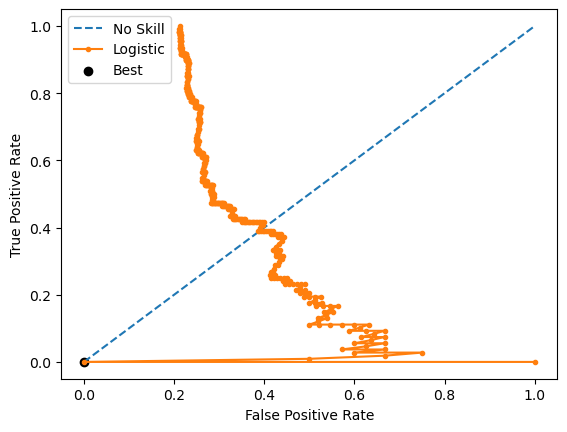

In [64]:
from sklearn.metrics import roc_curve, precision_recall_curve
yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = precision_recall_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = 2*fpr*tpr/(fpr+tpr)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [19]:
y_pred = clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5451475912002228

In [73]:
y_pred = yhat > 1-0.653618
f1_score(y_test, y_pred)

0.36781609195402304

Best Threshold=0.547422, G-Mean=0.477


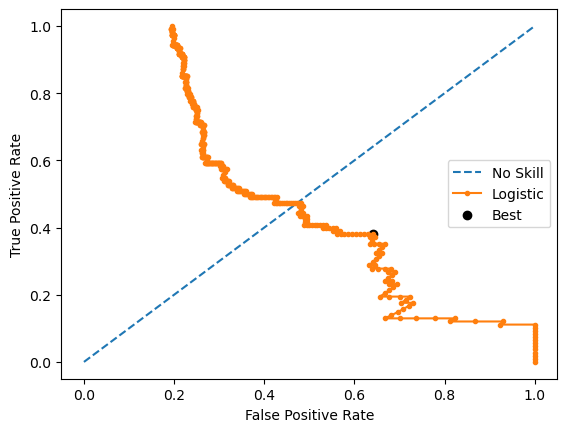

In [103]:
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators=300,class_weight='balanced',
 criterion='gini',
 max_depth= 6,
 max_features='sqrt', random_state=42)
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = precision_recall_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = 2*fpr*tpr/(fpr+tpr)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [104]:
y_pred = yhat > 0.547422
f1_score(y_test, y_pred)

0.46783625730994155

In [106]:
final_test = pd.read_csv("test.csv")
proba = model.predict_proba(final_test.iloc[:,1:])
y_pred = proba[:,1] > 0.541203

In [107]:
final_test

,id,0,1,2,3,4,5,6,7,8,...,795,796,797,798,799,800,801,802,803,804
0,0,5.351105,1.933021,2.947073,-1209.792924,-1590.254772,1.963682,0.112038,775.516167,0.424224,...,905.747225,4.499702,0.803534,15.112012,1.902430,66.524220,1.107305,1.316054,-1343.460664,97.308018
1,1,567.987628,3.806155,569.333678,-1420.337690,-341.343355,1.996925,-0.110698,4.487823,562.999437,...,159.436985,562.891324,-0.241692,15.766900,-0.058638,67.255965,562.758557,569.288638,236.871615,97.996751
2,2,-159.797745,0.004768,-152.936798,-1549.816964,1880.071160,-0.012737,1.070118,6.080241,-160.412191,...,435.572638,-150.617012,0.003843,15.072682,-0.060233,66.337922,-158.522701,-160.181844,-46.134951,97.206372
3,3,7.477377,4.151975,2.659569,221.135099,1960.404537,0.978165,2.083902,5.732444,2.915118,...,1063.612083,7.678978,1.009009,15.884924,3.025117,67.526615,9.057854,8.072284,-506.328267,98.280454
4,4,0.556083,1.132735,8.633191,82.622337,-1694.039840,0.087522,1.971156,5.882287,6.228731,...,-421.537996,8.360745,0.079631,15.893206,0.972241,67.213155,2.137631,4.197359,-188.658023,98.025160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,-541.034705,-0.008312,-544.615414,-1592.396354,-614.480167,1.134986,1.998570,7.803693,-539.858573,...,-414.226747,-548.470147,1.244007,15.878753,-0.298417,67.191183,-546.863541,-545.404141,-216.376545,98.036042
796,796,3.753159,2.008486,1.454154,1089.738760,-357.088414,2.021897,0.090920,2.439324,2.813008,...,1226.115548,6.687068,0.169984,15.806151,4.122578,67.021953,4.376122,1.985985,-1434.617024,97.796732
797,797,9.113064,-0.216186,4.032969,446.758874,564.753214,-0.094708,2.029986,888.569158,0.557762,...,320.664389,1.473778,1.839615,14.320555,1.124796,65.602284,2.076574,9.043637,757.438908,96.498003
798,798,145.337146,-0.019249,149.552113,-1058.645300,1024.867160,0.060729,0.190524,1.196219,151.451502,...,813.217225,148.191448,3.721395,15.079332,-0.105967,66.601085,144.900036,152.771188,611.634670,97.317049


In [108]:
y_pred.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [109]:
df_test = pd.DataFrame(list(zip(final_test['id'], y_pred.astype(int))), columns=["id", "target"]).set_index('id')

In [110]:
df_test

,target
id,
0,0
1,0
2,0
3,0
4,0
...,...
795,0
796,0
797,0


In [111]:
df_test.to_csv("submission.csv")

In [114]:
clf

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fdbd8c27fa0>,
             param_grid={'depth': [4, 6, 8],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1],
                         'min_data_in_leaf': [3, 5]},
             scoring='f1')